In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from matplotlib import pyplot

Using TensorFlow backend.


In [4]:
import pandas as pd

In [125]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [618]:
df_new=pd.read_csv('Midas_cleaned_dup.csv')
df_new['TEST_DATE'] =  pd.to_datetime(df_new['TEST_DATE'], format='%Y-%m-%d')
df_new['TEST_DATE']=df_new['TEST_DATE'].dt.strftime('%Y%m%d').astype(float)
df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
df_new['CORNER'] = calc_smooth_mean(df_new, by='CORNER', on='EYE_WIDTH', m=300)
df_new['COMPONENT_ID'] = calc_smooth_mean(df_new, by='COMPONENT_ID', on='EYE_WIDTH', m=300)
df_new['SLOTID_DEC'] = calc_smooth_mean(df_new, by='SLOTID_DEC', on='EYE_WIDTH', m=300)
df_new['PNP_FILE'] = calc_smooth_mean(df_new, by='PNP_FILE', on='EYE_WIDTH', m=300)
df_new['HOME_DIRECTORY'] = calc_smooth_mean(df_new, by='HOME_DIRECTORY', on='EYE_WIDTH', m=300)
df_new['PLUGPOSITION'] = calc_smooth_mean(df_new, by='PLUGPOSITION', on='EYE_WIDTH', m=300)
df_new['SLOTID'] = calc_smooth_mean(df_new, by='SLOTID', on='EYE_WIDTH', m=300)
#df_new['CORNER'] = calc_smooth_mean(df_new, by='CORNER', on='EYE_WIDTH', m=300)
#df_new['CORNER'] = calc_smooth_mean(df_new, by='CORNER', on='EYE_WIDTH', m=300)


In [7]:
df_new=pd.read_csv('Midas_with_mac.csv')

In [6]:
print (pd.Series(df_new['COMPONENT_ID'].unique()).str.startswith('11S02CY3').sum()) 

386


In [9]:
df_new['COMPONENT_ID'].drop_duplicates()

0        False
16       False
32       False
48       False
64       False
         ...  
11582    False
11838    False
12126    False
12382     True
12414     True
Name: COMPONENT_ID, Length: 406, dtype: bool

In [7]:
out = [x for x in df_new['COMPONENT_ID'].unique() if x.startswith('11S02CY3')]
out


['11S02CY381YH1934531232',
 '11S02CY381YH1934535834',
 '11S02CY381YH1934589438',
 '11S02CY381YH1934589612',
 '11S02CY381YH1934590957',
 '11S02CY381YH1934592311',
 '11S02CY381YH1934592709',
 '11S02CY381YH1934595121',
 '11S02CY381YH1934595165',
 '11S02CY381YH1934595322',
 '11S02CY381YH1934595599',
 '11S02CY381YH1934595800',
 '11S02CY381YH1934607057',
 '11S02CY381YH1934607058',
 '11S02CY382YH1934466992',
 '11S02CY382YH1934472901',
 '11S02CY382YH1934498527',
 '11S02CY382YH1934502563',
 '11S02CY382YH1934503612',
 '11S02CY382YH1934520551',
 '11S02CY382YH1934528515',
 '11S02CY382YH1934528592',
 '11S02CY382YH1934550691',
 '11S02CY382YH1934550697',
 '11S02CY382YH1934562993',
 '11S02CY382YH1934572930',
 '11S02CY382YH1934606553',
 '11S02CY382YH1934606560',
 '11S02CY382YH1934606567',
 '11S02CY382YH1934606707',
 '11S02CY382YH1934607053',
 '11S02CY382YH1934607641',
 '11S02CY382YH1934607672',
 '11S02CY382YH1934608415',
 '11S02CY382YH1934609058',
 '11S02CY382YH1934609062',
 '11S02CY382YH1934618363',
 

In [3]:
df=pd.read_csv('Copy of 1584099124869_psro.csv',delimiter=';')

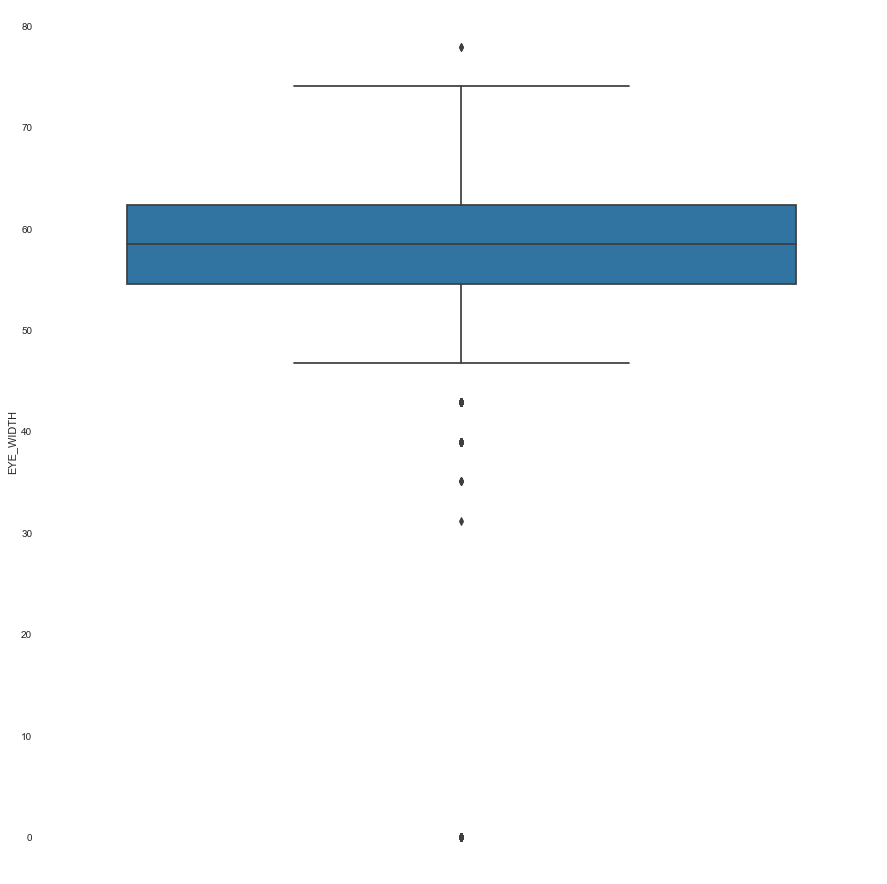

In [9]:
f,ax=plt.subplots(figsize=(15,16))
sns.boxplot(y="EYE_WIDTH",data=df_new)

In [9]:
out1= [x for x in df['COMPONENT_ID'].unique() if x.startswith('11S02CY3')]

In [130]:
df

ROW      GMT_TESTTIMESTAMP            COMPONENT_ID          WAFER_ID_XY  \
0      1  2019-01-24 11:37:54.0  11S02CY381YH1934494719   6A05G118SOE1/77/22   
1      1  2019-01-30 15:29:19.0  11S02CY381YH1934526414   6A05S053SOG2/49/55   
2      1  2019-01-18 04:41:40.0  11S02CY381YH1934526899   6A05S099SOF4/63/55   
3      1  2019-01-18 04:41:40.0  11S02CY381YH1934526950  6A06F230SOD0/105/44   
4      1  2019-01-24 11:37:54.0  11S02CY381YH1934531221  6A061136SOG6/105/33   
..   ...                    ...                     ...                  ...   
295    1  2019-01-10 07:26:33.0  11S02CY396YH1934639636   6A05F207SOB4/35/66   
296    1  2019-01-10 07:26:33.0  11S02CY396YH1934645363   6560274NSEB5/63/55   
297    1  2019-01-11 13:37:04.0  11S02CY396YH1934714147   6A04S062SOD4/91/33   
298    1  2019-01-11 13:37:10.0  11S02CY396YH1934714369  6A04T026SOC7/133/44   
299    1  2019-01-11 13:37:14.0  11S02CY396YH1934742729  6A04S002SOG0/105/22   

      PSRO  CWP0_VDDN  CRP0_VDDN  \
0    8.399      1.184      1.184   
1    8.147      1.097      1.097   
2    8.172      1.144      1.144   
3    8.093      1.045      1.045   
4    8.409      1.136      1.136   
..     ...        ...        ...   
295  8.523      1.021      1.021   
296  8.585      1.038      1.038   
297  8.441      1.021      1.021   
298  8.323      1.100      1.100   
299  8.151      1.021      1.021   

                                        HOME_DIRECTORY MACHINE_FAMILY SERIAL  \
0    http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C21AE   
1    http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C09A1   
2    http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C360C   
3    http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C360C   
4    http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C21AE   
..                                                 ...            ...    ...   
295  http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C1534   
296  http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C1534   
297  http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C2580   
298  http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C25A6   
299  http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C25A8   

    LEVEL TEST  TEST_PROGRAM TEST_SUFFIX  PCX_LEVEL        FIRMWARE  \
0     MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_MFG2_RC14   
1     MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_MFG2_RC14   
2     MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_MFG2_RC14   
3     MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_MFG2_RC14   
4     MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_MFG2_RC14   
..    ...  ...           ...         ...        ...             ...   
295   MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_MFG2_RC14   
296   MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_MFG2_RC14   
297   MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_MFG2_RC14   
298   MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_MFG2_RC14   
299   MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_MFG2_RC14   

     BUP_TOOL_VERSION                                                 FN  
0                 NaN  XTEDS~3906~M05~C21AE~20190124063754~MFG_MFG.xm...  
1                 NaN  XTEDS~3906~M05~C09A1~20190130102919~MFG_MFG.xm...  
2                 NaN  XTEDS~3906~M05~C360C~20190117234140~MFG_MFG.xm...  
3                 NaN  XTEDS~3906~M05~C360C~20190117234140~MFG_MFG.xm...  
4                 NaN  XTEDS~3906~M05~C21AE~20190124063754~MFG_MFG.xm...  
..                ...                                                ...  
295               NaN  XTEDS~3907~ZR1~C1534~20190110022633~MFG_MFG.xm...  
296               NaN  XTEDS~3907~ZR1~C1534~20190110022633~MFG_MFG.xm...  
297               NaN  XTEDS~3907~ZR1~C2580~20190111083704~MFG_MFG.xm...  
298               NaN  XTEDS~3907~ZR1~C25A6~201

In [10]:
len(out1)

300

In [11]:
len(set(out).symmetric_difference(out1))

648

In [12]:
len(set(out)&set(out1))

19

In [4]:
new_df2=df[df['COMPONENT_ID'].isin(set(out)&set(out1))][['COMPONENT_ID','GMT_TESTTIMESTAMP']]

NameError: name 'df' is not defined

In [ ]:
grouped_df=df_new[df_new['COMPONENT_ID'].isin(set(out)&set(out1))].groupby(['COMPONENT_ID','START_TIMESTAMP']).agg(list)

In [5]:
new_df = grouped_df.reset_index()[['COMPONENT_ID','START_TIMESTAMP']]

NameError: name 'grouped_df' is not defined

In [6]:
comp_19=new_df.groupby('COMPONENT_ID').agg(list)

NameError: name 'new_df' is not defined

In [7]:
new_df2=new_df2.groupby('COMPONENT_ID').agg(list)

NameError: name 'new_df2' is not defined

In [8]:
comp_19

NameError: name 'comp_19' is not defined

In [79]:
component_19=pd.concat([comp_19,new_df2['GMT_TESTTIMESTAMP']],axis=1)

In [80]:
component_19.rename(columns = {'GMT_TESTTIMESTAMP':'Time_PSRO'}, inplace = True)

In [81]:
component_19.rename(columns = {'START_TIMESTAMP':'Time_PCIE'}, inplace = True)

In [86]:
component_19.to_csv('component_19.csv')

In [87]:
pd.read_csv('component_19.csv')

COMPONENT_ID                                          Time_PCIE  \
0   11S02CY381YH1934531232                     ['2019-01-29 11:05:14.000000']   
1   11S02CY381YH1934592709                     ['2019-01-29 11:05:14.000000']   
2   11S02CY382YH1934663150                     ['2019-01-23 23:11:25.000000']   
3   11S02CY382YH1934664062                     ['2019-01-29 11:05:14.000000']   
4   11S02CY382YH1934687582  ['2019-01-25 15:08:25.000000', '2019-01-28 13:...   
5   11S02CY382YH1934787915                     ['2019-01-23 18:19:51.000000']   
6   11S02CY383YH1934793846                     ['2019-01-23 18:19:51.000000']   
7   11S02CY388YH1934639637  ['2019-01-08 07:30:04.000000', '2019-01-23 23:...   
8   11S02CY388YH1934639767  ['2019-01-08 07:30:04.000000', '2019-01-23 23:...   
9   11S02CY388YH1934679627  ['2019-01-25 15:08:25.000000', '2019-01-28 13:...   
10  11S02CY388YH1934679628  ['2019-01-25 15:08:25.000000', '2019-01-28 13:...   
11  11S02CY388YH1934747646                     ['2019-01-23 18:19:51.000000']   
12  11S02CY388YH1934784945                     ['2019-01-23 18:19:51.000000']   
13  11S02CY388YH1934802042                     ['2019-01-21 17:34:01.000000']   
14  11S02CY389YH1934789002                     ['2019-01-23 23:11:25.000000']   
15  11S02CY394YH1934595037                     ['2019-01-29 11:05:14.000000']   
16  11S02CY394YH1934675933                     ['2019-01-23 18:19:51.000000']   
17  11S02CY394YH1934720220  ['2019-01-25 15:08:25.000000', '2019-01-28 13:...   
18  11S02CY394YH1934720223                     ['2019-01-29 11:05:14.000000']   

                    Time_PSRO  
0   ['2019-01-14 06:44:27.0']  
1   ['2019-01-14 06:44:27.0']  
2   ['2019-01-11 18:29:18.0']  
3   ['2019-01-14 06:44:27.0']  
4   ['2019-01-10 12:21:43.0']  
5   ['2019-01-11 18:29:18.0']  
6   ['2019-01-11 18:29:18.0']  
7   ['2019-01-11 18:29:18.0']  
8   ['2019-01-11 18:29:18.0']  
9   ['2019-01-10 12:21:43.0']  
10  ['2019-01-10 12:21:43.0']  
11  ['2019-01-11 18:29:18.0']  
12  ['2019-01-11 18:29:18.0']  
13  ['2019-01-31 19:28:58.0']  
14  ['2019-01-11 18:29:18.0']  
15  ['2019-01-14 06:44:27.0']  
16  ['2019-01-11 18:29:18.0']  
17  ['2019-01-10 12:21:43.0']  
18  ['2019-01-14 06:44:27.0']

In [56]:
com_19['COMPONENT_ID']=""

In [57]:
com_19['Time_PSRO']=""

In [58]:
com_19['Time_PCIE']=""

In [51]:
com_19['COMPONENT_ID']=

COMPONENT_ID             START_TIMESTAMP
0   11S02CY381YH1934531232  2019-01-29 11:05:14.000000
1   11S02CY381YH1934592709  2019-01-29 11:05:14.000000
2   11S02CY382YH1934663150  2019-01-23 23:11:25.000000
3   11S02CY382YH1934664062  2019-01-29 11:05:14.000000
4   11S02CY382YH1934687582  2019-01-25 15:08:25.000000
5   11S02CY382YH1934687582  2019-01-28 13:13:23.000000
6   11S02CY382YH1934787915  2019-01-23 18:19:51.000000
7   11S02CY383YH1934793846  2019-01-23 18:19:51.000000
8   11S02CY388YH1934639637  2019-01-08 07:30:04.000000
9   11S02CY388YH1934639637  2019-01-23 23:11:25.000000
10  11S02CY388YH1934639767  2019-01-08 07:30:04.000000
11  11S02CY388YH1934639767  2019-01-23 23:11:25.000000
12  11S02CY388YH1934679627  2019-01-25 15:08:25.000000
13  11S02CY388YH1934679627  2019-01-28 13:13:23.000000
14  11S02CY388YH1934679628  2019-01-25 15:08:25.000000
15  11S02CY388YH1934679628  2019-01-28 13:13:23.000000
16  11S02CY388YH1934747646  2019-01-23 18:19:51.000000
17  11S02CY388YH1934784945  2019-01-23 18:19:51.000000
18  11S02CY388YH1934802042  2019-01-21 17:34:01.000000
19  11S02CY389YH1934789002  2019-01-23 23:11:25.000000
20  11S02CY394YH1934595037  2019-01-29 11:05:14.000000
21  11S02CY394YH1934675933  2019-01-23 18:19:51.000000
22  11S02CY394YH1934720220  2019-01-25 15:08:25.000000
23  11S02CY394YH1934720220  2019-01-28 13:13:23.000000
24  11S02CY394YH1934720223  2019-01-29 11:05:14.000000

In [13]:
df2=pd.read_csv('../Chinmay_Min/psro/Copy of 1584371163896_psro201809.csv',delimiter=';')

In [14]:
df3=pd.read_csv('../Chinmay_Min/psro/Copy of 1584369624797_psro201810.csv',delimiter=';')

In [15]:
df4=pd.read_csv('../Chinmay_Min/psro/Copy of 1584368625319_psro201811.csv',delimiter=';')

In [16]:
df5=pd.read_csv('../Chinmay_Min/psro/Copy of 1584365020232_psro201812.csv',delimiter=';')

In [17]:
df6=pd.read_csv('../Chinmay_Min/psro/Copy of 1584372793023_psro201902.csv',delimiter=';')

In [18]:
df7=pd.read_csv('../Chinmay_Min/psro2/Copy of 1584445027526_psro201808.csv',delimiter=';')

In [19]:
df8=pd.read_csv('../Chinmay_Min/psro2/Copy of 1584447643420_psro201807.csv',delimiter=';')

In [20]:
df9=pd.read_csv('../Chinmay_Min/psro2/Copy of 1584459944780_psro201806.csv',delimiter=';')

In [21]:
df10=pd.concat([df,df2,df3,df4,df5,df6,df7,df8,df9],ignore_index=True)

In [22]:
df8=pd.concat([df,df6],ignore_index=True)

In [5]:
out1= [x for x in df10['COMPONENT_ID'].unique() if x.startswith('11S02CY3')]

In [6]:
len(out1)

366

In [25]:
len(out)

386

In [26]:
len(set(out)&set(out1))

386

In [7]:
df_new= df_new[df_new['COMPONENT_ID'].isin(out1)]

In [27]:
df11

ROW      GMT_TESTTIMESTAMP            COMPONENT_ID          WAFER_ID_XY  \
5       1  2019-01-14 06:44:27.0  11S02CY381YH1934531232  6A05S027SOC3/105/22   
15      1  2019-01-14 06:44:27.0  11S02CY381YH1934592709   6A061313SOF3/63/55   
26      1  2019-01-11 18:29:18.0  11S02CY382YH1934663150   656027B3SEB4/49/66   
27      1  2019-01-14 06:44:27.0  11S02CY382YH1934664062   6A063223SOE1/49/55   
35      1  2019-01-10 12:21:43.0  11S02CY382YH1934687582   65603S1ASEE5/77/33   
...   ...                    ...                     ...                  ...   
9648    1  2018-07-26 17:20:17.0  11S02CY395YH1934554806  65603X9KSEF0/105/66   
9775    1  2018-06-23 23:25:47.0  11S02CY382YH1934466992   6A05C306SOC5/91/33   
9782    1  2018-06-08 05:45:05.0  11S02CY382YH1934472901   6A05F104SOE3/77/22   
9950    1  2018-06-08 01:25:50.0  11S02CY388YH1934480111   6560042XSEA1/63/22   
9986    1  2018-06-08 05:45:05.0  11S02CY388YH1934502322   6A05G228SOA3/91/33   

       PSRO  CWP0_VDDN  CRP0_VDDN  \
5     8.299      1.200      1.200   
15    8.332      1.144      1.144   
26    8.298      1.198      1.198   
27    8.491      1.155      1.155   
35    8.143      1.118      1.118   
...     ...        ...        ...   
9648  8.365      1.186      1.186   
9775  8.358      1.173      1.173   
9782  8.164      1.113      1.113   
9950  8.205      1.200      1.200   
9986  8.379      1.188      1.188   

                                         HOME_DIRECTORY MACHINE_FAMILY SERIAL  \
5     http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C0D88   
15    http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C0D88   
26    http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  BFC57   
27    http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C0D88   
35    http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C21AE   
...                                                 ...            ...    ...   
9648  http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C23B4   
9775  http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C21AE   
9782  http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C1D1B   
9950  http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C1BEC   
9986  http://ausgsa.ibm.com/projects/m/moosecollecti...         zMidas  C1D1B   

     LEVEL TEST  TEST_PROGRAM TEST_SUFFIX  PCX_LEVEL             FIRMWARE  \
5      MFG  FRM  NO_BATCHLIST         MFG        NaN       D32L_MFG2_RC14   
15     MFG  FRM  NO_BATCHLIST         MFG        NaN       D32L_MFG2_RC14   
26     MFG  FRM  NO_BATCHLIST         MFG        NaN       D32L_MFG2_RC14   
27     MFG  FRM  NO_BATCHLIST         MFG        NaN       D32L_MFG2_RC14   
35     MFG  FRM  NO_BATCHLIST         MFG        NaN       D32L_MFG2_RC14   
...    ...  ...           ...         ...        ...                  ...   
9648   MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_BUNDLE27_FINAL   
9775   MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_BUNDLE27_FINAL   
9782   MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_BUNDLE27_FINAL   
9950   MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_BUNDLE27_FINAL   
9986   MFG  FRM  NO_BATCHLIST         MFG        NaN  D32L_BUNDLE27_FINAL   

      BUP_TOOL_VERSION                                                 FN  
5                  NaN  XTEDS~3906~M04~C0D88~20190114014427~MFG_MFG.xm...  
15                 NaN  XTEDS~3906~M04~C0D88~20190114014427~MFG_MFG.xm...  
26                 NaN  XTEDS~3906~M04~BFC57~20190111132918~MFG_MFG.xm...  
27                 NaN  XTEDS~3906~M04~C0D88~20190114014427~MFG_MFG.xm...  
35                 NaN  XTEDS~3906~M05~C21AE~20190110072143~MFG_MFG.xm...  
...                ...                                                ...  
9648               NaN  XTEDS~3906~M05~C23B4~20180726132017~MFG_MFG.xm...  
9775               NaN  XTEDS~3906~M04~C21AE~20180623192547~MFG_MFG.xm...  
9782  

In [28]:
df11.columns

Index(['ROW', 'GMT_TESTTIMESTAMP', 'COMPONENT_ID', 'WAFER_ID_XY', 'PSRO',
       'CWP0_VDDN', 'CRP0_VDDN', 'HOME_DIRECTORY', 'MACHINE_FAMILY', 'SERIAL',
       'LEVEL', 'TEST', 'TEST_PROGRAM', 'TEST_SUFFIX', 'PCX_LEVEL', 'FIRMWARE',
       'BUP_TOOL_VERSION', 'FN'],
      dtype='object')

In [136]:
df11['ROW'].value_counts()

1    540
Name: ROW, dtype: int64

In [137]:
df11['GMT_TESTTIMESTAMP'].value_counts()

2018-12-28 18:35:06.0    14
2018-07-29 12:54:09.0    13
2018-11-20 13:50:27.0    10
2019-01-11 18:29:18.0     9
2018-11-15 16:46:30.0     9
                         ..
2018-08-24 12:16:06.0     1
2018-06-23 23:25:47.0     1
2018-11-20 17:58:06.0     1
2018-09-11 23:19:55.0     1
2018-10-03 21:35:10.0     1
Name: GMT_TESTTIMESTAMP, Length: 161, dtype: int64

In [138]:
df11['WAFER_ID_XY'].value_counts()

6A05S027SOC3/105/22    6
6A061313SOF3/63/55     6
6A05Q268SOA0/119/66    5
6A05S060SOF3/105/55    4
6A061264SOD4/105/55    4
                      ..
6A04S246SOC3/35/44     1
6A063197SOB7/21/44     1
6A064129SOB3/77/22     1
65603X9VSEA1/105/66    1
6A06D206SOG7/91/33     1
Name: WAFER_ID_XY, Length: 386, dtype: int64

In [139]:
df11['PSRO'].value_counts()

8.332    13
8.278     7
8.299     6
8.366     6
8.268     6
         ..
7.690     1
8.337     1
8.313     1
8.014     1
8.500     1
Name: PSRO, Length: 299, dtype: int64

In [40]:
df11['PSRO'].min()

7.47

In [41]:
df11['PSRO'].max()

8.597999999999999

In [140]:
df11['CRP0_VDDN'].value_counts()

1.146    17
1.200    16
1.196    15
1.181    14
1.113    14
         ..
1.023     1
1.047     1
1.076     1
1.074     1
1.103     1
Name: CRP0_VDDN, Length: 86, dtype: int64

In [141]:
df11['SERIAL'].value_counts()

C0D88    83
C23B4    56
BFC57    47
C25CA    43
C21AE    41
C2DF8    36
C2456    33
BEF6F    31
C23C5    27
C2D98    18
C24C6    16
C09A1    16
C25D8    14
C2CCB    14
C1A7A    14
C2480    12
C2F41     5
C1D1B     4
C23F2     4
C241D     3
C19F9     3
C255E     3
C239B     3
C2467     2
C248B     2
C36EC     2
C2553     2
C1BEC     1
C248F     1
C1C29     1
C25A6     1
C257F     1
C2580     1
Name: SERIAL, dtype: int64

In [142]:
df11['LEVEL'].value_counts()

MFG    540
Name: LEVEL, dtype: int64

In [143]:
df11['TEST'].value_counts()

FRM    540
Name: TEST, dtype: int64

In [144]:
df11['TEST_PROGRAM'].value_counts()

NO_BATCHLIST    540
Name: TEST_PROGRAM, dtype: int64

In [145]:
df11['TEST_SUFFIX'].value_counts()

MFG    540
Name: TEST_SUFFIX, dtype: int64

In [146]:
df11['FIRMWARE'].value_counts()

D32L_MFG2_RC14         350
D32L_FINAL_RELEASE     142
D32L_BUNDLE27_FINAL     48
Name: FIRMWARE, dtype: int64

In [147]:
df11['FN'].value_counts()

XTEDS~3906~M04~C23B4~20181228133506~MFG_MFG.xml.gz    14
XTEDS~3906~M04~C23C5~20180729085409~MFG_MFG.xml.gz    13
XTEDS~3906~M04~BFC57~20181120085027~MFG_MFG.xml.gz    10
XTEDS~3906~M04~C23B4~20181115114630~MFG_MFG.xml.gz     9
XTEDS~3906~M04~BFC57~20190111132918~MFG_MFG.xml.gz     9
                                                      ..
XTEDS~3906~M04~C1BEC~20180607212550~MFG_MFG.xml.gz     1
XTEDS~3906~M04~C2553~20181019224029~MFG_MFG.xml.gz     1
XTEDS~3906~M04~C0D88~20181030133036~MFG_MFG.xml.gz     1
XTEDS~3906~M04~C23B4~20180731140911~MFG_MFG.xml.gz     1
XTEDS~3906~M05~C23B4~20180911191955~MFG_MFG.xml.gz     1
Name: FN, Length: 161, dtype: int64

In [150]:
df11[['COMPONENT_ID','FIRMWARE','SERIAL','CRP0_VDDN']].head()

COMPONENT_ID        FIRMWARE SERIAL  CRP0_VDDN
5   11S02CY381YH1934531232  D32L_MFG2_RC14  C0D88      1.200
15  11S02CY381YH1934592709  D32L_MFG2_RC14  C0D88      1.144
26  11S02CY382YH1934663150  D32L_MFG2_RC14  BFC57      1.198
27  11S02CY382YH1934664062  D32L_MFG2_RC14  C0D88      1.155
35  11S02CY382YH1934687582  D32L_MFG2_RC14  C21AE      1.118

In [110]:
df11['CRP0_VDDN'].value_counts()

1.146    17
1.200    16
1.196    15
1.181    14
1.113    14
1.198    13
1.159    13
1.184    13
1.169    12
1.021    12
1.194    12
1.186    12
1.188    12
1.175    11
1.128    11
1.173    11
1.204    11
1.126    10
1.107    10
1.151    10
1.165     9
1.132     9
1.089     9
1.157     9
1.155     9
1.120     9
1.138     9
1.190     8
1.144     8
1.124     8
1.097     8
1.148     8
1.118     7
1.122     7
1.202     7
1.095     6
1.179     6
1.101     6
1.163     6
1.056     6
1.140     6
1.161     6
1.177     6
1.206     5
1.130     5
1.082     5
1.192     5
1.134     5
1.109     5
1.078     5
1.142     4
1.099     4
1.062     4
1.052     4
1.136     4
1.060     4
1.070     3
1.167     3
1.091     3
1.093     3
1.085     3
1.087     3
1.111     3
1.014     3
1.043     3
1.064     3
1.153     3
1.066     2
1.039     2
1.068     2
1.080     2
1.041     2
1.058     2
1.115     2
0.998     2
1.019     1
1.105     1
1.072     1
1.016     1
1.171     1
1.035     1
1.023     1
1.047     1
1.07

In [32]:
df11['CRP0_VDDN'].max()

1.206

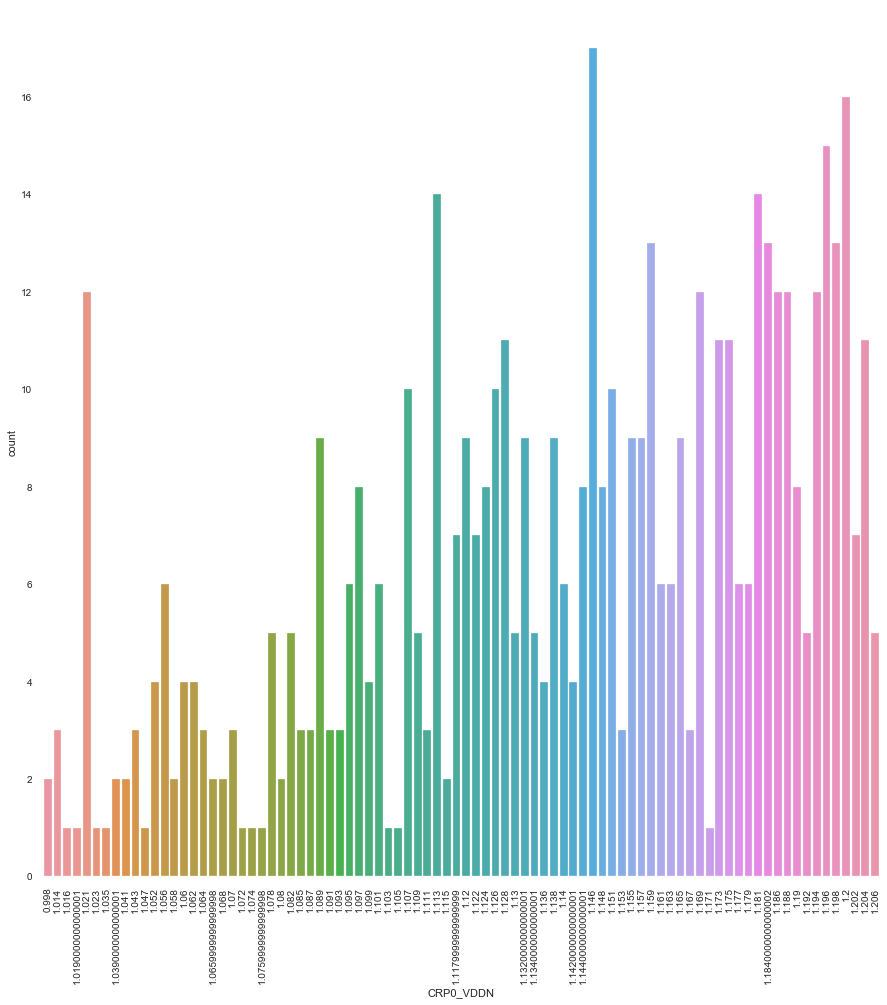

In [38]:
f,ax=plt.subplots(figsize=(15,16))
sns.countplot(x="CRP0_VDDN",data=df11)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

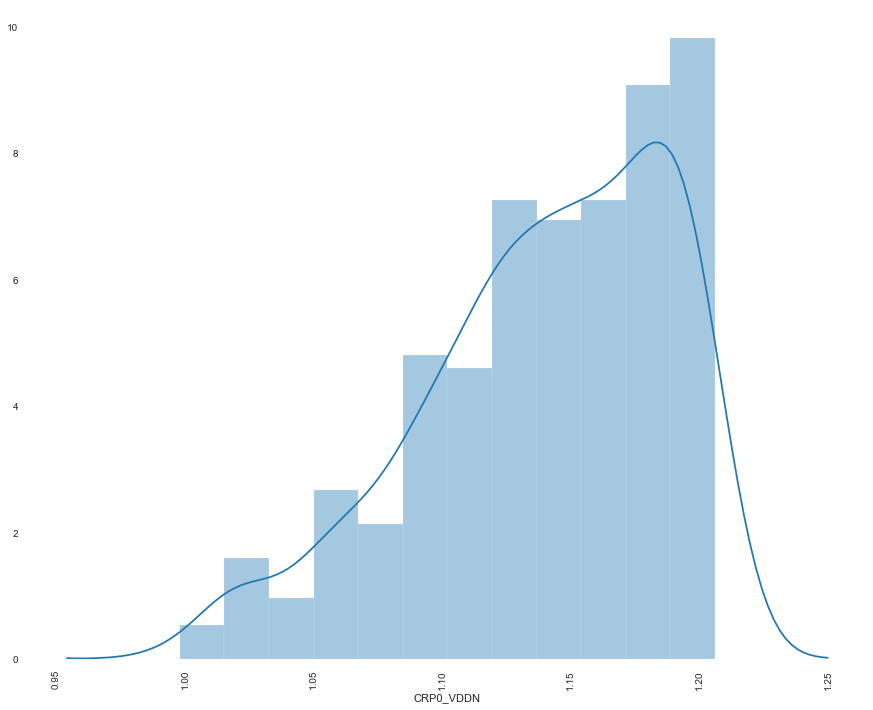

In [108]:
f,ax=plt.subplots(figsize=(15,12))
sns.distplot(df11['CRP0_VDDN'])
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [29]:
df12=df11[['COMPONENT_ID','PSRO','CRP0_VDDN']].drop_duplicates()

In [37]:
df12=df12[df12['CRP0_VDDN']!=1.021]

In [538]:
len(df12)

386

In [113]:
df12['COMPONENT_ID'].nunique()

386

In [540]:
df12.to_csv('comp_psr_vd.csv',index=False)

In [31]:
pd.set_option('display.max_rows', 500)

In [539]:
df12[['COMPONENT_ID','PSRO','CRP0_VDDN']].groupby(['COMPONENT_ID','PSRO']).agg(list).sort_values('PSRO')

CRP0_VDDN
COMPONENT_ID           PSRO                       
11S02CY383YH1934794910 7.470  [1.0390000000000001]
11S02CY388YH1934786330 7.491               [0.998]
11S02CY388YH1934782718 7.497               [1.043]
11S02CY388YH1934786336 7.564               [1.052]
11S02CY388YH1934782709 7.581               [0.998]
11S02CY383YH1934779182 7.642               [1.097]
11S02CY382YH1934779151 7.646               [1.016]
11S02CY383YH1934776662 7.690               [1.064]
11S02CY382YH1934641899 7.731               [1.047]
11S02CY382YH1934779155 7.734               [1.155]
11S02CY388YH1934766410 7.751                [1.13]
11S02CY383YH1934779178 7.754               [1.091]
11S02CY383YH1934619509 7.759               [1.043]
11S02CY382YH1934765332 7.768  [1.1320000000000001]
11S02CY395YH1934727303 7.770               [1.078]
11S02CY388YH1934788945 7.799               [1.173]
11S02CY394YH1934644236 7.825               [1.091]
11S02CY382YH1934788931 7.827               [1.186]
11S02CY388YH1934692148 7.829               [1.128]
11S02CY383YH1934632053 7.851                [1.06]
11S02CY395YH1934658824 7.853               [1.014]
11S02CY388YH1934747646 7.858               [1.157]
11S02CY388YH1934802042 7.861               [1.128]
11S02CY394YH1934685042 7.873               [1.023]
11S02CY388YH1934621332 7.880               [1.056]
11S02CY394YH1934547013 7.880               [1.113]
11S02CY382YH1934625764 7.883                [1.07]
11S02CY394YH1934720226 7.885  [1.0190000000000001]
11S02CY388YH1934681212 7.885               [1.095]
11S02CY388YH1934765326 7.886               [1.089]
11S02CY394YH1934660144 7.887               [1.043]
11S02CY389YH1934756218 7.888               [1.186]
11S02CY382YH1934763839 7.894               [1.095]
11S02CY394YH1934615703 7.896               [1.062]
11S02CY394YH1934636377 7.906               [1.105]
11S02CY388YH1934681003 7.909               [1.128]
11S02CY388YH1934640799 7.912               [1.153]
11S02CY395YH1934662750 7.914               [1.122]
11S02CY394YH1934720223 7.916               [1.087]
11S02CY388YH1934645394 7.918               [1.041]
11S02CY394YH1934694986 7.923               [1.052]
11S02CY388YH1934645263 7.926               [1.056]
11S02CY382YH1934798654 7.928               [1.175]
11S02CY388YH1934802643 7.929               [1.136]
11S02CY388YH1934806228 7.930               [1.085]
11S02CY388YH1934608540 7.931               [1.082]
11S02CY395YH1934784782 7.934                [1.14]
11S02CY388YH1934628322 7.938               [1.087]
11S02CY388YH1934677857 7.944               [1.202]
11S02CY382YH1934620648 7.948               [1.113]
11S02CY394YH1934648077 7.949               [1.068]
11S02CY388YH1934671450 7.951               [1.148]
11S02CY388YH1934808469 7.953               [1.196]
11S02CY388YH1934768563 7.954               [1.078]
11S02CY394YH1934681009 7.958                 [1.2]
11S02CY394YH1934633435 7.959                [1.13]
11S02CY394YH1934692141 7.963               [1.179]
11S02CY395YH1934574186 7.972  [1.1840000000000002]
11S02CY388YH1934546870 7.976               [1.035]
11S02CY388YH1934637448 7.990               [1.052]
11S02CY388YH1934579866 7.990               [1.167]
11S02CY388YH1934649593 7.994               [1.078]
11S02CY388YH1934779793 8.006               [1.163]
11S02CY388YH1934753749 8.012               [1.126]
11S02CY388YH1934763845 8.012                 [1.2]
11S02CY382YH1934791772 8.014               [1.163]
11S02CY381YH1934595599 8.016               [1.109]
11S02CY394YH1934591336 8.017               [1.179]
11S02CY382YH1934608415 8.019                [1.06]
11S02CY388YH1934548657 8.019                 [1.2]
11S02CY382YH1934784916 8.021               [1.103]
11S02CY388YH1934788158 8.022               [1.179]
11S02CY395YH1934801982 8.029               [1.072]
11S02CY395YH1934800771 8.031                 [1.2]
11S02CY388YH1934762363 8.032               [1.194]
11S02CY388YH1934784945 8.032               [1.113]
11S02CY388YH1934545915 8.036               [1.111]
11S02CY389YH

In [31]:
df11['PSRO'].min()

7.47

In [32]:
df11['PSRO'].max()

8.597999999999999

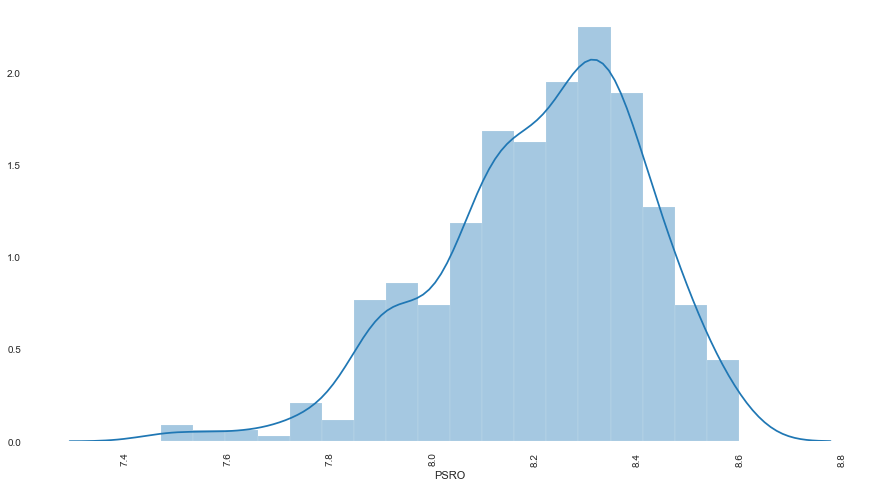

In [109]:
f,ax=plt.subplots(figsize=(15,8))
sns.distplot(df11['PSRO'])
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [113]:
df12=df11[['COMPONENT_ID','PSRO']].sort_values('PSRO').drop_duplicates()

In [115]:
len(df12)

386

In [46]:
x_axis=[df12['COMPONENT_ID']]
y_axis=[df12['PSRO']]

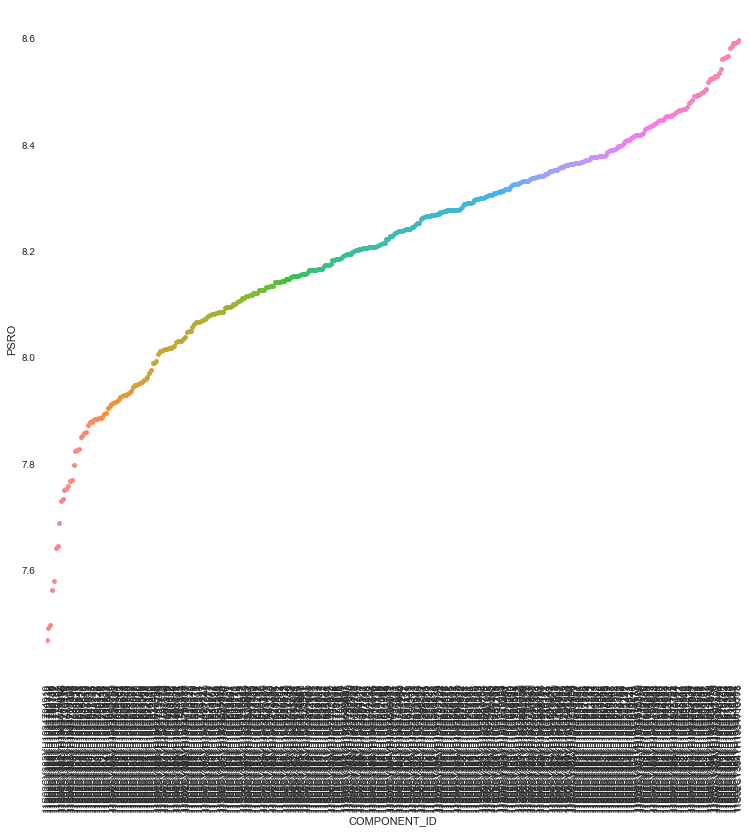

In [116]:

g=sns.catplot('COMPONENT_ID','PSRO',data=df12, height=10, aspect=11.7/10)
g.set_xticklabels(rotation=90)

In [40]:
bins = [7.4,7.65,7.9,8.15,8.4,8.65]
df12['binned'] = pd.cut(df12['PSRO'], bins)
labels=['very_high_speed','high_speed','medium_speed','low_speed','very_low_speed']
df12['PSRO_SPEED']= pd.cut(df12['PSRO'], bins,labels=labels)

C:\Users\ChinmayHegde\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ChinmayHegde\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [15]:
np.median(np.sort(df_new['PSRO'].unique()))

8.230999999999998

In [17]:
np.median(np.sort(df_new['PSRO']))

8.238

In [19]:
np.sort(df_new['PSRO'].unique())

array([7.47 , 7.497, 7.564, 7.581, 7.642, 7.646, 7.69 , 7.731, 7.734,
       7.751, 7.754, 7.759, 7.768, 7.77 , 7.799, 7.827, 7.829, 7.851,
       7.853, 7.858, 7.861, 7.873, 7.88 , 7.883, 7.885, 7.886, 7.887,
       7.894, 7.896, 7.906, 7.912, 7.914, 7.916, 7.923, 7.928, 7.929,
       7.93 , 7.931, 7.934, 7.938, 7.944, 7.948, 7.949, 7.951, 7.953,
       7.954, 7.958, 7.959, 7.963, 7.972, 7.976, 7.99 , 7.994, 8.006,
       8.012, 8.016, 8.017, 8.019, 8.021, 8.022, 8.029, 8.031, 8.032,
       8.036, 8.039, 8.048, 8.05 , 8.057, 8.064, 8.067, 8.069, 8.07 ,
       8.073, 8.074, 8.078, 8.081, 8.082, 8.083, 8.084, 8.085, 8.093,
       8.095, 8.096, 8.098, 8.101, 8.104, 8.112, 8.113, 8.116, 8.117,
       8.121, 8.122, 8.127, 8.128, 8.132, 8.133, 8.134, 8.142, 8.143,
       8.144, 8.145, 8.147, 8.148, 8.151, 8.153, 8.154, 8.155, 8.158,
       8.16 , 8.164, 8.165, 8.166, 8.167, 8.173, 8.174, 8.175, 8.176,
       8.183, 8.184, 8.185, 8.186, 8.187, 8.191, 8.193, 8.194, 8.195,
       8.199, 8.201,

In [21]:
np.median(np.sort(df_new['CRP0_VDDN'].unique()))

1.121

In [22]:
np.median(np.sort(df_new['CRP0_VDDN']))

1.146

In [23]:
np.sort(df_new['CRP0_VDDN'].unique())

array([0.998, 1.014, 1.016, 1.019, 1.023, 1.035, 1.039, 1.043, 1.047,
       1.052, 1.056, 1.058, 1.06 , 1.062, 1.064, 1.066, 1.068, 1.07 ,
       1.072, 1.074, 1.076, 1.078, 1.08 , 1.082, 1.085, 1.087, 1.089,
       1.091, 1.093, 1.095, 1.097, 1.099, 1.101, 1.103, 1.105, 1.107,
       1.109, 1.111, 1.113, 1.115, 1.118, 1.12 , 1.122, 1.124, 1.126,
       1.128, 1.13 , 1.132, 1.134, 1.136, 1.138, 1.14 , 1.142, 1.144,
       1.146, 1.148, 1.151, 1.153, 1.155, 1.157, 1.159, 1.161, 1.163,
       1.165, 1.167, 1.169, 1.171, 1.173, 1.175, 1.177, 1.179, 1.181,
       1.184, 1.186, 1.188, 1.19 , 1.192, 1.194, 1.196, 1.198, 1.2  ,
       1.202, 1.204, 1.206])

In [20]:
bins = [7.4,8.238,8.65]
df_new['binned'] = pd.cut(df_new['PSRO'], bins)
labels=['Fast','slow']
df_new['PSRO_SPEED']= pd.cut(df['PSRO'], bins,labels=labels)

In [25]:
bins = [0,1.146,2]
df_new['binned'] = pd.cut(df_new['CRP0_VDDN'], bins)
labels=['Low','High']
df_new['VOLTAGE']= pd.cut(df_new['CRP0_VDDN'], bins,labels=labels)

In [555]:
df12['binned'].value_counts()

(1.15, 2.0]    193
(0.0, 1.15]    193
Name: binned, dtype: int64

In [40]:
df_new['VOLTAGE'].value_counts()

Low     4515
High    4353
Name: VOLTAGE, dtype: int64

In [42]:
df_new.columns

Index(['CORNER', 'COMPONENT_ID', 'LANE', 'PLUGPOSITION', 'TEST_DATE',
       'EYE_HEIGHT', 'EYE_WIDTH', 'EYE_HEIGHT_AVG', 'EYE_WIDTH_AVG',
       'EYE_WIDTH_MAX', 'EYE_HEIGHT_MIN', 'EYE_WIDTH_MIN', 'EYE_HEIGHT_SDEV',
       'EYE_WIDTH_SDEV', 'SLOTID', 'SLOTID_DEC', 'START_TIMESTAMP',
       'FINISH_TIMESTAMP', 'PNP_FILE', 'HOME_DIRECTORY', 'Etch_length1',
       'Etch_length2', 'Etch_length3', 'Etch_length4', 'Etch_length5',
       'Etch_length6', 'pin_length', 'Machine', 'DR0_ARB', 'PSRO', 'CRP0_VDDN',
       'Etch_length_New', 'Delay', 'Loss', 'binned', 'PSRO_SPEED', 'VOLTAGE'],
      dtype='object')

In [41]:
df_new['PSRO_SPEED'].value_counts()

Fast    4578
slow    4290
Name: PSRO_SPEED, dtype: int64

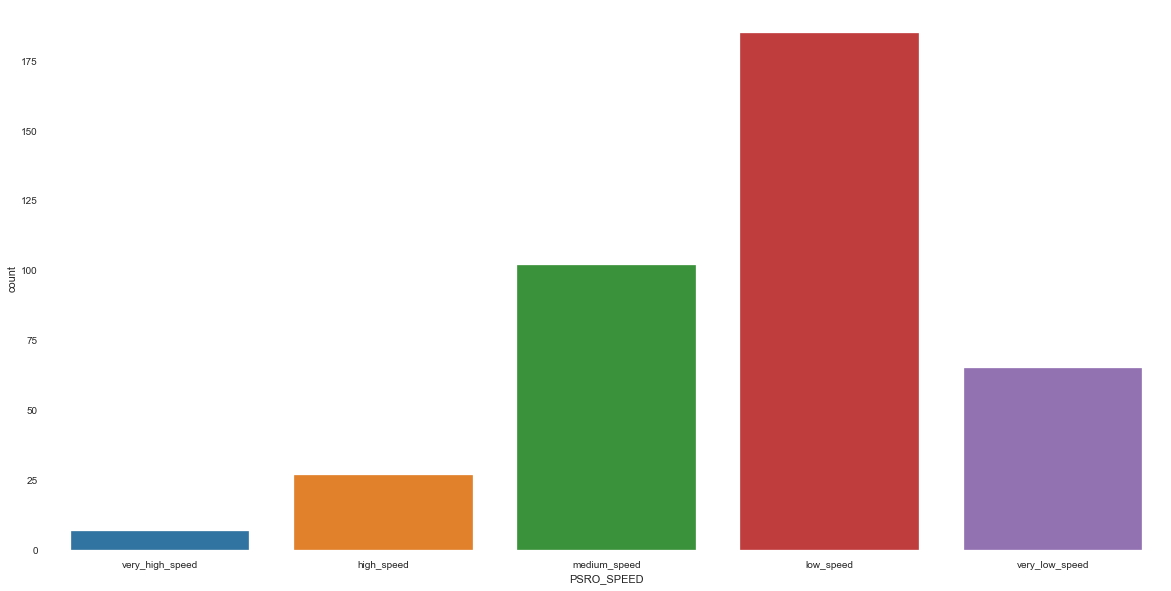

In [119]:
f,ax=plt.subplots(figsize=(20,10))
sns.countplot(x="PSRO_SPEED",data=df12)

  

In [44]:
df12['PSRO_SPEED'].value_counts()

low_speed          185
medium_speed       102
very_low_speed      65
high_speed          27
very_high_speed      7
Name: PSRO_SPEED, dtype: int64

In [43]:
df12['binned'].value_counts()

(8.15, 8.4]    185
(7.9, 8.15]    102
(8.4, 8.65]     65
(7.65, 7.9]     27
(7.4, 7.65]      7
Name: binned, dtype: int64

In [42]:
print(df12.head())

              COMPONENT_ID   PSRO  CRP0_VDDN       binned      PSRO_SPEED
5   11S02CY381YH1934531232  8.299      1.200  (8.15, 8.4]       low_speed
15  11S02CY381YH1934592709  8.332      1.144  (8.15, 8.4]       low_speed
26  11S02CY382YH1934663150  8.298      1.198  (8.15, 8.4]       low_speed
27  11S02CY382YH1934664062  8.491      1.155  (8.4, 8.65]  very_low_speed
35  11S02CY382YH1934687582  8.143      1.118  (7.9, 8.15]    medium_speed


In [96]:
print(df12.binned.dtype)

category


In [56]:
len(df_new)

18350

In [183]:
df_new=df_new[df_new['COMPONENT_ID'].isin(out)]

In [76]:
len(df_new)

9758

In [72]:
df_new['PSRO']=''
df_new['PSRO_SPEED']=''
df_new['CRP0_VDDN']=''
d_new['VOLTAGE_SPEED']=''
for j in range(len(df12)):
    for i in range(len(df_new)):
        if df_new.iloc[i]['COMPONENT_ID']==df12.iloc[j]['COMPONENT_ID']:
            df_new.iloc[i]['PSRO']=df12.iloc[j]['PSRO']
            df_new.iloc[i]['PSRO_SPEED']=df12.iloc[j]['PSRO_SPEED']
            df_new.iloc[i]['CRP0_VDDN']=df12.iloc[j]['CRP0_VDDN']
        else:
            pass
            

C:\Users\ChinmayHegde\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\ChinmayHegde\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ChinmayHegde\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [61]:
df_new['PSRO'].nunique()

300

In [62]:
df12['PSRO'].nunique()

299

In [74]:
df_new.iloc[9757]

CORNER                                                 IO_NOM_NOM_PCX
COMPONENT_ID                                   11S02CY388YH1934625510
LANE                                                               15
PLUGPOSITION                                                      PB1
TEST_DATE                                                  2019-01-11
EYE_HEIGHT                                                      304.2
EYE_WIDTH                                                        62.4
EYE_HEIGHT_AVG                                                327.787
EYE_WIDTH_AVG                                                 58.6584
EYE_WIDTH_MAX                                                    74.1
EYE_HEIGHT_MIN                                                  249.6
EYE_WIDTH_MIN                                                      39
EYE_HEIGHT_SDEV                                               24.1129
EYE_WIDTH_SDEV                                                5.79478
SLOTID              

In [703]:
df_new2=df_new2.loc[:,df_new2.columns!='binned']

In [75]:
df_new[9750:9757]

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  \
18342  IO_NOM_NOM_PCX  11S02CY388YH1934625510    12          PB0  2019-01-11   
18343  IO_NOM_NOM_PCX  11S02CY388YH1934625510    12          PB1  2019-01-11   
18344  IO_NOM_NOM_PCX  11S02CY388YH1934625510    13          PB0  2019-01-11   
18345  IO_NOM_NOM_PCX  11S02CY388YH1934625510    13          PB1  2019-01-11   
18346  IO_NOM_NOM_PCX  11S02CY388YH1934625510    14          PB0  2019-01-11   
18347  IO_NOM_NOM_PCX  11S02CY388YH1934625510    14          PB1  2019-01-11   
18348  IO_NOM_NOM_PCX  11S02CY388YH1934625510    15          PB0  2019-01-11   

       EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  \
18342       335.4       58.5      327.786875      58.658438           74.1   
18343       319.8       62.4      327.786875      58.658438           74.1   
18344       327.6       70.2      327.786875      58.658438           74.1   
18345       335.4       62.4      327.786875      58.658438           74.1   
18346       304.2       58.5      327.786875      58.658438           74.1   
18347       327.6       50.7      327.786875      58.658438           74.1   
18348       343.2       54.6      327.786875      58.658438           74.1   

       ...  Etch_length1  Etch_length2  Etch_length3  Etch_length4  \
18342  ...    246.549784     27.099814    105.712137    100.043108   
18343  ...    244.766639     10.035540    105.712137    100.043108   
18344  ...    239.996622     23.801079    107.386925     98.432779   
18345  ...    260.173741     11.596797    107.386925     98.432779   
18346  ...    234.816642     26.664531    110.606883     95.469782   
18347  ...    238.466515     15.709940    110.606883     95.469782   
18348  ...    229.209538     30.836829    113.405830     93.895901   

      Etch_length5 Etch_length6 pin_length PSRO PSRO_SPEED CRP0_VDDN  
18342   479.404844   501.004724  21.599880                            
18343   460.557425   482.157305  21.599880                            
18344   469.617405   497.867403  28.249998                            
18345   477.590242   505.840240  28.249998                            
18346   467.557838   503.627770  36.069932                            
18347   460.253120   496.323052  36.069932                            
18348   467.348098   509.798194  42.450096                            

[7 rows x 30 columns]

In [188]:
len(df_new)

8868

In [82]:
df12=df12[['COMPONENT_ID','PSRO','PSRO_SPEED','CRP0_VDDN']]

In [67]:
df12[df12['COMPONENT_ID']=='11S02CY388YH1934625510']

COMPONENT_ID   PSRO  CRP0_VDDN       binned    PSRO_SPEED
1063  11S02CY388YH1934625510  8.085      1.126  (7.9, 8.15]  medium_speed

In [567]:
df12

COMPONENT_ID   PSRO PSRO_SPEED  CRP0_VDDN       binned  \
5     11S02CY381YH1934531232  8.299       slow      1.200  (1.15, 2.0]   
15    11S02CY381YH1934592709  8.332       slow      1.144  (0.0, 1.15]   
26    11S02CY382YH1934663150  8.298       slow      1.198  (1.15, 2.0]   
27    11S02CY382YH1934664062  8.491       slow      1.155  (1.15, 2.0]   
35    11S02CY382YH1934687582  8.143      Speed      1.118  (0.0, 1.15]   
42    11S02CY382YH1934787915  8.268       slow      1.184  (1.15, 2.0]   
105   11S02CY383YH1934793846  8.238       slow      1.165  (1.15, 2.0]   
171   11S02CY388YH1934639637  8.175      Speed      1.128  (0.0, 1.15]   
172   11S02CY388YH1934639767  8.083      Speed      1.122  (0.0, 1.15]   
176   11S02CY388YH1934679627  8.267       slow      1.148  (0.0, 1.15]   
177   11S02CY388YH1934679628  8.276       slow      1.124  (0.0, 1.15]   
185   11S02CY388YH1934747646  7.858      Speed      1.157  (1.15, 2.0]   
189   11S02CY388YH1934784945  8.032      Speed      1.113  (0.0, 1.15]   
192   11S02CY388YH1934802042  7.861      Speed      1.128  (0.0, 1.15]   
232   11S02CY389YH1934789002  8.307       slow      1.194  (1.15, 2.0]   
246   11S02CY394YH1934595037  8.229       slow      1.181  (1.15, 2.0]   
253   11S02CY394YH1934675933  8.413       slow      1.194  (1.15, 2.0]   
264   11S02CY394YH1934720220  8.561       slow      1.188  (1.15, 2.0]   
266   11S02CY394YH1934720223  7.916      Speed      1.087  (0.0, 1.15]   
429   11S02CY382YH1934606567  8.378       slow      1.120  (0.0, 1.15]   
433   11S02CY382YH1934607641  8.101      Speed      1.066  (0.0, 1.15]   
435   11S02CY382YH1934607672  8.277       slow      1.177  (1.15, 2.0]   
467   11S02CY382YH1934608415  8.019      Speed      1.060  (0.0, 1.15]   
555   11S02CY382YH1934625764  7.883      Speed      1.070  (0.0, 1.15]   
619   11S02CY382YH1934641899  7.731      Speed      1.047  (0.0, 1.15]   
646   11S02CY382YH1934642948  8.084      Speed      1.151  (1.15, 2.0]   
685   11S02CY382YH1934644883  8.453       slow      1.138  (0.0, 1.15]   
689   11S02CY382YH1934644889  8.519       slow      1.151  (1.15, 2.0]   
719   11S02CY382YH1934645487  8.128      Speed      1.085  (0.0, 1.15]   
814   11S02CY383YH1934630912  8.067      Speed      1.122  (0.0, 1.15]   
993   11S02CY388YH1934599624  8.454       slow      1.196  (1.15, 2.0]   
1015  11S02CY388YH1934608540  7.931      Speed      1.082  (0.0, 1.15]   
1028  11S02CY388YH1934615937  8.050      Speed      1.107  (0.0, 1.15]   
1046  11S02CY388YH1934621332  7.880      Speed      1.056  (0.0, 1.15]   
1063  11S02CY388YH1934625510  8.085      Speed      1.126  (0.0, 1.15]   
1107  11S02CY388YH1934633366  8.358       slow      1.161  (1.15, 2.0]   
1111  11S02CY388YH1934633390  8.121      Speed      1.146  (0.0, 1.15]   
1115  11S02CY388YH1934633401  8.132      Speed      1.089  (0.0, 1.15]   
1150  11S02CY388YH1934637448  7.990      Speed      1.052  (0.0, 1.15]   
1188  11S02CY388YH1934639718  8.127      Speed      1.146  (0.0, 1.15]   
1196  11S02CY388YH1934639770  8.101      Speed      1.078  (0.0, 1.15]   
1218  11S02CY388YH1934640759  8.261       slow      1.134  (0.0, 1.15]   
1221  11S02CY388YH1934640799  7.912      Speed      1.153  (1.15, 2.0]   
1239  11S02CY388YH1934645315  8.523       slow      1.175  (1.15, 2.0]   
1240  11S02CY388YH1934645319  8.387       slow      1.095  (0.0, 1.15]   
1249  11S02CY388YH1934646418  8.309       slow      1.118  (0.0, 1.15]   
1267  11S02CY389YH1934629398  8.340       slow      1.099  (0.0, 1.15]   
1292  11S02CY389YH1934658702  8.583       slow      1.140  (0.0, 1.15]   
1294  11S02CY389YH1934658705  8.342       slow      1.165  (1.15, 2.0]   
1304  11S02CY389YH1934658923  8.493       slow      1.188  (1.15, 2.0]   
1319  11S02CY389YH1934663182  8.134      Speed      1.093  (0.0, 1.15]   
1320  11S02CY389YH1934663183  8.446       slow      1.101  (0.0, 1.15]   
1324  11S02CY389YH1934663243  8.362       slow      1.146  (0.0, 1.15]   
1335  11S02CY389YH19

In [8]:
df_new=pd.read_csv('Midas_with_mac.csv')

In [633]:
df_new=df_new[df_new['COMPONENT_ID'].isin(out)]

In [634]:
df_new=df_new.merge(df12, on='COMPONENT_ID', how='left')

In [635]:
df_new=df_new[df_new['EYE_WIDTH']!=0]

In [641]:
df_new.head()

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  EYE_HEIGHT  \
0  FF_SCM1  11S02CY381YH1934531232     9          PB0  2019-01-29       312.0   
1  FF_SCM1  11S02CY381YH1934531232     0          PB1  2019-01-29       358.8   
2  FF_SCM1  11S02CY381YH1934531232     1          PB0  2019-01-29       327.6   
3  FF_SCM1  11S02CY381YH1934531232     1          PB1  2019-01-29       343.2   
4  FF_SCM1  11S02CY381YH1934531232     2          PB0  2019-01-29       312.0   

   EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  ...  Etch_length5  \
0       54.6      335.034375      59.273438           78.0  ...    463.116772   
1       66.3      335.034375      59.273438           78.0  ...    459.576207   
2       58.5      335.034375      59.273438           78.0  ...    378.461058   
3       58.5      335.034375      59.273438           78.0  ...    370.192348   
4       62.4      335.034375      59.273438           78.0  ...    366.686812   

   Etch_length6  pin_length  Machine                       DR0_ARB   PSRO  \
0    487.776870   24.660098      M02  N1PE2_N1CP1_0_CK1_DAT_01_N    8.299   
1    477.706131   18.129924      M02  N1PE3_N1CP1_1_CK0_DAT_00_N    8.299   
2    403.121156   24.660098      M02  N1PE2_N1CP1_0_CK0_DAT_01_N    8.299   
3    394.852446   24.660098      M02  N1PE3_N1CP1_1_CK0_DAT_01_N    8.299   
4    398.486898   31.800086      M02  N1PE2_N1CP1_0_CK0_DAT_02_N    8.299   

  PSRO_SPEED CRP0_VDDN       binned VOLTAGE_SPEED  
0       slow       1.2  (1.15, 2.0]         speed  
1       slow       1.2  (1.15, 2.0]         speed  
2       slow       1.2  (1.15, 2.0]         speed  
3       slow       1.2  (1.15, 2.0]         speed  
4       slow       1.2  (1.15, 2.0]         speed  

[5 rows x 34 columns]

In [636]:
d=pd.read_csv('zMidas_drawer_designlink_summedloss_pcie_only_v03.csv',delimiter=',')

In [637]:
d.columns

Index(['--- MODULE_NAME---', '---NETNAME---', 'ID', ' Etch/Pin_Length (mm)',
       ' Extracted_Delay (ps)', ' Table_Based_Loss (dB)'],
      dtype='object')

In [638]:
d=d.rename(columns={' Etch/Pin_Length (mm)':'Etch_length_New',' Extracted_Delay (ps)':'Delay',' Table_Based_Loss (dB)':'Loss','---NETNAME---':'DR0_ARB'})

In [639]:
d.head()

--- MODULE_NAME---                     DR0_ARB ID  Etch_length_New  \
0   SYSTEM XNETNAME:  N0CP0_0_N0PE2_CK0_DAT_00_N  S       454.818039   
1   SYSTEM XNETNAME:  N0CP0_0_N0PE2_CK0_DAT_00_P  S       454.685635   
2   SYSTEM XNETNAME:  N0CP0_0_N0PE2_CK0_DAT_01_N  S       442.382513   
3   SYSTEM XNETNAME:  N0CP0_0_N0PE2_CK0_DAT_01_P  S       442.425166   
4   SYSTEM XNETNAME:  N0CP0_0_N0PE2_CK0_DAT_02_N  S       437.607023   

         Delay       Loss  
0  2952.005938  10.015679  
1  2962.003880  10.013653  
2  2821.543169   9.710609  
3  2828.763729   9.717099  
4  2702.337307   9.685697

In [688]:
df_new2=df_new.merge(d[['DR0_ARB','Etch_length_New','Delay','Loss']], on='DR0_ARB', how='left')

In [647]:
d[['DR0_ARB','Etch_length_New','Delay','Loss']]

DR0_ARB  Etch_length_New        Delay       Loss
0    N0CP0_0_N0PE2_CK0_DAT_00_N       454.818039  2952.005938  10.015679
1    N0CP0_0_N0PE2_CK0_DAT_00_P       454.685635  2962.003880  10.013653
2    N0CP0_0_N0PE2_CK0_DAT_01_N       442.382513  2821.543169   9.710609
3    N0CP0_0_N0PE2_CK0_DAT_01_P       442.425166  2828.763729   9.717099
4    N0CP0_0_N0PE2_CK0_DAT_02_N       437.607023  2702.337307   9.685697
..                          ...              ...          ...        ...
635  N1PE5_N1CP2_1_CK1_DAT_05_P       454.975150  2916.739267  10.318466
636  N1PE5_N1CP2_1_CK1_DAT_06_N       448.505761  2777.928113  10.377239
637  N1PE5_N1CP2_1_CK1_DAT_06_P       448.761534  2788.856247  10.383086
638  N1PE5_N1CP2_1_CK1_DAT_07_N       466.308228  2862.124658  10.700164
639  N1PE5_N1CP2_1_CK1_DAT_07_P       466.726949  2869.203279  10.719208

[640 rows x 4 columns]

In [660]:
d[d['DR0_ARB'].isin(l)]

Empty DataFrame
Columns: [--- MODULE_NAME---, DR0_ARB, ID, Etch_length_New, Delay, Loss]
Index: []

In [686]:
l=[x for x in df_new['DR0_ARB'].unique()]

In [687]:
l

['N1PE2_N1CP1_0_CK1_DAT_01_N',
 'N1PE3_N1CP1_1_CK0_DAT_00_N',
 'N1PE2_N1CP1_0_CK0_DAT_01_N',
 'N1PE3_N1CP1_1_CK0_DAT_01_N',
 'N1PE2_N1CP1_0_CK0_DAT_02_N',
 'N1PE3_N1CP1_1_CK0_DAT_02_N',
 'N1PE2_N1CP1_0_CK0_DAT_03_N',
 'N1PE3_N1CP1_1_CK0_DAT_03_N',
 'N1PE2_N1CP1_0_CK0_DAT_04_N',
 'N1PE3_N1CP1_1_CK0_DAT_04_N',
 'N1PE2_N1CP1_0_CK0_DAT_05_N',
 'N1PE3_N1CP1_1_CK0_DAT_05_N',
 'N1PE2_N1CP1_0_CK0_DAT_06_N',
 'N1PE3_N1CP1_1_CK0_DAT_06_N',
 'N1PE2_N1CP1_0_CK0_DAT_07_N',
 'N1PE3_N1CP1_1_CK0_DAT_07_N',
 'N1PE2_N1CP1_0_CK1_DAT_00_N',
 'N1PE3_N1CP1_1_CK1_DAT_00_N',
 'N1PE3_N1CP1_1_CK1_DAT_06_N',
 'N1PE3_N1CP1_1_CK1_DAT_01_N',
 'N1PE2_N1CP1_0_CK1_DAT_02_N',
 'N1PE3_N1CP1_1_CK1_DAT_02_N',
 'N1PE2_N1CP1_0_CK1_DAT_03_N',
 'N1PE3_N1CP1_1_CK1_DAT_03_N',
 'N1PE2_N1CP1_0_CK1_DAT_04_N',
 'N1PE3_N1CP1_1_CK1_DAT_04_N',
 'N1PE2_N1CP1_0_CK1_DAT_05_N',
 'N1PE3_N1CP1_1_CK1_DAT_05_N',
 'N1PE2_N1CP1_0_CK1_DAT_06_N',
 'N1PE2_N1CP1_0_CK1_DAT_07_N',
 'N1PE3_N1CP1_1_CK1_DAT_07_N',
 'N1PE2_N1CP1_0_CK0_DAT_00_N',
 'N0PE4_

In [683]:
df_new['DR0_ARB'] = [x.strip().replace(' ', '_') for x in df_new['DR0_ARB']]

In [689]:
df_new2

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  \
0            FF_SCM1  11S02CY381YH1934531232     9          PB0  2019-01-29   
1            FF_SCM1  11S02CY381YH1934531232     0          PB1  2019-01-29   
2            FF_SCM1  11S02CY381YH1934531232     1          PB0  2019-01-29   
3            FF_SCM1  11S02CY381YH1934531232     1          PB1  2019-01-29   
4            FF_SCM1  11S02CY381YH1934531232     2          PB0  2019-01-29   
...              ...                     ...   ...          ...         ...   
8863  IO_NOM_NOM_PCX  11S02CY388YH1934625510    13          PB1  2019-01-11   
8864  IO_NOM_NOM_PCX  11S02CY388YH1934625510    14          PB0  2019-01-11   
8865  IO_NOM_NOM_PCX  11S02CY388YH1934625510    14          PB1  2019-01-11   
8866  IO_NOM_NOM_PCX  11S02CY388YH1934625510    15          PB0  2019-01-11   
8867  IO_NOM_NOM_PCX  11S02CY388YH1934625510    15          PB1  2019-01-11   

      EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  \
0          312.0       54.6      335.034375      59.273438           78.0   
1          358.8       66.3      335.034375      59.273438           78.0   
2          327.6       58.5      335.034375      59.273438           78.0   
3          343.2       58.5      335.034375      59.273438           78.0   
4          312.0       62.4      335.034375      59.273438           78.0   
...          ...        ...             ...            ...            ...   
8863       335.4       62.4      327.786875      58.658438           74.1   
8864       304.2       58.5      327.786875      58.658438           74.1   
8865       327.6       50.7      327.786875      58.658438           74.1   
8866       343.2       54.6      327.786875      58.658438           74.1   
8867       304.2       62.4      327.786875      58.658438           74.1   

      ...  Machine                     DR0_ARB   PSRO  PSRO_SPEED CRP0_VDDN  \
0     ...      M02  N1PE2_N1CP1_0_CK1_DAT_01_N  8.299        slow     1.200   
1     ...      M02  N1PE3_N1CP1_1_CK0_DAT_00_N  8.299        slow     1.200   
2     ...      M02  N1PE2_N1CP1_0_CK0_DAT_01_N  8.299        slow     1.200   
3     ...      M02  N1PE3_N1CP1_1_CK0_DAT_01_N  8.299        slow     1.200   
4     ...      M02  N1PE2_N1CP1_0_CK0_DAT_02_N  8.299        slow     1.200   
...   ...      ...                         ...    ...         ...       ...   
8863  ...      M04  N0PE7_N0CP2_1_CK1_DAT_05_N  8.085       Speed     1.126   
8864  ...      M04  N0PE6_N0CP2_0_CK1_DAT_06_N  8.085       Speed     1.126   
8865  ...      M04  N0PE7_N0CP2_1_CK1_DAT_06_N  8.085       Speed     1.126   
8866  ...      M04  N0PE6_N0CP2_0_CK1_DAT_07_N  8.085       Speed     1.126   
8867  ...      M04  N0PE7_N0CP2_1_CK1_DAT_07_N  8.085       Speed     1.126   

           binned VOLTAGE_SPEED Etch_length_New        Delay       Loss  
0     (1.15, 2.0]         speed      490.901870  3108.001515  11.086233  
1     (1.15, 2.0]         speed      480.831131  3090.802448  10.721437  
2     (1.15, 2.0]         speed      406.246156  2517.176008   9.465088  
3     (1.15, 2.0]         speed      397.977446  2490.601091   9.224290  
4     (1.15, 2.0]         speed      401.611898  2468.539850   9.210077  
...           ...           ...             ...          ...        ...  
8863  (0.0, 1.15]          slow      508.965240  3289.645401  11.158551  
8864  (0.0, 1.15]          slow      506.752770  3113.967990  11.548455  
8865  (0.0, 1.15]          slow      499.448052  3138.395767  11.166844  
8866  (0.0, 1.15]          slow      512.923194  3083.553589  11.805005  
8867  (0.0, 1.15]          slow      521.933418  3255.728500  11.562354  

[8868 rows x 37 columns]

In [655]:
df_new2.dtypes

CORNER                object
COMPONENT_ID          object
LANE                   int64
PLUGPOSITION          object
TEST_DATE             object
EYE_HEIGHT           float64
EYE_WIDTH            float64
EYE_HEIGHT_AVG       float64
EYE_WIDTH_AVG        float64
EYE_WIDTH_MAX        float64
EYE_HEIGHT_MIN       float64
EYE_WIDTH_MIN        float64
EYE_HEIGHT_SDEV      float64
EYE_WIDTH_SDEV       float64
SLOTID                object
SLOTID_DEC            object
START_TIMESTAMP       object
FINISH_TIMESTAMP      object
PNP_FILE              object
HOME_DIRECTORY        object
Etch_length1         float64
Etch_length2         float64
Etch_length3         float64
Etch_length4         float64
Etch_length5         float64
Etch_length6         float64
pin_length           float64
Machine               object
DR0_ARB               object
PSRO                 float64
PSRO_SPEED          category
CRP0_VDDN            float64
binned              category
VOLTAGE_SPEED       category
Etch_length_Ne

In [631]:
df_new1[' Extracted_Delay (ps)'].value_counts()

Series([], Name:  Extracted_Delay (ps), dtype: int64)

In [573]:
pd.get_dummies(df_new[['PSRO_SPEED','VOLTAGE_SPEED']])

PSRO_SPEED_Speed  PSRO_SPEED_slow  VOLTAGE_SPEED_slow  VOLTAGE_SPEED_speed
0                 0                1                   0                    1
1                 0                1                   0                    1
2                 0                1                   0                    1
3                 0                1                   0                    1
4                 0                1                   0                    1

In [704]:
df_new.to_csv('PCIE_PSRO.csv',index=False)

In [3]:
df_new=pd.read_csv('PCIE_PSRO.csv')

In [4]:
df_new

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  \
0            FF_SCM1  11S02CY381YH1934531232     9          PB0  2019-01-29   
1            FF_SCM1  11S02CY381YH1934531232     0          PB1  2019-01-29   
2            FF_SCM1  11S02CY381YH1934531232     1          PB0  2019-01-29   
3            FF_SCM1  11S02CY381YH1934531232     1          PB1  2019-01-29   
4            FF_SCM1  11S02CY381YH1934531232     2          PB0  2019-01-29   
...              ...                     ...   ...          ...         ...   
8863  IO_NOM_NOM_PCX  11S02CY388YH1934625510    13          PB1  2019-01-11   
8864  IO_NOM_NOM_PCX  11S02CY388YH1934625510    14          PB0  2019-01-11   
8865  IO_NOM_NOM_PCX  11S02CY388YH1934625510    14          PB1  2019-01-11   
8866  IO_NOM_NOM_PCX  11S02CY388YH1934625510    15          PB0  2019-01-11   
8867  IO_NOM_NOM_PCX  11S02CY388YH1934625510    15          PB1  2019-01-11   

      EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  \
0          312.0       54.6      335.034375      59.273438           78.0   
1          358.8       66.3      335.034375      59.273438           78.0   
2          327.6       58.5      335.034375      59.273438           78.0   
3          343.2       58.5      335.034375      59.273438           78.0   
4          312.0       62.4      335.034375      59.273438           78.0   
...          ...        ...             ...            ...            ...   
8863       335.4       62.4      327.786875      58.658438           74.1   
8864       304.2       58.5      327.786875      58.658438           74.1   
8865       327.6       50.7      327.786875      58.658438           74.1   
8866       343.2       54.6      327.786875      58.658438           74.1   
8867       304.2       62.4      327.786875      58.658438           74.1   

      ...  Etch_length5  Etch_length6  pin_length  Machine  \
0     ...    463.116772    487.776870   24.660098      M02   
1     ...    459.576207    477.706131   18.129924      M02   
2     ...    378.461058    403.121156   24.660098      M02   
3     ...    370.192348    394.852446   24.660098      M02   
4     ...    366.686812    398.486898   31.800086      M02   
...   ...           ...           ...         ...      ...   
8863  ...    477.590242    505.840240   28.249998      M04   
8864  ...    467.557838    503.627770   36.069932      M04   
8865  ...    460.253120    496.323052   36.069932      M04   
8866  ...    467.348098    509.798194   42.450096      M04   
8867  ...    476.358322    518.808418   42.450096      M04   

                         DR0_ARB   PSRO CRP0_VDDN Etch_length_New  \
0     N1PE2_N1CP1_0_CK1_DAT_01_N  8.299     1.200      490.901870   
1     N1PE3_N1CP1_1_CK0_DAT_00_N  8.299     1.200      480.831131   
2     N1PE2_N1CP1_0_CK0_DAT_01_N  8.299     1.200      406.246156   
3     N1PE3_N1CP1_1_CK0_DAT_01_N  8.299     1.200      397.977446   
4     N1PE2_N1CP1_0_CK0_DAT_02_N  8.299     1.200      401.611898   
...                          ...    ...       ...             ...   
8863  N0PE7_N0CP2_1_CK1_DAT_05_N  8.085     1.126      508.965240   
8864  N0PE6_N0CP2_0_CK1_DAT_06_N  8.085     1.126      506.752770   
8865  N0PE7_N0CP2_1_CK1_DAT_06_N  8.085     1.126      499.448052   
8866  N0PE6_N0CP2_0_CK1_DAT_07_N  8.085     1.126      512.923194   
8867  N0PE7_N0CP2_1_CK1_DAT_07_N  8.085     1.126      521.933418   

            Delay       Loss  
0     3108.001515  11.086233  
1     3090.802448  10.721437  
2     2517.176008   9.465088  
3     2490.601091   9.224290  
4     2468.539850   9.210077  
...           ...        ...  
8863  3289.645401  11.158551  
8864  3113.967990  11.548455  
8865  3138.395767  11.166844  
8866  3083.553589  11.805005  
8867  3255.728500  11.562354  

[8868 rows x 34 columns]

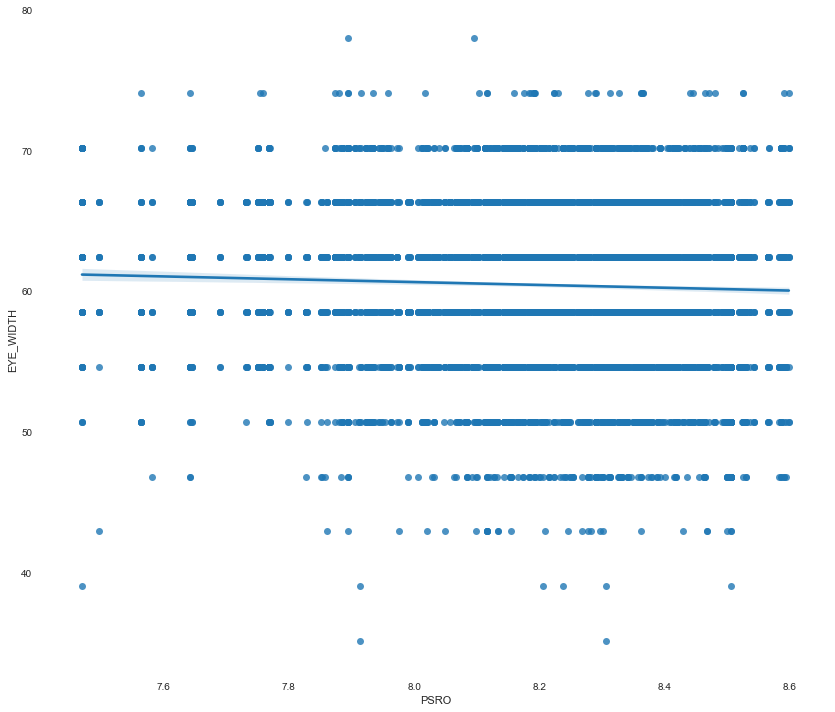

In [114]:

sns.lmplot(x ='PSRO', y ='EYE_WIDTH', data = df_new[['PSRO','EYE_WIDTH']].sort_values('EYE_WIDTH'),height=10, aspect=11.7/10, palette ='coolwarm')

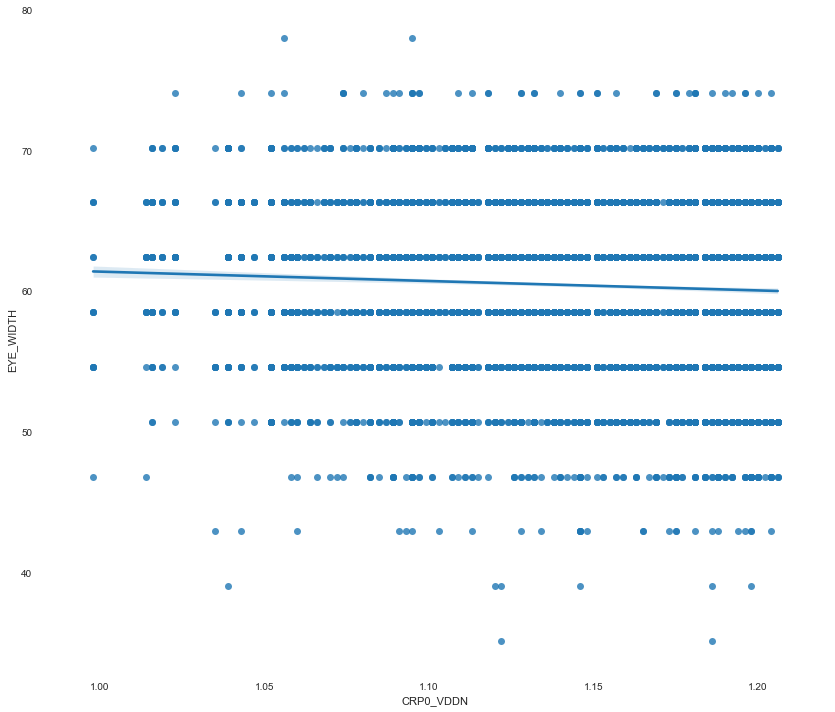

In [109]:

sns.lmplot(x ='CRP0_VDDN', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

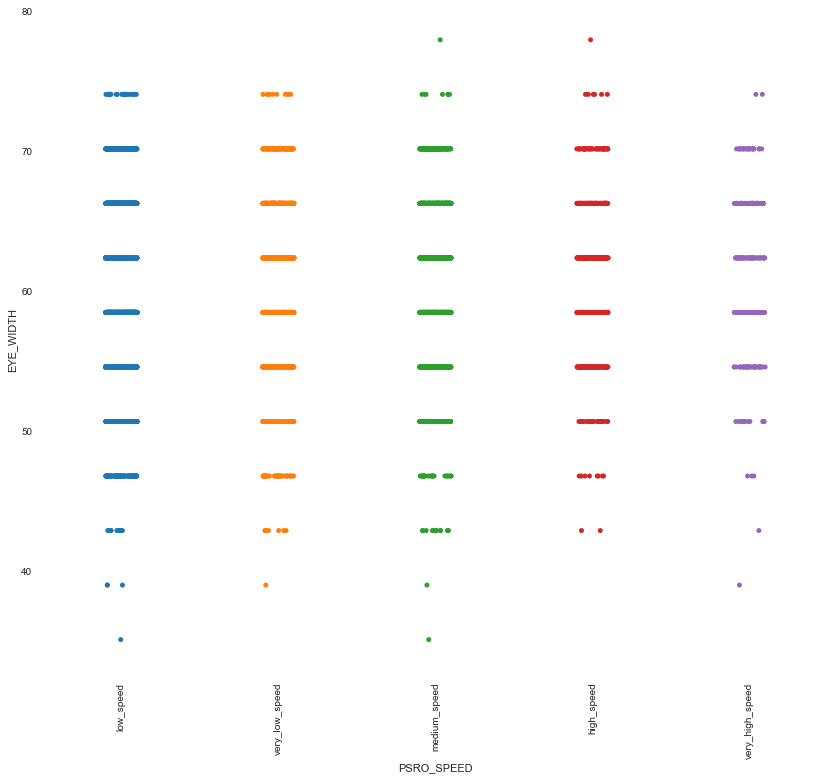

In [110]:
g=sns.catplot('PSRO_SPEED','EYE_WIDTH',data=df_new, height=10, aspect=11.7/10)
g.set_xticklabels(rotation=90)

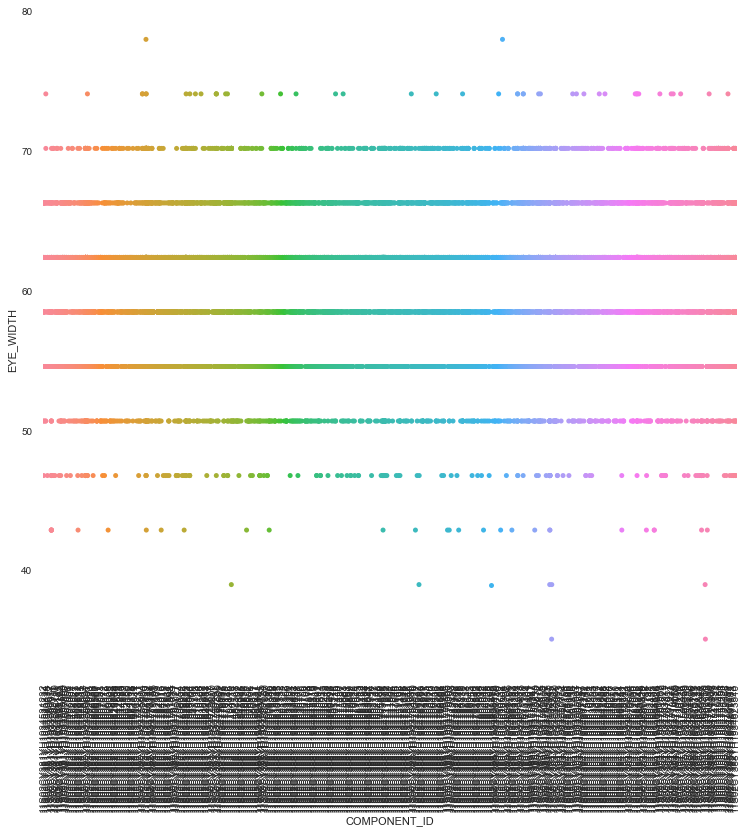

In [112]:
g=sns.catplot('COMPONENT_ID','EYE_WIDTH',data=df_new, height=10, aspect=11.7/10)
g.set_xticklabels(rotation=90)

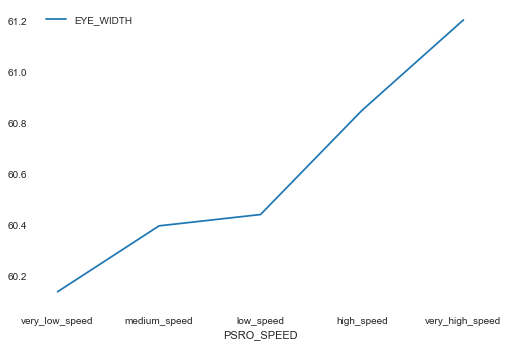

In [111]:
df_new[['PSRO_SPEED','EYE_WIDTH']].groupby('PSRO_SPEED').mean().sort_values('EYE_WIDTH').plot()

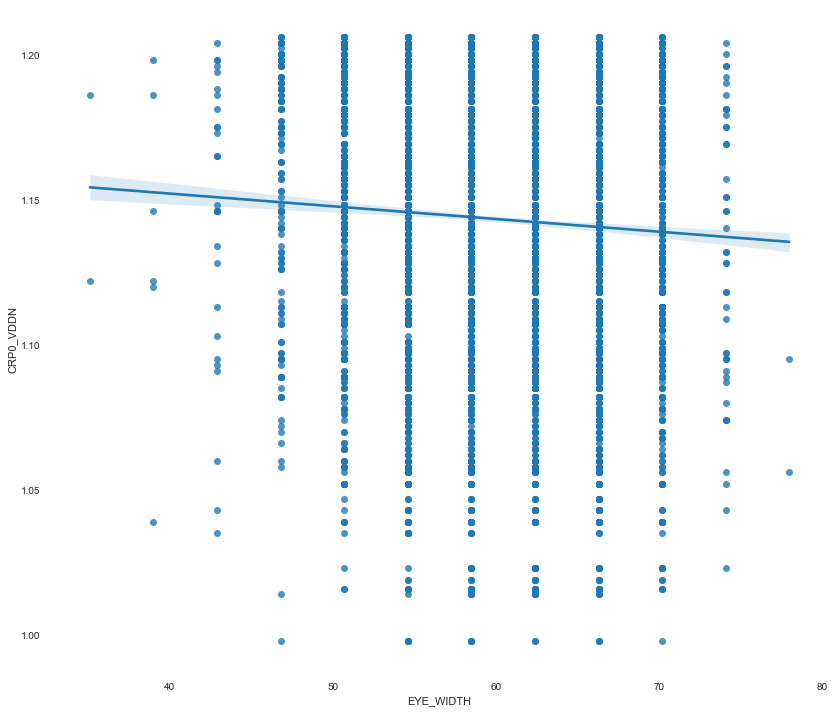

In [116]:
sns.lmplot(x ='EYE_WIDTH', y ='CRP0_VDDN', data = df_new[['EYE_WIDTH','CRP0_VDDN']].sort_values('CRP0_VDDN'),height=10, aspect=11.7/10, palette ='coolwarm')

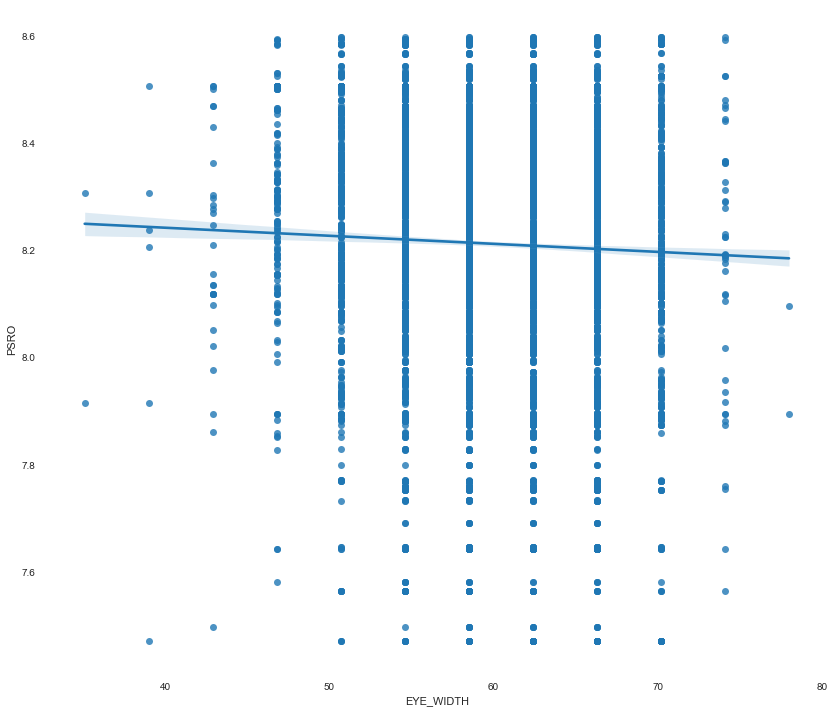

In [117]:
sns.lmplot(x ='EYE_WIDTH', y ='PSRO', data = df_new[['EYE_WIDTH','PSRO']].sort_values('PSRO'),height=10, aspect=11.7/10, palette ='coolwarm')

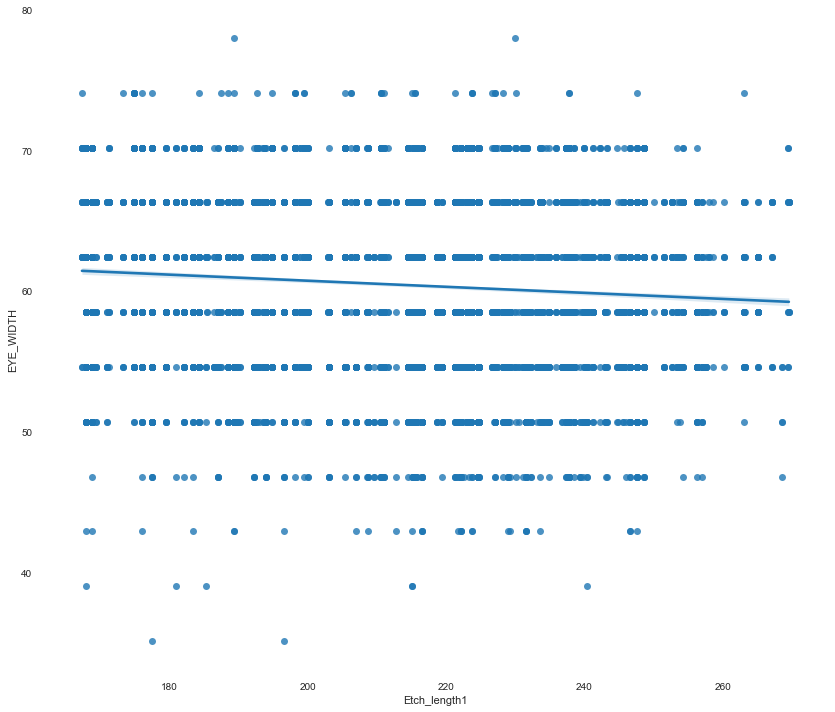

In [118]:

sns.lmplot(x ='Etch_length1', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

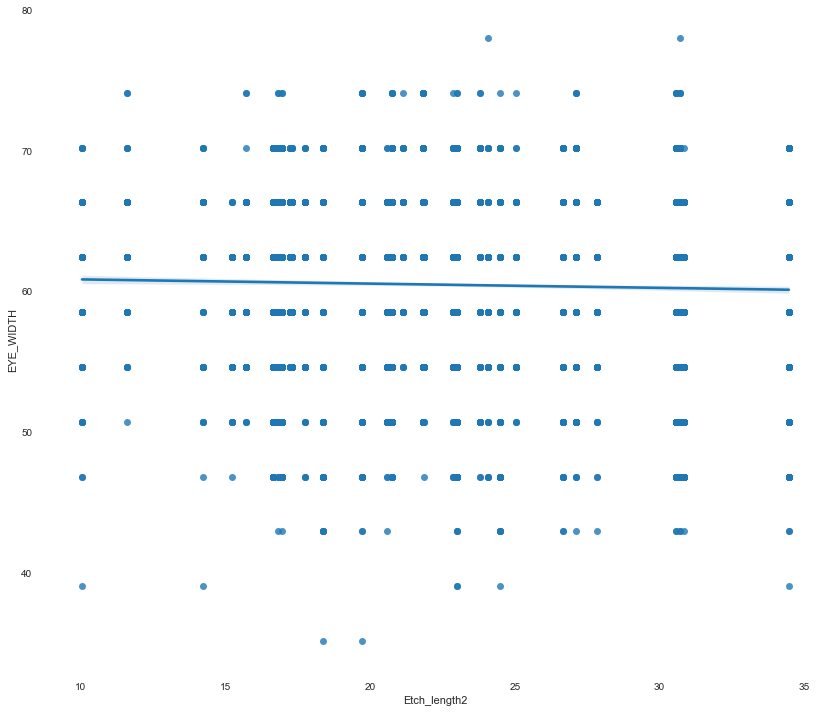

In [119]:

sns.lmplot(x ='Etch_length2', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

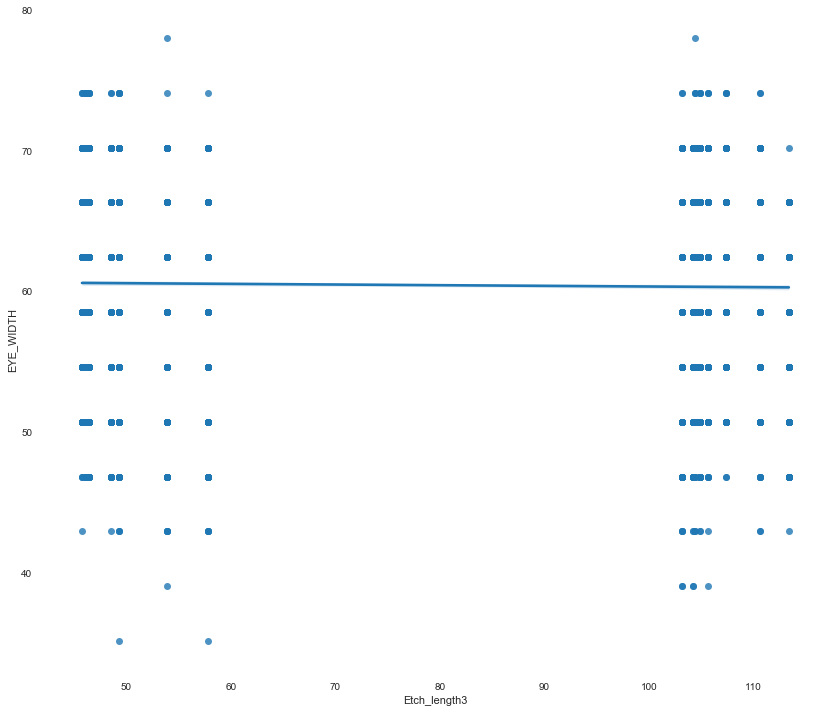

In [120]:

sns.lmplot(x ='Etch_length3', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

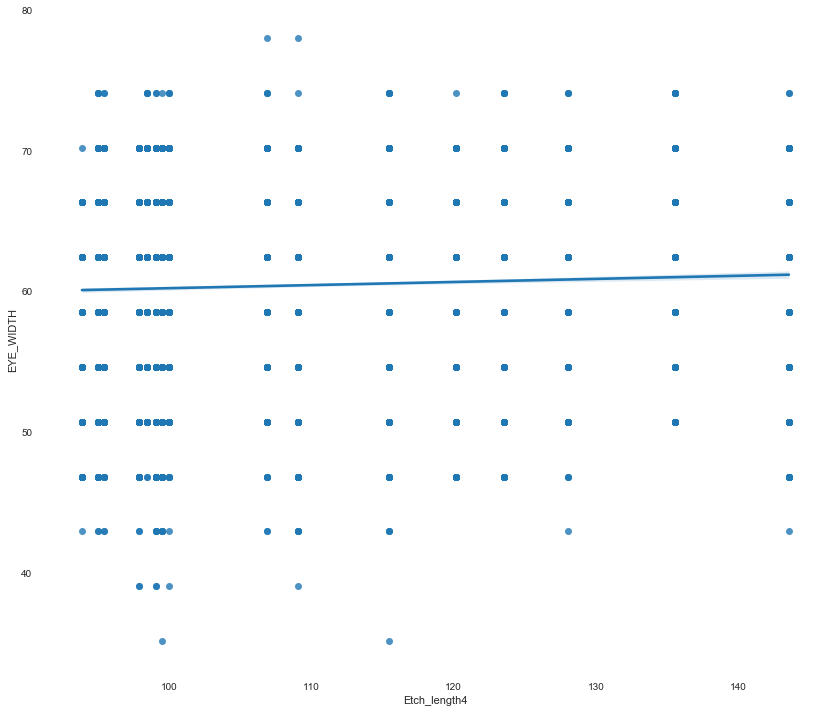

In [121]:

sns.lmplot(x ='Etch_length4', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

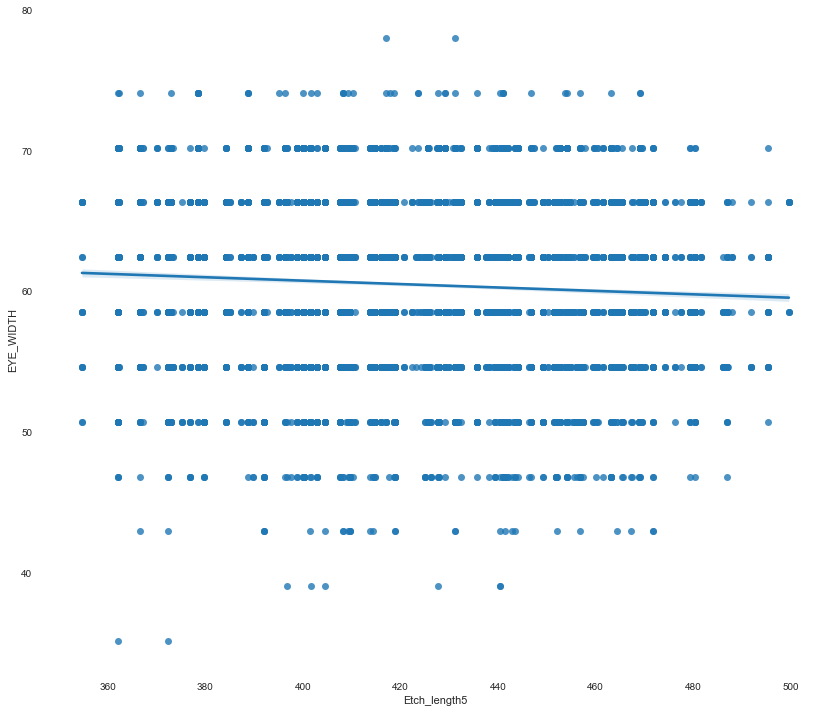

In [122]:

sns.lmplot(x ='Etch_length5', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

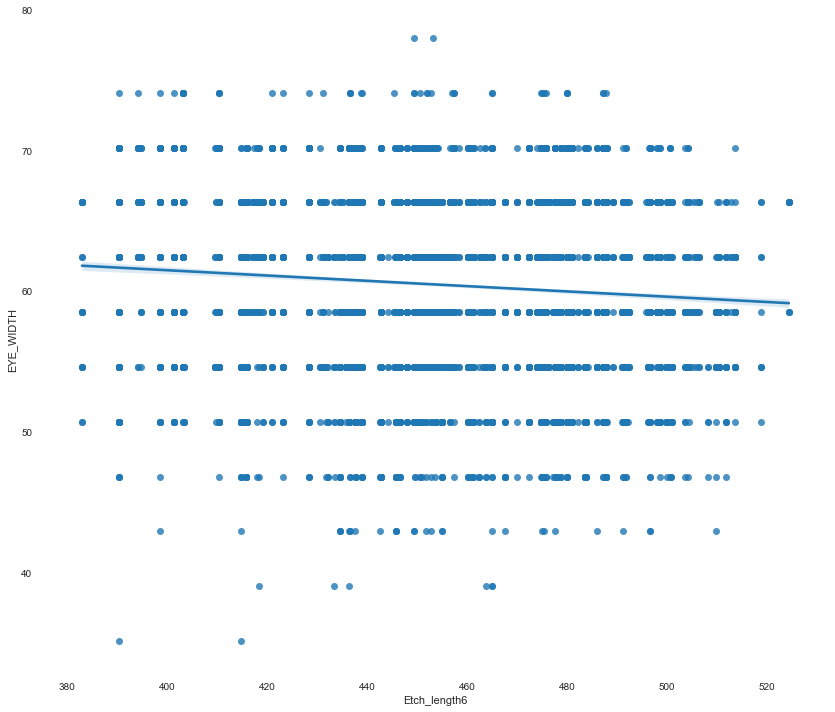

In [123]:

sns.lmplot(x ='Etch_length6', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

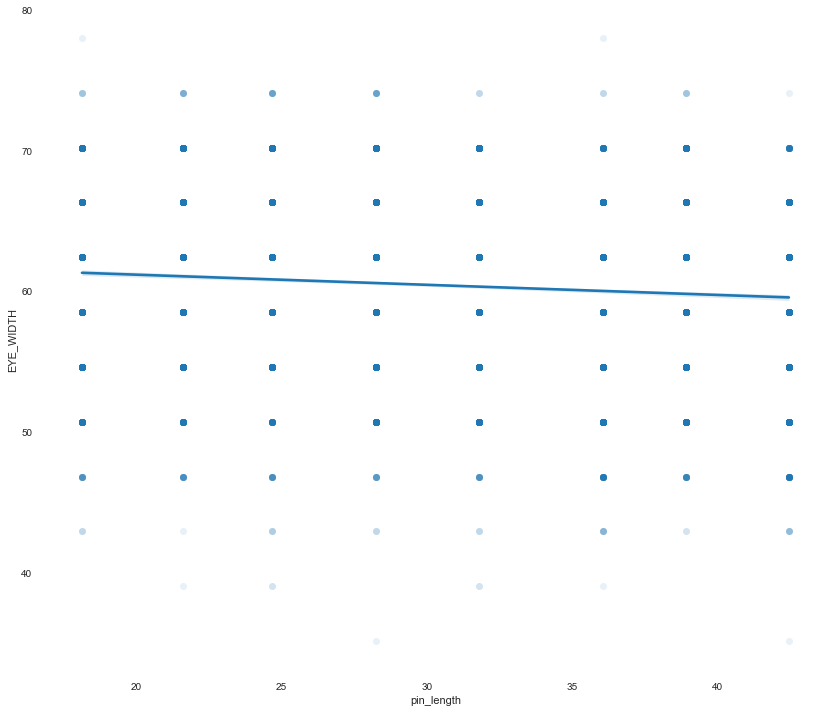

In [349]:

sns.lmplot(x ='pin_length', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm',scatter_kws={'alpha': 0.1})

In [127]:
df_new['CORNER'] = calc_smooth_mean(df_new, by='CORNER', on='EYE_WIDTH', m=300)
df_new['COMPONENT_ID'] = calc_smooth_mean(df_new, by='COMPONENT_ID', on='EYE_WIDTH', m=300)
df_new['SLOTID_DEC'] = calc_smooth_mean(df_new, by='SLOTID_DEC', on='EYE_WIDTH', m=300)
df_new['PNP_FILE'] = calc_smooth_mean(df_new, by='PNP_FILE', on='EYE_WIDTH', m=300)
df_new['HOME_DIRECTORY'] = calc_smooth_mean(df_new, by='HOME_DIRECTORY', on='EYE_WIDTH', m=300)
df_new['PLUGPOSITION'] = calc_smooth_mean(df_new, by='PLUGPOSITION', on='EYE_WIDTH', m=300)
df_new['SLOTID'] = calc_smooth_mean(df_new, by='SLOTID', on='EYE_WIDTH', m=300)
df_new['TEST_DATE'] = calc_smooth_mean(df_new, by='TEST_DATE', on='EYE_WIDTH', m=300)
df_new['FINISH_TIMESTAMP'] = calc_smooth_mean(df_new, by='FINISH_TIMESTAMP', on='EYE_WIDTH', m=300)
df_new['START_TIMESTAMP'] = calc_smooth_mean(df_new, by='START_TIMESTAMP', on='EYE_WIDTH', m=300)
df_new['LANE'] = calc_smooth_mean(df_new, by='LANE', on='EYE_WIDTH', m=300)

C:\Users\ChinmayHegde\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ChinmayHegde\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ChinmayHegde\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

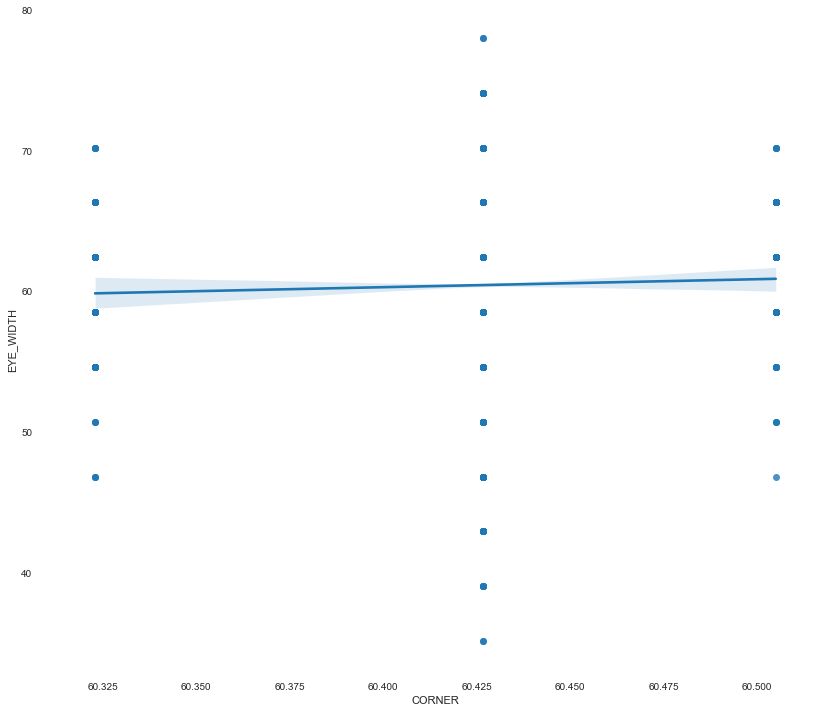

In [128]:
sns.lmplot(x ='CORNER', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

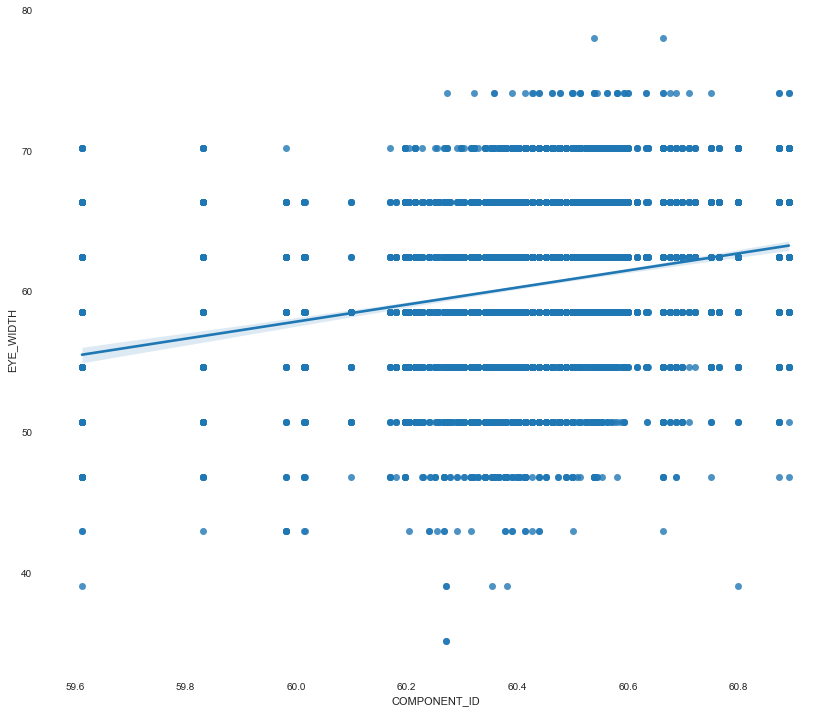

In [129]:
sns.lmplot(x ='COMPONENT_ID', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

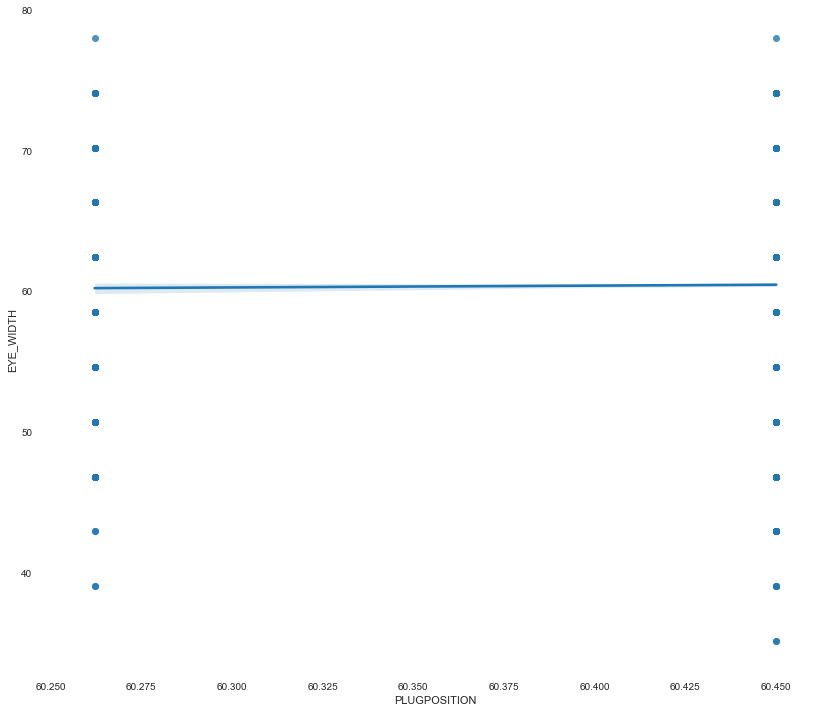

In [131]:
sns.lmplot(x ='PLUGPOSITION', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

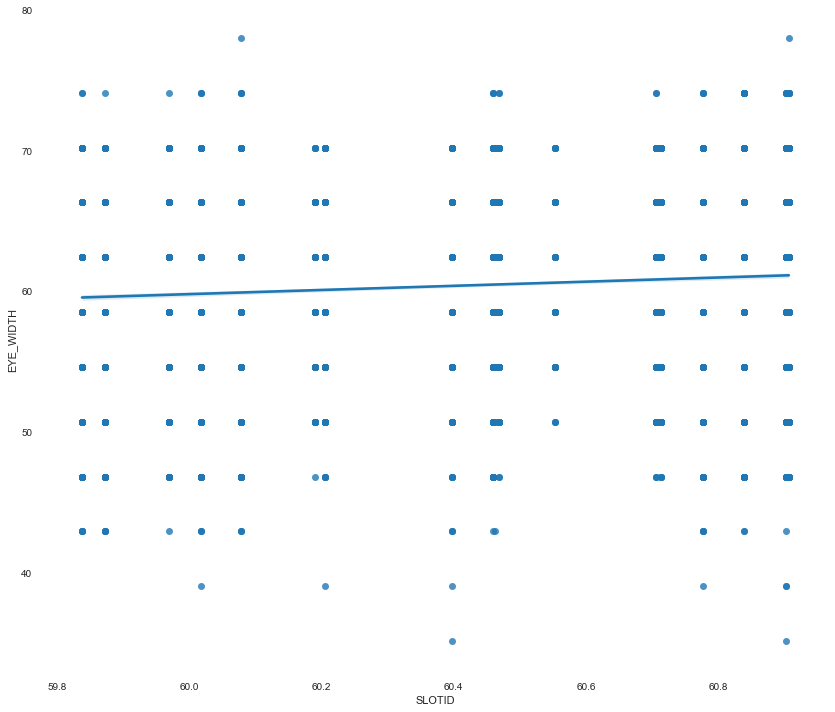

In [132]:
sns.lmplot(x ='SLOTID', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

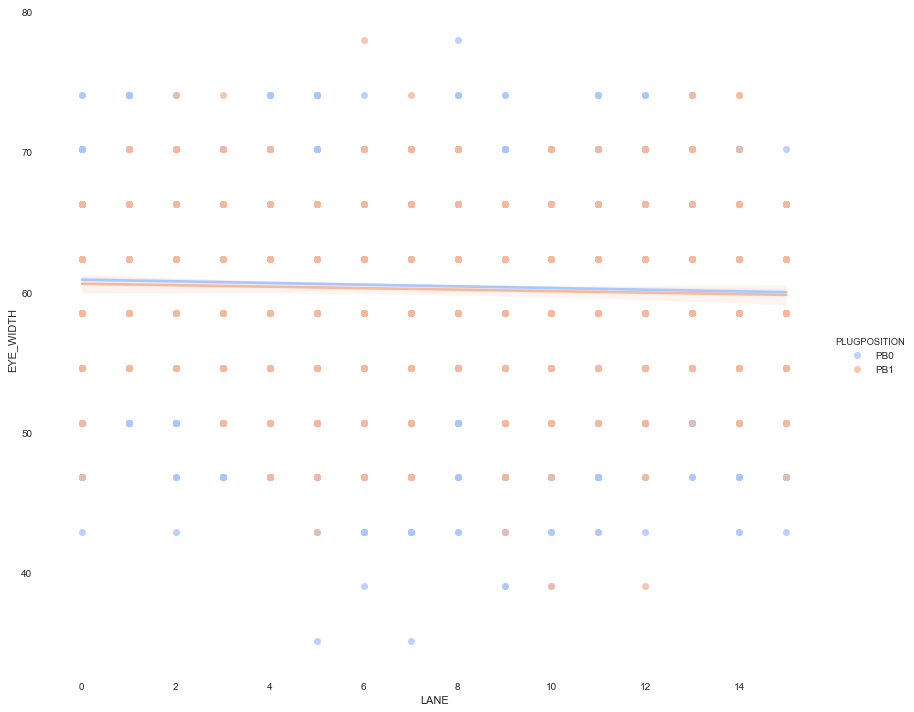

In [30]:
sns.lmplot(x ='LANE', y ='EYE_WIDTH',hue='PLUGPOSITION' ,data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

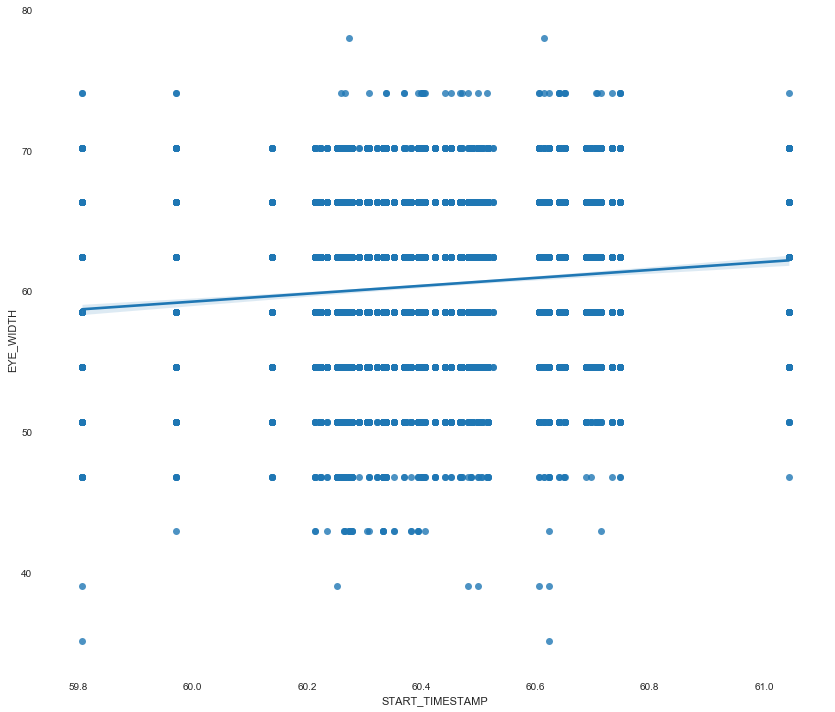

In [134]:
sns.lmplot(x ='START_TIMESTAMP', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

In [27]:
#Funtion for target encoding
def traintest_meanenc():
    import pandas as pd
   # df_new=pd.read_csv('Midas_with_mac.csv')
   # df_new=pd.read_csv('PCIE_PSRO.csv')
    #df_new=df_new
    #df_new=df_new[['EYE_MIN','PARM_LABEL','FROM_ID', 'FROM_LOCATION',  'MACHINE_TYPE', 'TESTPROGRAMNAME', 'ARCHIVEFILENAME', 'TEST_DATE', 'INTERFACE', 'MONTH', 'YEAR']]
    #df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
    #df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
    #df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
    #df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
   
    X=pd.get_dummies(df_new[['PSRO_SPEED','VOLTAGE']])
   
    y=df_new['EYE_WIDTH']
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
    Train=pd.concat((X_train,y_train),axis=1)
    
    X_train2=X_train[[]]
    X_test2=X_test[[ ]]
    
    #cols=[ 'COMPONENT_ID','PLUGPOSITION','SLOTID','LANE','CORNER','Machine']
    cols=[   ]
    
    for col in cols:
        
        means = Train.groupby(col).EYE_WIDTH.mean()
        X_train[col] = X_train[col].map(means)
        X_test[col] = X_test[col].map(means)
        X_train[col].fillna(means.mean(), inplace = True)
        X_test[col].fillna(means.mean(), inplace = True)
        X_train1=X_train[[col]]
        X_test1=X_test[[col]]
        X_train1[col].fillna(means.mean(), inplace = True)
        X_train2=pd.concat((X_train1,X_train),axis=1)
        X_test2=pd.concat((X_test1,X_test),axis=1)
    
    return X_train,y_train,X_test,y_test
    

In [28]:
X_train,y_train,X_test,y_test=traintest_meanenc()

In [57]:
regr = RandomForestRegressor( random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [58]:
y_pred = regr.predict(X_test)

In [59]:
real=[54.6, 66.3, 58.5, 62.4, 50.7, 46.8, 70.2, 74.1, 42.9, 78. , 39. , 35.1]

for i in range(len(y_pred)):
    y_pred[i]=real[np.argmin(abs(y_pred[i]-real))]


In [60]:
y_pred

array([62.4, 62.4, 62.4, 62.4, 62.4, 62.4, 58.5, 62.4, 62.4, 62.4, 58.5,
       62.4, 62.4, 58.5, 58.5, 62.4, 58.5, 62.4, 58.5, 58.5, 58.5, 58.5,
       62.4, 58.5, 62.4, 58.5, 58.5, 58.5, 58.5, 58.5, 62.4, 58.5, 62.4,
       62.4, 62.4, 58.5, 58.5, 62.4, 58.5, 58.5, 58.5, 58.5, 62.4, 58.5,
       58.5, 58.5, 62.4, 62.4, 62.4, 58.5, 62.4, 62.4, 62.4, 62.4, 58.5,
       58.5, 62.4, 62.4, 58.5, 58.5, 62.4, 58.5, 62.4, 58.5, 62.4, 58.5,
       58.5, 62.4, 62.4, 58.5, 58.5, 62.4, 58.5, 62.4, 62.4, 62.4, 58.5,
       58.5, 58.5, 62.4, 62.4, 58.5, 62.4, 58.5, 58.5, 58.5, 58.5, 58.5,
       62.4, 58.5, 62.4, 58.5, 62.4, 62.4, 58.5, 62.4, 58.5, 62.4, 58.5,
       58.5, 58.5, 62.4, 58.5, 62.4, 58.5, 58.5, 62.4, 58.5, 62.4, 58.5,
       58.5, 62.4, 58.5, 62.4, 58.5, 58.5, 58.5, 58.5, 62.4, 58.5, 58.5,
       62.4, 62.4, 62.4, 58.5, 62.4, 58.5, 58.5, 62.4, 62.4, 62.4, 58.5,
       58.5, 58.5, 58.5, 58.5, 62.4, 58.5, 58.5, 58.5, 58.5, 62.4, 62.4,
       58.5, 62.4, 58.5, 62.4, 58.5, 58.5, 58.5, 58

In [45]:
len(y_pred)

259

In [46]:
np.sum(y_pred == np.asarray(y_test))

70

In [47]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.32162162162162
Mean Squared Error: 31.183436293436284
Root Mean Squared Error: 5.584213131089848


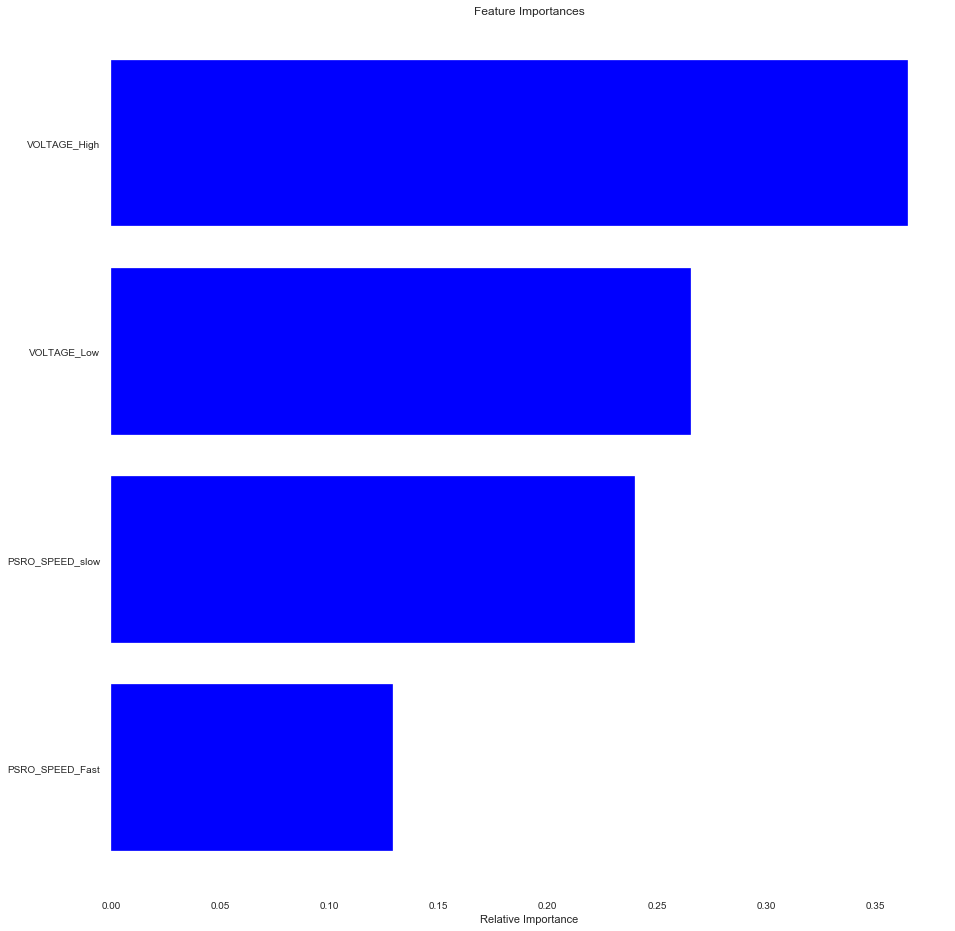

In [36]:
features = X_test.columns
importances = regr.feature_importances_
indices = np.argsort(importances)
f,ax=plt.subplots(figsize=(15,16))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [61]:
estimators_limited=regr.estimators_[5]

In [62]:
from sklearn.tree import export_graphviz
export_graphviz(estimators_limited,out_file='tree1.dot',feature_names=X_test.columns,rounded=True,proportion=False,precision=2,filled=True)

In [506]:
from subprocess import check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi=600'])


FileNotFoundError: [WinError 2] The system cannot find the file specified

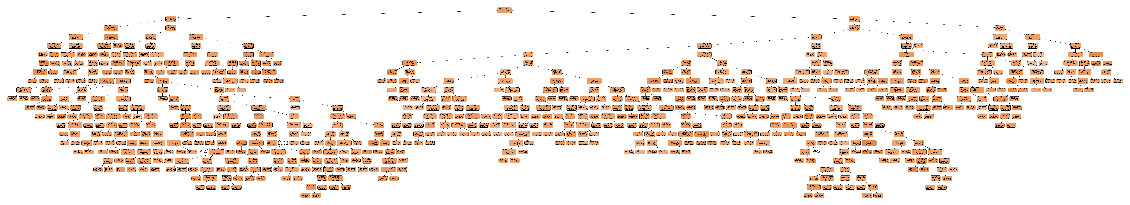

In [507]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(plt.imread('tree1.png'))
plt.axis('off');
plt.show();

In [401]:
df_new['CORNER'] = calc_smooth_mean(df_new, by='CORNER', on='EYE_WIDTH', m=300)
df_new['COMPONENT_ID'] = calc_smooth_mean(df_new, by='COMPONENT_ID', on='EYE_WIDTH', m=300)
df_new['SLOTID_DEC'] = calc_smooth_mean(df_new, by='SLOTID_DEC', on='EYE_WIDTH', m=300)
df_new['PNP_FILE'] = calc_smooth_mean(df_new, by='PNP_FILE', on='EYE_WIDTH', m=300)
df_new['HOME_DIRECTORY'] = calc_smooth_mean(df_new, by='HOME_DIRECTORY', on='EYE_WIDTH', m=300)
df_new['PLUGPOSITION'] = calc_smooth_mean(df_new, by='PLUGPOSITION', on='EYE_WIDTH', m=300)
df_new['SLOTID'] = calc_smooth_mean(df_new, by='SLOTID', on='EYE_WIDTH', m=300)
df_new['TEST_DATE'] = calc_smooth_mean(df_new, by='TEST_DATE', on='EYE_WIDTH', m=300)
df_new['FINISH_TIMESTAMP'] = calc_smooth_mean(df_new, by='FINISH_TIMESTAMP', on='EYE_WIDTH', m=300)
df_new['START_TIMESTAMP'] = calc_smooth_mean(df_new, by='START_TIMESTAMP', on='EYE_WIDTH', m=300)
df_new['LANE'] = calc_smooth_mean(df_new, by='LANE', on='EYE_WIDTH', m=300)

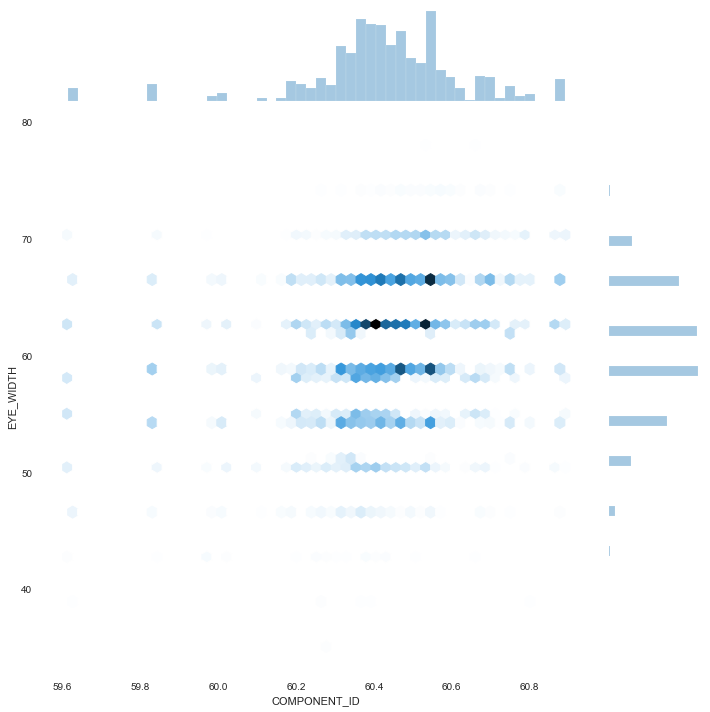

In [405]:
sns.jointplot(x ='COMPONENT_ID', y ='EYE_WIDTH', data = df_new,height=10,kind="hex")

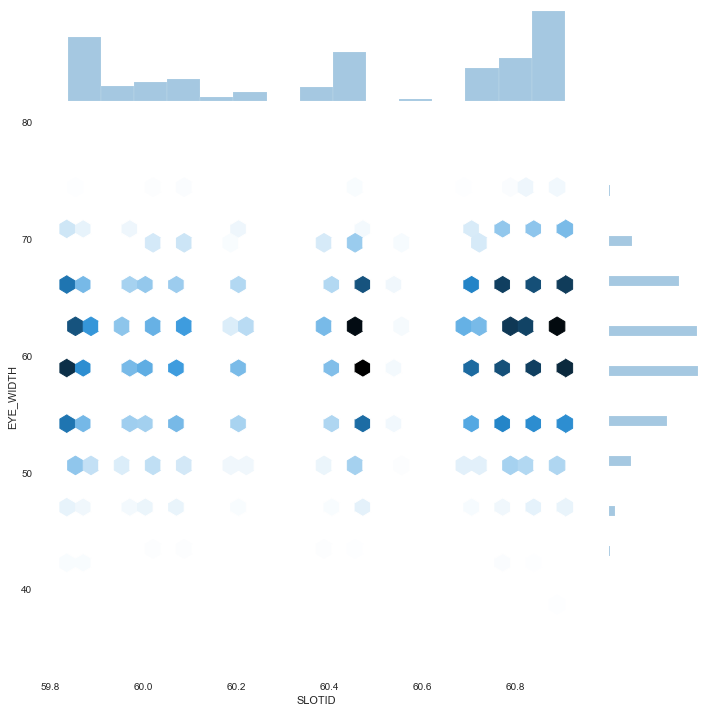

In [407]:
sns.jointplot(x ='SLOTID', y ='EYE_WIDTH', data = df_new,height=10,kind="hex")

In [494]:
df_new[['SLOTID','EYE_WIDTH']].groupby('SLOTID').mean().sort_values('EYE_WIDTH')

EYE_WIDTH
SLOTID             
N2CP1.CP  59.554054
N4CP1.CP  59.583333
N4CP2.CP  59.586351
N6CP0.CP  59.657317
N5CP2.CP  59.752371
N6CP1.CP  59.882463
N6CP2.CP  59.910268
N1CP1.CP  60.372881
N4CP0.CP  60.469657
N3CP2.CP  60.552632
N0CP1.CP  60.693750
N7CP1.CP  60.878963
N2CP0.CP  60.893973
N0CP0.CP  60.959659
N5CP1.CP  60.960174
N7CP2.CP  61.131100
N3CP1.CP  61.185000
N1CP2.CP  61.343750

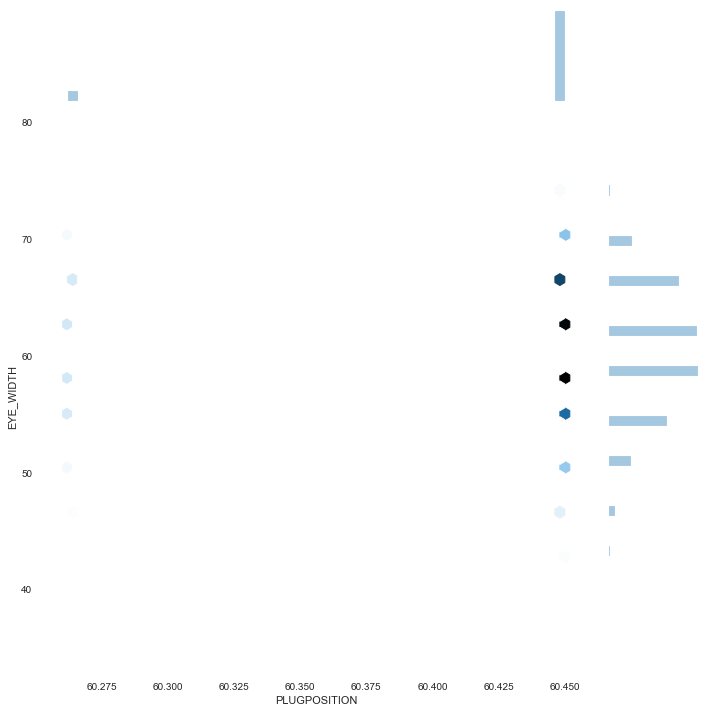

In [408]:
sns.jointplot(x ='PLUGPOSITION', y ='EYE_WIDTH', data = df_new,height=10,kind="hex")

In [7]:
sns.jointplot(x ='EYE_WIDTH', y ='Etch_length6', data = df_new,height=10,kind="hex")

NameError: name 'df_new' is not defined

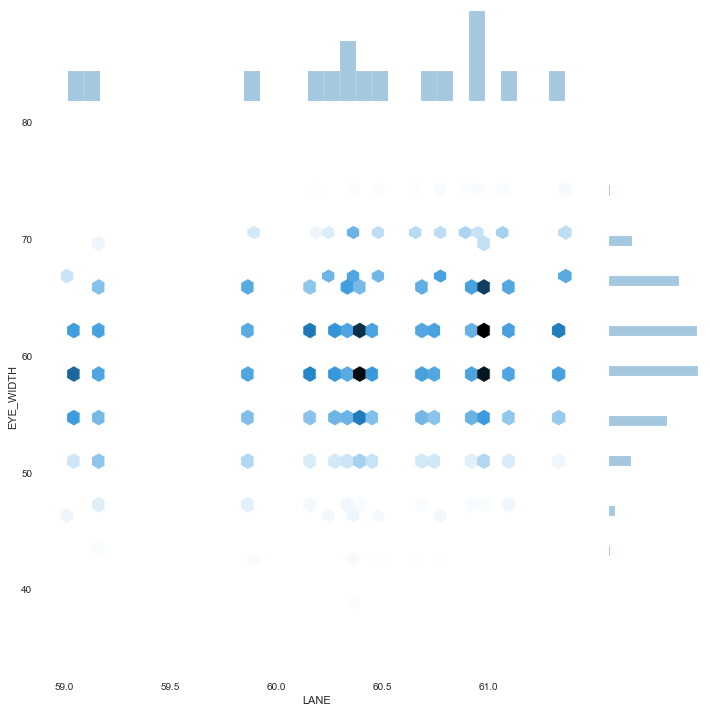

In [413]:
sns.jointplot(x ='LANE', y ='EYE_WIDTH', data = df_new,height=10,kind="hex")

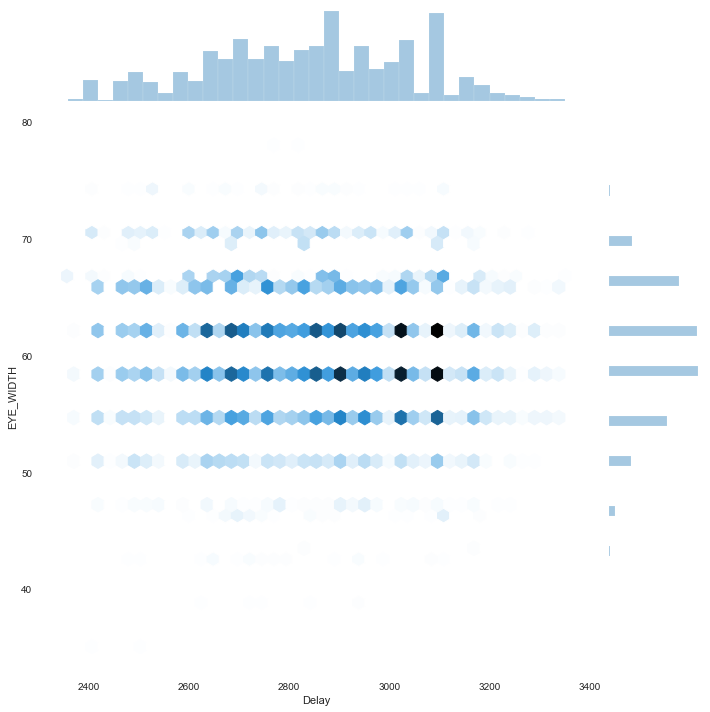

In [707]:
snsns.jointplot(x ='LANE', y ='EYE_WIDTH', data = df_new,height=10,kind="hex")s.jointplot(x ='Delay', y ='EYE_WIDTH', data = df_new,height=10,kind="hex")

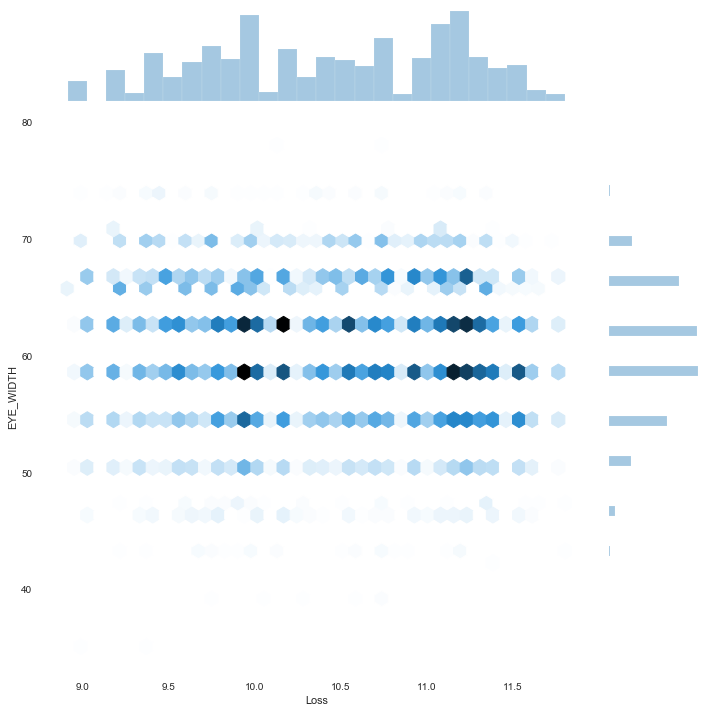

In [708]:
sns.jointplot(x ='Loss', y ='EYE_WIDTH', data = df_new,height=10,kind="hex")
+

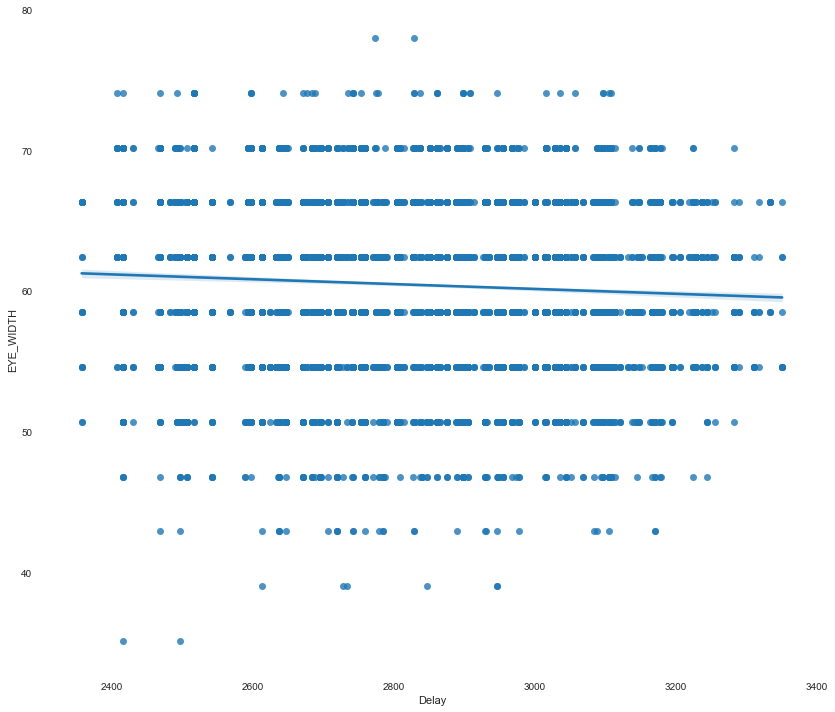

In [710]:
sns.lmplot(x ='Delay', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

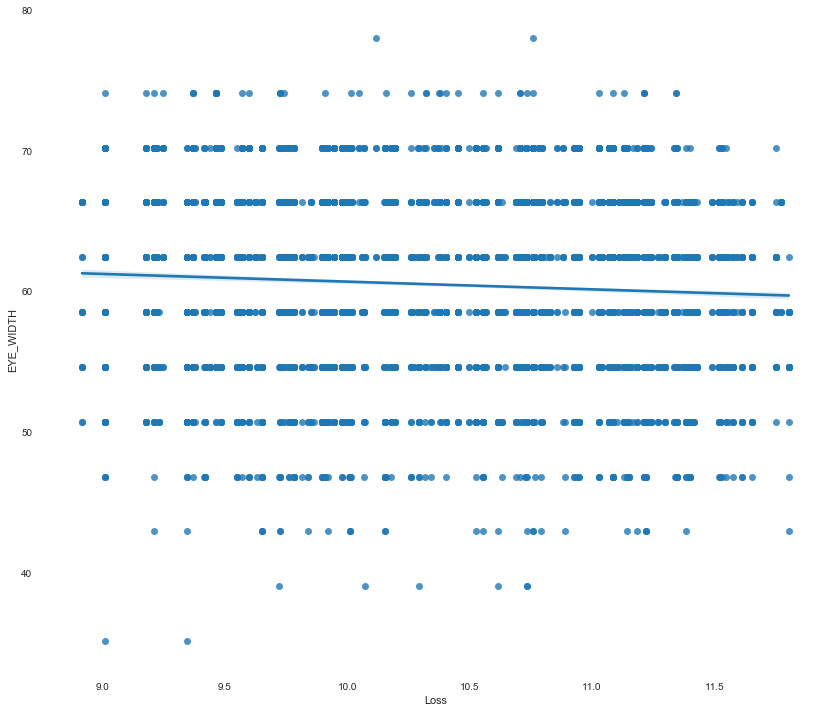

In [709]:
sns.lmplot(x ='Loss', y ='EYE_WIDTH', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

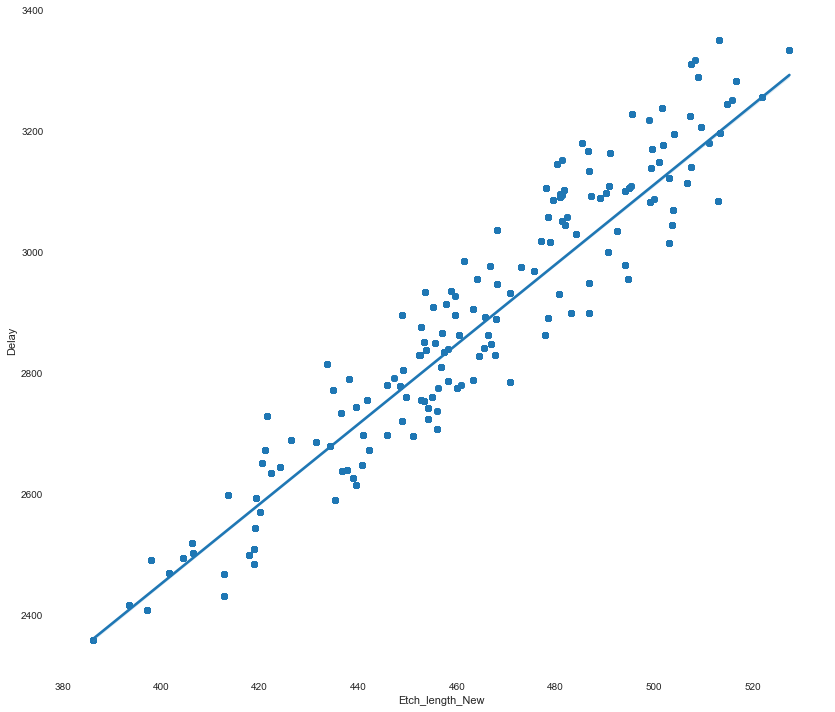

In [712]:
sns.lmplot(x ='Etch_length_New', y ='Delay', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

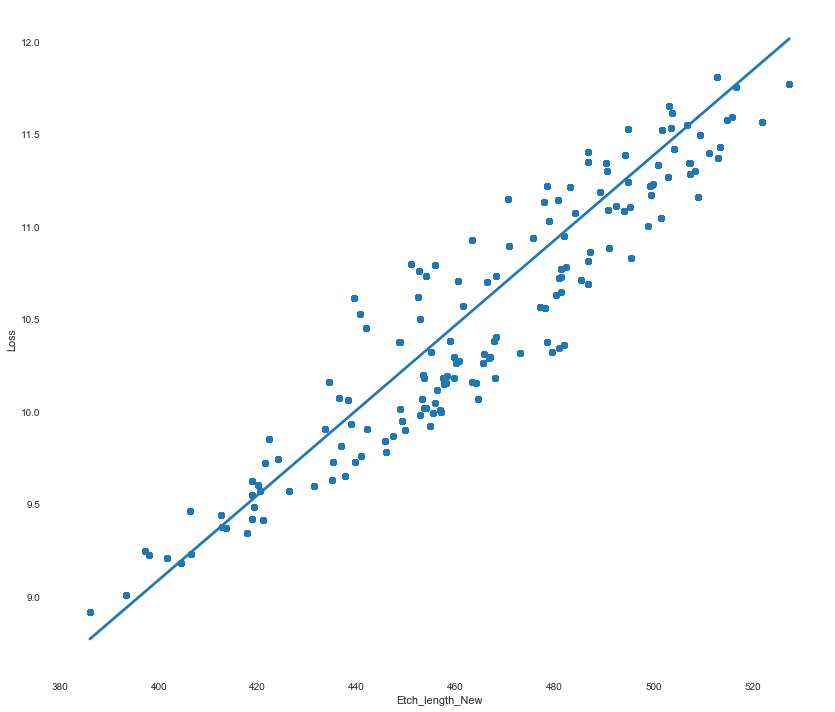

In [713]:
sns.lmplot(x ='Etch_length_New', y ='Loss', data = df_new,height=10, aspect=11.7/10, palette ='coolwarm')

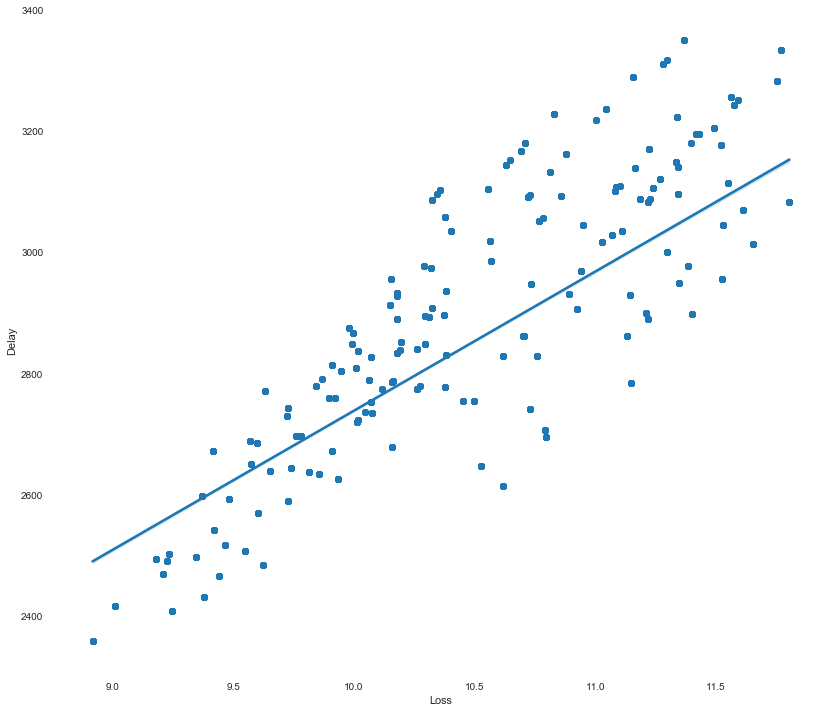

In [714]:
sns.lmplot(x ='Loss', y ='Delay', data = df_new , height=10, aspect=11.7/10, palette ='coolwarm')

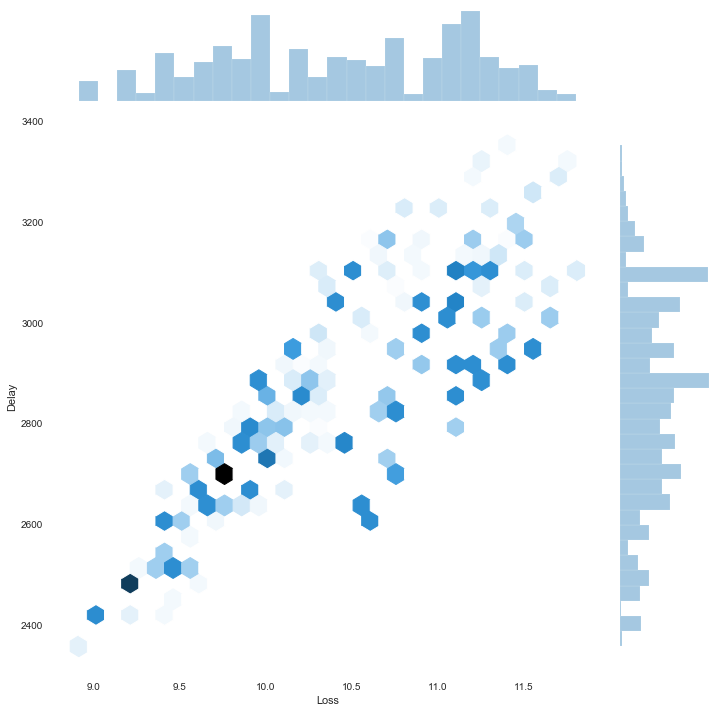

In [715]:
sns.jointplot(x ='Loss', y ='Delay', data = df_new,height=10,kind="hex")

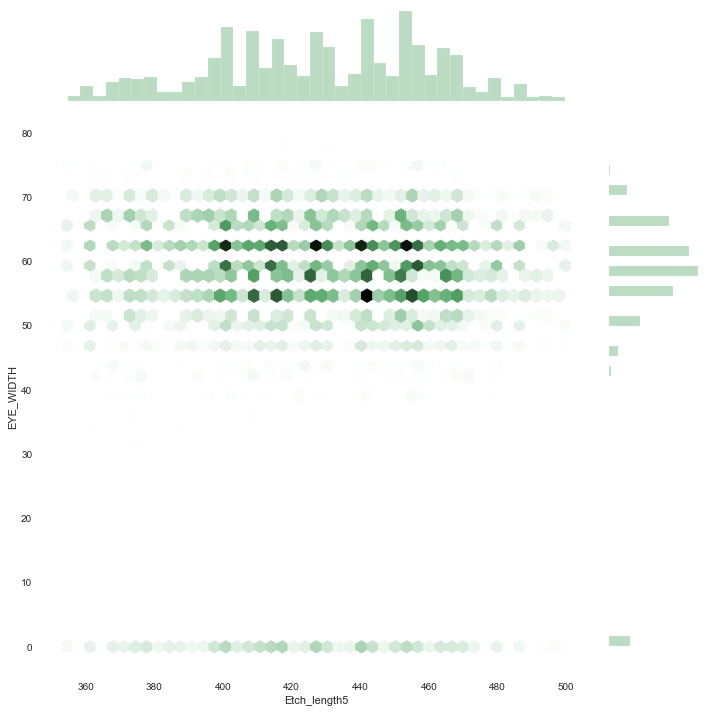

In [11]:
sns.jointplot(x ='Etch_length5', y ='EYE_WIDTH', data = df_new,height=10,kind="hex",color='g')

In [22]:
df_new=pd.read_csv('PCIE_PSRO.csv')

In [444]:
df1=df_new[['COMPONENT_ID','EYE_WIDTH']].groupby('COMPONENT_ID').mean().sort_values('EYE_WIDTH')

In [445]:
df2=df_new[['COMPONENT_ID','EYE_WIDTH']].groupby('COMPONENT_ID').std().sort_values('EYE_WIDTH')

In [446]:
df2.columns

Index(['EYE_WIDTH'], dtype='object')

In [447]:
df1=df1.rename(columns={"EYE_WIDTH":"MEAN"})

In [448]:
df2=df2.rename(columns={"EYE_WIDTH":"STD"})

In [449]:
df1=df1.reset_index()

In [450]:
df2=df2.reset_index()

In [451]:
df1=df1.merge(df2, on='COMPONENT_ID', how='left')

In [452]:
len(df1)

366

In [453]:
len(df2)

366

In [443]:
df_new['COMPONENT_ID'].nunique()

366

In [23]:
df3=df_new[['LANE','EYE_WIDTH']].groupby('LANE').mean().sort_values('EYE_WIDTH')

In [24]:
df4=df_new[['LANE','EYE_WIDTH']].groupby('LANE').std().sort_values('EYE_WIDTH')

In [25]:
df3=df3.rename(columns={"EYE_WIDTH":"MEAN"})

In [26]:
df4=df4.rename(columns={"EYE_WIDTH":"STD"})

In [27]:
df3=df3.reset_index()

In [28]:
df4=df4.reset_index()

In [460]:
df3=df3.merge(df4, on='LANE', how='left')

In [472]:
print(df3)

    LANE       MEAN       STD
0     15  58.253165  4.406800
1      6  58.478919  6.094752
2      7  59.580216  6.276227
3      0  60.031892  4.826171
4      3  60.165405  5.249672
5     10  60.291892  5.834346
6      9  60.340687  6.094110
7     14  60.368897  5.296284
8     11  60.499457  5.783946
9      8  60.824457  5.781559
10     5  60.957630  6.026924
11    12  61.168051  5.782543
12    13  61.273646  5.217635
13     2  61.275676  5.181448
14     4  61.435560  5.804857
15     1  61.865946  4.919758


In [470]:
np.std(df3['MEAN'])

0.968568007346252

In [474]:
df1

COMPONENT_ID       MEAN       STD
0    11S02CY395YH1934662750  37.050000  2.757716
1    11S02CY394YH1934506185  37.050000  2.757716
2    11S02CY388YH1934807298  39.000000       NaN
3    11S02CY388YH1934608386  56.062500  6.020839
4    11S02CY395YH1934702963  56.184375  5.502909
5    11S02CY394YH1934701507  56.550000  7.120393
6    11S02CY388YH1934608187  56.793750  5.322464
7    11S02CY388YH1934480111  57.037500  5.492404
8    11S02CY394YH1934616071  57.037500  5.311506
9    11S02CY388YH1934546870  57.037500  6.506497
10   11S02CY381YH1934590957  57.200000  7.431732
11   11S02CY388YH1934502322  57.281250  5.463481
12   11S02CY388YH1934645461  57.281250  5.822854
13   11S02CY382YH1934503612  57.281250  7.222024
14   11S02CY381YH1934595165  57.281250  4.204952
15   11S02CY389YH1934755744  57.281250  7.361089
16   11S02CY395YH1934659088  57.443750  6.269986
17   11S02CY382YH1934606553  57.525000  5.232399
18   11S02CY388YH1934579866  57.525000  5.232399
19   11S02CY394YH1934502847  57.707812  6.787884
20   11S02CY388YH1934798532  57.768750  5.735122
21   11S02CY388YH1934595164  57.768750  6.376693
22   11S02CY394YH1934691788  57.768750  7.429645
23   11S02CY382YH1934791564  57.890625  4.963828
24   11S02CY382YH1934795117  58.012500  6.020839
25   11S02CY382YH1934502563  58.012500  4.696222
26   11S02CY382YH1934711231  58.012500  6.506497
27   11S02CY388YH1934548657  58.134375  5.275299
28   11S02CY388YH1934633366  58.175000  5.854708
29   11S02CY382YH1934607053  58.248387  4.143981
30   11S02CY388YH1934645811  58.256250  6.598380
31   11S02CY394YH1934668451  58.256250  7.186837
32   11S02CY394YH1934546961  58.256250  6.598380
33   11S02CY395YH1934779055  58.256250  5.600949
34   11S02CY389YH1934658702  58.256250  5.779154
35   11S02CY388YH1934501467  58.256250  5.226340
36   11S02CY388YH1934651574  58.256250  4.607670
37   11S02CY389YH1934714404  58.256250  5.028581
38   11S02CY388YH1934615934  58.256250  6.283520
39   11S02CY381YH1934595322  58.378125  5.983458
40   11S02CY394YH1934693802  58.500000  5.776147
41   11S02CY389YH1934662561  58.500000  3.983881
42   11S02CY382YH1934607641  58.500000  6.041854
43   11S02CY395YH1934554806  58.500000  4.272236
44   11S02CY382YH1934781893  58.500000  5.871627
45   11S02CY388YH1934749162  58.500000  5.328414
46   11S02CY382YH1934788931  58.500000  4.272236
47   11S02CY388YH1934685047  58.500000  4.202764
48   11S02CY382YH1934795027  58.621875  5.983458
49   11S02CY388YH1934705933  58.719375  5.379281
50   11S02CY388YH1934645462  58.743750  6.120018
51   11S02CY382YH1934528515  58.743750  6.283520
52   11S02CY388YH1934639718  58.743750  6.283520
53   11S02CY388YH1934679809  58.743750  6.598380
54   11S02CY383YH1934632053  58.743750  5.416883
55   11S02CY382YH1934784919  58.743750  5.416883
56   11S02CY382YH1934645487  58.743750  3.891867
57   11S02CY395YH1934800771  58.743750  5.952027
58   11S02CY382YH1934798654  58.743750  4.822720
59   11S02CY388YH1934711302  58.743750  6.120018
60   11S02CY394YH1934650130  58.743750  5.952027
61   11S02CY388YH1934545915  58.743750  4.382080
62   11S02CY388YH1934683162  58.743750  3.621964
63   11S02CY382YH1934684014  58.743750  4.144228
64   11S02CY382YH1934620648  58.743750  5.416883
65   11S02CY382YH1934606567  58.743750  6.442874
66   11S02CY394YH1934645452  58.987500  4.696222
67   11S02CY382YH1934498527  58.987500  5.492404
68   11S02CY394YH1934675782  58.987500  5.492404
69   11S02CY388YH1934637448  58.987500  4.907392
70   11S02CY388YH1934763884  58.987500  5.492404
71   11S02CY382YH1934618363  58.987500  6.020839
72   11S02CY382YH1934625764  58.987500  6.348740
73   11S02CY394YH1934596587  58.987500  5.109843
74   11S02CY388YH1934594821  58.987500  5.304573
75   11S02CY388YH1934644168  58.987500  5.492404
76   11S02CY383YH1934767599  59.109375  4.657866
77   11S02CY388YH1934762699  59.109375  5.952628
78   11S02CY382YH1934609062  59.231250  5.177608
79   11S02CY388YH1934482568  59.231250  4.977914
80   11S02CY388YH1934753749  59.231250  4.7698

In [471]:
np.std(df1['MEAN'])

2.587497825947636

In [473]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
# Read data from a csv

fig = go.Figure(data=[go.Surface(z=df3.values)])
fig.update_layout(title='Nothing', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

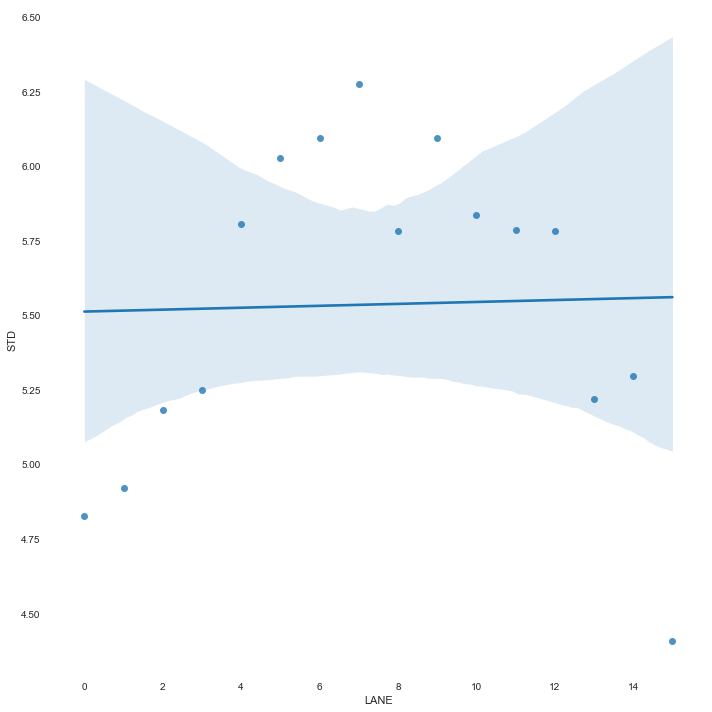

In [29]:
sns.lmplot(x ='LANE', y ='STD', data = df4,height=10)

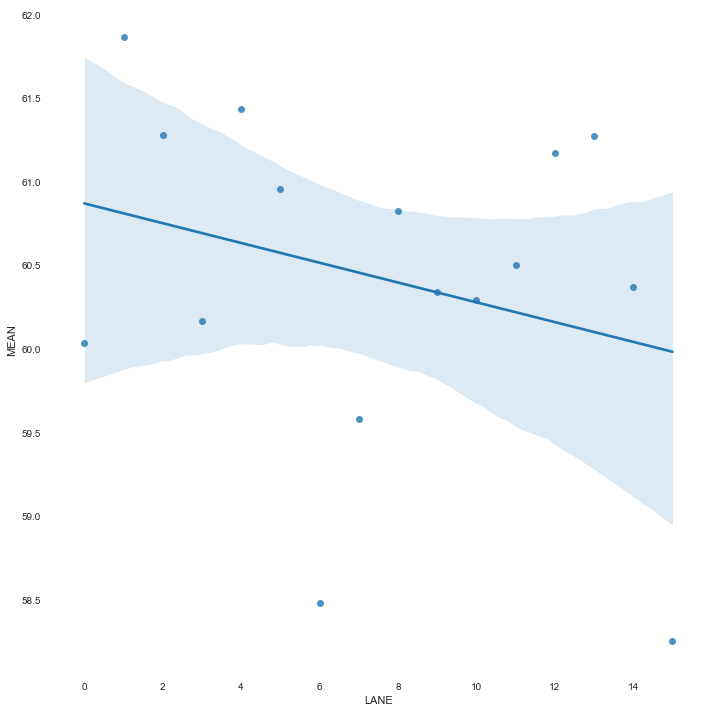

In [477]:
sns.lmplot(x ='LANE', y ='MEAN', data = df3,height=10)

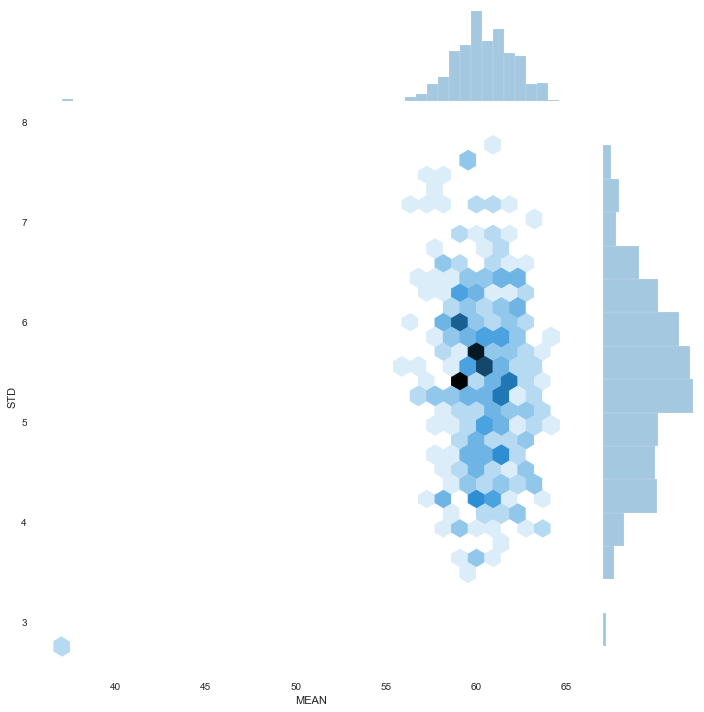

In [479]:
sns.jointplot(x ='MEAN', y ='STD', data = df1,height=10,kind="hex")

In [480]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [493]:
import plotly.express as px
fig = px.scatter_3d(df3, x='LANE', y='MEAN', z='STD',width=1300, height=1000 )
fig.show()

In [330]:
df_new['EYE_WIDTH'].unique()

array([54.6, 66.3, 58.5, 62.4, 50.7, 46.8, 70.2, 74.1, 42.9, 78. , 39. ,
       35.1])

In [331]:
from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [332]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 30, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [ 5, 10,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 5, 8, 11, 14, 17, 20, 23, 26, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [5, 10, 15],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [333]:
rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs =10)

In [334]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   4 out of  15 | elapsed:    2.4s remaining:    6.8s
[Parallel(n_jobs=10)]: Done  12 out of  15 | elapsed:    3.3s remaining:    0.8s
[Parallel(n_jobs=10)]: Done  15 out of  15 | elapsed:    3.8s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [335]:
best_random = rf_random.best_estimator_
y_pred = best_random.predict(X_test)

In [336]:
rf_random.best_params_

{'n_estimators': 94,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [337]:
real=[54.6, 66.3, 58.5, 62.4, 50.7, 46.8, 70.2, 74.1, 42.9, 78. , 39. , 35.1]

for i in range(len(y_pred)):
    y_pred[i]=real[np.argmin(abs(y_pred[i]-real))]


In [338]:
np.sum(y_pred == np.asarray(y_test))

785

In [295]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.209121967885205
Mean Squared Error: 30.186159890673032
Root Mean Squared Error: 5.4941932884339835


In [211]:
print(df_new[['PSRO','CRP0_VDDN','EYE_WIDTH']].head())

    PSRO  CRP0_VDDN  EYE_WIDTH
0  8.299        1.2       54.6
1  8.299        1.2       66.3
2  8.299        1.2       58.5
3  8.299        1.2       58.5
4  8.299        1.2       62.4


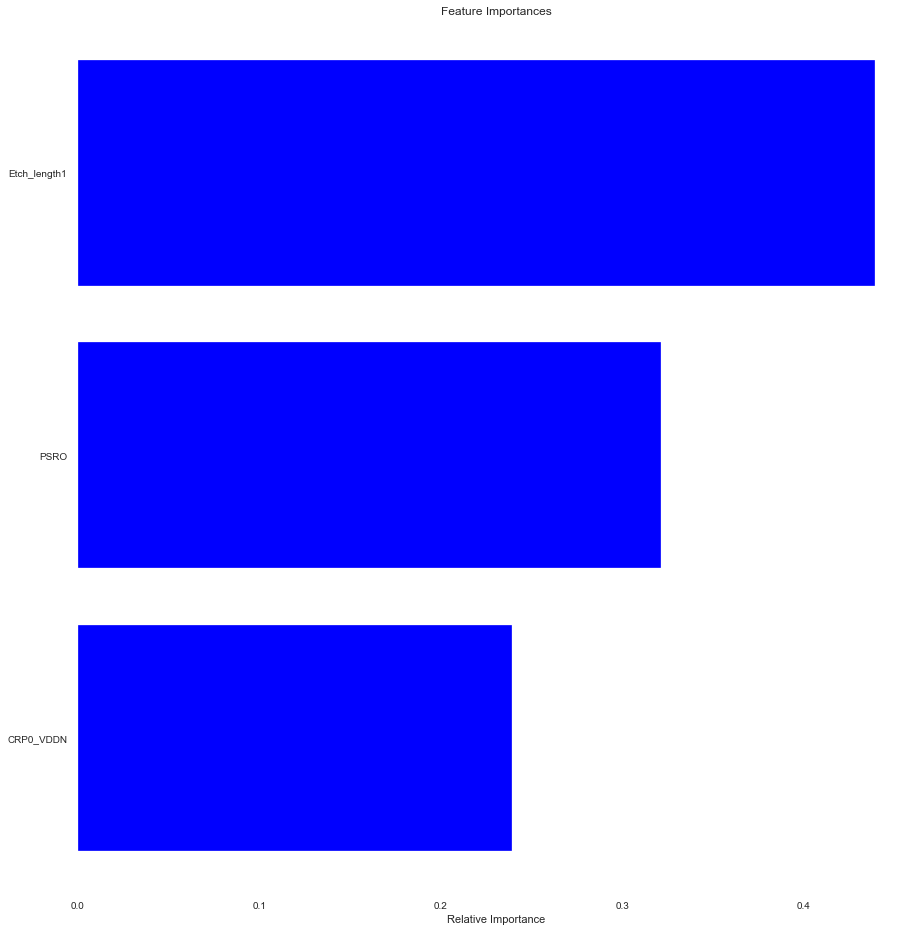

In [339]:
features = X_test.columns
importances = regr.feature_importances_
indices = np.argsort(importances)
f,ax=plt.subplots(figsize=(15,16))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [31]:
df_new=pd.read_csv('PCIE_PSRO.csv')

In [54]:
np.sort(df_new['CRP0_VDDN'].unique())

array([0.998, 1.014, 1.016, 1.019, 1.023, 1.035, 1.039, 1.043, 1.047,
       1.052, 1.056, 1.058, 1.06 , 1.062, 1.064, 1.066, 1.068, 1.07 ,
       1.072, 1.074, 1.076, 1.078, 1.08 , 1.082, 1.085, 1.087, 1.089,
       1.091, 1.093, 1.095, 1.097, 1.099, 1.101, 1.103, 1.105, 1.107,
       1.109, 1.111, 1.113, 1.115, 1.118, 1.12 , 1.122, 1.124, 1.126,
       1.128, 1.13 , 1.132, 1.134, 1.136, 1.138, 1.14 , 1.142, 1.144,
       1.146, 1.148, 1.151, 1.153, 1.155, 1.157, 1.159, 1.161, 1.163,
       1.165, 1.167, 1.169, 1.171, 1.173, 1.175, 1.177, 1.179, 1.181,
       1.184, 1.186, 1.188, 1.19 , 1.192, 1.194, 1.196, 1.198, 1.2  ,
       1.202, 1.204, 1.206])

In [55]:
#Funtion for target encoding
def traintest_meanenc():
    import pandas as pd
   # df_new=pd.read_csv('Midas_with_mac.csv')
    df_new=pd.read_csv('PCIE_PSRO.csv')
    #df_new=df_new[['EYE_MIN','PARM_LABEL','FROM_ID', 'FROM_LOCATION',  'MACHINE_TYPE', 'TESTPROGRAMNAME', 'ARCHIVEFILENAME', 'TEST_DATE', 'INTERFACE', 'MONTH', 'YEAR']]
    #df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
    #df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
    #df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
    #df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
    df_new=df_new[df_new['CRP0_VDDN'].isin([1.052, 1.056, 1.058, 1.06 , 1.062, 1.064, 1.066, 1.068, 1.07 ,
       1.072, 1.074, 1.076, 1.078, 1.08])]
    X=df_new[['PSRO','CRP0_VDDN' ]]
    y=df_new['EYE_WIDTH']
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
   
    
   # y_test=y_test.map({31.2: 'eight', 35.1: 'nine',39: 'ten', 42.9: 'eleven',46.8: 'twelve', 50.7: 'thirteen',54.6: 'fourteen', 58.5: 'fifteen',62.4: 'sixteen', 66.3: 'seventeen',70.2: 'eighteen', 74.1: 'nineteen',78: 'twenty'})
   # y_train=y_train.map({31.2: 'eight', 35.1: 'nine',39: 'ten', 42.9: 'eleven',46.8: 'twelve', 50.7: 'thirteen',54.6: 'fourteen', 58.5: 'fifteen',62.4: 'sixteen', 66.3: 'seventeen',70.2: 'eighteen', 74.1: 'nineteen',78: 'twenty'})
    return X_train,y_train,X_test,y_test

In [56]:
X_train,y_train,X_test,y_test=traintest_meanenc()

In [226]:
y_test

2319    58.5
6486    58.5
1937    54.6
4896    66.3
222     58.5
        ... 
5266    58.5
4779    66.3
2571    66.3
5489    66.3
1101    66.3
Name: EYE_WIDTH, Length: 2927, dtype: category
Categories (12, float64): [35.1, 39.0, 42.9, 46.8, ..., 66.3, 70.2, 74.1, 78.0]

In [38]:
regr =  RandomForestClassifier(max_depth=7, random_state=0)
regr.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [265]:
np.asarray(y_test)

array([58.5, 58.5, 54.6, ..., 66.3, 66.3, 66.3])

In [192]:
y_pred = regr.predict(X_test)

In [261]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

ValueError: continuous is not supported

In [194]:
predict=pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})

In [195]:
from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [196]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 30, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [ 5, 10,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 5, 8, 11, 14, 17, 20, 23, 26, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [5, 10, 15],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [197]:
rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs =10)

In [198]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\ChinmayHegde\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   4 out of  15 | elapsed:    2.5s remaining:    7.2s
[Parallel(n_jobs=10)]: Done  12 out of  15 | elapsed:    3.7s remaining:    0.9s
[Parallel(n_jobs=10)]: Done  15 out of  15 | elapsed:    4.0s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=7,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                  

In [199]:
best_random = rf_random.best_estimator_
y_pred = best_random.predict(X_test)

In [200]:
rf_random.best_params_

{'n_estimators': 94,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 23,
 'bootstrap': True}

In [201]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.28322514519986336


In [202]:
predict=pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})

In [208]:
predict[predict['predictions']==predict['actual']]

predictions     actual
2319     fifteen    fifteen
3381    fourteen   fourteen
5265     fifteen    fifteen
8514     sixteen    sixteen
7624   seventeen  seventeen
...          ...        ...
7998    eighteen   eighteen
1173     sixteen    sixteen
5793    fourteen   fourteen
279      sixteen    sixteen
5266     fifteen    fifteen

[829 rows x 2 columns]

In [206]:
predict[predict['predictions']!=predict['actual']]

predictions     actual
6486    fourteen    fifteen
1937     fifteen   fourteen
4896     sixteen  seventeen
222     fourteen    fifteen
3467     sixteen    fifteen
...          ...        ...
5938     sixteen  seventeen
4779     fifteen  seventeen
2571     fifteen  seventeen
5489     fifteen  seventeen
1101     fifteen  seventeen

[2098 rows x 2 columns]

In [203]:
def text2int(textnum, numwords={}):
    if not numwords:
        units = [
        "zero", "one", "two", "three", "four", "five", "six", "seven", "eight",
        "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen",
        "sixteen", "seventeen", "eighteen", "nineteen",
      ]

        tens = ["", "", "twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety"]

        scales = ["hundred", "thousand", "million", "billion", "trillion"]

        numwords["and"] = (1, 0)
        for idx, word in enumerate(units):    numwords[word] = (1, idx)
        for idx, word in enumerate(tens):     numwords[word] = (1, idx * 10)
        for idx, word in enumerate(scales):   numwords[word] = (10 ** (idx * 3 or 2), 0)

    current = result = 0
    for word in textnum.split():
        if word not in numwords:
            raise Exception("Illegal word: " + word)

        scale, increment = numwords[word]
        current = current * scale + increment
        if scale > 100:
            result += current
            current = 0

    return result + current

In [204]:
p = predict['predictions'].apply(text2int) 
a = predict['actual'].apply(text2int) 

predict[p.eq(a+1) | p.eq(a-1)]

predictions     actual
6486    fourteen    fifteen
1937     fifteen   fourteen
4896     sixteen  seventeen
222     fourteen    fifteen
3467     sixteen    fifteen
...          ...        ...
3299     fifteen    sixteen
4977   seventeen   eighteen
4217     fifteen    sixteen
2893    fourteen   thirteen
5938     sixteen  seventeen

[1170 rows x 2 columns]

In [205]:
len(y_test)

2927

In [318]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

#X = [[0.44, 0.68], [0.99, 0.23]]
#vector = [109.85, 155.72]
#predict= [[0.49, 0.18]]
#Edit: added second square bracket above to fix the ValueError problem

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train)
predict_ = poly.fit_transform(X_test)

clf = linear_model.LinearRegression()
clf.fit(X_, y_train)
y_preds=clf.predict(predict_)

In [319]:
real=[54.6, 66.3, 58.5, 62.4, 50.7, 46.8, 70.2, 74.1, 42.9, 78. , 39. , 35.1]

for i in range(len(y_preds)):
    y_preds[i]=real[np.argmin(abs(y_preds[i]-real))]


In [320]:
np.sum(y_preds == np.asarray(y_test))

695

In [340]:
df_new=pd.read_csv('PCIE_PSRO.csv')

In [345]:
df_new[['LANE','EYE_WIDTH']].groupby('LANE').mean().sort_values('EYE_WIDTH')

EYE_WIDTH
LANE           
15    58.253165
6     58.478919
7     59.580216
0     60.031892
3     60.165405
10    60.291892
9     60.340687
14    60.368897
11    60.499457
8     60.824457
5     60.957630
12    61.168051
13    61.273646
2     61.275676
4     61.435560
1     61.865946

In [350]:
df_new[['COMPONENT_ID','EYE_WIDTH']].groupby('COMPONENT_ID').std()

EYE_WIDTH
COMPONENT_ID                     
11S02CY381YH1934531232   5.728167
11S02CY381YH1934535834   7.115942
11S02CY381YH1934589438   5.422730
11S02CY381YH1934589612   4.272236
11S02CY381YH1934590957   7.431732
11S02CY381YH1934592311   6.442874
11S02CY381YH1934592709   5.369881
11S02CY381YH1934595121   4.657866
11S02CY381YH1934595165   4.204952
11S02CY381YH1934595322   5.983458
11S02CY381YH1934595599   4.403414
11S02CY381YH1934595800   4.639726
11S02CY381YH1934607057   4.964737
11S02CY381YH1934607058   5.822854
11S02CY382YH1934466992   6.363696
11S02CY382YH1934472901   5.322464
11S02CY382YH1934498527   5.492404
11S02CY382YH1934502563   4.696222
11S02CY382YH1934503612   7.222024
11S02CY382YH1934520551   5.034878
11S02CY382YH1934528515   6.283520
11S02CY382YH1934528592   5.274621
11S02CY382YH1934550691   5.661784
11S02CY382YH1934550697   5.796065
11S02CY382YH1934562993   5.304573
11S02CY382YH1934572930   4.907392
11S02CY382YH1934606553   5.232399
11S02CY382YH1934606560   4.242464
11S02CY382YH1934606567   6.442874
11S02CY382YH1934606707   3.551285
11S02CY382YH1934607053   4.143981
11S02CY382YH1934607641   6.041854
11S02CY382YH1934607672   6.521091
11S02CY382YH1934608415   5.696315
11S02CY382YH1934609058   6.036607
11S02CY382YH1934609062   5.177608
11S02CY382YH1934618363   6.020839
11S02CY382YH1934620648   5.416883
11S02CY382YH1934625764   6.348740
11S02CY382YH1934641899   5.177608
11S02CY382YH1934642948   5.177608
11S02CY382YH1934644883   4.875000
11S02CY382YH1934644889   4.926726
11S02CY382YH1934645487   3.891867
11S02CY382YH1934663150   4.907392
11S02CY382YH1934664062   4.552321
11S02CY382YH1934671523   5.671559
11S02CY382YH1934675318   3.691290
11S02CY382YH1934681136   4.204952
11S02CY382YH1934684014   4.144228
11S02CY382YH1934700541   5.128413
11S02CY382YH1934711231   6.506497
11S02CY382YH1934748817   4.696222
11S02CY382YH1934755094   5.631612
11S02CY382YH1934762360   6.186962
11S02CY382YH1934763839   6.349446
11S02CY382YH1934765332   5.310695
11S02CY382YH1934773338   4.475098
11S02CY382YH1934779151   5.425745
11S02CY382YH1934779155   3.691290
11S02CY382YH1934781893   5.871627
11S02CY382YH1934782369   4.400585
11S02CY382YH1934782371   5.580379
11S02CY382YH1934784916   6.482100
11S02CY382YH1934784919   5.416883
11S02CY382YH1934787915   4.552321
11S02CY382YH1934788931   4.272236
11S02CY382YH1934791564   4.963828
11S02CY382YH1934791598   3.733966
11S02CY382YH1934791634   4.076838
11S02CY382YH1934791777   3.733966
11S02CY382YH1934795027   5.983458
11S02CY382YH1934795117   6.020839
11S02CY382YH1934798654   4.822720
11S02CY382YH1934800992   5.369881
11S02CY383YH1934528036   7.631620
11S02CY383YH1934528453   5.582521
11S02CY383YH1934528621   6.207415
11S02CY383YH1934528664   6.894291
11S02CY383YH1934535906   4.822720
11S02CY383YH1934537708   5.282560
11S02CY383YH1934543313   5.109843
11S02CY383YH1934619124   5.075758
11S02CY383YH1934619128   4.020028
11S02CY383YH1934619509   4.639726
11S02CY383YH1934630287   5.274621
11S02CY383YH1934630912   5.304573
11S02CY383YH1934632053   5.416883
11S02CY383YH1934641797   4.933153
11S02CY383YH1934679677   6.903477
11S02CY383YH1934749000   4.503332
11S02CY383YH1934749447   4.195461
11S02CY383YH1934756291   7.099187
11S02CY383YH1934767599   4.657866
11S02CY383YH1934776662   4.151867
11S02CY383YH1934776687   5.509685
11S02CY383YH1934778815   5.754872
11S02CY383YH1934779178   4.822720
11S02CY383YH1934779182   5.834503
11S02CY383YH1934793846   4.619855
11S02CY383YH1934794910   6.392359
11S02CY388YH1934480111   5.492404
11S02CY388YH1934482568   4.977914
11S02CY388YH1934501467   5.226340
11S02CY388YH1934502322   5.463481
11S02CY388YH1934543905   5.674020
11S02CY388YH1934545915   4.382080
11S02CY388YH1934546857   5.109843
11S02CY388YH1934546870   6.506497
11S02CY388YH1934548657   5.275299
11S02CY388YH1934579866   5.232399
11S02CY388YH1934580371   6.903477
11S02CY388YH1934590637   5.463481
11S02CY388YH1934591337   5.600949
11S02CY388YH1934594821   5.304573
11S02CY388YH1934595164   6.376693
11S02CY388YH

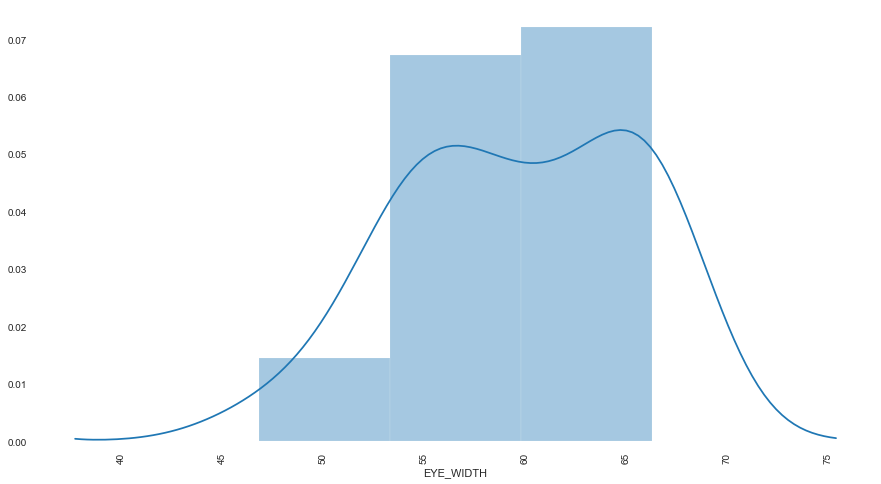

In [351]:
f,ax=plt.subplots(figsize=(15,8))
sns.distplot(df_new[df_new['COMPONENT_ID']=='11S02CY381YH1934531232']['EYE_WIDTH'])
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [353]:
print(df_new[['CRP0_VDDN','EYE_WIDTH']].head(50))

    CRP0_VDDN  EYE_WIDTH
0       1.200       54.6
1       1.200       66.3
2       1.200       58.5
3       1.200       58.5
4       1.200       62.4
5       1.200       54.6
6       1.200       66.3
7       1.200       66.3
8       1.200       66.3
9       1.200       62.4
10      1.200       54.6
11      1.200       66.3
12      1.200       62.4
13      1.200       50.7
14      1.200       62.4
15      1.200       66.3
16      1.200       58.5
17      1.200       66.3
18      1.200       54.6
19      1.200       50.7
20      1.200       58.5
21      1.200       66.3
22      1.200       58.5
23      1.200       54.6
24      1.200       54.6
25      1.200       66.3
26      1.200       54.6
27      1.200       62.4
28      1.200       58.5
29      1.200       46.8
30      1.200       54.6
31      1.200       66.3
32      1.175       70.2
33      1.175       66.3
34      1.175       62.4
35      1.175       66.3
36      1.175       50.7
37      1.175       54.6
38      1.175       66.3


In [217]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# example data


# Only compute pearson prod-moment correlations between feature
# columns and target column
target_col_name = 'EYE_WIDTH'
feature_target_corr = {}
for col in df_new:
    if target_col_name != col:
        feature_target_corr[col + '_' + target_col_name] = \
            pearsonr(df_new[col], df_new[target_col_name])[0]
print("Feature-Target Correlations")
print(feature_target_corr)

Feature-Target Correlations
{'CORNER_EYE_WIDTH': 0.09086451790828465, 'COMPONENT_ID_EYE_WIDTH': 0.6598814339561662, 'LANE_EYE_WIDTH': -0.017650526188933417, 'PLUGPOSITION_EYE_WIDTH': 0.020358662142300046, 'TEST_DATE_EYE_WIDTH': -0.17088942608819394, 'EYE_HEIGHT_EYE_WIDTH': 0.6846552802618965, 'EYE_HEIGHT_AVG_EYE_WIDTH': 0.45875508088883005, 'EYE_WIDTH_AVG_EYE_WIDTH': 0.4664623808600898, 'EYE_WIDTH_MAX_EYE_WIDTH': 0.16174032962267476, 'EYE_HEIGHT_MIN_EYE_WIDTH': 0.4109378416859971, 'EYE_WIDTH_MIN_EYE_WIDTH': 0.08412028699928331, 'EYE_HEIGHT_SDEV_EYE_WIDTH': -0.4212016066582919, 'EYE_WIDTH_SDEV_EYE_WIDTH': -0.38266414897965595, 'SLOTID_EYE_WIDTH': 0.17160827604944168, 'SLOTID_DEC_EYE_WIDTH': 0.17160827604944168, 'START_TIMESTAMP_EYE_WIDTH': -0.17088942608819394, 'FINISH_TIMESTAMP_EYE_WIDTH': -0.12950163238143786, 'PNP_FILE_EYE_WIDTH': 0.6924658635208835, 'HOME_DIRECTORY_EYE_WIDTH': 0.6924550937519476, 'Etch_length1_EYE_WIDTH': 0.025819629213432328, 'Etch_length2_EYE_WIDTH': -0.0130749301

In [190]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 12.940211
Feature 1: 299.013794
Feature 2: 108.086152
Feature 3: 0.258858
Feature 4: 0.003004
Feature 5: 80086.983014
Feature 6: 15524.300782
Feature 7: 2790.157537
Feature 8: 13.141920
Feature 9: 56038.368615
Feature 10: 3632.577047
Feature 11: 97757.779167
Feature 12: 7297.375417
Feature 13: 12.430424
Feature 14: 12.430424
Feature 15: 0.003004
Feature 16: 0.002810
Feature 17: 3354.330994
Feature 18: 3354.209558
Feature 19: 162.279598
Feature 20: 65.478479
Feature 21: 359.779124
Feature 22: 126.152367
Feature 23: 144.073811
Feature 24: 186.748071
Feature 25: 216.251543


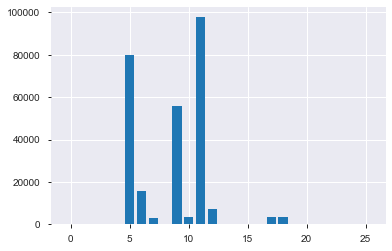

In [191]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [192]:
X.columns

Index(['CORNER', 'COMPONENT_ID', 'LANE', 'PLUGPOSITION', 'TEST_DATE',
       'EYE_HEIGHT', 'EYE_HEIGHT_AVG', 'EYE_WIDTH_AVG', 'EYE_WIDTH_MAX',
       'EYE_HEIGHT_MIN', 'EYE_WIDTH_MIN', 'EYE_HEIGHT_SDEV', 'EYE_WIDTH_SDEV',
       'SLOTID', 'SLOTID_DEC', 'START_TIMESTAMP', 'FINISH_TIMESTAMP',
       'PNP_FILE', 'HOME_DIRECTORY', 'Etch_length1', 'Etch_length2',
       'Etch_length3', 'Etch_length4', 'Etch_length5', 'Etch_length6',
       'pin_length'],
      dtype='object')

In [181]:
y_train

8581     50.7
345      66.3
1703     62.4
16682    58.5
33612    50.7
         ... 
22389    50.7
23709    54.6
10631     0.0
1700     66.3
31308    62.4
Name: EYE_WIDTH, Length: 12294, dtype: float64

In [177]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [178]:
y_pred = regr.predict(X_test)

In [179]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.691136542031938
Mean Squared Error: 84.9397525888781
Root Mean Squared Error: 9.216276503495221


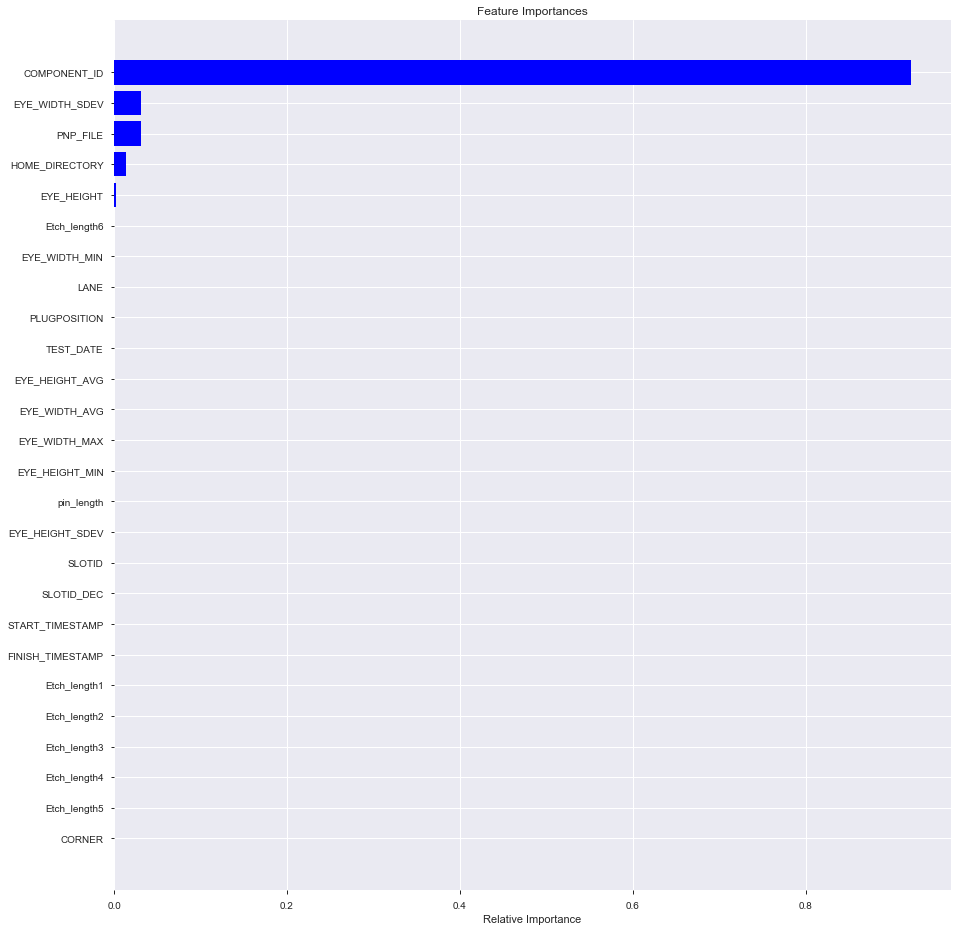

In [182]:
features = X.columns
importances = regr.feature_importances_
indices = np.argsort(importances)
f,ax=plt.subplots(figsize=(15,16))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [194]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

Feature 0: 11.898542
Feature 1: 337.936860
Feature 2: 170.504925
Feature 3: 0.256047
Feature 4: 0.003799
Feature 5: 25280.329277
Feature 6: 27648.431928
Feature 7: 4712.717820
Feature 8: 22.708336
Feature 9: 92331.957391
Feature 10: 3137.848610
Feature 11: 166539.075500
Feature 12: 10060.116241
Feature 13: 12.754217
Feature 14: 12.754217
Feature 15: 0.003799
Feature 16: 0.003733
Feature 17: 5544.883954
Feature 18: 5544.778012
Feature 19: 674.296989
Feature 20: 89.483256
Feature 21: 643.268938
Feature 22: 377.845986
Feature 23: 1119.720629
Feature 24: 1196.519288
Feature 25: 174.223134


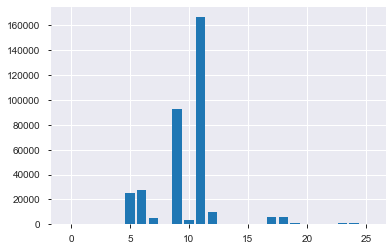

In [195]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [196]:
X.columns

Index(['CORNER', 'COMPONENT_ID', 'LANE', 'PLUGPOSITION', 'TEST_DATE',
       'EYE_WIDTH', 'EYE_HEIGHT_AVG', 'EYE_WIDTH_AVG', 'EYE_WIDTH_MAX',
       'EYE_HEIGHT_MIN', 'EYE_WIDTH_MIN', 'EYE_HEIGHT_SDEV', 'EYE_WIDTH_SDEV',
       'SLOTID', 'SLOTID_DEC', 'START_TIMESTAMP', 'FINISH_TIMESTAMP',
       'PNP_FILE', 'HOME_DIRECTORY', 'Etch_length1', 'Etch_length2',
       'Etch_length3', 'Etch_length4', 'Etch_length5', 'Etch_length6',
       'pin_length'],
      dtype='object')

In [206]:
import statsmodels.api as sm
from scipy import stats



X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             EYE_HEIGHT   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     4053.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        10:37:06   Log-Likelihood:                -85960.
No. Observations:               18350   AIC:                         1.720e+05
Df Residuals:                   18326   BIC:                         1.722e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3.887e+06   7.18e+05  

In [207]:
df_new

CORNER  COMPONENT_ID  LANE  PLUGPOSITION   TEST_DATE  EYE_HEIGHT  \
0      54.967215     56.427221    11     56.336165  20190123.0       319.8   
1      54.967215     56.427221    12     56.336165  20190123.0       327.6   
2      54.967215     56.427221    13     56.336165  20190123.0       335.4   
3      54.967215     56.427221     7     56.336165  20190123.0       327.6   
4      54.967215     56.427221    14     56.336165  20190123.0       280.8   
...          ...           ...   ...           ...         ...         ...   
36282  57.749699     56.946983    13     55.694195  20190111.0       335.4   
36283  57.749699     56.946983    14     56.336165  20190111.0       304.2   
36284  57.749699     56.946983    14     55.694195  20190111.0       327.6   
36285  57.749699     56.946983    15     56.336165  20190111.0       343.2   
36286  57.749699     56.946983    15     55.694195  20190111.0       304.2   

       EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  ...  \
0           66.3      338.520000      57.248750           74.1  ...   
1           58.5      338.520000      57.248750           74.1  ...   
2           70.2      338.520000      57.248750           74.1  ...   
3           66.3      338.520000      57.248750           74.1  ...   
4           58.5      338.520000      57.248750           74.1  ...   
...          ...             ...            ...            ...  ...   
36282       62.4      327.786875      58.658438           74.1  ...   
36283       58.5      327.786875      58.658438           74.1  ...   
36284       50.7      327.786875      58.658438           74.1  ...   
36285       54.6      327.786875      58.658438           74.1  ...   
36286       62.4      327.786875      58.658438           74.1  ...   

       FINISH_TIMESTAMP   PNP_FILE  HOME_DIRECTORY  Etch_length1  \
0            20190123.0  57.584787       57.584787    219.415983   
1            20190123.0  57.584787       57.584787    220.610941   
2            20190123.0  57.584787       57.584787    243.363907   
3            20190123.0  57.584787       57.584787    216.931088   
4            20190123.0  57.584787       57.584787    240.431775   
...                 ...        ...             ...           ...   
36282        20190111.0  56.796983       56.796983    244.910875   
36283        20190111.0  56.796983       56.796983    260.765960   
36284        20190111.0  56.796983       56.796983    254.495395   
36285        20190111.0  56.796983       56.796983    238.096452   
36286        20190111.0  56.796983       56.796983    243.879549   

       Etch_length2  Etch_length3  Etch_length4  Etch_length5  Etch_length6  \
0         16.862089    103.121994     98.869266    438.269332    480.719428   
1         18.487252    103.921222    107.166525    450.185940    468.315864   
2         21.578419    104.379831    105.632410    474.954567    499.614665   
3         15.101860     52.568600    105.123734    389.725282    428.645196   
4         22.909586    107.078746    102.996339    473.416446    505.216532   
...             ...           ...           ...           ...           ...   
36282     17.248226    104.379831    105.632410    472.171342    496.831440   
36283     22.909586    107.078746    102.996339    493.750631    525.550717   
36284     15.222142    107.078746    102.996339    479.792622    511.592708   
36285     19.858753    110.016969    100.755966    468.728140    507.648054   
36286     14.374042    110.016969    100.755966    469.026526    507.946440   

       pin_length  
0       42.450096  
1       18.129924  
2       24.660098  
3       38.919914  
4       31.800086  
...           ...  
36282   24.660098  
36283   31.800086  
36284   31.800086  
36285   38.919914  
36286   38.919914  

[18350 rows x 27 columns]

In [617]:
#For EYE_HEIGHT 
df_new=pd.read_csv('Midas_cleaned_dup.csv')
df_new['TEST_DATE'] =  pd.to_datetime(df_new['TEST_DATE'], format='%Y-%m-%d')
df_new['TEST_DATE']=df_new['TEST_DATE'].dt.strftime('%Y%m%d').astype(float)
df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
df_new['CORNER'] = calc_smooth_mean(df_new, by='CORNER', on='EYE_HEIGHT', m=300)
df_new['COMPONENT_ID'] = calc_smooth_mean(df_new, by='COMPONENT_ID', on='EYE_HEIGHT', m=300)
df_new['SLOTID_DEC'] = calc_smooth_mean(df_new, by='SLOTID_DEC', on='EYE_HEIGHT', m=300)
df_new['PNP_FILE'] = calc_smooth_mean(df_new, by='PNP_FILE', on='EYE_HEIGHT', m=300)
df_new['HOME_DIRECTORY'] = calc_smooth_mean(df_new, by='HOME_DIRECTORY', on='EYE_HEIGHT', m=300)
df_new['PLUGPOSITION'] = calc_smooth_mean(df_new, by='PLUGPOSITION', on='EYE_HEIGHT', m=300)
df_new['SLOTID'] = calc_smooth_mean(df_new, by='SLOTID', on='EYE_HEIGHT', m=300)

In [218]:
df_new=pd.read_csv('Midas_cleaned_dup.csv')

In [227]:
df_new.dtypes

CORNER               object
COMPONENT_ID         object
LANE                  int64
PLUGPOSITION         object
TEST_DATE            object
EYE_HEIGHT          float64
EYE_WIDTH           float64
EYE_HEIGHT_AVG      float64
EYE_WIDTH_AVG       float64
EYE_WIDTH_MAX       float64
EYE_HEIGHT_MIN      float64
EYE_WIDTH_MIN       float64
EYE_HEIGHT_SDEV     float64
EYE_WIDTH_SDEV      float64
SLOTID               object
SLOTID_DEC           object
START_TIMESTAMP      object
FINISH_TIMESTAMP     object
PNP_FILE             object
HOME_DIRECTORY       object
Etch_length1        float64
Etch_length2        float64
Etch_length3        float64
Etch_length4        float64
Etch_length5        float64
Etch_length6        float64
pin_length          float64
dtype: object

In [613]:
X=df_new.drop(['EYE_WIDTH'],axis=1)
y=df_new['EYE_WIDTH']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [211]:
import statsmodels.api as sm
from scipy import stats



X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary()) 

                            OLS Regression Results                            
Dep. Variable:             EYE_HEIGHT   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     5333.
Date:                Wed, 12 Feb 2020   Prob (F-statistic):               0.00
Time:                        12:57:44   Log-Likelihood:                -83812.
No. Observations:               18350   AIC:                         1.677e+05
Df Residuals:                   18326   BIC:                         1.679e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -6.849e+06   6.13e+05  

In [15]:

def correlation(typ,target):
    from sklearn.feature_selection import SelectFromModel
    from sklearn.linear_model import LassoCV
    import pandas as pd
    import numpy as np
    from scipy.stats import pearsonr
    import statsmodels.api as sm
    from scipy import stats
    def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
        mean = df[on].mean()

    # Compute the number of values and the mean of each group
        agg = df.groupby(by)[on].agg(['count', 'mean'])
        counts = agg['count']
        means = agg['mean']

    # Compute the "smoothed" means
        smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
        return df[by].map(smooth)
    df=pd.read_csv('Midas_cleaned_dup.csv')
    
    if typ=='continuous':
        numerics = ['int16', 'int32', 'float16', 'float32', 'float64']

        df = df.select_dtypes(include=numerics)
        return df[df.columns[:]].corr()[target][:]
    if typ=='categorical':
        numerics = ['int16', 'int32', 'float16', 'float32', 'float64']
        
        col = df.select_dtypes(exclude=numerics).columns
        for col in col:
            vals=df[col].unique()
            df_arr = [df[df[col]==val][target] for val in vals]
            F, p = stats.f_oneway(*df_arr)
            print(col,F,p)
    if typ=='all_mean':
        
        df_new=pd.read_csv('Midas_cleaned_dup.csv')
       # df_new['TEST_DATE'] =  pd.to_datetime(df_new['TEST_DATE'], format='%Y-%m-%d')
       # df_new['TEST_DATE']=df_new['TEST_DATE'].dt.strftime('%Y%m%d').astype(float)
        #df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
        #df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
        df_new['CORNER'] = calc_smooth_mean(df_new, by='CORNER', on=target, m=300)
        df_new['COMPONENT_ID'] = calc_smooth_mean(df_new, by='COMPONENT_ID', on=target, m=300)
        df_new['SLOTID_DEC'] = calc_smooth_mean(df_new, by='SLOTID_DEC', on=target, m=300)
        df_new['PNP_FILE'] = calc_smooth_mean(df_new, by='PNP_FILE', on=target, m=300)
        df_new['HOME_DIRECTORY'] = calc_smooth_mean(df_new, by='HOME_DIRECTORY', on=target, m=300)
        df_new['PLUGPOSITION'] = calc_smooth_mean(df_new, by='PLUGPOSITION', on=target, m=300)
        df_new['SLOTID'] = calc_smooth_mean(df_new, by='SLOTID', on=target, m=300)
        df_new['TEST_DATE'] = calc_smooth_mean(df_new, by='TEST_DATE', on=target, m=300)
        df_new['FINISH_TIMESTAMP'] = calc_smooth_mean(df_new, by='FINISH_TIMESTAMP', on=target, m=300)
        df_new['START_TIMESTAMP'] = calc_smooth_mean(df_new, by='START_TIMESTAMP', on=target, m=300)
        df_new['LANE'] = calc_smooth_mean(df_new, by='LANE', on=target, m=300)
        X=df_new.drop([target],axis=1)
        y=df_new[target]
        y=y.astype('int')
        #X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)


        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())
    if typ=='boruta':


        #df_new=pd.read_csv('Midas_cleaned_dup.csv')
        df_new=pd.read_csv('Midas_cleaned_dup.csv')
       # df_new['TEST_DATE'] =  pd.to_datetime(df_new['TEST_DATE'], format='%Y-%m-%d')
       # df_new['TEST_DATE']=df_new['TEST_DATE'].dt.strftime('%Y%m%d').astype(float)
        #df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
        #df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
        df_new['CORNER'] = calc_smooth_mean(df_new, by='CORNER', on=target, m=300)
        df_new['COMPONENT_ID'] = calc_smooth_mean(df_new, by='COMPONENT_ID', on=target, m=300)
        df_new['SLOTID_DEC'] = calc_smooth_mean(df_new, by='SLOTID_DEC', on=target, m=300)
        df_new['PNP_FILE'] = calc_smooth_mean(df_new, by='PNP_FILE', on=target, m=300)
        df_new['HOME_DIRECTORY'] = calc_smooth_mean(df_new, by='HOME_DIRECTORY', on=target, m=300)
        df_new['PLUGPOSITION'] = calc_smooth_mean(df_new, by='PLUGPOSITION', on=target, m=300)
        df_new['SLOTID'] = calc_smooth_mean(df_new, by='SLOTID', on=target, m=300)
        df_new['TEST_DATE'] = calc_smooth_mean(df_new, by='TEST_DATE', on=target, m=300)
        df_new['FINISH_TIMESTAMP'] = calc_smooth_mean(df_new, by='FINISH_TIMESTAMP', on=target, m=300)
        df_new['START_TIMESTAMP'] = calc_smooth_mean(df_new, by='START_TIMESTAMP', on=target, m=300)
        df_new['LANE'] = calc_smooth_mean(df_new, by='LANE', on=target, m=300)
        X=df_new.drop([target],axis=1)
        c=X.columns
        X=X.values
        y=df_new[target].values
        y=y.ravel()
        rf = RandomForestRegressor(n_jobs=-1,  max_depth=7)
# define Boruta feature selection method
        feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
        feat_selector.fit(X, y)

# check selected features - first 5 features are selected
        feat_selector.support_

# check ranking of features
        feat_selector.ranking_
        print(dict(zip(c,feat_selector.ranking_)))

# call transform() on X to filter it down to selected features
       # X_filtered = feat_selector.transform(X)
        
       # print(X_filtered.columns)
    if typ=='lasso':
        df_new=pd.read_csv('df_filtered_eye0.csv')
       # df_new['TEST_DATE'] =  pd.to_datetime(df_new['TEST_DATE'], format='%Y-%m-%d')
       # df_new['TEST_DATE']=df_new['TEST_DATE'].dt.strftime('%Y%m%d').astype(float)
        #df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
        #df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
        df_new['CORNER'] = calc_smooth_mean(df_new, by='CORNER', on=target, m=300)
        df_new['COMPONENT_ID'] = calc_smooth_mean(df_new, by='COMPONENT_ID', on=target, m=300)
        df_new['SLOTID_DEC'] = calc_smooth_mean(df_new, by='SLOTID_DEC', on=target, m=300)
        df_new['PNP_FILE'] = calc_smooth_mean(df_new, by='PNP_FILE', on=target, m=300)
        df_new['HOME_DIRECTORY'] = calc_smooth_mean(df_new, by='HOME_DIRECTORY', on=target, m=300)
        df_new['PLUGPOSITION'] = calc_smooth_mean(df_new, by='PLUGPOSITION', on=target, m=300)
        df_new['SLOTID'] = calc_smooth_mean(df_new, by='SLOTID', on=target, m=300)
        df_new['TEST_DATE'] = calc_smooth_mean(df_new, by='TEST_DATE', on=target, m=300)
        df_new['FINISH_TIMESTAMP'] = calc_smooth_mean(df_new, by='FINISH_TIMESTAMP', on=target, m=300)
        df_new['START_TIMESTAMP'] = calc_smooth_mean(df_new, by='START_TIMESTAMP', on=target, m=300)
        df_new['LANE'] = calc_smooth_mean(df_new, by='LANE', on=target, m=300)
        X=df_new.drop([target],axis=1)
        y=df_new[target]
        y=y.astype('int')
        
        clf = LassoCV(cv=3)
 
    # Set a minimum threshold of 0.70
        sfm = SelectFromModel(clf, threshold=0.70)
        sfm.fit(X, y)
        n_features = sfm.transform(X).shape[1]
 
    # Extracting the index of important features
        feature_idx = sfm.get_support()
 
    # Using the index to print the names of the important variables
        print(feature_idx)
        
        
        
        
        

In [347]:
correlation('continuous','EYE_WIDTH')

EYE_HEIGHT         0.684655
EYE_WIDTH          1.000000
EYE_HEIGHT_AVG     0.458755
EYE_WIDTH_AVG      0.466462
EYE_WIDTH_MAX      0.161740
EYE_HEIGHT_MIN     0.410938
EYE_WIDTH_MIN      0.084120
EYE_HEIGHT_SDEV   -0.421202
EYE_WIDTH_SDEV    -0.382664
Etch_length1       0.025820
Etch_length2      -0.013075
Etch_length3      -0.015028
Etch_length4       0.019938
Etch_length5       0.013833
Etch_length6       0.006132
pin_length        -0.033875
Name: EYE_WIDTH, dtype: float64

In [334]:
correlation('categorical','EYE_WIDTH')

CORNER 50.916294667768135 9.189334111614058e-33
COMPONENT_ID 74.24970651387062 0.0
LANE 3.8187609056926455 7.552921822158475e-07
PLUGPOSITION 7.60794288233897 0.00581692702237843
TEST_DATE 212.34414845505597 0.0
SLOTID 57.341103528921025 7.421620986642383e-202
SLOTID_DEC 57.341103528921025 7.421620986642383e-202
START_TIMESTAMP 196.25063804712056 0.0
FINISH_TIMESTAMP 196.25063804712056 0.0
PNP_FILE 196.25063804712056 0.0
HOME_DIRECTORY 194.0161425592365 0.0


In [332]:
correlation('all_mean','EYE_WIDTH')

                            OLS Regression Results                            
Dep. Variable:              EYE_WIDTH   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     1062.
Date:                Thu, 13 Feb 2020   Prob (F-statistic):               0.00
Time:                        10:57:54   Log-Likelihood:                -68052.
No. Observations:               18350   AIC:                         1.362e+05
Df Residuals:                   18327   BIC:                         1.363e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -361.0385     25.028  

In [358]:
correlation('boruta','EYE_WIDTH')

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	26
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	13
Tentative: 	6
Rejected: 	7
Iteration: 	9 / 100
Confirmed: 	13
Tentative: 	6
Rejected: 	7
Iteration: 	10 / 100
Confirmed: 	13
Tentative: 	6
Rejected: 	7
Iteration: 	11 / 100
Confirmed: 	13
Tentative: 	6
Rejected: 	7
Iteration: 	12 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	7
Iteration: 	13 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	7
Iteration: 	14 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	7
Iteration: 	15 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	7
Iteration: 	16 / 100
Confirmed: 	16
Tentative: 	3
Rejected: 	7
I

In [366]:
correlation('lasso','EYE_WIDTH')

[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False]


In [253]:
df=pd.read_csv('Midas_cleaned_dup.csv')
df[df.columns[:]].corr()['EYE_WIDTH'][:]

LANE              -0.017651
EYE_HEIGHT         0.684655
EYE_WIDTH          1.000000
EYE_HEIGHT_AVG     0.458755
EYE_WIDTH_AVG      0.466462
EYE_WIDTH_MAX      0.161740
EYE_HEIGHT_MIN     0.410938
EYE_WIDTH_MIN      0.084120
EYE_HEIGHT_SDEV   -0.421202
EYE_WIDTH_SDEV    -0.382664
Etch_length1       0.025820
Etch_length2      -0.013075
Etch_length3      -0.015028
Etch_length4       0.019938
Etch_length5       0.013833
Etch_length6       0.006132
pin_length        -0.033875
Name: EYE_WIDTH, dtype: float64

In [259]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df = df.select_dtypes(include=numerics)
target_col_name = 'EYE_WIDTH'
feature_target_corr = {}
for col in df:
    if target_col_name != col:
        feature_target_corr[col + '_' + target_col_name] = \
            pearsonr(df[col], df[target_col_name])[0]
print("Feature-Target Correlations")
print(feature_target_corr)

Feature-Target Correlations
{'LANE_EYE_WIDTH': -0.017650526188933417, 'EYE_HEIGHT_EYE_WIDTH': 0.6846552802618965, 'EYE_HEIGHT_AVG_EYE_WIDTH': 0.45875508088883005, 'EYE_WIDTH_AVG_EYE_WIDTH': 0.4664623808600898, 'EYE_WIDTH_MAX_EYE_WIDTH': 0.16174032962267476, 'EYE_HEIGHT_MIN_EYE_WIDTH': 0.4109378416859971, 'EYE_WIDTH_MIN_EYE_WIDTH': 0.08412028699928331, 'EYE_HEIGHT_SDEV_EYE_WIDTH': -0.4212016066582919, 'EYE_WIDTH_SDEV_EYE_WIDTH': -0.38266414897965595, 'Etch_length1_EYE_WIDTH': 0.025819629213432328, 'Etch_length2_EYE_WIDTH': -0.013074930128626788, 'Etch_length3_EYE_WIDTH': -0.015028272950615774, 'Etch_length4_EYE_WIDTH': 0.01993777231046075, 'Etch_length5_EYE_WIDTH': 0.01383346521246604, 'Etch_length6_EYE_WIDTH': 0.0061315675971195865, 'pin_length_EYE_WIDTH': -0.03387487772550808}


In [261]:
df=pd.read_csv('Midas_cleaned_dup.csv')
#from scipy import stats


#    F, p = stats.f_oneway(df[])



#print(F)

In [263]:
df

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  \
0             FF_SCM1  11S02AA435YH1934064264    11          PB0  2019-01-23   
1             FF_SCM1  11S02AA435YH1934064264    12          PB0  2019-01-23   
2             FF_SCM1  11S02AA435YH1934064264    13          PB0  2019-01-23   
3             FF_SCM1  11S02AA435YH1934064264     7          PB0  2019-01-23   
4             FF_SCM1  11S02AA435YH1934064264    14          PB0  2019-01-23   
...               ...                     ...   ...          ...         ...   
18345  IO_NOM_NOM_PCX  11S02CY388YH1934625510    13          PB1  2019-01-11   
18346  IO_NOM_NOM_PCX  11S02CY388YH1934625510    14          PB0  2019-01-11   
18347  IO_NOM_NOM_PCX  11S02CY388YH1934625510    14          PB1  2019-01-11   
18348  IO_NOM_NOM_PCX  11S02CY388YH1934625510    15          PB0  2019-01-11   
18349  IO_NOM_NOM_PCX  11S02CY388YH1934625510    15          PB1  2019-01-11   

       EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  \
0           319.8       66.3      338.520000      57.248750           74.1   
1           327.6       58.5      338.520000      57.248750           74.1   
2           335.4       70.2      338.520000      57.248750           74.1   
3           327.6       66.3      338.520000      57.248750           74.1   
4           280.8       58.5      338.520000      57.248750           74.1   
...           ...        ...             ...            ...            ...   
18345       335.4       62.4      327.786875      58.658438           74.1   
18346       304.2       58.5      327.786875      58.658438           74.1   
18347       327.6       50.7      327.786875      58.658438           74.1   
18348       343.2       54.6      327.786875      58.658438           74.1   
18349       304.2       62.4      327.786875      58.658438           74.1   

       ...            FINISH_TIMESTAMP  \
0      ...  2019-01-23 14:03:00.000000   
1      ...  2019-01-23 14:03:00.000000   
2      ...  2019-01-23 14:03:00.000000   
3      ...  2019-01-23 14:03:00.000000   
4      ...  2019-01-23 14:03:00.000000   
...    ...                         ...   
18345  ...  2019-01-11 10:44:01.000000   
18346  ...  2019-01-11 10:44:01.000000   
18347  ...  2019-01-11 10:44:01.000000   
18348  ...  2019-01-11 10:44:01.000000   
18349  ...  2019-01-11 10:44:01.000000   

                                                PNP_FILE  \
0      DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
1      DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
2      DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
3      DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
4      DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
...                                                  ...   
18345  DMIWC3632ZMFIO5~2019-01-11-15-44~POK~3906M04.z...   
18346  DMIWC3632ZMFIO5~2019-01-11-15-44~POK~3906M04.z...   
18347  DMIWC3632ZMFIO5~2019-01-11-15-44~POK~3906M04.z...   
18348  DMIWC3632ZMFIO5~2019-01-11-15-44~POK~3906M04.z...   
18349  DMIWC3632ZMFIO5~2019-01-11-15-44~POK~3906M04.z...   

                                          HOME_DIRECTORY  Etch_length1  \
0      http://ausgsa.ibm.com/projects/m/moosecollecti...    219.415983   
1      http://ausgsa.ibm.com/projects/m/moosecollecti...    220.610941   
2      http://ausgsa.ibm.com/projects/m/moosecollecti...    243.363907   
3      http://ausgsa.ibm.com/projects/m/moosecollecti...    216.931088   
4      http://ausgsa.ibm.com/projects/m/moosecollecti...    240.431775   
...                                                  ...           ...   
18345  http://ausgsa.ibm.com/projects/m/moosecollecti...    244.910875   
18346  http://ausgsa.ibm.com/projects/m/moosecollecti...    260.765960   
18347  http://ausgsa.ibm.com/projects/m/moosecollecti...    254.495395   
18348  http://ausgsa.ibm.com/projects/m/moosecollecti...    238.096452   
18349  http://ausgsa.ibm.com/projects/m/moosecollecti...    243.879549   

  

In [283]:
F, p = stats.f_oneway(df[df.PLUGPOSITION=='PB0'].EYE_WIDTH,df[df.PLUGPOSITION=='PB1'].EYE_WIDTH)
print(F)

7.60794288233897


In [281]:
df[df.PLUGPOSITION=='PB0'].EYE_WIDTH

0        66.3
1        58.5
2        70.2
3        66.3
4        58.5
         ... 
18340    66.3
18342    58.5
18344    70.2
18346    58.5
18348    54.6
Name: EYE_WIDTH, Length: 13086, dtype: float64

In [288]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        
cols = df.select_dtypes(exclude=numerics).columns
for col in cols:
    vals=df[col].unique()
    df_arr = [df[df.col==val].Target for val in vals]
    F, p = stats.f_oneway(*df_arr)
    print(F)


AttributeError: 'DataFrame' object has no attribute 'col'

In [289]:
cols

Index(['CORNER', 'COMPONENT_ID', 'PLUGPOSITION', 'TEST_DATE', 'SLOTID',
       'SLOTID_DEC', 'START_TIMESTAMP', 'FINISH_TIMESTAMP', 'PNP_FILE',
       'HOME_DIRECTORY'],
      dtype='object')

In [290]:
col

'CORNER'

In [292]:
df[col].unique()

array(['FF_SCM1', 'IO_COLD_BIAS_PCX', 'IO_HOT_BIAS_PCX', 'IO_NOM_NOM_PCX'],
      dtype=object)

In [297]:
df_arr = [df[df[col]==val].EYE_WIDTH for val in vals]

In [308]:
df

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  \
0             FF_SCM1  11S02AA435YH1934064264    11          PB0  2019-01-23   
1             FF_SCM1  11S02AA435YH1934064264    12          PB0  2019-01-23   
2             FF_SCM1  11S02AA435YH1934064264    13          PB0  2019-01-23   
3             FF_SCM1  11S02AA435YH1934064264     7          PB0  2019-01-23   
4             FF_SCM1  11S02AA435YH1934064264    14          PB0  2019-01-23   
...               ...                     ...   ...          ...         ...   
18345  IO_NOM_NOM_PCX  11S02CY388YH1934625510    13          PB1  2019-01-11   
18346  IO_NOM_NOM_PCX  11S02CY388YH1934625510    14          PB0  2019-01-11   
18347  IO_NOM_NOM_PCX  11S02CY388YH1934625510    14          PB1  2019-01-11   
18348  IO_NOM_NOM_PCX  11S02CY388YH1934625510    15          PB0  2019-01-11   
18349  IO_NOM_NOM_PCX  11S02CY388YH1934625510    15          PB1  2019-01-11   

       EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  \
0           319.8       66.3      338.520000      57.248750           74.1   
1           327.6       58.5      338.520000      57.248750           74.1   
2           335.4       70.2      338.520000      57.248750           74.1   
3           327.6       66.3      338.520000      57.248750           74.1   
4           280.8       58.5      338.520000      57.248750           74.1   
...           ...        ...             ...            ...            ...   
18345       335.4       62.4      327.786875      58.658438           74.1   
18346       304.2       58.5      327.786875      58.658438           74.1   
18347       327.6       50.7      327.786875      58.658438           74.1   
18348       343.2       54.6      327.786875      58.658438           74.1   
18349       304.2       62.4      327.786875      58.658438           74.1   

       ...            FINISH_TIMESTAMP  \
0      ...  2019-01-23 14:03:00.000000   
1      ...  2019-01-23 14:03:00.000000   
2      ...  2019-01-23 14:03:00.000000   
3      ...  2019-01-23 14:03:00.000000   
4      ...  2019-01-23 14:03:00.000000   
...    ...                         ...   
18345  ...  2019-01-11 10:44:01.000000   
18346  ...  2019-01-11 10:44:01.000000   
18347  ...  2019-01-11 10:44:01.000000   
18348  ...  2019-01-11 10:44:01.000000   
18349  ...  2019-01-11 10:44:01.000000   

                                                PNP_FILE  \
0      DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
1      DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
2      DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
3      DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
4      DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
...                                                  ...   
18345  DMIWC3632ZMFIO5~2019-01-11-15-44~POK~3906M04.z...   
18346  DMIWC3632ZMFIO5~2019-01-11-15-44~POK~3906M04.z...   
18347  DMIWC3632ZMFIO5~2019-01-11-15-44~POK~3906M04.z...   
18348  DMIWC3632ZMFIO5~2019-01-11-15-44~POK~3906M04.z...   
18349  DMIWC3632ZMFIO5~2019-01-11-15-44~POK~3906M04.z...   

                                          HOME_DIRECTORY  Etch_length1  \
0      http://ausgsa.ibm.com/projects/m/moosecollecti...    219.415983   
1      http://ausgsa.ibm.com/projects/m/moosecollecti...    220.610941   
2      http://ausgsa.ibm.com/projects/m/moosecollecti...    243.363907   
3      http://ausgsa.ibm.com/projects/m/moosecollecti...    216.931088   
4      http://ausgsa.ibm.com/projects/m/moosecollecti...    240.431775   
...                                                  ...           ...   
18345  http://ausgsa.ibm.com/projects/m/moosecollecti...    244.910875   
18346  http://ausgsa.ibm.com/projects/m/moosecollecti...    260.765960   
18347  http://ausgsa.ibm.com/projects/m/moosecollecti...    254.495395   
18348  http://ausgsa.ibm.com/projects/m/moosecollecti...    238.096452   
18349  http://ausgsa.ibm.com/projects/m/moosecollecti...    243.879549   

  

In [335]:
pip install Boruta

Note: you may need to restart the kernel to use updated packages.


In [473]:
df_new=pd.read_csv('Midas_cleaned_dup.csv')
df_new['CORNER'] = calc_smooth_mean(df_new, by='CORNER', on='EYE_WIDTH', m=300)
df_new['COMPONENT_ID'] = calc_smooth_mean(df_new, by='COMPONENT_ID', on='EYE_WIDTH', m=300)
df_new['SLOTID_DEC'] = calc_smooth_mean(df_new, by='SLOTID_DEC', on='EYE_WIDTH', m=300)
df_new['PNP_FILE'] = calc_smooth_mean(df_new, by='PNP_FILE', on='EYE_WIDTH', m=300)
df_new['HOME_DIRECTORY'] = calc_smooth_mean(df_new, by='HOME_DIRECTORY', on='EYE_WIDTH', m=300)
df_new['PLUGPOSITION'] = calc_smooth_mean(df_new, by='PLUGPOSITION', on='EYE_WIDTH', m=300)
df_new['SLOTID'] = calc_smooth_mean(df_new, by='SLOTID', on='EYE_WIDTH', m=300)
df_new['TEST_DATE'] = calc_smooth_mean(df_new, by='TEST_DATE', on='EYE_WIDTH', m=300)
df_new['FINISH_TIMESTAMP'] = calc_smooth_mean(df_new, by='FINISH_TIMESTAMP', on='EYE_WIDTH', m=300)
df_new['START_TIMESTAMP'] = calc_smooth_mean(df_new, by='START_TIMESTAMP', on='EYE_WIDTH', m=300)
df_new['LANE'] = calc_smooth_mean(df_new, by='LANE', on='EYE_WIDTH', m=300)
X=df_new[[ 'COMPONENT_ID', 'CORNER','LANE','PLUGPOSITION','START_TIMESTAMP',
       'FINISH_TIMESTAMP',  
       'EYE_HEIGHT',  'SLOTID', 'SLOTID_DEC']]
y=df_new['EYE_WIDTH']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [479]:
X_train,y_train,X_test,y_test=traintest_meanenc()

In [108]:
regr = RandomForestRegressor(max_depth=7, random_state=0)
regr.fit(X_train, y_train)

C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [109]:
y_pred = regr.predict(X_test)

In [110]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.092560743497459
Mean Squared Error: 54.610650377883275
Root Mean Squared Error: 7.3899019193683


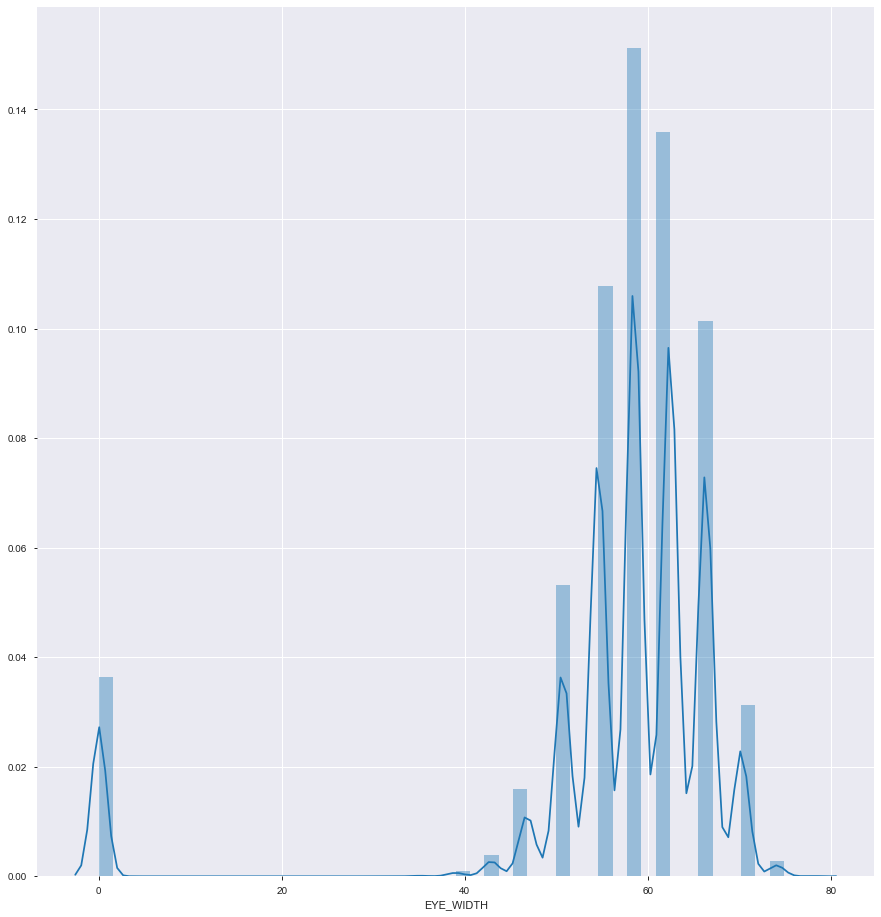

In [466]:
f,ax=plt.subplots(figsize=(15,16))
sns.distplot(df_new['EYE_WIDTH'])

In [111]:
from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [112]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 30, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [ 5, 10,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 5, 8, 11, 14, 17, 20, 23, 26, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [5, 10, 15],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [113]:
rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs =10)

In [114]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   4 out of  15 | elapsed:    5.8s remaining:   16.2s
[Parallel(n_jobs=10)]: Done  12 out of  15 | elapsed:    7.2s remaining:    1.7s
[Parallel(n_jobs=10)]: Done  15 out of  15 | elapsed:    8.3s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=10,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5, 8, 11, 14, 17, 20, 23, 26, 30, None], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [115]:
best_random = rf_random.best_estimator_
y_pred = best_random.predict(X_test)

In [116]:
rf_random.best_params_

{'n_estimators': 94,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 23,
 'bootstrap': True}

In [117]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.137536398899172
Mean Squared Error: 29.76618882600745
Root Mean Squared Error: 5.455839882731847


In [105]:
X_train,y_train,X_test,y_test=traintest_meanenc()

C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

In [106]:
X_train.head()

CORNER  COMPONENT_ID       LANE     SLOTID  PLUGPOSITION    Machine  \
4356   54.879461     60.300000  55.191223  58.556340     56.309303  59.170378   
185    54.879461     59.386364  57.644415  57.353986     55.612756  57.607399   
863    54.879461     60.450000  56.758582  56.458656     56.309303  57.607399   
8425   54.879461     60.300000  56.594378  55.115517     56.309303  57.607399   
16955  58.001804     56.410969  56.045560  55.115517     56.309303  57.607399   

       START_TIMESTAMP  
4356         60.738261  
185          60.970992  
863          56.163768  
8425         53.466279  
16955        58.954217

In [107]:
y_train.head()

4356     50.7
185      66.3
863      62.4
8425     58.5
16955    50.7
Name: EYE_WIDTH, dtype: float64

In [631]:

from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, 15, step=1)
selector = selector.fit(X_train, y_train)
selector.support_

selector.ranking_


array([ 1,  6, 10, 11,  1,  9,  1,  1, 12,  1,  1,  1,  1,  4,  5,  3,  1,
        8,  7,  1,  1,  1,  1,  1,  1,  2])

In [628]:
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
perm = PermutationImportance(rf_random, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = X.columns.tolist())

In [629]:
y_pred = rf_random.predict(X_test)

In [630]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 26.19652494990353
Mean Squared Error: 770.331590211451
Root Mean Squared Error: 27.75484804879052


In [41]:
df_new=pd.read_csv('Midas_cleaned_dup.csv')

In [760]:
df_new['SLOTID'].unique()

array(['N4CP1.CP', 'N3CP1.CP', 'N5CP1.CP', 'N7CP1.CP', 'N0CP0.CP',
       'N4CP0.CP', 'N6CP0.CP', 'N1CP1.CP', 'N2CP0.CP', 'N7CP2.CP',
       'N4CP2.CP', 'N6CP1.CP', 'N2CP1.CP', 'N0CP1.CP', 'N6CP2.CP',
       'N0CP2.CP', 'N1CP2.CP', 'N3CP2.CP', 'N5CP2.CP'], dtype=object)

In [819]:
df_new=pd.read_csv('Midas_cleaned_dup.csv')

df_new['PNP_FILE'].unique()

array(['DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.zip.gz',
       'DMIW263E8CCMA4H~2019-01-29-19-43~POK~3906M02.zip.gz',
       'DMIW25FE8CCMA47~2019-01-11-07-35~POK~3906M02.zip.gz',
       'DMIW261B8CCMA4E~2019-01-24-02-57~POK~3906M02.zip.gz',
       'DMIW23E78YDQ047~2019-01-03-16-14~ASP~3906M02.zip.gz',
       'DMIW23E78YDQ047~2019-01-07-03-27~ASP~3906M02.zip.gz',
       'DMIW23E78YDQ047~2019-01-07-15-36~ASP~3906M02.zip.gz',
       'DMIW211D8MS93B7~2019-01-29-09-21~ASP~3906M02.zip.gz',
       'DMIW260B8CCMA4C~2019-01-22-02-42~POK~3906M04.zip.gz',
       'DMIW260B8CCMA4C~2019-01-29-05-46~POK~3906M04.zip.gz',
       'DMIW25FF8CCMA48~2019-01-11-22-05~POK~3906M03.zip.gz',
       'DMIW25FF8CCMA48~2019-01-14-20-42~POK~3906M03.zip.gz',
       'DMIW260D8CCMA4B~2019-01-08-12-23~POK~3906M03.zip.gz',
       'DMIW15C58CCMA3C~2019-01-24-21-46~POK~3906M02.zip.gz',
       'DMIW1F2A8A1XKAM~2019-01-29-13-21~ASP~3906LM5.zip.gz',
       'DMIW115C8CCMA35~2019-01-23-21-39~POK~3906M02.zip.gz',
       '

In [250]:
df['Machine']=''
for i in range(len(df_new)):
    df.at[i,'Machine']=df.iloc[i]['PNP_FILE'][41:44]

In [818]:
df_new.iloc[1]['PNP_FILE'][41:44]

'M04'

In [821]:
df_new.head()

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  EYE_HEIGHT  \
0  FF_SCM1  11S02AA435YH1934064264    11          PB0  2019-01-23       319.8   
1  FF_SCM1  11S02AA435YH1934064264    12          PB0  2019-01-23       327.6   
2  FF_SCM1  11S02AA435YH1934064264    13          PB0  2019-01-23       335.4   
3  FF_SCM1  11S02AA435YH1934064264     7          PB0  2019-01-23       327.6   
4  FF_SCM1  11S02AA435YH1934064264    14          PB0  2019-01-23       280.8   

   EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  ...  \
0       66.3          338.52       57.24875           74.1  ...   
1       58.5          338.52       57.24875           74.1  ...   
2       70.2          338.52       57.24875           74.1  ...   
3       66.3          338.52       57.24875           74.1  ...   
4       58.5          338.52       57.24875           74.1  ...   

                                            PNP_FILE  \
0  DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
1  DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
2  DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
3  DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
4  DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   

                                      HOME_DIRECTORY  Etch_length1  \
0  http://ausgsa.ibm.com/projects/m/moosecollecti...    219.415983   
1  http://ausgsa.ibm.com/projects/m/moosecollecti...    220.610941   
2  http://ausgsa.ibm.com/projects/m/moosecollecti...    243.363907   
3  http://ausgsa.ibm.com/projects/m/moosecollecti...    216.931088   
4  http://ausgsa.ibm.com/projects/m/moosecollecti...    240.431775   

   Etch_length2 Etch_length3 Etch_length4 Etch_length5 Etch_length6  \
0     16.862089   103.121994    98.869266   438.269332   480.719428   
1     18.487252   103.921222   107.166525   450.185940   468.315864   
2     21.578419   104.379831   105.632410   474.954567   499.614665   
3     15.101860    52.568600   105.123734   389.725282   428.645196   
4     22.909586   107.078746   102.996339   473.416446   505.216532   

  pin_length Machine  
0  42.450096     M04  
1  18.129924     M04  
2  24.660098     M04  
3  38.919914     M04  
4  31.800086     M04  

[5 rows x 28 columns]

In [822]:
df_new.to_csv('Midas_with_mac.csv',index=False)

In [849]:
pandas_profiling.ProfileReport(X_train)

In [850]:
X_train[X_train.columns[:]].corr()['FINISH_TIMESTAMP'][:]

COMPONENT_ID        0.852715
CORNER              0.132729
LANE                0.008259
PLUGPOSITION       -0.042282
EYE_HEIGHT          0.877630
FINISH_TIMESTAMP    1.000000
SLOTID              0.271105
SLOTID_DEC          0.271105
Name: FINISH_TIMESTAMP, dtype: float64

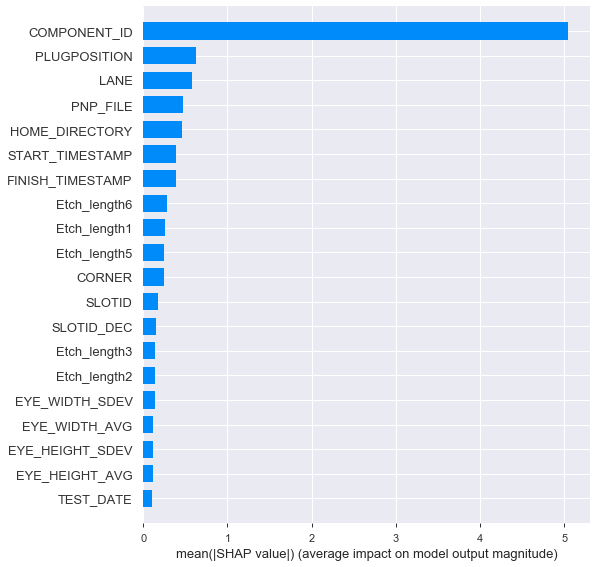

In [35]:

import shap

shap_values = shap.TreeExplainer(best_random).shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")

In [906]:
!pip install shap

In [7]:
df_new[df_new['EYE_WIDTH']==0]

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  \
432           FF_SCM1  11S02CY381YH1934595599    11          PB0  2019-01-14   
434           FF_SCM1  11S02CY381YH1934595599     1          PB0  2019-01-14   
436           FF_SCM1  11S02CY381YH1934595599     0          PB0  2019-01-14   
438           FF_SCM1  11S02CY381YH1934595599     3          PB0  2019-01-14   
440           FF_SCM1  11S02CY381YH1934595599     4          PB0  2019-01-14   
...               ...                     ...   ...          ...         ...   
17924  IO_NOM_NOM_PCX  11S02AA471YH1934064219    15          PB1  2019-01-09   
17927  IO_NOM_NOM_PCX  11S02AA471YH1934064219     0          PB1  2019-01-09   
17929  IO_NOM_NOM_PCX  11S02AA471YH1934064219     1          PB1  2019-01-09   
17931  IO_NOM_NOM_PCX  11S02AA471YH1934064219     2          PB1  2019-01-09   
17933  IO_NOM_NOM_PCX  11S02AA471YH1934064219     3          PB1  2019-01-09   

       EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  \
432         343.2        0.0      333.663281      56.595703           74.1   
434         335.4        0.0      333.663281      56.595703           74.1   
436         296.4        0.0      333.663281      56.595703           74.1   
438         241.8        0.0      333.663281      56.595703           74.1   
440         366.6        0.0      333.663281      56.595703           74.1   
...           ...        ...             ...            ...            ...   
17924       327.6        0.0      328.044167      57.305625           74.1   
17927       265.2        0.0      328.044167      57.305625           74.1   
17929       335.4        0.0      328.044167      57.305625           74.1   
17931       304.2        0.0      328.044167      57.305625           74.1   
17933       335.4        0.0      328.044167      57.305625           74.1   

       ...            FINISH_TIMESTAMP  \
432    ...  2019-01-14 15:41:37.000000   
434    ...  2019-01-14 15:41:37.000000   
436    ...  2019-01-14 15:41:37.000000   
438    ...  2019-01-14 15:41:37.000000   
440    ...  2019-01-14 15:41:37.000000   
...    ...                         ...   
17924  ...  2019-01-09 07:59:36.000000   
17927  ...  2019-01-09 07:59:36.000000   
17929  ...  2019-01-09 07:59:36.000000   
17931  ...  2019-01-09 07:59:36.000000   
17933  ...  2019-01-09 07:59:36.000000   

                                                PNP_FILE  \
432    DMIW25FF8CCMA48~2019-01-14-20-42~POK~3906M03.z...   
434    DMIW25FF8CCMA48~2019-01-14-20-42~POK~3906M03.z...   
436    DMIW25FF8CCMA48~2019-01-14-20-42~POK~3906M03.z...   
438    DMIW25FF8CCMA48~2019-01-14-20-42~POK~3906M03.z...   
440    DMIW25FF8CCMA48~2019-01-14-20-42~POK~3906M03.z...   
...                                                  ...   
17924  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   
17927  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   
17929  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   
17931  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   
17933  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   

                                          HOME_DIRECTORY  Etch_length1  \
432    http://ausgsa.ibm.com/projects/m/moosecollecti...    217.185077   
434    http://ausgsa.ibm.com/projects/m/moosecollecti...    237.964375   
436    http://ausgsa.ibm.com/projects/m/moosecollecti...    175.872292   
438    http://ausgsa.ibm.com/projects/m/moosecollecti...    162.229934   
440    http://ausgsa.ibm.com/projects/m/moosecollecti...    196.630463   
...                                                  ...           ...   
17924  http://ausgsa.ibm.com/projects/m/moosecollecti...    196.008596   
17927  http://ausgsa.ibm.com/projects/m/moosecollecti...    208.400305   
17929  http://ausgsa.ibm.com/projects/m/moosecollecti...    201.266232   
17931  http://ausgsa.ibm.com/projects/m/moosecollecti...    190.571163   
17933  http://ausgsa.ibm.com/projects/m/moosecollecti...    181.138642   

  

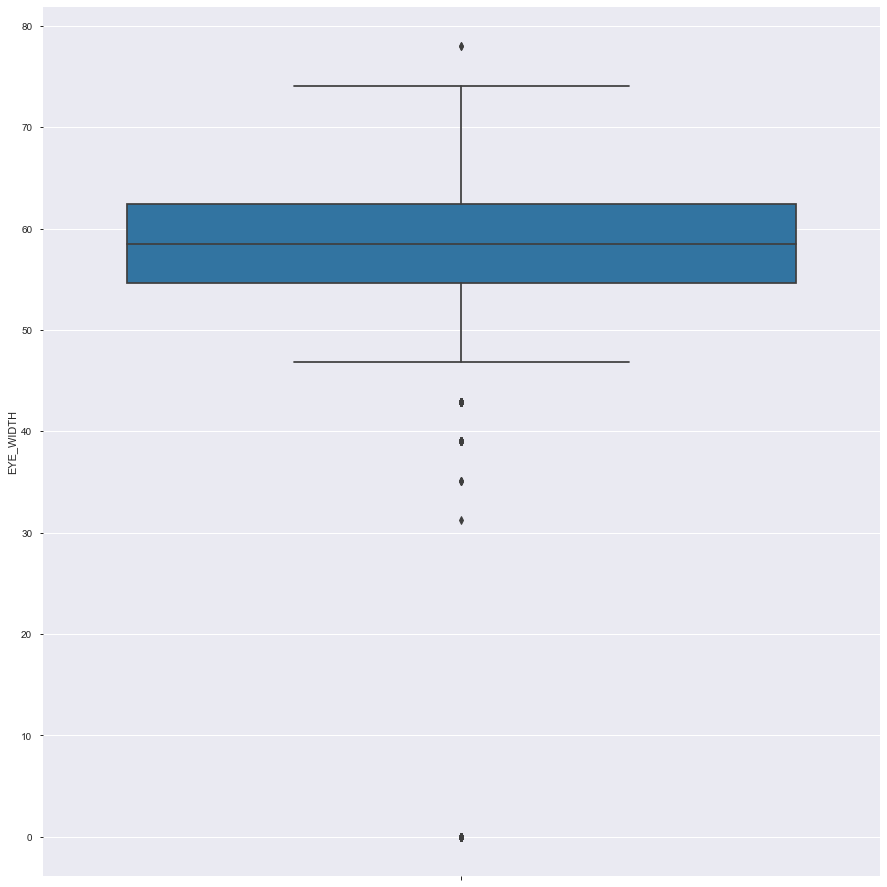

In [6]:
f,ax=plt.subplots(figsize=(15,16))
sns.boxplot(y="EYE_WIDTH",data=df_new)

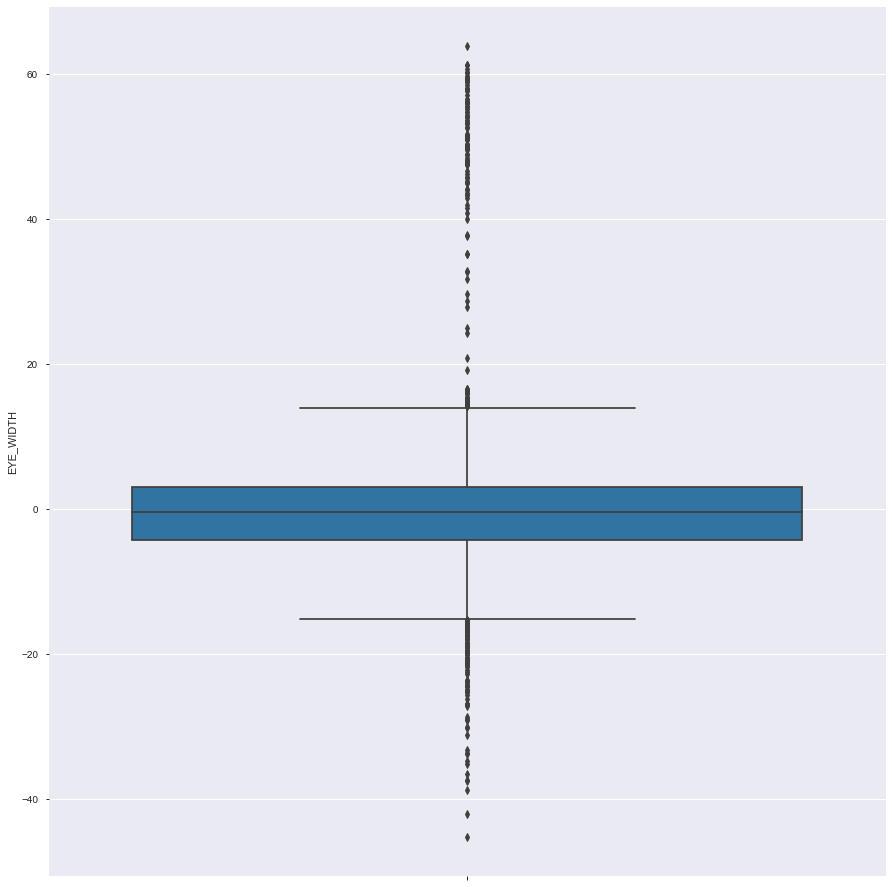

In [25]:
f,ax=plt.subplots(figsize=(15,16))
sns.boxplot(y=y_pred-y_test)

In [26]:
np.where(y_test==0)

(array([  16,   28,   39,   46,   89,  105,  122,  134,  141,  142,  165,
         187,  233,  240,  243,  296,  313,  321,  334,  384,  434,  438,
         454,  463,  482,  483,  524,  534,  543,  545,  555,  581,  635,
         637,  644,  646,  660,  661,  674,  682,  683,  739,  748,  751,
         753,  783,  815,  816,  826,  830,  843,  857,  875,  893,  912,
         915,  928,  940,  951,  976,  977,  982,  987, 1007, 1015, 1018,
        1019, 1021, 1037, 1039, 1042, 1071, 1073, 1074, 1082, 1121, 1134,
        1141, 1152, 1189, 1230, 1237, 1242, 1261, 1290, 1297, 1303, 1305,
        1314, 1344, 1355, 1363, 1368, 1380, 1389, 1429, 1464, 1485, 1489,
        1497, 1501, 1502, 1508, 1526, 1541, 1548, 1598, 1683, 1718, 1770,
        1773, 1775, 1798, 1831, 1833, 1858, 1893, 1894, 1943, 1946, 1973,
        2014, 2033, 2054, 2084, 2104, 2127, 2142, 2143, 2165, 2166, 2169,
        2186, 2236, 2240, 2253, 2257, 2282, 2285, 2295, 2299, 2317, 2333,
        2345, 2396, 2404, 2427, 2440, 

In [29]:
error=y_pred-y_test

In [32]:
error.max()

63.870982770193294

In [33]:
test=pd.concat((X_test,y_test),axis=1)

In [34]:
test.head()

CORNER  COMPONENT_ID       LANE     SLOTID  PLUGPOSITION    Machine  \
9353   54.879461     57.159375  55.191223  55.836449     56.309303  58.490881   
14446  56.691598     57.642930  57.210277  56.735280     55.612756  57.607399   
12708  56.691598     57.938849  55.550000  56.954096     55.612756  57.607399   
12878  56.691598     57.638043  56.045560  58.201700     56.309303  57.607399   
11198  57.884328     56.410969  57.644415  55.115517     56.309303  57.607399   

       EYE_WIDTH  
9353        66.3  
14446       46.8  
12708       58.5  
12878       62.4  
11198       70.2

In [35]:
a=pd.DataFrame({'Eye_width_pred':y_pred,'error':y_test-y_pred})

In [37]:
#This dataset is with error on test without timestamp
test=pd.concat((test,a),axis=1)

In [89]:
test[test['EYE_WIDTH']==0]

CORNER  COMPONENT_ID       LANE     SLOTID  PLUGPOSITION    Machine  \
11099  57.884328     56.410969  55.437121  55.115517     55.612756  57.607399   
4488   54.879461      0.000000  55.550000  48.333333     56.309303  36.953913   
2127   54.879461      0.000000  57.592904  43.200000     56.309303  36.953913   
2157   54.879461      0.000000  56.915465  43.200000     56.309303  36.953913   
1321   54.879461      0.000000  55.896597  56.458656     56.309303  36.953913   
...          ...           ...        ...        ...           ...        ...   
8138   54.879461      0.000000  55.191223  55.836449     56.309303  36.953913   
10360  57.884328     57.348708  56.594378  56.936583     55.612756  57.607399   
1332   54.879461      0.000000  53.705323  56.458656     56.309303  36.953913   
3859   54.879461      0.000000  55.550000  53.747899     56.309303  36.953913   
3879   54.879461     37.164706  56.045560  56.735280     56.309303  58.490881   

       EYE_WIDTH  Eye_width_pred      error  
11099        0.0       47.999445 -47.999445  
4488         0.0        0.000000   0.000000  
2127         0.0        0.000000   0.000000  
2157         0.0        0.000000   0.000000  
1321         0.0        0.000000   0.000000  
...          ...             ...        ...  
8138         0.0        0.000000   0.000000  
10360        0.0       52.544835 -52.544835  
1332         0.0        0.000000   0.000000  
3859         0.0        0.000000   0.000000  
3879         0.0       37.672201 -37.672201  

[341 rows x 9 columns]

In [81]:
Component_id_with0=df_new[df_new['EYE_WIDTH']==0]['COMPONENT_ID'].unique()

In [46]:
df_new['EYE_WIDTH'].max()

78.0

In [48]:
df_new[df_new['EYE_WIDTH']==78]['COMPONENT_ID'].unique()

array(['11S02CY382YH1934763839', '11S02CY389YH1934619503'], dtype=object)

In [68]:
c=df_new.groupby('COMPONENT_ID').mean()['EYE_WIDTH']==0

In [94]:
component_id_mean0=c[c==True].keys()

In [99]:
component_id_mean0=np.array(component_id_mean0)

In [103]:
np.array(set(Component_id_with0).symmetric_difference(component_id_mean0))

array({'11S02CY389YH1934772972', '11S02AA471YH1934064219', '11S02CY382YH1934607672', '11S02CY388YH1934648562', '11S02CY383YH1934794910', '11S02AA435YH1934070487', '11S02CY383YH1934528453', '11S02AA435YH1934052422', '11S02AA475YH1934073703', '11S02CY395YH1934662750', '11S02CY388YH1934753949', '11S02CY388YH1934779505', '11S02AA435YH1934064225', '11S02CY394YH1934506185', '11S02AA453YH1934064254', '11S02AA435YH1934081365', '11S02CY388YH1934645315', '11S02CY394YH1934502847', '11S02CY388YH1934807298', '11S02CY381YH1934595599'},
      dtype=object)

In [118]:
error1=y_pred-y_test

In [119]:
test1=pd.concat((X_test,y_test),axis=1)

In [120]:
a=pd.DataFrame({'Eye_width_pred':y_pred,'error':y_test-y_pred})

In [121]:
#This dataset is with error on test with timestamp
test1=pd.concat((test1,a),axis=1)

In [123]:
test1[test1['EYE_WIDTH']==0]

CORNER  COMPONENT_ID       LANE     SLOTID  PLUGPOSITION    Machine  \
11099  57.884328     56.410969  55.437121  55.115517     55.612756  57.607399   
4488   54.879461      0.000000  55.550000  48.333333     56.309303  36.953913   
2127   54.879461      0.000000  57.592904  43.200000     56.309303  36.953913   
2157   54.879461      0.000000  56.915465  43.200000     56.309303  36.953913   
1321   54.879461      0.000000  55.896597  56.458656     56.309303  36.953913   
...          ...           ...        ...        ...           ...        ...   
8138   54.879461      0.000000  55.191223  55.836449     56.309303  36.953913   
10360  57.884328     57.348708  56.594378  56.936583     55.612756  57.607399   
1332   54.879461      0.000000  53.705323  56.458656     56.309303  36.953913   
3859   54.879461      0.000000  55.550000  53.747899     56.309303  36.953913   
3879   54.879461     37.164706  56.045560  56.735280     56.309303  58.490881   

       START_TIMESTAMP  EYE_WIDTH  Eye_width_pred     error  
11099        54.194554        0.0        5.235217 -5.235217  
4488          2.336232        0.0        0.000000  0.000000  
2127          2.336232        0.0        0.000000  0.000000  
2157          3.148624        0.0        0.000000  0.000000  
1321          2.336232        0.0        0.000000  0.000000  
...                ...        ...             ...       ...  
8138          3.148624        0.0        0.000000  0.000000  
10360        53.752174        0.0        8.198792 -8.198792  
1332          2.336232        0.0        0.000000  0.000000  
3859          3.148624        0.0        0.000000  0.000000  
3879         51.740000        0.0        0.000000  0.000000  

[341 rows x 10 columns]

In [126]:
test1.tail(50)

CORNER  COMPONENT_ID       LANE     SLOTID  PLUGPOSITION    Machine  \
12645  56.691598     57.938849  53.705323  56.954096     55.612756  57.607399   
1077   54.879461     29.714286  57.592904  56.458656     56.309303  57.607399   
10753  57.884328     57.074040  56.594378  56.458656     55.612756  57.607399   
14381  56.691598     57.642930  57.592904  56.735280     56.309303  57.607399   
18209  58.001804     56.638947  55.437121  57.353986     56.309303  57.607399   
12216  57.884328     56.638947  54.943396  57.353986     56.309303  57.607399   
11050  57.884328     59.868174  56.915465  58.556340     56.309303  57.607399   
1183   54.879461     62.010000  57.644415  46.585714     56.309303  58.397782   
11526  57.884328     57.642930  56.915465  56.735280     56.309303  57.607399   
18135  58.001804     56.638947  55.494495  57.353986     55.612756  57.607399   
16660  58.001804     59.868174  55.843784  58.556340     55.612756  57.607399   
3060   54.879461     49.824490  56.758582  55.836449     55.612756  57.607399   
3859   54.879461      0.000000  55.550000  53.747899     56.309303  36.953913   
16102  58.001804     57.348708  57.592904  56.936583     55.612756  57.607399   
288    54.879461     62.045455  57.113333  55.836449     56.309303  57.607399   
10624  57.884328     57.074040  57.210277  56.458656     55.612756  57.607399   
8744   54.879461     57.821739  55.550000  58.125600     56.309303  58.490881   
13664  56.691598     59.868174  56.045560  58.556340     55.612756  57.607399   
15436  58.001804     57.938849  57.644415  56.954096     56.309303  57.607399   
3270   54.879461     62.045455  54.943396  58.556340     56.309303  58.490881   
7635   54.879461     62.400000  56.915465  58.556340     56.309303  57.607399   
12465  56.691598     57.938849  54.943396  56.954096     55.612756  57.607399   
6983   54.879461     55.547664  55.843784  55.836449     56.309303  57.607399   
3879   54.879461     37.164706  56.045560  56.735280     56.309303  58.490881   
7828   54.879461     57.790909  55.494495  48.333333     56.309303  59.170378   
2180   54.879461     59.428571  55.896597  56.936583     56.309303  57.607399   
11643  57.884328     59.412909  55.843784  55.836449     55.612756  57.607399   
16477  58.001804     57.074040  57.210277  56.458656     56.309303  57.607399   
11067  57.884328     59.868174  57.644415  58.556340     55.612756  57.607399   
7971   54.879461     59.800000  56.758582  57.353986     56.309303  58.490881   
14111  56.691598     56.410969  55.843784  55.115517     55.612756  57.607399   
9751   54.879461     61.927273  56.045560  57.353986     56.309303  58.490881   
10017  57.884328     57.938849  57.592904  56.954096     55.612756  57.607399   
7728   54.879461     60.840000  55.437121  37.896226     56.309303  36.953913   
9274   54.879461     59.475000  57.592904  57.353986     56.309303  58.397782   
9378   54.879461     62.754545  57.113333  57.353986     56.309303  58.490881   
13961  56.691598     56.410969  57.113333  55.115517     55.612756  57.607399   
12294  57.884328     56.638947  56.045560  57.353986     55.612756  57.607399   
10100  57.884328     57.638043  56.045560  58.201700     55.612756  57.607399   
10018  57.884328     57.938849  57.592904  56.954096     56.309303  57.607399   
3694   54.879461     60.981818  57.644415  57.736202     56.309303  59.170378   
17089  58.001804     57.642930  55.494495  56.735280     56.309303  57.607399   
5743   54.879461     61.533333  53.705323  52.997260     56.309303  36.953913   
11215  57.884328     56.410969  53.705323  55.115517     56.309303  57.607399   
17358  58.001804     57.642930  55.550000  56.735280     55.612756  57.607399   
12668  56.691598     57.938849  57.592904  56.954096     55.612756  57.607399   
13540  56.691598     57.074040  57.644415  56.458656     55.612756  57.607399   
14832  56.691598     54.930948  55.437121  53.747899     56.309303  57.607399   
7015   54.879461     55.547664  55.494495

In [143]:
w=pd.concat((X_train,y_train),axis=1)

In [149]:
w=w[w['START_TIMESTAMP']<10]

In [145]:
e=pd.concat((X_test,y_test),axis=1)

In [150]:
e=e[e['START_TIMESTAMP']<10]

In [151]:
df_lowTime=pd.concat((w,e))

In [160]:
indexs=np.array(df_lowTime.index)

In [165]:
#This is dataset with the very low timestamp avg based on eye_width(avg is 2 and 3)-i.e on that day the eye_width avg was very low.
df_lowtTimeorg=df_new.iloc[indexs]

In [172]:
df_lowtTimeorg['START_TIMESTAMP'].value_counts()

2019-01-25 15:08:25.000000    320
2019-01-28 13:13:23.000000    320
Name: START_TIMESTAMP, dtype: int64

In [176]:
#Components which were actually measured on one date of low avg eye_width-18 ids 
id1=df_lowtTimeorg[df_lowtTimeorg['START_TIMESTAMP']=='2019-01-25 15:08:25.000000']['COMPONENT_ID'].unique()

In [177]:
#Components which were actually measured on one date of low avg eye_width-18 ids
id2=df_lowtTimeorg[df_lowtTimeorg['START_TIMESTAMP']=='2019-01-28 13:13:23.000000']['COMPONENT_ID'].unique()
# Here id1 and id2 components are same .

In [188]:
#intersection of components on those two days. So among those 17 components give eye_width as 0 always.
len(set(id1)&set(component_id_mean0))

17

In [180]:
len(id1)

18

In [181]:
len(id2)

18

In [186]:
#componets that are not in common between components with always mean 0 eye_width and Components which were actually measured on one date of low avg eye_width
set(id2).symmetric_difference(component_id_mean0)

{'11S02CY383YH1934768712',
 '11S02CY388YH1934788641',
 '11S02CY389YH1934658923',
 '11S02CY389YH1934756218'}

In [184]:
id1

array(['11S02CY388YH1934679582', '11S02CY388YH1934786330',
       '11S02CY388YH1934645263', '11S02CY388YH1934788641',
       '11S02CY394YH1934720220', '11S02CY388YH1934645394',
       '11S02CY382YH1934677854', '11S02CY382YH1934675252',
       '11S02CY382YH1934687582', '11S02CY394YH1934644236',
       '11S02CY388YH1934681003', '11S02CY382YH1934675263',
       '11S02CY394YH1934640423', '11S02CY388YH1934679628',
       '11S02CY394YH1934719144', '11S02CY382YH1934792066',
       '11S02CY382YH1934791772', '11S02CY388YH1934679627'], dtype=object)

In [185]:
id2

array(['11S02CY388YH1934679628', '11S02CY388YH1934788641',
       '11S02CY382YH1934687582', '11S02CY388YH1934645263',
       '11S02CY394YH1934644236', '11S02CY394YH1934640423',
       '11S02CY394YH1934720220', '11S02CY388YH1934679627',
       '11S02CY388YH1934681003', '11S02CY388YH1934679582',
       '11S02CY388YH1934645394', '11S02CY382YH1934675263',
       '11S02CY388YH1934786330', '11S02CY382YH1934791772',
       '11S02CY394YH1934719144', '11S02CY382YH1934792066',
       '11S02CY382YH1934675252', '11S02CY382YH1934677854'], dtype=object)

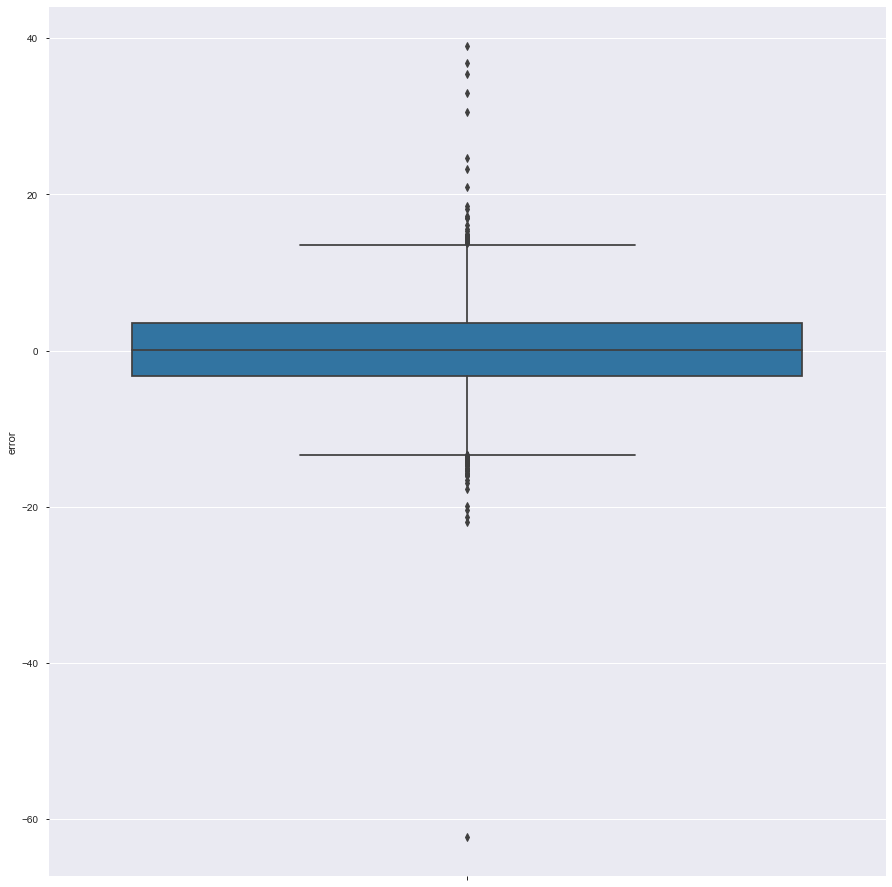

In [189]:
#errors when  timestamp included
f,ax=plt.subplots(figsize=(15,16))
sns.boxplot(y='error',data=test1)

In [ ]:
df_new.amin = pd.to_datetime(df.amin).astype(datetime)
df.amax = pd.to_datetime(df.amax).astype(datetime)

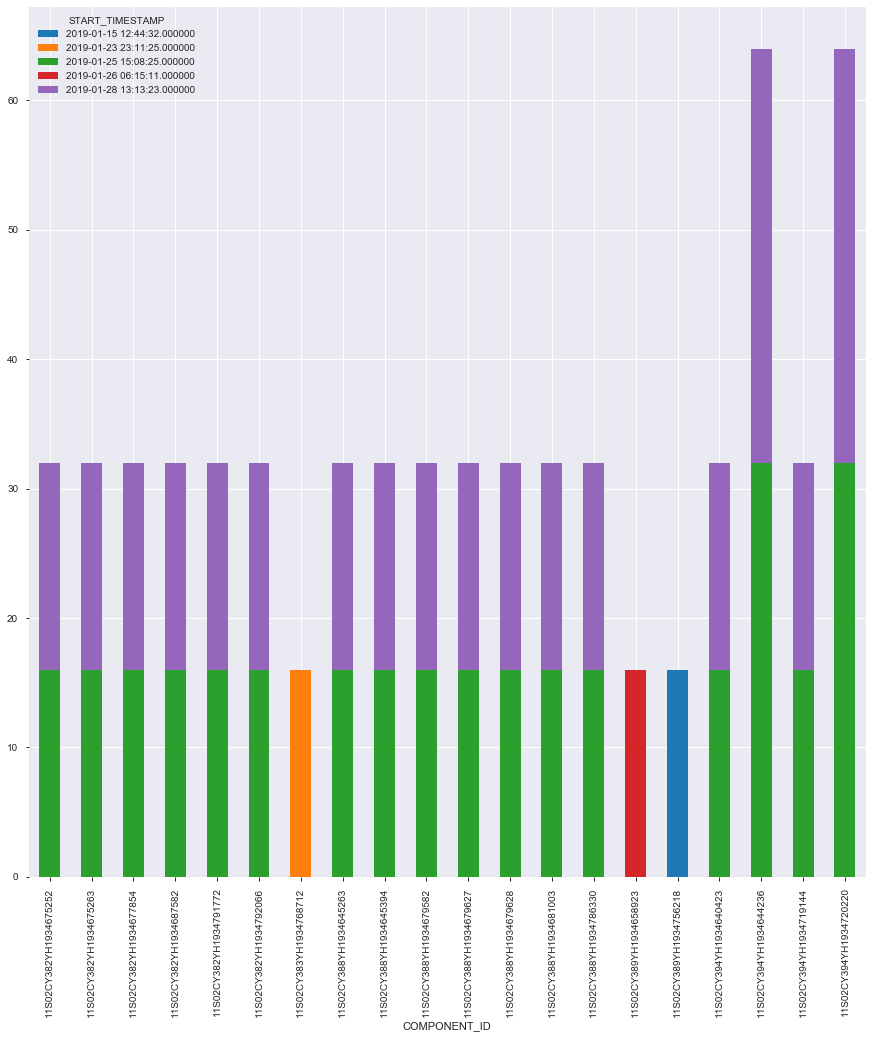

In [222]:
#errors when  timestamp included
#f,ax=plt.subplots(figsize=(15,16))
df_new[df['COMPONENT_ID'].isin(component_id_mean0)].sort_values(by=['COMPONENT_ID', 'START_TIMESTAMP']).groupby(['COMPONENT_ID', 'START_TIMESTAMP']).size().unstack().plot(kind='bar', stacked=True,figsize=(15,16))
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [238]:
df_new[df_new['COMPONENT_ID'].isin(component_id_mean0)].sort_values(by=['COMPONENT_ID', 'START_TIMESTAMP']).groupby(['COMPONENT_ID', 'START_TIMESTAMP']).size()

COMPONENT_ID            START_TIMESTAMP           
11S02CY382YH1934675252  2019-01-25 15:08:25.000000    16
                        2019-01-28 13:13:23.000000    16
11S02CY382YH1934675263  2019-01-25 15:08:25.000000    16
                        2019-01-28 13:13:23.000000    16
11S02CY382YH1934677854  2019-01-25 15:08:25.000000    16
                        2019-01-28 13:13:23.000000    16
11S02CY382YH1934687582  2019-01-25 15:08:25.000000    16
                        2019-01-28 13:13:23.000000    16
11S02CY382YH1934791772  2019-01-25 15:08:25.000000    16
                        2019-01-28 13:13:23.000000    16
11S02CY382YH1934792066  2019-01-25 15:08:25.000000    16
                        2019-01-28 13:13:23.000000    16
11S02CY383YH1934768712  2019-01-23 23:11:25.000000    16
11S02CY388YH1934645263  2019-01-25 15:08:25.000000    16
                        2019-01-28 13:13:23.000000    16
11S02CY388YH1934645394  2019-01-25 15:08:25.000000    16
                        2019-01-28 13

In [210]:
df_new[df['COMPONENT_ID'].isin(component_id_mean0)]

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  \
1286  FF_SCM1  11S02CY382YH1934675252     9          PB0  2019-01-25   
1287  FF_SCM1  11S02CY382YH1934675252    10          PB0  2019-01-25   
1288  FF_SCM1  11S02CY382YH1934675252    11          PB0  2019-01-25   
1289  FF_SCM1  11S02CY382YH1934675252    12          PB0  2019-01-25   
1290  FF_SCM1  11S02CY382YH1934675252    13          PB0  2019-01-25   
...       ...                     ...   ...          ...         ...   
9145  FF_SCM1  11S02CY394YH1934720220     7          PB0  2019-01-28   
9146  FF_SCM1  11S02CY394YH1934720220     7          PB1  2019-01-28   
9147  FF_SCM1  11S02CY394YH1934720220     8          PB0  2019-01-28   
9148  FF_SCM1  11S02CY394YH1934720220     8          PB1  2019-01-28   
9149  FF_SCM1  11S02CY394YH1934720220     9          PB0  2019-01-28   

      EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  \
1286         0.0        0.0      108.869196      19.439063           70.2   
1287         0.0        0.0      108.869196      19.439063           70.2   
1288         0.0        0.0      108.869196      19.439063           70.2   
1289         0.0        0.0      108.869196      19.439063           70.2   
1290         0.0        0.0      108.869196      19.439063           70.2   
...          ...        ...             ...            ...            ...   
9145         0.0        0.0      241.950551      42.279871           74.1   
9146         0.0        0.0      241.950551      42.279871           74.1   
9147         0.0        0.0      241.950551      42.279871           74.1   
9148         0.0        0.0      241.950551      42.279871           74.1   
9149         0.0        0.0      241.950551      42.279871           74.1   

      ...            FINISH_TIMESTAMP  \
1286  ...  2019-01-25 19:28:27.000000   
1287  ...  2019-01-25 19:28:27.000000   
1288  ...  2019-01-25 19:28:27.000000   
1289  ...  2019-01-25 19:28:27.000000   
1290  ...  2019-01-25 19:28:27.000000   
...   ...                         ...   
9145  ...  2019-01-28 17:27:09.000000   
9146  ...  2019-01-28 17:27:09.000000   
9147  ...  2019-01-28 17:27:09.000000   
9148  ...  2019-01-28 17:27:09.000000   
9149  ...  2019-01-28 17:27:09.000000   

                                               PNP_FILE  \
1286  DMIW263F8CCMA4I~2019-01-26-00-28~POK~3906M04.z...   
1287  DMIW263F8CCMA4I~2019-01-26-00-28~POK~3906M04.z...   
1288  DMIW263F8CCMA4I~2019-01-26-00-28~POK~3906M04.z...   
1289  DMIW263F8CCMA4I~2019-01-26-00-28~POK~3906M04.z...   
1290  DMIW263F8CCMA4I~2019-01-26-00-28~POK~3906M04.z...   
...                                                 ...   
9145  DMIW263F8CCMA4I~2019-01-28-22-27~POK~3906M04.z...   
9146  DMIW263F8CCMA4I~2019-01-28-22-27~POK~3906M04.z...   
9147  DMIW263F8CCMA4I~2019-01-28-22-27~POK~3906M04.z...   
9148  DMIW263F8CCMA4I~2019-01-28-22-27~POK~3906M04.z...   
9149  DMIW263F8CCMA4I~2019-01-28-22-27~POK~3906M04.z...   

                                         HOME_DIRECTORY  Etch_length1  \
1286  http://ausgsa.ibm.com/projects/m/moosecollecti...    241.888643   
1287  http://ausgsa.ibm.com/projects/m/moosecollecti...    237.901634   
1288  http://ausgsa.ibm.com/projects/m/moosecollecti...    234.185028   
1289  http://ausgsa.ibm.com/projects/m/moosecollecti...    242.978972   
1290  http://ausgsa.ibm.com/projects/m/moosecollecti...    259.987120   
...                                                 ...           ...   
9145  http://ausgsa.ibm.com/projects/m/moosecollecti...    162.225524   
9146  http://ausgsa.ibm.com/projects/m/moosecollecti...    159.132783   
9147  http://ausgsa.ibm.com/projects/m/moosecollecti...    224.230670   
9148  http://ausgsa.ibm.com/projects/m/moosecollecti...    224.308285   
9149  http://ausgsa.ibm.com/projects/m/moosecollecti...    166.289764   

     Etch_length2 Etch_length3 Etch_length4 Etch_length5 Etch_length6  \
1286    17.081750   102.298626   103.170502   464.439521   492.68

In [228]:
df_new[df['COMPONENT_ID']=='11S02CY394YH1934720220'].head(64)

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  \
9086  FF_SCM1  11S02CY394YH1934720220     3          PB1  2019-01-25   
9087  FF_SCM1  11S02CY394YH1934720220     4          PB0  2019-01-25   
9088  FF_SCM1  11S02CY394YH1934720220     4          PB1  2019-01-25   
9089  FF_SCM1  11S02CY394YH1934720220     5          PB0  2019-01-25   
9090  FF_SCM1  11S02CY394YH1934720220     5          PB1  2019-01-25   
...       ...                     ...   ...          ...         ...   
9145  FF_SCM1  11S02CY394YH1934720220     7          PB0  2019-01-28   
9146  FF_SCM1  11S02CY394YH1934720220     7          PB1  2019-01-28   
9147  FF_SCM1  11S02CY394YH1934720220     8          PB0  2019-01-28   
9148  FF_SCM1  11S02CY394YH1934720220     8          PB1  2019-01-28   
9149  FF_SCM1  11S02CY394YH1934720220     9          PB0  2019-01-28   

      EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  \
9086         0.0        0.0      108.869196      19.439062           70.2   
9087         0.0        0.0      108.869196      19.439062           70.2   
9088         0.0        0.0      108.869196      19.439062           70.2   
9089         0.0        0.0      108.869196      19.439062           70.2   
9090         0.0        0.0      108.869196      19.439062           70.2   
...          ...        ...             ...            ...            ...   
9145         0.0        0.0      241.950551      42.279871           74.1   
9146         0.0        0.0      241.950551      42.279871           74.1   
9147         0.0        0.0      241.950551      42.279871           74.1   
9148         0.0        0.0      241.950551      42.279871           74.1   
9149         0.0        0.0      241.950551      42.279871           74.1   

      ...            FINISH_TIMESTAMP  \
9086  ...  2019-01-25 19:28:27.000000   
9087  ...  2019-01-25 19:28:27.000000   
9088  ...  2019-01-25 19:28:27.000000   
9089  ...  2019-01-25 19:28:27.000000   
9090  ...  2019-01-25 19:28:27.000000   
...   ...                         ...   
9145  ...  2019-01-28 17:27:09.000000   
9146  ...  2019-01-28 17:27:09.000000   
9147  ...  2019-01-28 17:27:09.000000   
9148  ...  2019-01-28 17:27:09.000000   
9149  ...  2019-01-28 17:27:09.000000   

                                               PNP_FILE  \
9086  DMIW263F8CCMA4I~2019-01-26-00-28~POK~3906M04.z...   
9087  DMIW263F8CCMA4I~2019-01-26-00-28~POK~3906M04.z...   
9088  DMIW263F8CCMA4I~2019-01-26-00-28~POK~3906M04.z...   
9089  DMIW263F8CCMA4I~2019-01-26-00-28~POK~3906M04.z...   
9090  DMIW263F8CCMA4I~2019-01-26-00-28~POK~3906M04.z...   
...                                                 ...   
9145  DMIW263F8CCMA4I~2019-01-28-22-27~POK~3906M04.z...   
9146  DMIW263F8CCMA4I~2019-01-28-22-27~POK~3906M04.z...   
9147  DMIW263F8CCMA4I~2019-01-28-22-27~POK~3906M04.z...   
9148  DMIW263F8CCMA4I~2019-01-28-22-27~POK~3906M04.z...   
9149  DMIW263F8CCMA4I~2019-01-28-22-27~POK~3906M04.z...   

                                         HOME_DIRECTORY  Etch_length1  \
9086  http://ausgsa.ibm.com/projects/m/moosecollecti...    160.588807   
9087  http://ausgsa.ibm.com/projects/m/moosecollecti...    196.630463   
9088  http://ausgsa.ibm.com/projects/m/moosecollecti...    191.558286   
9089  http://ausgsa.ibm.com/projects/m/moosecollecti...    257.168535   
9090  http://ausgsa.ibm.com/projects/m/moosecollecti...    203.190939   
...                                                 ...           ...   
9145  http://ausgsa.ibm.com/projects/m/moosecollecti...    162.225524   
9146  http://ausgsa.ibm.com/projects/m/moosecollecti...    159.132783   
9147  http://ausgsa.ibm.com/projects/m/moosecollecti...    224.230670   
9148  http://ausgsa.ibm.com/projects/m/moosecollecti...    224.308285   
9149  http://ausgsa.ibm.com/projects/m/moosecollecti...    166.289764   

     Etch_length2 Etch_length3 Etch_length4 Etch_length5 Etch_length6  \
9086    28.485161    44.511134   122.813576   356.398678   398.84

In [198]:
list(set(df['COMPONENT_ID'])&set(component_id_mean0))

['11S02CY388YH1934681003',
 '11S02CY389YH1934756218',
 '11S02CY382YH1934677854',
 '11S02CY388YH1934679627',
 '11S02CY382YH1934687582',
 '11S02CY388YH1934645394',
 '11S02CY382YH1934792066',
 '11S02CY388YH1934645263',
 '11S02CY394YH1934720220',
 '11S02CY394YH1934640423',
 '11S02CY382YH1934675263',
 '11S02CY388YH1934679582',
 '11S02CY394YH1934644236',
 '11S02CY383YH1934768712',
 '11S02CY388YH1934786330',
 '11S02CY389YH1934658923',
 '11S02CY382YH1934791772',
 '11S02CY388YH1934679628',
 '11S02CY394YH1934719144',
 '11S02CY382YH1934675252']

In [245]:
df=pd.read_csv('midas_with_mac.csv')

In [237]:
sorted(df['EYE_WIDTH'].unique())

[0.0,
 31.2,
 35.1,
 39.0,
 42.9,
 46.8,
 50.7,
 54.6,
 58.5,
 62.4,
 66.3,
 70.2,
 74.1,
 78.0]

In [253]:
df[df['COMPONENT_ID'].isin(component_id_mean0)].sort_values(by=['COMPONENT_ID', 'Machine']).groupby(['COMPONENT_ID', 'Machine']).size()

COMPONENT_ID            Machine
11S02CY382YH1934675252  M04        32
11S02CY382YH1934675263  M04        32
11S02CY382YH1934677854  M04        32
11S02CY382YH1934687582  M04        32
11S02CY382YH1934791772  M04        32
11S02CY382YH1934792066  M04        32
11S02CY383YH1934768712  M02        16
11S02CY388YH1934645263  M04        32
11S02CY388YH1934645394  M04        32
11S02CY388YH1934679582  M04        32
11S02CY388YH1934679627  M04        32
11S02CY388YH1934679628  M04        32
11S02CY388YH1934681003  M04        32
11S02CY388YH1934786330  M04        32
11S02CY389YH1934658923  LM5        16
11S02CY389YH1934756218  M02        16
11S02CY394YH1934640423  M04        32
11S02CY394YH1934644236  M04        64
11S02CY394YH1934719144  M04        32
11S02CY394YH1934720220  M04        64
dtype: int64

In [261]:
df[df['COMPONENT_ID'].isin(component_id_mean0)].sort_values(by=['COMPONENT_ID', 'Machine','SLOTID']).groupby(['COMPONENT_ID', 'Machine','SLOTID']).size()

COMPONENT_ID            Machine  SLOTID  
11S02CY382YH1934675252  M04      N4CP2.CP    32
11S02CY382YH1934675263  M04      N4CP1.CP    32
11S02CY382YH1934677854  M04      N6CP1.CP    32
11S02CY382YH1934687582  M04      N2CP1.CP    32
11S02CY382YH1934791772  M04      N0CP2.CP    32
11S02CY382YH1934792066  M04      N0CP1.CP    32
11S02CY383YH1934768712  M02      N7CP1.CP    16
11S02CY388YH1934645263  M04      N5CP2.CP    32
11S02CY388YH1934645394  M04      N4CP0.CP    32
11S02CY388YH1934679582  M04      N6CP0.CP    32
11S02CY388YH1934679627  M04      N2CP0.CP    32
11S02CY388YH1934679628  M04      N3CP2.CP    32
11S02CY388YH1934681003  M04      N7CP2.CP    32
11S02CY388YH1934786330  M04      N0CP0.CP    32
11S02CY389YH1934658923  LM5      N7CP1.CP    16
11S02CY389YH1934756218  M02      N7CP1.CP    16
11S02CY394YH1934640423  M04      N5CP1.CP    32
11S02CY394YH1934644236  M04      N7CP1.CP    64
11S02CY394YH1934719144  M04      N1CP2.CP    32
11S02CY394YH1934720220  M04      N3CP1.CP    6

In [260]:
df[df['COMPONENT_ID'].isin(Component_id_with0)].sort_values(by=['COMPONENT_ID', 'Machine']).groupby(['COMPONENT_ID', 'Machine']).size()

COMPONENT_ID            Machine
11S02AA435YH1934052422  M02        840
11S02AA435YH1934064225  M02        832
11S02AA435YH1934070487  M02        832
11S02AA435YH1934081365  M02        832
11S02AA453YH1934064254  M02        832
11S02AA471YH1934064219  M02        888
11S02AA475YH1934073703  M02        832
11S02CY381YH1934595599  M03         64
11S02CY382YH1934607672  M02         32
11S02CY382YH1934675252  M04         32
11S02CY382YH1934675263  M04         32
11S02CY382YH1934677854  M04         32
11S02CY382YH1934687582  M04         32
11S02CY382YH1934791772  M04         32
11S02CY382YH1934792066  M04         32
11S02CY383YH1934528453  M02        160
11S02CY383YH1934768712  M02         16
11S02CY383YH1934794910  M02         80
11S02CY388YH1934645263  M04         32
11S02CY388YH1934645315  LM5         48
11S02CY388YH1934645394  M04         32
11S02CY388YH1934648562  LM5         64
11S02CY388YH1934679582  M04         32
11S02CY388YH1934679627  M04         32
11S02CY388YH1934679628  M04     

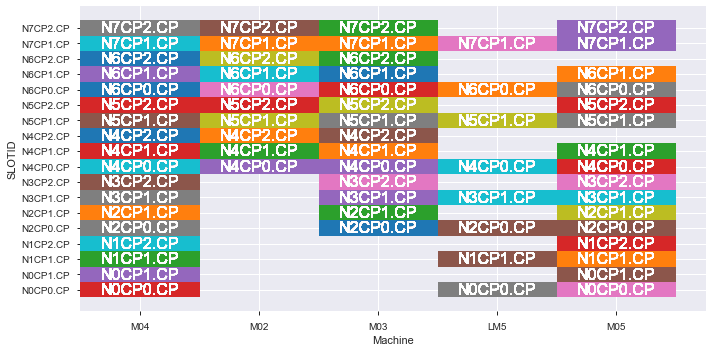

In [97]:
fig, ax = plt.subplots(figsize=(10, 5))

xs = list(df['Machine'].unique())
for row in df.sort_values(by='SLOTID').itertuples():
    x = xs.index( row.Machine)
    y =row.SLOTID
    ax.barh(y, left=x-0.5, width=1, height=1)
    ax.text(x, y, row.SLOTID, ha='center', va='center', color='white', fontsize=16)
#ax.yaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
#ax.yaxis.set_major_locator(mdates.DayLocator(interval=1))  # set a tick every hour
ax.set_xlabel('Machine')
ax.set_ylabel('SLOTID')
ax.set_xticks(range(len(xs)))
ax.set_xticklabels(xs)

plt.tight_layout()
plt.show()

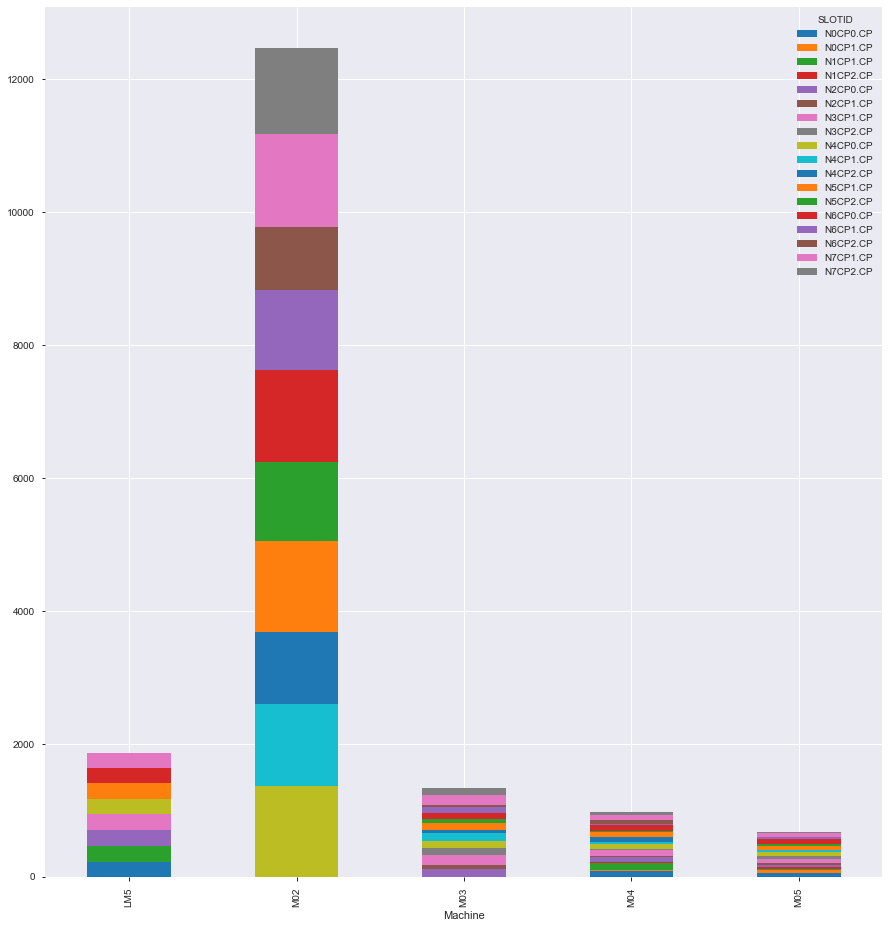

In [349]:
#errors when  timestamp included
#f,ax=plt.subplots(figsize=(15,16))
df.sort_values(by=['Machine', 'SLOTID']).groupby(['Machine', 'SLOTID']).size().unstack().plot(kind='bar',stacked=True, figsize=(15,16))
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [251]:
df['Machine'].unique()

array(['M04', 'M02', 'M03', 'LM5', 'M05'], dtype=object)

In [271]:

df.sort_values(by=['COMPONENT_ID', 'PLUGPOSITION']).groupby(['COMPONENT_ID', 'PLUGPOSITION']).size().unstack()['PB0'].isna().sum()


0

In [275]:

df.sort_values(by=['COMPONENT_ID', 'PLUGPOSITION']).groupby(['COMPONENT_ID', 'PLUGPOSITION']).size().unstack()['PB1'].isna().sum()


COMPONENT_ID
11S02AA435YH1934052422    420.0
11S02AA435YH1934064225    416.0
11S02AA435YH1934064264      NaN
11S02AA435YH1934070487    416.0
11S02AA435YH1934081365    416.0
                          ...  
11S02CY395YH1934755722      NaN
11S02CY395YH1934779055      NaN
11S02CY395YH1934784782      NaN
11S02CY395YH1934800771      NaN
11S02CY395YH1934801982      NaN
Name: PB1, Length: 406, dtype: float64

In [317]:
df.groupby(['Machine','SLOTID'])['COMPONENT_ID'].unique()

Machine  SLOTID  
LM5      N0CP0.CP    [11S02CY388YH1934590637, 11S02CY388YH193462832...
         N1CP1.CP    [11S02CY389YH1934560732, 11S02CY394YH193464602...
         N2CP0.CP    [11S02CY388YH1934546857, 11S02CY388YH193459482...
         N3CP1.CP    [11S02CY382YH1934472901, 11S02CY389YH193461950...
         N4CP0.CP    [11S02CY382YH1934620648, 11S02CY388YH193459133...
                                           ...                        
M05      N5CP2.CP     [11S02CY388YH1934683162, 11S02CY388YH1934782718]
         N6CP0.CP    [11S02CY388YH1934546870, 11S02CY388YH193476856...
         N6CP1.CP     [11S02CY382YH1934795117, 11S02CY382YH1934800992]
         N7CP1.CP    [11S02CY382YH1934520551, 11S02CY394YH193469452...
         N7CP2.CP     [11S02CY388YH1934807295, 11S02CY388YH1934807298]
Name: COMPONENT_ID, Length: 67, dtype: object

In [231]:
df.groupby(['Machine','COMPONENT_ID'])['SLOTID'].unique()

Machine  COMPONENT_ID          
LM5      11S02CY382YH1934472901    [N3CP1.CP]
         11S02CY382YH1934620648    [N4CP0.CP]
         11S02CY388YH1934546857    [N2CP0.CP]
         11S02CY388YH1934590637    [N0CP0.CP]
         11S02CY388YH1934591337    [N4CP0.CP]
                                      ...    
M05      11S02CY395YH1934575728    [N5CP1.CP]
         11S02CY395YH1934658824    [N3CP1.CP]
         11S02CY395YH1934662750    [N1CP1.CP]
         11S02CY395YH1934703310    [N5CP1.CP]
         11S02CY395YH1934801982    [N5CP1.CP]
Name: SLOTID, Length: 388, dtype: object

In [230]:
df[df.groupby(['Machine','COMPONENT_ID'])['SLOTID'].transform('nunique')>1]

Empty DataFrame
Columns: [CORNER, COMPONENT_ID, LANE, PLUGPOSITION, TEST_DATE, EYE_HEIGHT, EYE_WIDTH, EYE_HEIGHT_AVG, EYE_WIDTH_AVG, EYE_WIDTH_MAX, EYE_HEIGHT_MIN, EYE_WIDTH_MIN, EYE_HEIGHT_SDEV, EYE_WIDTH_SDEV, SLOTID, SLOTID_DEC, START_TIMESTAMP, FINISH_TIMESTAMP, PNP_FILE, HOME_DIRECTORY, Etch_length1, Etch_length2, Etch_length3, Etch_length4, Etch_length5, Etch_length6, pin_length, Machine]
Index: []

[0 rows x 28 columns]

In [318]:









set(Component_id_with0).symmetric_difference(component_id_mean0)

{'11S02AA435YH1934052422',
 '11S02AA435YH1934064225',
 '11S02AA435YH1934070487',
 '11S02AA435YH1934081365',
 '11S02AA453YH1934064254',
 '11S02AA471YH1934064219',
 '11S02AA475YH1934073703',
 '11S02CY381YH1934595599',
 '11S02CY382YH1934607672',
 '11S02CY383YH1934528453',
 '11S02CY383YH1934794910',
 '11S02CY388YH1934645315',
 '11S02CY388YH1934648562',
 '11S02CY388YH1934753949',
 '11S02CY388YH1934779505',
 '11S02CY388YH1934807298',
 '11S02CY389YH1934772972',
 '11S02CY394YH1934502847',
 '11S02CY394YH1934506185',
 '11S02CY395YH1934662750'}

In [327]:
df[(df['COMPONENT_ID'].isin(set(Component_id_with0).symmetric_difference(component_id_mean0))) & (df['EYE_WIDTH']==0)]

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  \
432           FF_SCM1  11S02CY381YH1934595599    11          PB0  2019-01-14   
434           FF_SCM1  11S02CY381YH1934595599     1          PB0  2019-01-14   
436           FF_SCM1  11S02CY381YH1934595599     0          PB0  2019-01-14   
438           FF_SCM1  11S02CY381YH1934595599     3          PB0  2019-01-14   
440           FF_SCM1  11S02CY381YH1934595599     4          PB0  2019-01-14   
...               ...                     ...   ...          ...         ...   
17924  IO_NOM_NOM_PCX  11S02AA471YH1934064219    15          PB1  2019-01-09   
17927  IO_NOM_NOM_PCX  11S02AA471YH1934064219     0          PB1  2019-01-09   
17929  IO_NOM_NOM_PCX  11S02AA471YH1934064219     1          PB1  2019-01-09   
17931  IO_NOM_NOM_PCX  11S02AA471YH1934064219     2          PB1  2019-01-09   
17933  IO_NOM_NOM_PCX  11S02AA471YH1934064219     3          PB1  2019-01-09   

       EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  \
432         343.2        0.0      333.663281      56.595703           74.1   
434         335.4        0.0      333.663281      56.595703           74.1   
436         296.4        0.0      333.663281      56.595703           74.1   
438         241.8        0.0      333.663281      56.595703           74.1   
440         366.6        0.0      333.663281      56.595703           74.1   
...           ...        ...             ...            ...            ...   
17924       327.6        0.0      328.044167      57.305625           74.1   
17927       265.2        0.0      328.044167      57.305625           74.1   
17929       335.4        0.0      328.044167      57.305625           74.1   
17931       304.2        0.0      328.044167      57.305625           74.1   
17933       335.4        0.0      328.044167      57.305625           74.1   

       ...                                           PNP_FILE  \
432    ...  DMIW25FF8CCMA48~2019-01-14-20-42~POK~3906M03.z...   
434    ...  DMIW25FF8CCMA48~2019-01-14-20-42~POK~3906M03.z...   
436    ...  DMIW25FF8CCMA48~2019-01-14-20-42~POK~3906M03.z...   
438    ...  DMIW25FF8CCMA48~2019-01-14-20-42~POK~3906M03.z...   
440    ...  DMIW25FF8CCMA48~2019-01-14-20-42~POK~3906M03.z...   
...    ...                                                ...   
17924  ...  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   
17927  ...  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   
17929  ...  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   
17931  ...  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   
17933  ...  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   

                                          HOME_DIRECTORY  Etch_length1  \
432    http://ausgsa.ibm.com/projects/m/moosecollecti...    217.185077   
434    http://ausgsa.ibm.com/projects/m/moosecollecti...    237.964375   
436    http://ausgsa.ibm.com/projects/m/moosecollecti...    175.872292   
438    http://ausgsa.ibm.com/projects/m/moosecollecti...    162.229934   
440    http://ausgsa.ibm.com/projects/m/moosecollecti...    196.630463   
...                                                  ...           ...   
17924  http://ausgsa.ibm.com/projects/m/moosecollecti...    196.008596   
17927  http://ausgsa.ibm.com/projects/m/moosecollecti...    208.400305   
17929  http://ausgsa.ibm.com/projects/m/moosecollecti...    201.266232   
17931  http://ausgsa.ibm.com/projects/m/moosecollecti...    190.571163   
17933  http://ausgsa.ibm.com/projects/m/moosecollecti...    181.138642   

       Etch_length2 Etch_length3 Etch_length4 Etch_length5 Etch_length6  \
432       16.862089   103.121994    98.869266   436.038426   478.488522   
434        6.870660    45.348989   138.403124   428.587149   456.837147   
436        7.413869    46.553111   147.709347   377.548619   399.148499   
438        8.917112    44.511134   122.813576   338.471757   380.921853   
440       16.519681    44.636005   129.255225   387.041374   405.171298 

In [333]:
df[(df['COMPONENT_ID']=='11S02AA471YH1934064219') & (df['EYE_WIDTH']==0)]

CORNER            COMPONENT_ID  LANE PLUGPOSITION  \
11912  IO_COLD_BIAS_PCX  11S02AA471YH1934064219     0          PB1   
11918  IO_COLD_BIAS_PCX  11S02AA471YH1934064219     1          PB1   
11924  IO_COLD_BIAS_PCX  11S02AA471YH1934064219     2          PB1   
11927  IO_COLD_BIAS_PCX  11S02AA471YH1934064219    15          PB1   
11930  IO_COLD_BIAS_PCX  11S02AA471YH1934064219     3          PB1   
...                 ...                     ...   ...          ...   
17924    IO_NOM_NOM_PCX  11S02AA471YH1934064219    15          PB1   
17927    IO_NOM_NOM_PCX  11S02AA471YH1934064219     0          PB1   
17929    IO_NOM_NOM_PCX  11S02AA471YH1934064219     1          PB1   
17931    IO_NOM_NOM_PCX  11S02AA471YH1934064219     2          PB1   
17933    IO_NOM_NOM_PCX  11S02AA471YH1934064219     3          PB1   

        TEST_DATE  EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  \
11912  2019-01-07       273.0        0.0      336.623103      57.694754   
11918  2019-01-07       343.2        0.0      336.623103      57.694754   
11924  2019-01-07       343.2        0.0      336.623103      57.694754   
11927  2019-01-07       319.8        0.0      336.623103      57.694754   
11930  2019-01-07       358.8        0.0      336.623103      57.694754   
...           ...         ...        ...             ...            ...   
17924  2019-01-09       327.6        0.0      328.044167      57.305625   
17927  2019-01-09       265.2        0.0      328.044167      57.305625   
17929  2019-01-09       335.4        0.0      328.044167      57.305625   
17931  2019-01-09       304.2        0.0      328.044167      57.305625   
17933  2019-01-09       335.4        0.0      328.044167      57.305625   

       EYE_WIDTH_MAX  ...                                           PNP_FILE  \
11912           74.1  ...  DMIWC35EFZMFIO2~2019-01-08-03-37~POK~3906M02.z...   
11918           74.1  ...  DMIWC35EFZMFIO2~2019-01-08-03-37~POK~3906M02.z...   
11924           74.1  ...  DMIWC35EFZMFIO2~2019-01-08-03-37~POK~3906M02.z...   
11927           74.1  ...  DMIWC35EFZMFIO2~2019-01-08-03-37~POK~3906M02.z...   
11930           74.1  ...  DMIWC35EFZMFIO2~2019-01-08-03-37~POK~3906M02.z...   
...              ...  ...                                                ...   
17924           74.1  ...  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   
17927           74.1  ...  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   
17929           74.1  ...  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   
17931           74.1  ...  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   
17933           74.1  ...  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   

                                          HOME_DIRECTORY  Etch_length1  \
11912  http://ausgsa.ibm.com/projects/m/moosecollecti...    208.400305   
11918  http://ausgsa.ibm.com/projects/m/moosecollecti...    201.266232   
11924  http://ausgsa.ibm.com/projects/m/moosecollecti...    190.571163   
11927  http://ausgsa.ibm.com/projects/m/moosecollecti...    196.008596   
11930  http://ausgsa.ibm.com/projects/m/moosecollecti...    181.138642   
...                                                  ...           ...   
17924  http://ausgsa.ibm.com/projects/m/moosecollecti...    196.008596   
17927  http://ausgsa.ibm.com/projects/m/moosecollecti...    208.400305   
17929  http://ausgsa.ibm.com/projects/m/moosecollecti...    201.266232   
17931  http://ausgsa.ibm.com/projects/m/moosecollecti...    190.571163   
17933  http://ausgsa.ibm.com/projects/m/moosecollecti...    181.138642   

       Etch_length2 Etch_length3 Etch_length4 Etch_length5 Etch_length6  \
11912     17.673817    46.553111   147.709347   420.336580   441.936460   
11918     19.394310    45.348989   138.403124   404.412656   432.662654   
11924     25.225554    45.040591   130.680137   391.517445   427.587377   
11927     14.374042   110.016969   100.755966   421.155573   460.075487   
11930     28.485161    44.511134   122.813576   37

In [339]:
df_filtered_eye0=df[df['EYE_WIDTH']!=0]

In [341]:
df_filtered_eye0.to_csv('df_filtered_eye0.csv',index=False)

In [679]:

def correlation_filtered(typ,target):
    from sklearn.feature_selection import SelectFromModel
    from sklearn.linear_model import LassoCV
    import pandas as pd
    import numpy as np
    from scipy.stats import pearsonr
    import statsmodels.api as sm
    from scipy import stats
    def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
        mean = df[on].mean()

    # Compute the number of values and the mean of each group
        agg = df.groupby(by)[on].agg(['count', 'mean'])
        counts = agg['count']
        means = agg['mean']

    # Compute the "smoothed" means
        smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
        return df[by].map(smooth)
    df=pd.read_csv('df_filtered_eye0.csv')
    
    if typ=='continuous':
        numerics = ['int16', 'int32', 'float16', 'float32', 'float64']

        df = df.select_dtypes(include=numerics)
        return df[df.columns[:]].corr()[target][:]
    if typ=='categorical':
        numerics = ['int16', 'int32', 'float16', 'float32', 'float64']
        
        col = df.select_dtypes(exclude=numerics).columns
        for col in col:
            vals=df[col].unique()
            df_arr = [df[df[col]==val][target] for val in vals]
            F, p = stats.f_oneway(*df_arr)
            print(col,F,p)
    if typ=='all_mean':
        
        df_new=pd.read_csv('df_filtered_eye0.csv')
       # df_new['TEST_DATE'] =  pd.to_datetime(df_new['TEST_DATE'], format='%Y-%m-%d')
       # df_new['TEST_DATE']=df_new['TEST_DATE'].dt.strftime('%Y%m%d').astype(float)
        #df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
        #df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
        df_new['CORNER'] = calc_smooth_mean(df_new, by='CORNER', on=target, m=300)
        df_new['COMPONENT_ID'] = calc_smooth_mean(df_new, by='COMPONENT_ID', on=target, m=300)
       # df_new['SLOTID_DEC'] = calc_smooth_mean(df_new, by='SLOTID_DEC', on=target, m=300)
        #df_new['PNP_FILE'] = calc_smooth_mean(df_new, by='PNP_FILE', on=target, m=300)
       # df_new['HOME_DIRECTORY'] = calc_smooth_mean(df_new, by='HOME_DIRECTORY', on=target, m=300)
        df_new['PLUGPOSITION'] = calc_smooth_mean(df_new, by='PLUGPOSITION', on=target, m=300)
        df_new['SLOTID'] = calc_smooth_mean(df_new, by='SLOTID', on=target, m=300)
        #df_new['TEST_DATE'] = calc_smooth_mean(df_new, by='TEST_DATE', on=target, m=300)
       # df_new['FINISH_TIMESTAMP'] = calc_smooth_mean(df_new, by='FINISH_TIMESTAMP', on=target, m=300)
        df_new['START_TIMESTAMP'] = calc_smooth_mean(df_new, by='START_TIMESTAMP', on=target, m=300)
        df_new['LANE'] = calc_smooth_mean(df_new, by='LANE', on=target, m=300)
        df_new['Machine'] = calc_smooth_mean(df_new, by='Machine', on=target, m=300)
        X=df_new[['CORNER','COMPONENT_ID','PLUGPOSITION','SLOTID','LANE','Machine','Etch_length6']]
        y=df_new[target]
        y=y.astype('int')
        #X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)


        X2 = sm.add_constant(X)
        est = sm.OLS(y, X2)
        est2 = est.fit()
        print(est2.summary())
    if typ=='boruta':

        from boruta import BorutaPy
        df_new=pd.read_csv('df_filtered_eye0.csv')
       # df_new['TEST_DATE'] =  pd.to_datetime(df_new['TEST_DATE'], format='%Y-%m-%d')
       # df_new['TEST_DATE']=df_new['TEST_DATE'].dt.strftime('%Y%m%d').astype(float)
        #df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
        #df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
        df_new['CORNER'] = calc_smooth_mean(df_new, by='CORNER', on=target, m=300)
        df_new['COMPONENT_ID'] = calc_smooth_mean(df_new, by='COMPONENT_ID', on=target, m=300)
        df_new['SLOTID_DEC'] = calc_smooth_mean(df_new, by='SLOTID_DEC', on=target, m=300)
        df_new['PNP_FILE'] = calc_smooth_mean(df_new, by='PNP_FILE', on=target, m=300)
        df_new['HOME_DIRECTORY'] = calc_smooth_mean(df_new, by='HOME_DIRECTORY', on=target, m=300)
        df_new['PLUGPOSITION'] = calc_smooth_mean(df_new, by='PLUGPOSITION', on=target, m=300)
        df_new['SLOTID'] = calc_smooth_mean(df_new, by='SLOTID', on=target, m=300)
        df_new['TEST_DATE'] = calc_smooth_mean(df_new, by='TEST_DATE', on=target, m=300)
        df_new['FINISH_TIMESTAMP'] = calc_smooth_mean(df_new, by='FINISH_TIMESTAMP', on=target, m=300)
        df_new['START_TIMESTAMP'] = calc_smooth_mean(df_new, by='START_TIMESTAMP', on=target, m=300)
        df_new['LANE'] = calc_smooth_mean(df_new, by='LANE', on=target, m=300)
        df_new['Machine'] = calc_smooth_mean(df_new, by='Machine', on=target, m=300)
        X=df_new.drop([target],axis=1)
        c=X.columns
        X=X.values
        y=df_new[target].values
        y=y.ravel()
        rf = RandomForestRegressor(n_jobs=-1,  max_depth=7)
# define Boruta feature selection method
        feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features - 5 features should be selected
        feat_selector.fit(X, y)

# check selected features - first 5 features are selected
        feat_selector.support_

# check ranking of features
        feat_selector.ranking_
        print(dict(zip(c,feat_selector.ranking_)))

# call transform() on X to filter it down to selected features
       # X_filtered = feat_selector.transform(X)
        
       # print(X_filtered.columns)
    if typ=='lasso':
        df_new=pd.read_csv('df_filtered_eye0.csv')
       # df_new['TEST_DATE'] =  pd.to_datetime(df_new['TEST_DATE'], format='%Y-%m-%d')
       # df_new['TEST_DATE']=df_new['TEST_DATE'].dt.strftime('%Y%m%d').astype(float)
        #df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
        #df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
        df_new['CORNER'] = calc_smooth_mean(df_new, by='CORNER', on=target, m=300)
        df_new['COMPONENT_ID'] = calc_smooth_mean(df_new, by='COMPONENT_ID', on=target, m=300)
        df_new['SLOTID_DEC'] = calc_smooth_mean(df_new, by='SLOTID_DEC', on=target, m=300)
        df_new['PNP_FILE'] = calc_smooth_mean(df_new, by='PNP_FILE', on=target, m=300)
        df_new['HOME_DIRECTORY'] = calc_smooth_mean(df_new, by='HOME_DIRECTORY', on=target, m=300)
        df_new['PLUGPOSITION'] = calc_smooth_mean(df_new, by='PLUGPOSITION', on=target, m=300)
        df_new['SLOTID'] = calc_smooth_mean(df_new, by='SLOTID', on=target, m=300)
        df_new['TEST_DATE'] = calc_smooth_mean(df_new, by='TEST_DATE', on=target, m=300)
        df_new['FINISH_TIMESTAMP'] = calc_smooth_mean(df_new, by='FINISH_TIMESTAMP', on=target, m=300)
        df_new['START_TIMESTAMP'] = calc_smooth_mean(df_new, by='START_TIMESTAMP', on=target, m=300)
        df_new['LANE'] = calc_smooth_mean(df_new, by='LANE', on=target, m=300)
        X=df_new.drop([target],axis=1)
        y=df_new[target]
        y=y.astype('int')
        
        clf = LassoCV(cv=3)
 
    # Set a minimum threshold of 0.70
        sfm = SelectFromModel(clf, threshold=0.70)
        sfm.fit(X, y)
        n_features = sfm.transform(X).shape[1]
 
    # Extracting the index of important features
        feature_idx = sfm.get_support()
 
    # Using the index to print the names of the important variables
        print(feature_idx)
        
        
        
        
        

In [358]:
correlation_filtered('continuous','EYE_WIDTH')

EYE_HEIGHT         0.235286
EYE_WIDTH          1.000000
EYE_HEIGHT_AVG    -0.037523
EYE_WIDTH_AVG     -0.044709
EYE_WIDTH_MAX      0.024877
EYE_HEIGHT_MIN    -0.053367
EYE_WIDTH_MIN      0.010070
EYE_HEIGHT_SDEV    0.055843
EYE_WIDTH_SDEV     0.083863
Etch_length1      -0.072485
Etch_length2       0.010605
Etch_length3      -0.045806
Etch_length4       0.055663
Etch_length5      -0.069437
Etch_length6      -0.096617
pin_length        -0.090234
Name: EYE_WIDTH, dtype: float64

In [359]:
correlation_filtered('categorical','EYE_WIDTH')

CORNER 215.38876342907471 3.4933752303821994e-137
COMPONENT_ID 3.409542814229898 2.623023559276204e-96
LANE 26.00827876662041 6.223987955860861e-73
PLUGPOSITION 184.74870627164958 7.304773547360746e-42
TEST_DATE 15.576252442211546 1.0082850463957226e-63
SLOTID 14.787045418008486 2.4280580412807965e-43
SLOTID_DEC 14.787045418008486 2.4280580412807965e-43
START_TIMESTAMP 8.755670484370247 1.4545547977735128e-105
FINISH_TIMESTAMP 8.755670484370247 1.4545547977735128e-105
PNP_FILE 8.755670484370247 1.4545547977735128e-105
HOME_DIRECTORY 8.667339248913711 2.794353354789002e-105
Machine 58.573479682469724 3.4022204002005595e-49


In [680]:
correlation_filtered('all_mean','EYE_WIDTH')

C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



                            OLS Regression Results                            
Dep. Variable:              EYE_WIDTH   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     194.2
Date:                Wed, 04 Mar 2020   Prob (F-statistic):          1.90e-278
Time:                        09:55:08   Log-Likelihood:                -55031.
No. Observations:               17306   AIC:                         1.101e+05
Df Residuals:                   17298   BIC:                         1.101e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -160.4159      8.751    -18.331   

In [13]:
correlation_filtered('boruta','EYE_WIDTH')

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	27
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	17
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	17
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	17
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	17
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	17
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	17
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	17
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	17
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	17
I

In [694]:
#Funtion for target encoding
def traintest_meanenc():
    import pandas as pd
   # df_new=pd.read_csv('Midas_with_mac.csv')
    df_new=pd.read_csv('df_filtered_eye0.csv')
    #df_new=df_new[['EYE_MIN','PARM_LABEL','FROM_ID', 'FROM_LOCATION',  'MACHINE_TYPE', 'TESTPROGRAMNAME', 'ARCHIVEFILENAME', 'TEST_DATE', 'INTERFACE', 'MONTH', 'YEAR']]
    #df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
    #df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
    #df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
    #df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
   
    X=df_new[[ 'CORNER', 'COMPONENT_ID', 'LANE','SLOTID','Etch_length6' ]]
   
    y=df_new['EYE_WIDTH']
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
    Train=pd.concat((X_train,y_train),axis=1)
    
    X_train2=X_train[['Etch_length6' ]]
    X_test2=X_test[['Etch_length6' ]]
    
    #cols=[ 'COMPONENT_ID','PLUGPOSITION','SLOTID','LANE','CORNER','Machine']
    cols=[ 'CORNER', 'COMPONENT_ID', 'LANE','SLOTID'
       ]
    
    for col in cols:
        
        means = Train.groupby(col).EYE_WIDTH.mean()
        X_train[col] = X_train[col].map(means)
        X_test[col] = X_test[col].map(means)
        X_train[col].fillna(means.mean(), inplace = True)
        X_test[col].fillna(means.mean(), inplace = True)
        X_train1=X_train[[col]]
        X_test1=X_test[[col]]
        X_train1[col].fillna(means.mean(), inplace = True)
        X_train2=pd.concat((X_train1,X_train),axis=1)
        X_test2=pd.concat((X_test1,X_test),axis=1)
    
    return X_train,y_train,X_test,y_test
    

In [623]:
def traintest_meanenc_all():
    import pandas as pd
   # df_new=pd.read_csv('Midas_with_mac.csv')
    df_new=pd.read_csv('df_filtered_eye0.csv')
    #df_new=df_new[['EYE_MIN','PARM_LABEL','FROM_ID', 'FROM_LOCATION',  'MACHINE_TYPE', 'TESTPROGRAMNAME', 'ARCHIVEFILENAME', 'TEST_DATE', 'INTERFACE', 'MONTH', 'YEAR']]
    #df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
    #df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
    #df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
    #df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
   
    df_new=pd.read_csv('df_filtered_eye0.csv')
    df_new=df_new[(df_new['COMPONENT_ID'].isin(components_with_PB0PB1))]
       # df_new['TEST_DATE'] =  pd.to_datetime(df_new['TEST_DATE'], format='%Y-%m-%d')
       # df_new['TEST_DATE']=df_new['TEST_DATE'].dt.strftime('%Y%m%d').astype(float)
        #df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
        #df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
        #df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)


    X=df_new.drop(['EYE_WIDTH'],axis=1)
    #y=df_new[target]
    #X=df_new.drop
   
    y=df_new['EYE_WIDTH']
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
    Train=pd.concat((X_train,y_train),axis=1)
    

    
    #cols=[ 'COMPONENT_ID','PLUGPOSITION','SLOTID','LANE','CORNER','Machine']
    cols=[ 'CORNER', 'COMPONENT_ID','PLUGPOSITION', 'LANE','SLOTID','Machine','START_TIMESTAMP','FINISH_TIMESTAMP','HOME_DIRECTORY','PNP_FILE','SLOTID_DEC','TEST_DATE'
       ]
    X_train2=X_train.drop(cols,axis=1)
    X_test2=X_test.drop(cols,axis=1)
    for col in cols:
        
        means = Train.groupby(col).EYE_WIDTH.mean()
        X_train[col] = X_train[col].map(means)
        X_test[col] = X_test[col].map(means)
        X_train[col].fillna(means.mean(), inplace = True)
        X_test[col].fillna(means.mean(), inplace = True)
        X_train1=X_train[[col]]
        X_test1=X_test[[col]]
        X_train1[col].fillna(means.mean(), inplace = True)
        X_train2=pd.concat((X_train1,X_train),axis=1)
        X_test2=pd.concat((X_test1,X_test),axis=1)
    
    return X_train,y_train,X_test,y_test

In [682]:
X_train,y_train,X_test,y_test=traintest_meanenc()

C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [683]:
X_train.head()

CORNER  COMPONENT_ID       LANE     SLOTID
7666   60.450328     61.912500  58.890558  59.375847
14617  58.781645     58.213953  57.585772  58.633333
16761  58.781645     59.207804  59.957083  59.314586
5382   60.450328     60.450000  57.585772  59.375847
12545  57.388883     57.947978  58.890558  58.690042

In [684]:
regr = RandomForestRegressor(max_depth=7, random_state=0)
regr.fit(X_train, y_train)

C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [685]:
y_pred = regr.predict(X_test)

In [686]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.525301746443425
Mean Squared Error: 31.251339783028317
Root Mean Squared Error: 5.590289776302148


In [687]:
from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [688]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 30, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [ 5, 10,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 5, 8, 11, 14, 17, 20, 23, 26, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [5, 10, 15],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [689]:
rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs =10)

In [690]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   4 out of  15 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=10)]: Done  12 out of  15 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=10)]: Done  15 out of  15 | elapsed:    1.6s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=10,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5, 8, 11, 14, 17, 20, 23, 26, 30, None], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [691]:
best_random = rf_random.best_estimator_
y_pred = best_random.predict(X_test)

In [692]:
rf_random.best_params_

{'n_estimators': 10,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 14,
 'bootstrap': True}

In [693]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.30891590573126
Mean Squared Error: 29.054775911028784
Root Mean Squared Error: 5.390248223507781


C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\shap\explainers\tree.py:104: UserWarning:

Setting feature_perturbation = "tree_path_dependent" because no background data was given.



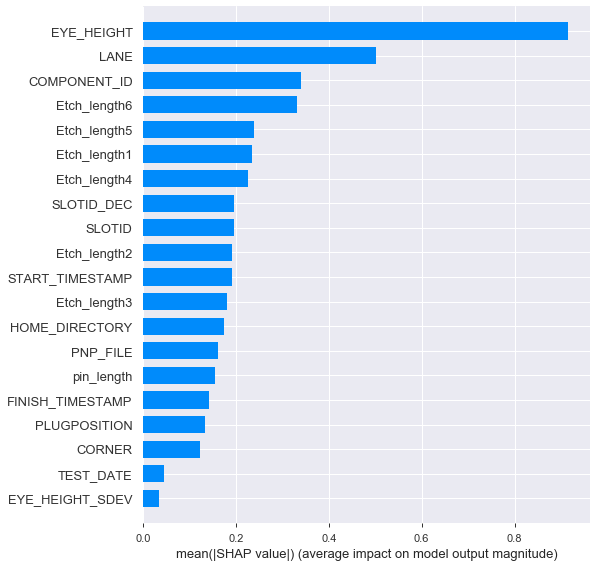

In [636]:
import shap

shap_values = shap.TreeExplainer(best_random).shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar")

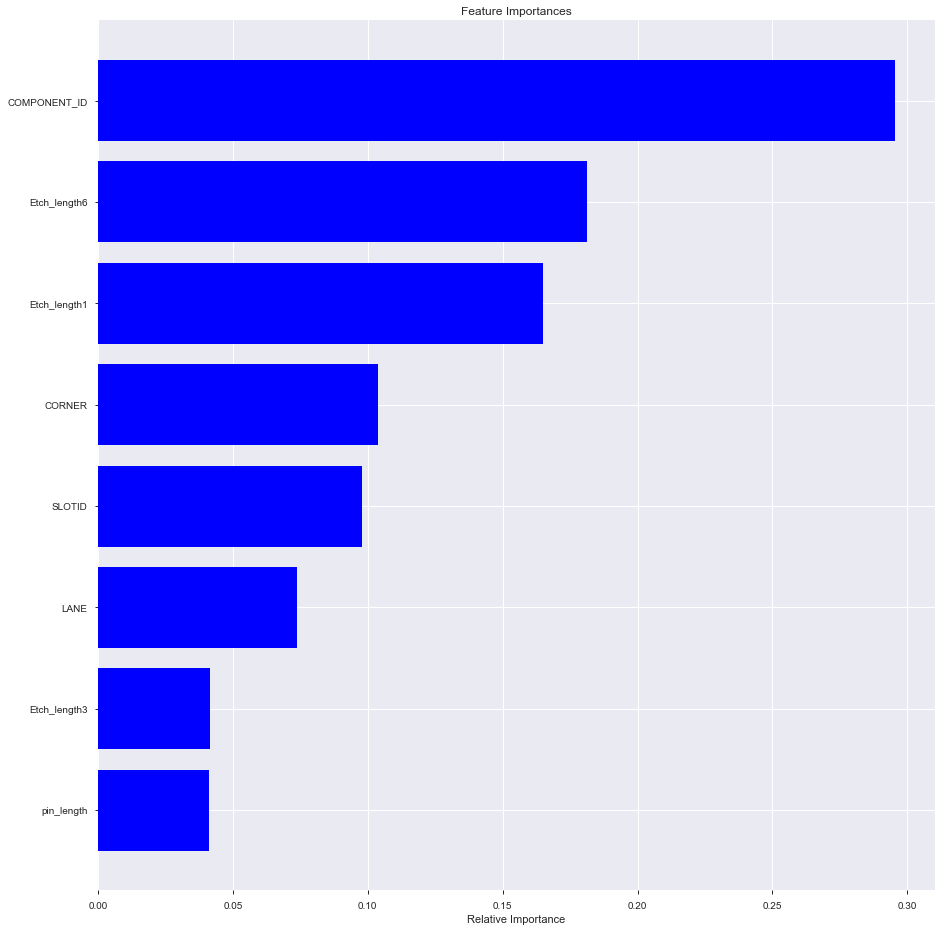

In [548]:
features = X_train.columns
importances = best_random.feature_importances_
indices = np.argsort(importances)
f,ax=plt.subplots(figsize=(15,16))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [93]:
df.itertuples()

In [96]:
df.sort_values(by='SLOTID')['SLOTID']

4218     N0CP0.CP
4159     N0CP0.CP
4160     N0CP0.CP
4161     N0CP0.CP
4162     N0CP0.CP
           ...   
15973    N7CP2.CP
15972    N7CP2.CP
15971    N7CP2.CP
15984    N7CP2.CP
13200    N7CP2.CP
Name: SLOTID, Length: 17306, dtype: object

In [99]:

df.sort_values(by=['Machine', 'COMPONENT_ID']).groupby(['COMPONENT_ID', 'Machine']).size().unstack()


Machine                  LM5    M02  M03   M04   M05
COMPONENT_ID                                        
11S02AA435YH1934052422   NaN  839.0  NaN   NaN   NaN
11S02AA435YH1934064225   NaN  815.0  NaN   NaN   NaN
11S02AA435YH1934064264   NaN    NaN  NaN  16.0   NaN
11S02AA435YH1934070487   NaN  817.0  NaN   NaN   NaN
11S02AA435YH1934081365   NaN  817.0  NaN   NaN   NaN
...                      ...    ...  ...   ...   ...
11S02CY395YH1934755722  16.0    NaN  NaN   NaN   NaN
11S02CY395YH1934779055  16.0    NaN  NaN   NaN   NaN
11S02CY395YH1934784782  48.0    NaN  NaN   NaN   NaN
11S02CY395YH1934800771  16.0    NaN  NaN   NaN   NaN
11S02CY395YH1934801982   NaN    NaN  NaN   NaN  16.0

[386 rows x 5 columns]

In [113]:
df[['Machine','COMPONENT_ID']].drop_duplicates().groupby(['Machine']).size()

Machine
LM5     75
M02    164
M03     58
M04     47
M05     44
dtype: int64

In [112]:
df['COMPONENT_ID'].value_counts()

11S02AA471YH1934037842    856
11S02AA453YH1934064266    848
11S02AA435YH1934081369    840
11S02AA435YH1934052422    839
11S02AA471YH1934064219    826
                         ... 
11S02CY394YH1934588640     16
11S02CY383YH1934749000     16
11S02CY394YH1934506185      2
11S02CY395YH1934662750      2
11S02CY388YH1934807298      1
Name: COMPONENT_ID, Length: 386, dtype: int64

In [115]:
df[df['EYE_WIDTH']==31.2]

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  \
16875  IO_NOM_NOM_PCX  11S02AA471YH1934064219     6          PB1  2019-01-09   

       EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  \
16875       304.2       31.2      328.044167      57.305625           74.1   

       ...                                           PNP_FILE  \
16875  ...  DMIWC360EZMFIO2~2019-01-09-13-00~POK~3906M02.z...   

                                          HOME_DIRECTORY  Etch_length1  \
16875  http://ausgsa.ibm.com/projects/m/moosecollecti...    189.833943   

       Etch_length2 Etch_length3 Etch_length4 Etch_length5 Etch_length6  \
16875     28.780265    49.465044    113.78348   381.862732   413.662818   

      pin_length Machine  
16875  31.800086     M02  

[1 rows x 28 columns]

In [116]:
df[df['EYE_WIDTH']==35.1]

CORNER            COMPONENT_ID  LANE PLUGPOSITION  \
6752            FF_SCM1  11S02CY394YH1934506185     7          PB0   
8531            FF_SCM1  11S02CY395YH1934662750     5          PB0   
10156  IO_COLD_BIAS_PCX  11S02AA453YH1934064254    12          PB1   
11216  IO_COLD_BIAS_PCX  11S02AA475YH1934073703    10          PB1   

        TEST_DATE  EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  \
6752   2019-01-23       335.4       35.1      338.520000      57.248750   
8531   2019-01-12       312.0       35.1      345.881250      57.540234   
10156  2019-01-04       296.4       35.1      332.460227      57.070739   
11216  2019-01-06       288.6       35.1      342.450000      55.443750   

       EYE_WIDTH_MAX  ...                                           PNP_FILE  \
6752            74.1  ...  DMIW115C8CCMA35~2019-01-23-21-39~POK~3906M02.z...   
8531            74.1  ...  DMIW25E48WO25MP~2019-01-13-04-13~SRE~3906M05.z...   
10156           74.1  ...  DMIWC35CAZMFIO2~2019-01-04-11-32~POK~3906M02.z...   
11216           70.2  ...  DMIWC35DFZMFIO2~2019-01-07-04-52~POK~3906M02.z...   

                                          HOME_DIRECTORY  Etch_length1  \
6752   http://ausgsa.ibm.com/projects/m/moosecollecti...    182.250698   
8531   http://ausgsa.ibm.com/projects/m/moosecollecti...    257.168535   
10156  http://ausgsa.ibm.com/projects/m/moosecollecti...    204.708889   
11216  http://ausgsa.ibm.com/projects/m/moosecollecti...    177.263818   

       Etch_length2 Etch_length3 Etch_length4 Etch_length5 Etch_length6  \
6752      15.101860    52.568600   105.123734   355.044892   393.964806   
8531      10.734230    45.902757   121.187611   434.993133   459.653231   
10156     17.055417   103.921222   107.166525   432.852054   450.981978   
11216     14.008935   102.483790   103.296335   397.052879   433.122811   

      pin_length Machine  
6752   38.919914     M02  
8531   24.660098     M05  
10156  18.129924     M02  
11216  36.069932     M02  

[4 rows x 28 columns]

In [117]:
df[df['EYE_WIDTH']==39.0]

CORNER            COMPONENT_ID  LANE PLUGPOSITION  \
79              FF_SCM1  11S02AA453YH1934206504    14          PB0   
2740            FF_SCM1  11S02CY383YH1934794910    12          PB1   
4982            FF_SCM1  11S02CY388YH1934761297     6          PB0   
5815            FF_SCM1  11S02CY388YH1934807298     9          PB0   
6636            FF_SCM1  11S02CY394YH1934502847     9          PB0   
6753            FF_SCM1  11S02CY394YH1934506185    10          PB1   
8530            FF_SCM1  11S02CY395YH1934662750    10          PB0   
9447   IO_COLD_BIAS_PCX  11S02AA435YH1934070487    11          PB1   
9758   IO_COLD_BIAS_PCX  11S02AA435YH1934081365    11          PB1   
10182  IO_COLD_BIAS_PCX  11S02AA453YH1934064254    13          PB1   
10271  IO_COLD_BIAS_PCX  11S02AA453YH1934064254    13          PB1   
10361  IO_COLD_BIAS_PCX  11S02AA453YH1934064254     6          PB1   
10922  IO_COLD_BIAS_PCX  11S02AA471YH1934064219     7          PB1   
11025  IO_COLD_BIAS_PCX  11S02AA471YH1934064219    10          PB1   
11208  IO_COLD_BIAS_PCX  11S02AA475YH1934073703     1          PB1   
11219  IO_COLD_BIAS_PCX  11S02AA475YH1934073703    12          PB1   
12506   IO_HOT_BIAS_PCX  11S02AA435YH1934081365    14          PB1   
12568   IO_HOT_BIAS_PCX  11S02AA435YH1934081365    14          PB1   
12972   IO_HOT_BIAS_PCX  11S02AA453YH1934064254    13          PB1   
14357    IO_NOM_NOM_PCX  11S02AA435YH1934052422     9          PB0   
15281    IO_NOM_NOM_PCX  11S02AA435YH1934081365    14          PB1   
15314    IO_NOM_NOM_PCX  11S02AA435YH1934081365    14          PB1   
15442    IO_NOM_NOM_PCX  11S02AA435YH1934081365    14          PB1   
16011    IO_NOM_NOM_PCX  11S02AA453YH1934064254     3          PB1   
16036    IO_NOM_NOM_PCX  11S02AA453YH1934064254    11          PB1   
16045    IO_NOM_NOM_PCX  11S02AA453YH1934064254     3          PB1   

        TEST_DATE  EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  \
79     2019-01-23       280.8       39.0      338.520000      57.248750   
2740   2019-01-16       390.0       39.0      333.813235      57.931250   
4982   2019-01-11       343.2       39.0      327.786875      58.658437   
5815   2019-01-26       179.4       39.0      336.232813      55.767969   
6636   2019-01-16       327.6       39.0      333.813235      57.931250   
6753   2019-01-23       382.2       39.0      338.520000      57.248750   
8530   2019-01-12       366.6       39.0      345.881250      57.540234   
9447   2019-01-06       280.8       39.0      342.450000      55.443750   
9758   2019-01-07       296.4       39.0      336.623103      57.694754   
10182  2019-01-06       296.4       39.0      342.450000      55.443750   
10271  2019-01-07       296.4       39.0      336.623103      57.694754   
10361  2019-01-10       319.8       39.0      332.611213      58.686397   
10922  2019-01-04       374.4       39.0      332.460227      57.070739   
11025  2019-01-07       343.2       39.0      336.623103      57.694754   
11208  2019-01-06       319.8       39.0      342.450000      55.443750   
11219  2019-01-06       351.0       39.0      342.450000      55.443750   
12506  2019-01-09       265.2       39.0      328.044167      57.305625   
12568  2019-01-10       273.0       39.0      332.611213      58.686397   
12972  2019-01-04       304.2       39.0      332.460227      57.070739   
14357  2019-01-03       288.6       39.0      326.285227      57.691193   
15281  2019-01-04       296.4       39.0      332.460227      57.070739   
15314  2019-01-07       265.2       39.0      336.623103      57.694754   
15442  2019-01-10       319.8       39.0      332.611213      58.686397   
16011  2019-01-10       312.0       39.0      332.611213      58.686397   
16036  2019-01-11       312.0       39.0      327.786875      58.658438   
16045  2019-01-11       319.8       39.0      327.786875      58.658438   

       EYE_WIDTH_MAX  ...                                           PNP_FILE  \
79              74.1

In [118]:
df[df['EYE_WIDTH']==42.9]

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  \
136           FF_SCM1  11S02AA471YH1934264344    13          PB0  2019-01-23   
244           FF_SCM1  11S02CY381YH1934590957     5          PB0  2019-01-03   
248           FF_SCM1  11S02CY381YH1934590957     9          PB0  2019-01-03   
260           FF_SCM1  11S02CY381YH1934590957     5          PB0  2019-01-06   
280           FF_SCM1  11S02CY381YH1934590957     9          PB0  2019-01-07   
...               ...                     ...   ...          ...         ...   
16154  IO_NOM_NOM_PCX  11S02AA453YH1934064266    11          PB1  2019-01-04   
16314  IO_NOM_NOM_PCX  11S02AA453YH1934064266    11          PB1  2019-01-10   
17009  IO_NOM_NOM_PCX  11S02AA475YH1934073703     2          PB1  2019-01-03   
17032  IO_NOM_NOM_PCX  11S02AA475YH1934073703    15          PB1  2019-01-04   
17139  IO_NOM_NOM_PCX  11S02AA475YH1934073703     2          PB1  2019-01-08   

       EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  \
136         296.4       42.9      338.520000      57.248750           74.1   
244         351.0       42.9      326.285227      57.691193           74.1   
248         343.2       42.9      326.285227      57.691193           74.1   
260         351.0       42.9      342.450000      55.443750           70.2   
280         351.0       42.9      336.623103      57.694754           74.1   
...           ...        ...             ...            ...            ...   
16154       296.4       42.9      332.460227      57.070739           74.1   
16314       280.8       42.9      332.611213      58.686397           74.1   
17009       335.4       42.9      326.285227      57.691193           74.1   
17032       288.6       42.9      332.460227      57.070739           74.1   
17139       351.0       42.9      330.058099      58.506866           74.1   

       ...                                           PNP_FILE  \
136    ...  DMIW26A484BXRTL~2019-01-23-19-03~POK~3906M04.z...   
244    ...  DMIW23E78YDQ047~2019-01-03-16-14~ASP~3906M02.z...   
248    ...  DMIW23E78YDQ047~2019-01-03-16-14~ASP~3906M02.z...   
260    ...  DMIW23E78YDQ047~2019-01-07-03-27~ASP~3906M02.z...   
280    ...  DMIW23E78YDQ047~2019-01-07-15-36~ASP~3906M02.z...   
...    ...                                                ...   
16154  ...  DMIWC35DFZMFIO2~2019-01-04-16-21~POK~3906M02.z...   
16314  ...  DMIWC3615ZMFIO2~2019-01-10-10-42~POK~3906M02.z...   
17009  ...  DMIWC35CAZMFIO2~2019-01-03-14-30~POK~3906M02.z...   
17032  ...  DMIWC35DFZMFIO2~2019-01-04-16-21~POK~3906M02.z...   
17139  ...  DMIWC35FFZMFIO2~2019-01-08-15-05~POK~3906M02.z...   

                                          HOME_DIRECTORY  Etch_length1  \
136    http://ausgsa.ibm.com/projects/m/moosecollecti...    226.879468   
244    http://ausgsa.ibm.com/projects/m/moosecollecti...    256.180968   
248    http://ausgsa.ibm.com/projects/m/moosecollecti...    219.902319   
260    http://ausgsa.ibm.com/projects/m/moosecollecti...    256.180968   
280    http://ausgsa.ibm.com/projects/m/moosecollecti...    219.902319   
...                                                  ...           ...   
16154  http://ausgsa.ibm.com/projects/m/moosecollecti...    215.621129   
16314  http://ausgsa.ibm.com/projects/m/moosecollecti...    215.621129   
17009  http://ausgsa.ibm.com/projects/m/moosecollecti...    248.021653   
17032  http://ausgsa.ibm.com/projects/m/moosecollecti...    246.295843   
17139  http://ausgsa.ibm.com/projects/m/moosecollecti...    248.021653   

       Etch_length2 Etch_length3 Etch_length4 Etch_length5 Etch_length6  \
136       21.578419   104.379831   105.632410   458.470128   483.130226   
244       10.734230    45.902757   121.187611   434.005567   458.665665   
248       17.081750   102.298626   103.170502   442.453198   470.703196   
260       10.734230    45.902757   121.187611   434.005567   458.665665   
280       17.081750   102.298626   103.170502   442.453198   470.703196 

In [119]:
len(df)

17306

In [139]:

df.sort_values(by=['COMPONENT_ID', 'PLUGPOSITION']).groupby(['COMPONENT_ID', 'PLUGPOSITION']).size().unstack()['PB1'].isna()



COMPONENT_ID
11S02AA435YH1934052422    False
11S02AA435YH1934064225    False
11S02AA435YH1934064264     True
11S02AA435YH1934070487    False
11S02AA435YH1934081365    False
                          ...  
11S02CY395YH1934755722     True
11S02CY395YH1934779055     True
11S02CY395YH1934784782     True
11S02CY395YH1934800771     True
11S02CY395YH1934801982     True
Name: PB1, Length: 386, dtype: bool

In [140]:
s = df.groupby('COMPONENT_ID')['PLUGPOSITION'].apply(set)

In [145]:
components_with_PB0PB1 =  s[s.apply(lambda x: x.issuperset({'PB1','PB0'}))].index.to_list()

In [323]:
len(components_with_PB0PB1 )

34

In [151]:
df[(df['COMPONENT_ID'].isin(components_with_PB0PB1))]['TEST_DATE'].unique()

array(['2019-01-29', '2019-01-11', '2019-01-14', '2019-01-16',
       '2019-01-17', '2019-01-22', '2019-01-23', '2019-01-08',
       '2019-01-04', '2019-01-06', '2019-01-07', '2019-01-09',
       '2019-01-10', '2019-01-13', '2019-01-03'], dtype=object)

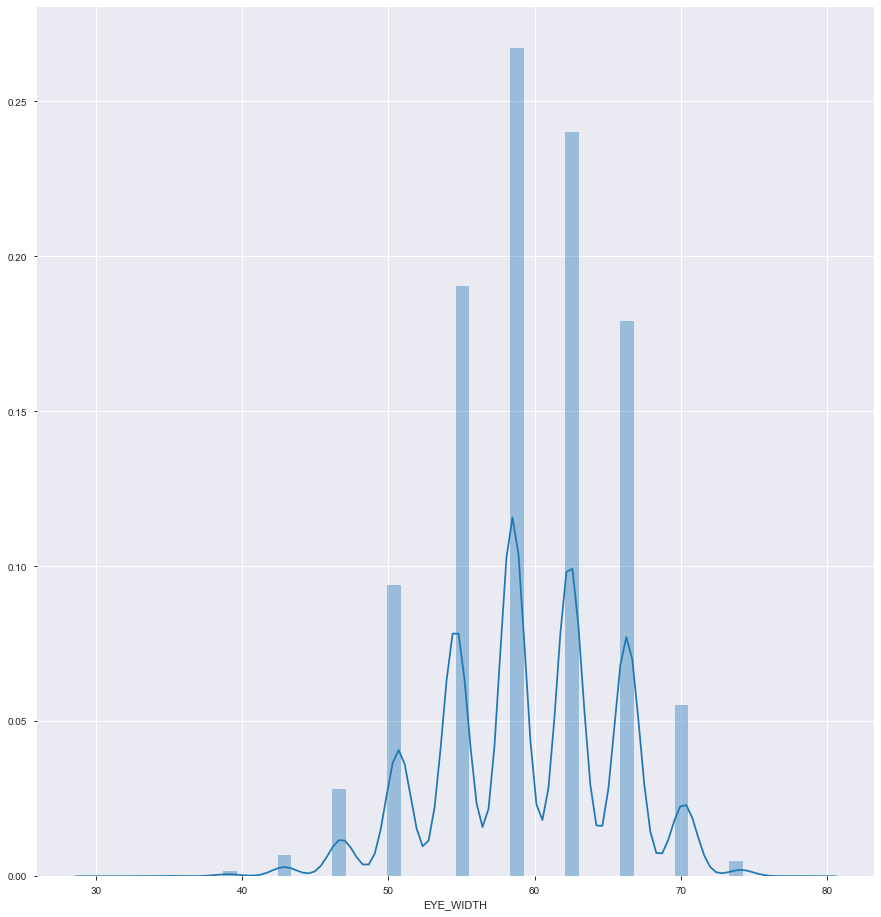

In [153]:
f,ax=plt.subplots(figsize=(15,16))
sns.distplot(df['EYE_WIDTH'])

In [209]:
l=dict(df.groupby('EYE_WIDTH')['COMPONENT_ID'].unique())

In [240]:
for key,values in l.items():
    l[key]=len(values)

In [241]:
l.values()

dict_values([1, 4, 13, 33, 115, 271, 363, 381, 379, 370, 256, 47, 2])

Text(0, 0.5, 'Length of value')

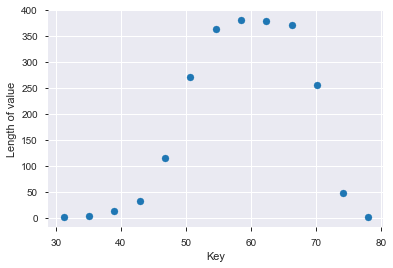

In [243]:
#y = [value.size for value in l.values()]

fig, ax = plt.subplots(1, 1)

ax.scatter(l.keys(), l.values())
ax.set_xlabel('Key')
ax.set_ylabel('Length of value')

In [277]:
l

{31.2: 1,
 35.1: 4,
 39.0: 13,
 42.9: 33,
 46.8: 115,
 50.7: 271,
 54.6: 363,
 58.5: 381,
 62.4: 379,
 66.3: 370,
 70.2: 256,
 74.1: 47,
 78.0: 2}

In [249]:
np.mean([k for k in l.keys()])

54.599999999999994

In [250]:
np.std([k for k in l.keys()])

14.592463808418373

In [251]:
ll=[[i]*j for i,j in zip(l.keys(),l.values())]
flat_list = [item for sublist in ll for item in sublist]
np.mean(flat_list), np.std(flat_list)

(59.559194630872476, 7.528353520785996)

In [258]:
np.histogram(flat_list)

(array([  5,  13,  33, 115, 271, 744, 379, 370, 256,  49], dtype=int64),
 array([31.2 , 35.88, 40.56, 45.24, 49.92, 54.6 , 59.28, 63.96, 68.64,
        73.32, 78.  ]))

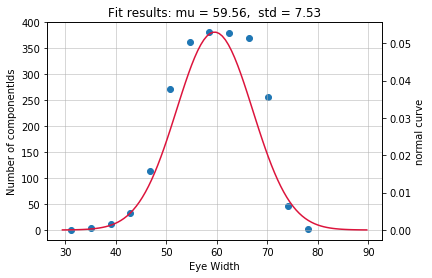

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

l = {31.2: 1, 35.1: 4, 39.0: 13, 42.9: 33, 46.8: 115, 50.7: 271, 54.6: 363, 58.5: 381, 62.4: 379, 66.3: 370, 70.2: 256, 74.1: 47, 78.0: 2}
# convert the dictionary to a list
l_list = [k for k, v in l.items() for _ in range(v)]

fig, ax = plt.subplots(1, 1)
plt.grid(True, linewidth=0.5, linestyle='-')

ax.scatter(l.keys(), l.values())
ax.set_xlabel('Eye Width')
ax.set_ylabel('Number of componentIds')

mu = np.mean(l_list)
sigma = np.std(l_list)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, sigma)
u = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
ax2 = ax.twinx()
ax2.plot(u, stats.norm.pdf(u, mu, sigma), color='crimson')
ax2.set_ylabel('normal curve')
plt.title(title)

plt.show()

In [291]:
df[['EYE_WIDTH','LANE']].groupby(['EYE_WIDTH','LANE']).size().unstack()

LANE          0      1      2      3      4      5      6      7      8   \
EYE_WIDTH                                                                  
31.2         NaN    NaN    NaN    NaN    NaN    NaN    1.0    NaN    NaN   
35.1         NaN    NaN    NaN    NaN    NaN    1.0    NaN    1.0    NaN   
39.0         NaN    1.0    NaN    2.0    NaN    NaN    2.0    1.0    NaN   
42.9         1.0    5.0    5.0   10.0    2.0    5.0    9.0   17.0    3.0   
46.8        19.0   14.0   17.0   23.0   27.0   31.0   42.0   39.0   27.0   
50.7        84.0   48.0   63.0   93.0   69.0   95.0  137.0  130.0   99.0   
54.6       204.0  173.0  176.0  206.0  158.0  158.0  207.0  182.0  199.0   
58.5       350.0  308.0  296.0  284.0  257.0  214.0  237.0  228.0  235.0   
62.4       282.0  278.0  242.0  257.0  275.0  236.0  259.0  206.0  237.0   
66.3       112.0  180.0  212.0  167.0  213.0  244.0  152.0  223.0  197.0   
70.2        26.0   64.0   65.0   41.0   80.0   91.0   39.0   59.0   76.0   
74.1         2.0   11.0    4.0    1.0    5.0    9.0    2.0    1.0    3.0   
78.0         NaN    NaN    NaN    NaN    NaN    NaN    1.0    NaN    1.0   

LANE          9      10     11     12     13     14     15  
EYE_WIDTH                                                   
31.2         NaN    NaN    NaN    NaN    NaN    NaN    NaN  
35.1         NaN    1.0    NaN    1.0    NaN    NaN    NaN  
39.0         3.0    3.0    3.0    2.0    3.0    6.0    NaN  
42.9        11.0    6.0    7.0    3.0   14.0    7.0    7.0  
46.8        43.0   39.0   41.0   15.0   16.0   29.0   35.0  
50.7       101.0  114.0  144.0   56.0   78.0   96.0  116.0  
54.6       206.0  210.0  193.0  187.0  158.0  186.0  283.0  
58.5       275.0  231.0  246.0  251.0  278.0  295.0  344.0  
62.4       219.0  233.0  217.0  203.0  278.0  257.0  212.0  
66.3       167.0  196.0  163.0  243.0  197.0  161.0   73.0  
70.2        50.0   46.0   58.0   99.0   53.0   40.0   10.0  
74.1         2.0    3.0    5.0   20.0    5.0    4.0    1.0  
78.0         NaN    NaN    NaN    NaN    NaN    NaN    NaN

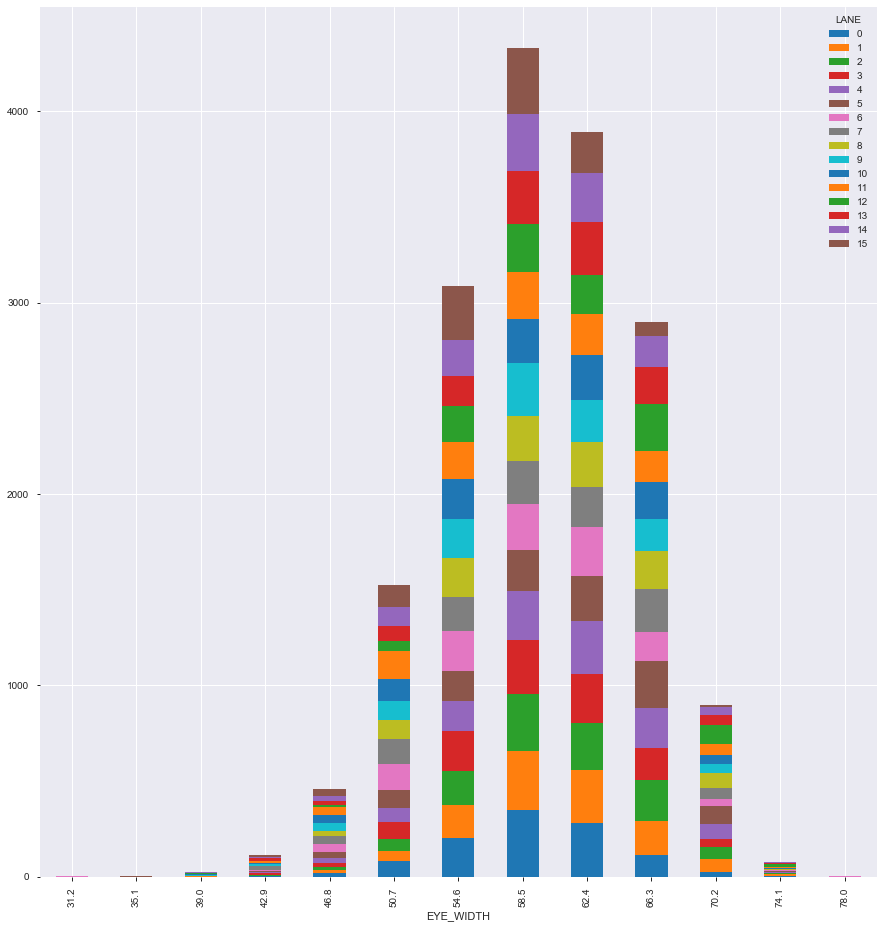

In [352]:
df[['EYE_WIDTH','LANE']].groupby(['EYE_WIDTH','LANE']).size().unstack().plot(kind='bar',stacked=True,figsize=(15,16))

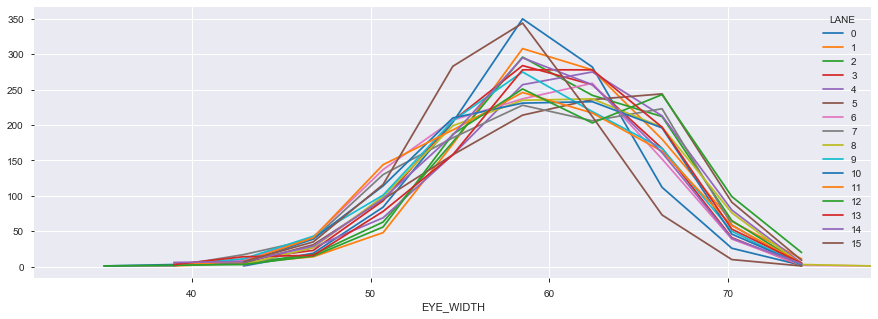

In [298]:
df[['EYE_WIDTH','LANE']].groupby(['EYE_WIDTH','LANE']).size().unstack().plot(figsize=(15,5))

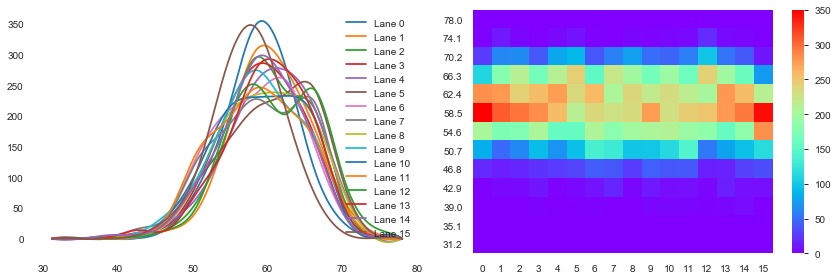

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import NaN
from scipy.interpolate import interp1d

eye_width = [31.2, 35.1, 39.0, 42.9, 46.8, 50.7, 54.6, 58.5, 62.4, 66.3, 70.2, 74.1, 78.0]
rows = np.array([
    [NaN, NaN, NaN, NaN, NaN, NaN, 1.0, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN, NaN],
    [NaN, NaN, NaN, NaN, NaN, 1.0, NaN, 1.0, NaN, NaN, 1.0, NaN, 1.0, NaN, NaN, NaN],
    [NaN, 1.0, NaN, 2.0, NaN, NaN, 2.0, 1.0, NaN, 3.0, 3.0, 3.0, 2.0, 3.0, 6.0, NaN],
    [1.0, 5.0, 5.0, 10.0, 2.0, 5.0, 9.0, 17.0, 3.0, 11.0, 6.0, 7.0, 3.0, 14.0, 7.0, 7.0],
    [19.0, 14.0, 17.0, 23.0, 27.0, 31.0, 42.0, 39.0, 27.0, 43.0, 39.0, 41.0, 15.0, 16.0, 29.0, 35.0],
    [84.0, 48.0, 63.0, 93.0, 69.0, 95.0, 137.0, 130.0, 99.0, 101.0, 114.0, 144.0, 56.0, 78.0, 96.0, 116.0],
    [204.0, 173.0, 176.0, 206.0, 158.0, 158.0, 207.0, 182.0, 199.0, 206.0, 210.0, 193.0, 187.0, 158.0, 186.0, 283.0],
    [350.0, 308.0, 296.0, 284.0, 257.0, 214.0, 237.0, 228.0, 235.0, 275.0, 231.0, 246.0, 251.0, 278.0, 295.0, 344.0],
    [282.0, 278.0, 242.0, 257.0, 275.0, 236.0, 259.0, 206.0, 237.0, 219.0, 233.0, 217.0, 203.0, 278.0, 257.0, 212.0],
    [112.0, 180.0, 212.0, 167.0, 213.0, 244.0, 152.0, 223.0, 197.0, 167.0, 196.0, 163.0, 243.0, 197.0, 161.0, 73.0],
    [26.0, 64.0, 65.0, 41.0, 80.0, 91.0, 39.0, 59.0, 76.0, 50.0, 46.0, 58.0, 99.0, 53.0, 40.0, 10.0],
    [2.0, 11.0, 4.0, 1.0, 5.0, 9.0, 2.0, 1.0, 3.0, 2.0, 3.0, 5.0, 20.0, 5.0, 4.0, 1.0],
    [NaN, NaN, NaN, NaN, NaN, NaN, 1.0, NaN, 1.0, NaN, NaN, NaN, NaN, NaN, NaN, NaN]])

df = pd.DataFrame(data=rows)
df['eye_width'] = eye_width
df.set_index(['eye_width'], inplace=True)
df.fillna(value=0, inplace=True)

fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
x = np.linspace(min(eye_width), max(eye_width), 1000)
for i in range(0, 16, 1):
    # ax.plot(df.index, df[i], label=f'Lane {i}')
    interpolation = interp1d(df.index, df[i], kind='cubic')
    ax.plot(x, interpolation(x), label=f'Lane {i}')
ax.legend(loc='best')

img = ax2.imshow(rows, origin='lower',cmap='rainbow')
ax2.set_xticks(range(16))
ax2.set_yticks(range(len(eye_width)))
ax2.set_yticklabels(eye_width)
plt.colorbar(img, ax=ax2)

plt.tight_layout()
plt.show()

In [ ]:
df=pd.read_csv('df_filtered_eye0.csv')

In [330]:
df1=df[(df['COMPONENT_ID'].isin(components_with_PB0PB1)) & (df['PLUGPOSITION']=='PB0') ]

In [331]:
df2=df[(df['COMPONENT_ID'].isin(components_with_PB0PB1)) & (df['PLUGPOSITION']=='PB1') ]

In [334]:
df1[['COMPONENT_ID','EYE_WIDTH']].groupby('COMPONENT_ID').mean()

EYE_WIDTH
COMPONENT_ID                     
11S02AA435YH1934052422  57.652983
11S02AA435YH1934064225  58.988675
11S02AA435YH1934070487  58.556250
11S02AA435YH1934081365  57.956250
11S02AA435YH1934081369  59.744286
11S02AA453YH1934064254  60.284250
11S02AA453YH1934064266  58.867925
11S02AA471YH1934037842  59.119626
11S02AA471YH1934064219  60.353378
11S02AA475YH1934073703  57.478125
11S02CY381YH1934531232  58.987500
11S02CY381YH1934595599  58.500000
11S02CY382YH1934550691  59.913750
11S02CY382YH1934671523  59.718750
11S02CY382YH1934763839  62.351250
11S02CY383YH1934528453  60.937500
11S02CY383YH1934528664  59.231250
11S02CY383YH1934537708  61.181250
11S02CY383YH1934619509  61.668750
11S02CY383YH1934749447  62.156250
11S02CY383YH1934779182  62.278125
11S02CY383YH1934793846  58.987500
11S02CY383YH1934794910  62.497500
11S02CY388YH1934548657  58.987500
11S02CY388YH1934595164  58.743750
11S02CY388YH1934625510  60.206250
11S02CY388YH1934705933  60.206250
11S02CY389YH1934629398  62.400000
11S02CY389YH1934772972  62.205000
11S02CY394YH1934502847  55.575000
11S02CY394YH1934506185  35.100000
11S02CY394YH1934545930  60.450000
11S02CY394YH1934591336  59.962500
11S02CY394YH1934684976  62.278125

In [336]:
df2[['COMPONENT_ID','EYE_WIDTH']].groupby('COMPONENT_ID').mean()

COMPONENT_ID
11S02AA435YH1934052422    58.639286
11S02AA435YH1934064225    58.587750
11S02AA435YH1934070487    58.918204
11S02AA435YH1934081365    57.974813
11S02AA435YH1934081369    59.939286
11S02AA453YH1934064254    56.418703
11S02AA453YH1934064266    56.724764
11S02AA471YH1934037842    59.611682
11S02AA471YH1934064219    58.020157
11S02AA475YH1934073703    57.222581
11S02CY381YH1934531232    60.450000
11S02CY381YH1934595599    60.206250
11S02CY382YH1934550691    59.621250
11S02CY382YH1934671523    60.328125
11S02CY382YH1934763839    59.865000
11S02CY383YH1934528453    60.645000
11S02CY383YH1934528664    60.206250
11S02CY383YH1934537708    62.156250
11S02CY383YH1934619509    62.643750
11S02CY383YH1934749447    62.156250
11S02CY383YH1934779182    61.546875
11S02CY383YH1934793846    62.887500
11S02CY383YH1934794910    62.556000
11S02CY388YH1934548657    57.281250
11S02CY388YH1934595164    56.793750
11S02CY388YH1934625510    61.181250
11S02CY388YH1934705933    57.232500
11S02CY389YH193

In [347]:
df[(df['COMPONENT_ID'].isin(components_with_PB0PB1)) ][['COMPONENT_ID','PLUGPOSITION','EYE_WIDTH']].groupby(['COMPONENT_ID','PLUGPOSITION']).mean()

EYE_WIDTH
COMPONENT_ID           PLUGPOSITION           
11S02AA435YH1934052422 PB0           57.652983
                       PB1           58.639286
11S02AA435YH1934064225 PB0           58.988675
                       PB1           58.587750
11S02AA435YH1934070487 PB0           58.556250
                       PB1           58.918204
11S02AA435YH1934081365 PB0           57.956250
                       PB1           57.974813
11S02AA435YH1934081369 PB0           59.744286
                       PB1           59.939286
11S02AA453YH1934064254 PB0           60.284250
                       PB1           56.418703
11S02AA453YH1934064266 PB0           58.867925
                       PB1           56.724764
11S02AA471YH1934037842 PB0           59.119626
                       PB1           59.611682
11S02AA471YH1934064219 PB0           60.353378
                       PB1           58.020157
11S02AA475YH1934073703 PB0           57.478125
                       PB1           57.222581
11S02CY381YH1934531232 PB0           58.987500
                       PB1           60.450000
11S02CY381YH1934595599 PB0           58.500000
                       PB1           60.206250
11S02CY382YH1934550691 PB0           59.913750
                       PB1           59.621250
11S02CY382YH1934671523 PB0           59.718750
                       PB1           60.328125
11S02CY382YH1934763839 PB0           62.351250
                       PB1           59.865000
11S02CY383YH1934528453 PB0           60.937500
                       PB1           60.645000
11S02CY383YH1934528664 PB0           59.231250
                       PB1           60.206250
11S02CY383YH1934537708 PB0           61.181250
                       PB1           62.156250
11S02CY383YH1934619509 PB0           61.668750
                       PB1           62.643750
11S02CY383YH1934749447 PB0           62.156250
                       PB1           62.156250
11S02CY383YH1934779182 PB0           62.278125
                       PB1           61.546875
11S02CY383YH1934793846 PB0           58.987500
                       PB1           62.887500
11S02CY383YH1934794910 PB0           62.497500
                       PB1           62.556000
11S02CY388YH1934548657 PB0           58.987500
                       PB1           57.281250
11S02CY388YH1934595164 PB0           58.743750
                       PB1           56.793750
11S02CY388YH1934625510 PB0           60.206250
                       PB1           61.181250
11S02CY388YH1934705933 PB0           60.206250
                       PB1           57.232500
11S02CY389YH1934629398 PB0           62.400000
                       PB1           58.256250
11S02CY389YH1934772972 PB0           62.205000
                       PB1           60.450000
11S02CY394YH1934502847 PB0           55.575000
                       PB1           59.840625
11S02CY394YH1934506185 PB0           35.100000
                       PB1           39.000000
11S02CY394YH1934545930 PB0           60.450000
                       PB1           61.083750
11S02CY394YH1934591336 PB0           59.962500
                       PB1           59.475000
11S02CY394YH1934684976 PB0           62.278125
                       PB1           61.425000

In [344]:
pd.set_option('display.max_rows', 100)

In [454]:
df

0      1      2      3      4      5      6      7      8   \
eye_width                                                                  
31.2         0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
35.1         0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0    0.0   
39.0         0.0    1.0    0.0    2.0    0.0    0.0    2.0    1.0    0.0   
42.9         1.0    5.0    5.0   10.0    2.0    5.0    9.0   17.0    3.0   
46.8        19.0   14.0   17.0   23.0   27.0   31.0   42.0   39.0   27.0   
50.7        84.0   48.0   63.0   93.0   69.0   95.0  137.0  130.0   99.0   
54.6       204.0  173.0  176.0  206.0  158.0  158.0  207.0  182.0  199.0   
58.5       350.0  308.0  296.0  284.0  257.0  214.0  237.0  228.0  235.0   
62.4       282.0  278.0  242.0  257.0  275.0  236.0  259.0  206.0  237.0   
66.3       112.0  180.0  212.0  167.0  213.0  244.0  152.0  223.0  197.0   
70.2        26.0   64.0   65.0   41.0   80.0   91.0   39.0   59.0   76.0   
74.1         2.0   11.0    4.0    1.0    5.0    9.0    2.0    1.0    3.0   
78.0         0.0    0.0    0.0    0.0    0.0    0.0    1.0    0.0    1.0   

              9      10     11     12     13     14     15  
eye_width                                                   
31.2         0.0    0.0    0.0    0.0    0.0    0.0    0.0  
35.1         0.0    1.0    0.0    1.0    0.0    0.0    0.0  
39.0         3.0    3.0    3.0    2.0    3.0    6.0    0.0  
42.9        11.0    6.0    7.0    3.0   14.0    7.0    7.0  
46.8        43.0   39.0   41.0   15.0   16.0   29.0   35.0  
50.7       101.0  114.0  144.0   56.0   78.0   96.0  116.0  
54.6       206.0  210.0  193.0  187.0  158.0  186.0  283.0  
58.5       275.0  231.0  246.0  251.0  278.0  295.0  344.0  
62.4       219.0  233.0  217.0  203.0  278.0  257.0  212.0  
66.3       167.0  196.0  163.0  243.0  197.0  161.0   73.0  
70.2        50.0   46.0   58.0   99.0   53.0   40.0   10.0  
74.1         2.0    3.0    5.0   20.0    5.0    4.0    1.0  
78.0         0.0    0.0    0.0    0.0    0.0    0.0    0.0

In [700]:
df=pd.read_csv('df_filtered_eye0.csv')

In [457]:
df['Etch_length1'].nunique()

160

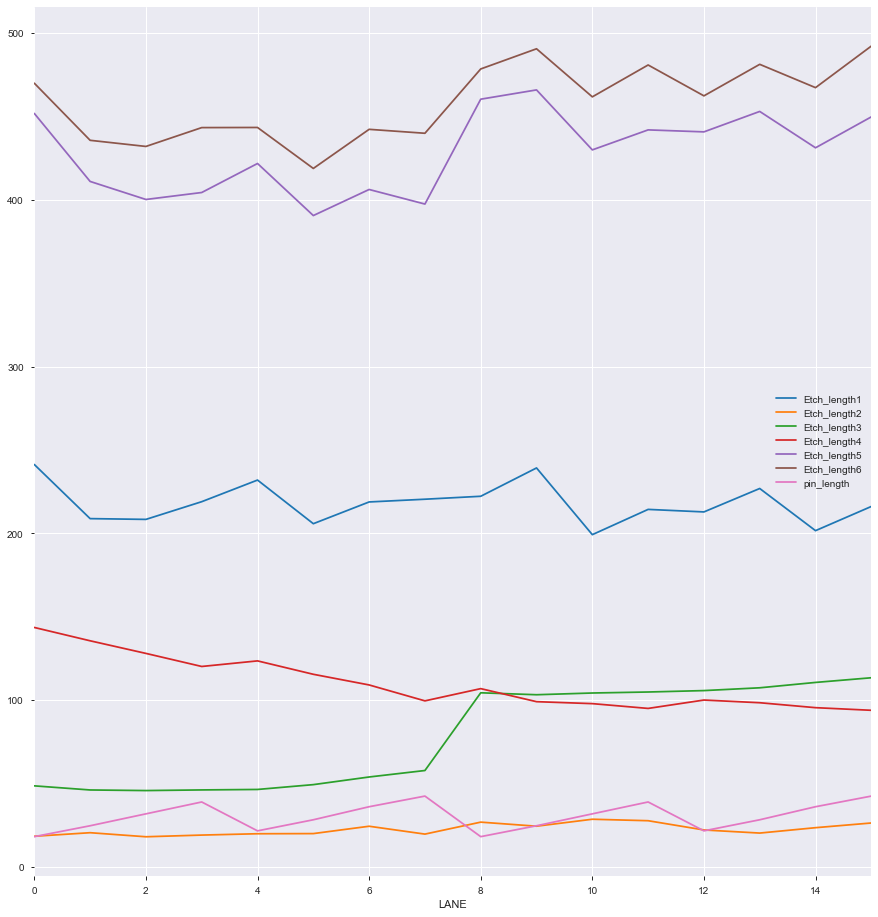

In [465]:
df[['LANE','Etch_length1','Etch_length2','Etch_length3','Etch_length4','Etch_length5','Etch_length6','pin_length']].groupby('LANE').mean().plot(figsize=(15,16))

In [469]:
df[['LANE','Etch_length1','Etch_length2','Etch_length3','Etch_length4','Etch_length5','Etch_length6','pin_length']].groupby('LANE').mean()

Etch_length1  Etch_length2  Etch_length3  Etch_length4  Etch_length5  \
LANE                                                                         
0       241.266451     18.363577     48.589257    143.560453    451.779738   
1       208.829576     20.492611     46.122801    135.573364    411.018352   
2       208.368918     18.060968     45.764611    128.008616    400.203113   
3       218.985840     19.073426     46.148368    120.172429    404.380062   
4       231.953856     19.872563     46.428391    123.522274    421.777086   
5       205.788097     19.961901     49.321623    115.488444    390.560066   
6       218.824145     24.368629     53.904487    109.095702    406.192963   
7       220.464057     19.655536     57.787750     99.548463    397.455805   
8       222.232641     26.830851    104.388910    106.886110    460.338513   
9       239.216446     24.393102    103.228001     99.064926    465.902475   
10      199.217256     28.571366    104.262911     97.888043    429.939577   
11      214.362704     27.683663    104.864229     95.020040    441.930636   
12      212.848548     22.138534    105.712137    100.043108    440.742328   
13      226.894315     20.275398    107.386925     98.432779    452.989417   
14      201.613584     23.502799    110.606883     95.469782    431.193048   
15      216.118418     26.318616    113.405830     93.895901    449.738764   

      Etch_length6  pin_length  
LANE                            
0       469.909662   18.129924  
1       435.678450   24.660098  
2       432.003199   31.800086  
3       443.299976   38.919914  
4       443.376966   21.599880  
5       418.810064   28.249998  
6       442.262895   36.069932  
7       439.905901   42.450096  
8       478.468437   18.129924  
9       490.562573   24.660098  
10      461.739663   31.800086  
11      480.850550   38.919914  
12      462.342208   21.599880  
13      481.239415   28.249998  
14      467.262980   36.069932  
15      492.188860   42.450096

In [480]:
df[['EYE_WIDTH','Etch_length1','Etch_length2','Etch_length3','Etch_length4','Etch_length5','Etch_length6','pin_length']].groupby('EYE_WIDTH').mean()

Etch_length1  Etch_length2  Etch_length3  Etch_length4  \
EYE_WIDTH                                                           
31.2         186.389713     24.079176     53.904487    109.095702   
35.1         184.566323     15.579267     79.271105    103.242015   
39.0         207.878401     18.938023     93.781078    101.453091   
42.9         215.868195     20.849387     80.120100    105.611211   
46.8         219.782479     22.134646     80.551951    107.079134   
50.7         219.498500     22.453413     80.153082    107.653072   
54.6         219.492238     22.577403     79.660108    109.414554   
58.5         219.433639     22.495214     77.877291    110.954452   
62.4         218.374082     22.524031     76.563803    111.177520   
66.3         214.856921     22.311993     76.696051    110.055646   
70.2         211.699918     22.802744     76.348687    110.530409   
74.1         204.066592     21.942245     79.988625    110.791482   
78.0         209.618362     27.389002     79.146698    107.990906   

           Etch_length5  Etch_length6  pin_length  
EYE_WIDTH                                          
31.2         373.469078    409.539010   36.069932  
35.1         382.658710    413.683726   31.025015  
39.0         422.050592    454.650574   32.599982  
42.9         422.448894    455.655959   33.207065  
46.8         429.548210    461.164180   31.615971  
50.7         429.758066    461.458012   31.699946  
54.6         431.144303    461.847527   30.703225  
58.5         430.760597    460.954969   30.194373  
62.4         428.639437    458.559777   29.920341  
66.3         423.920611    453.624101   29.703489  
70.2         421.381758    450.095631   28.713873  
74.1         416.788946    443.765455   26.976509  
78.0         424.144968    451.244896   27.099928

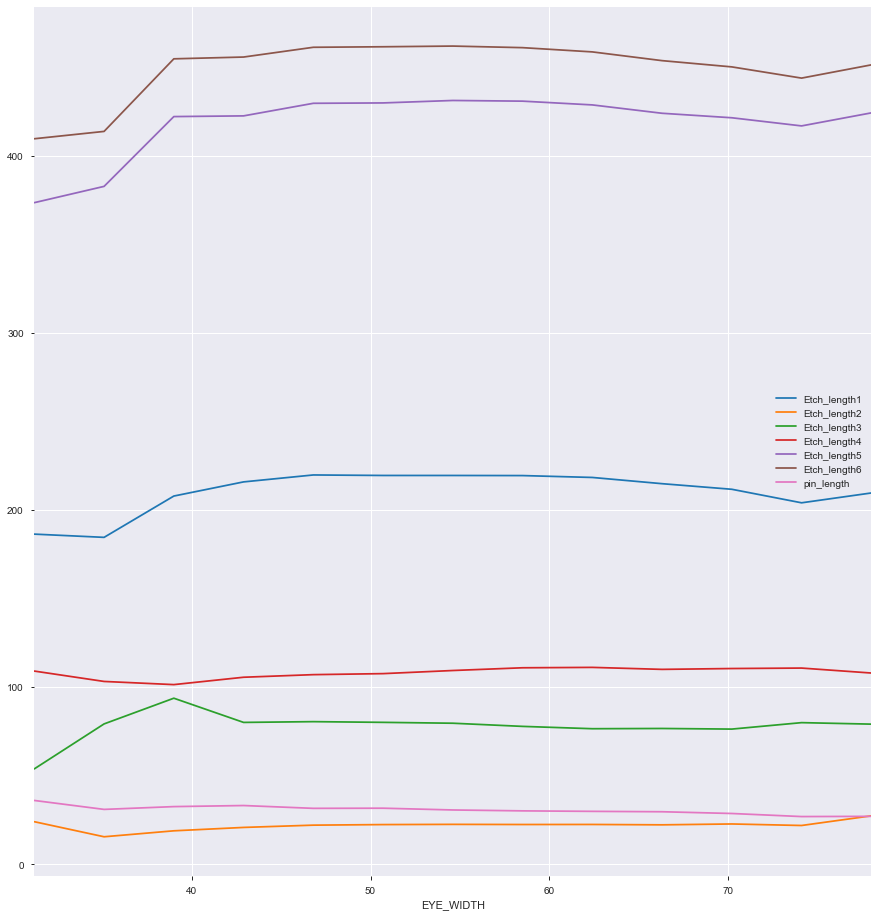

In [471]:
df[['EYE_WIDTH','Etch_length1','Etch_length2','Etch_length3','Etch_length4','Etch_length5','Etch_length6','pin_length']].groupby('EYE_WIDTH').mean().plot(figsize=(15,16))

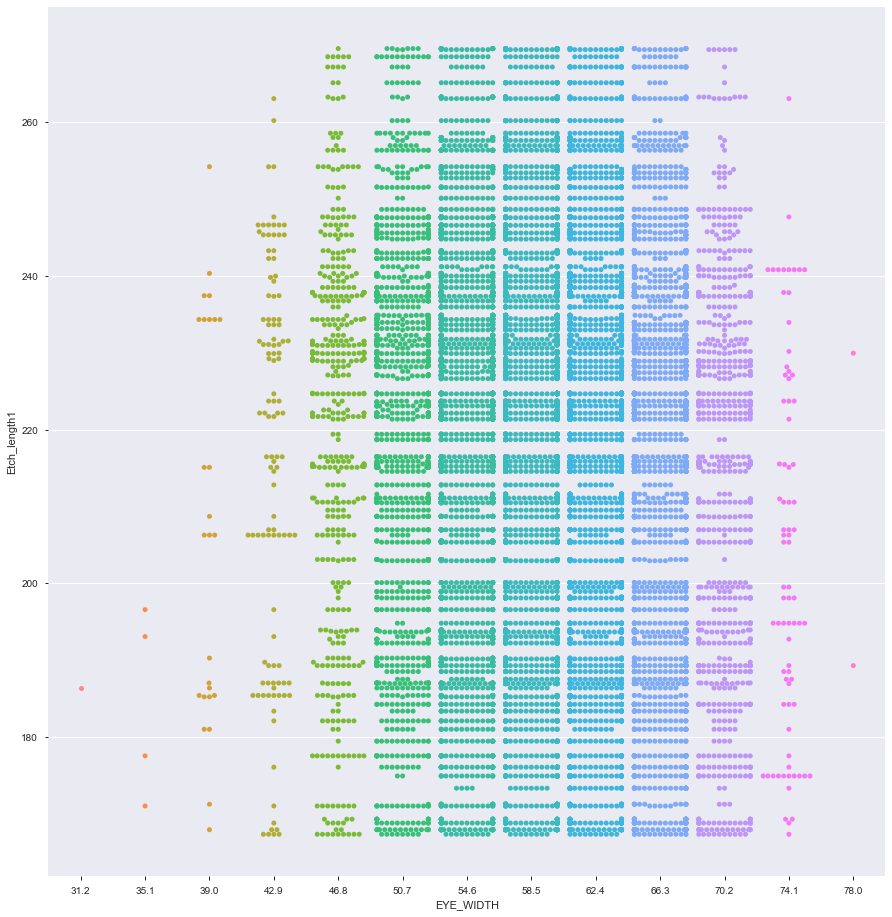

In [479]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="EYE_WIDTH",y="Etch_length1",data=df)

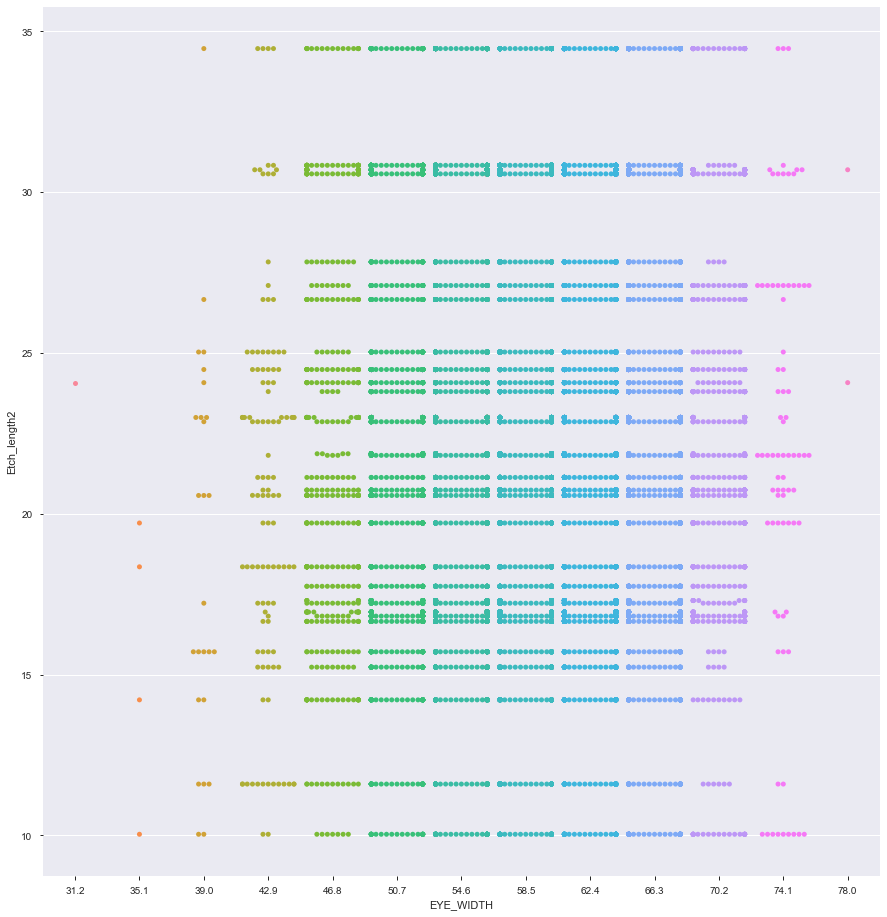

In [481]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="EYE_WIDTH",y="Etch_length2",data=df)

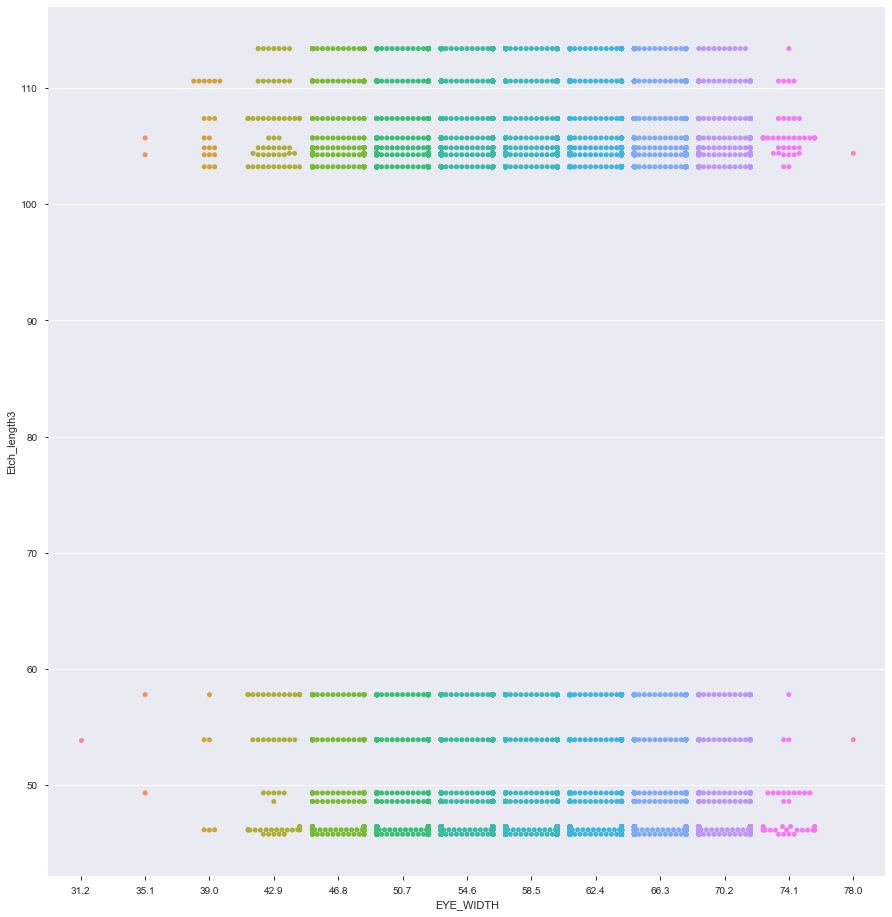

In [482]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="EYE_WIDTH",y="Etch_length3",data=df)

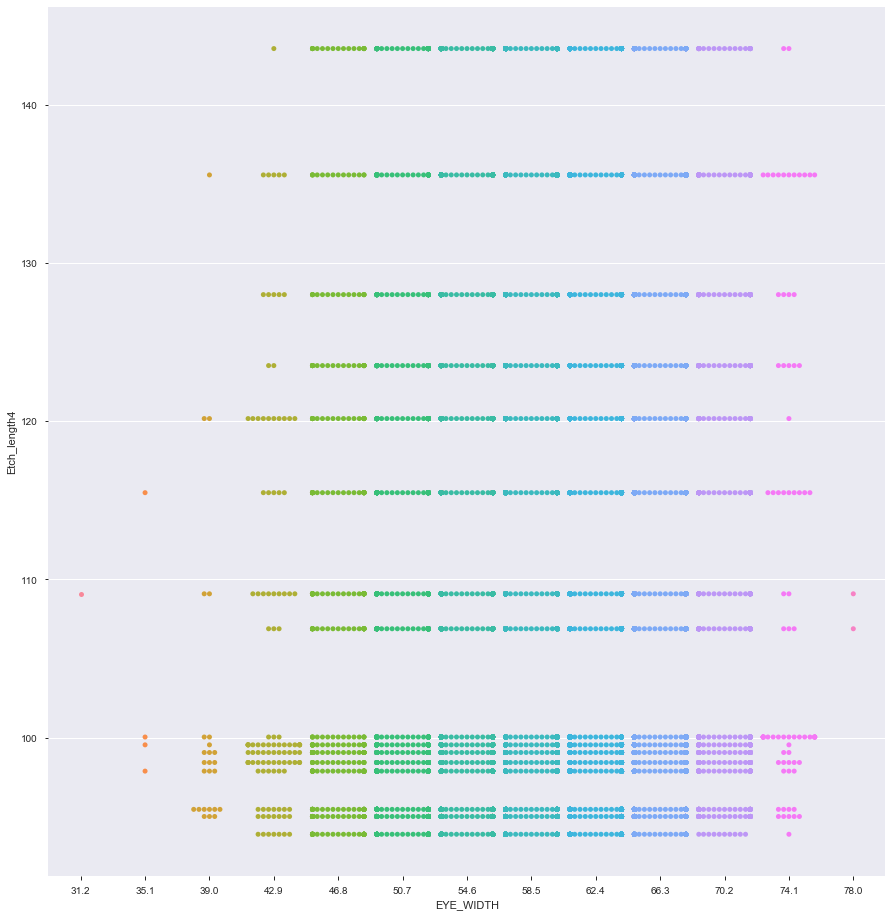

In [483]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="EYE_WIDTH",y="Etch_length4",data=df)

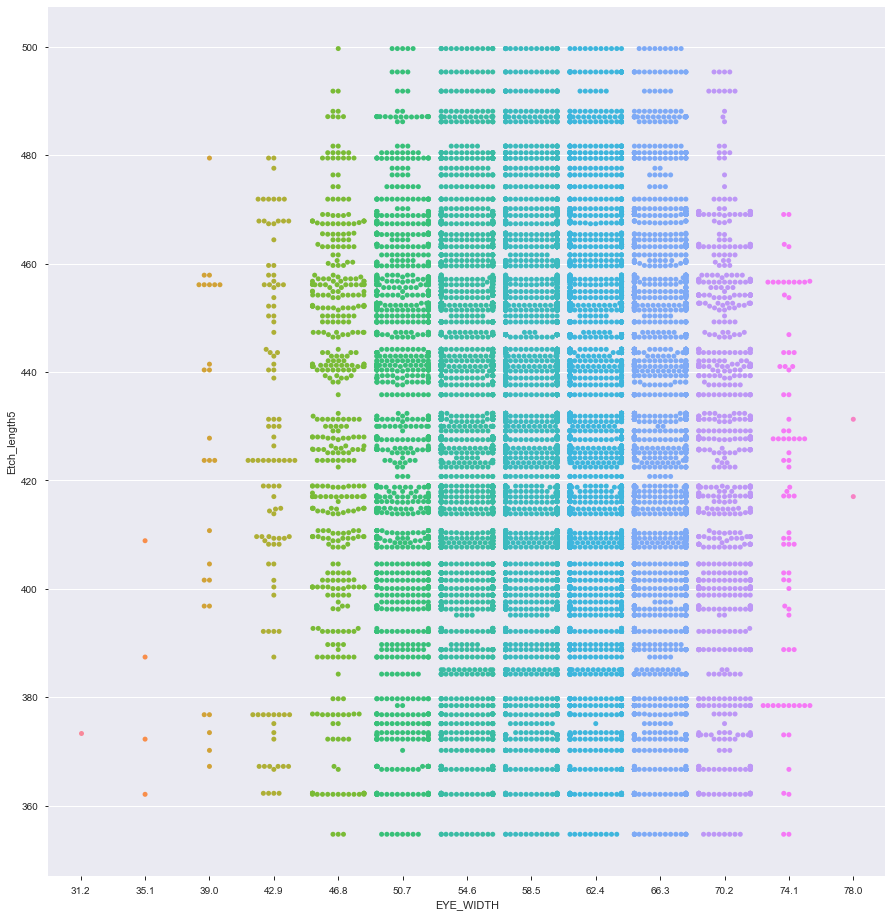

In [484]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="EYE_WIDTH",y="Etch_length5",data=df)

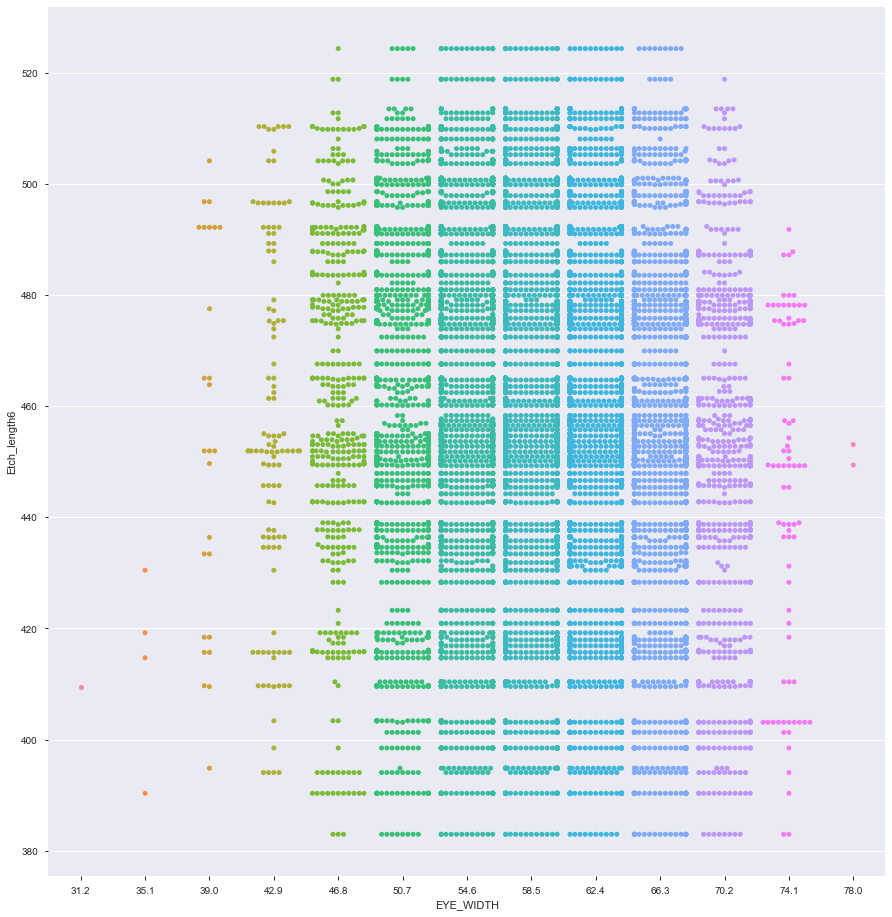

In [485]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="EYE_WIDTH",y="Etch_length6",data=df)

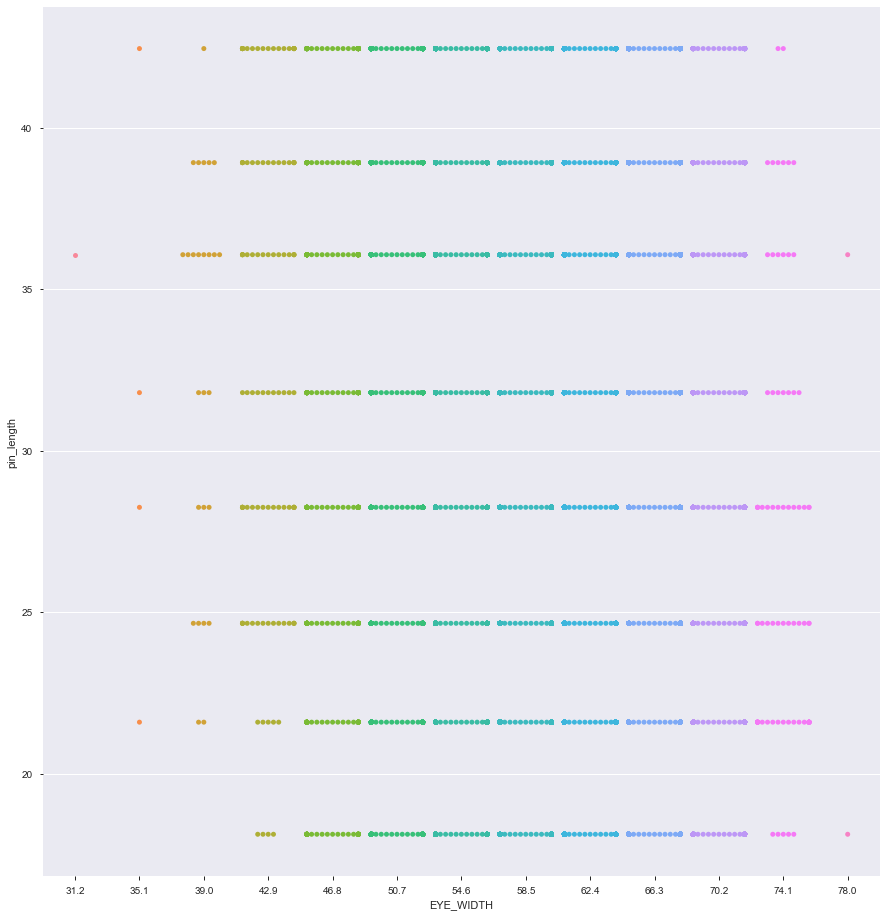

In [486]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="EYE_WIDTH",y="pin_length",data=df)

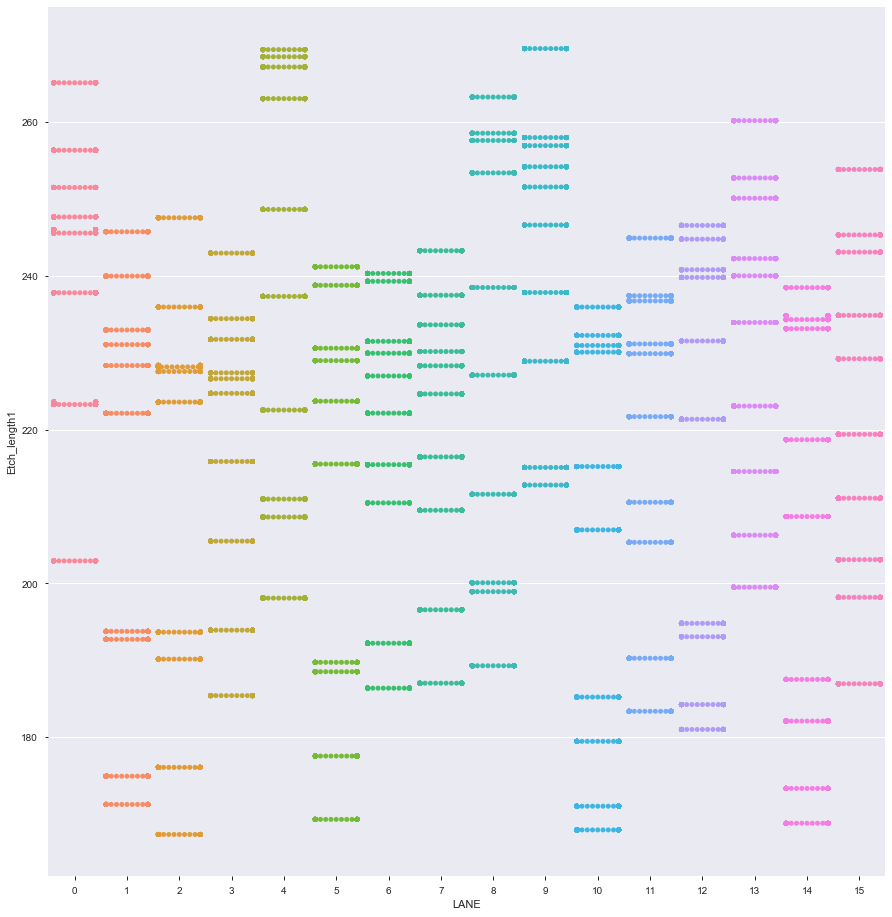

In [487]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="LANE",y="Etch_length1",data=df)

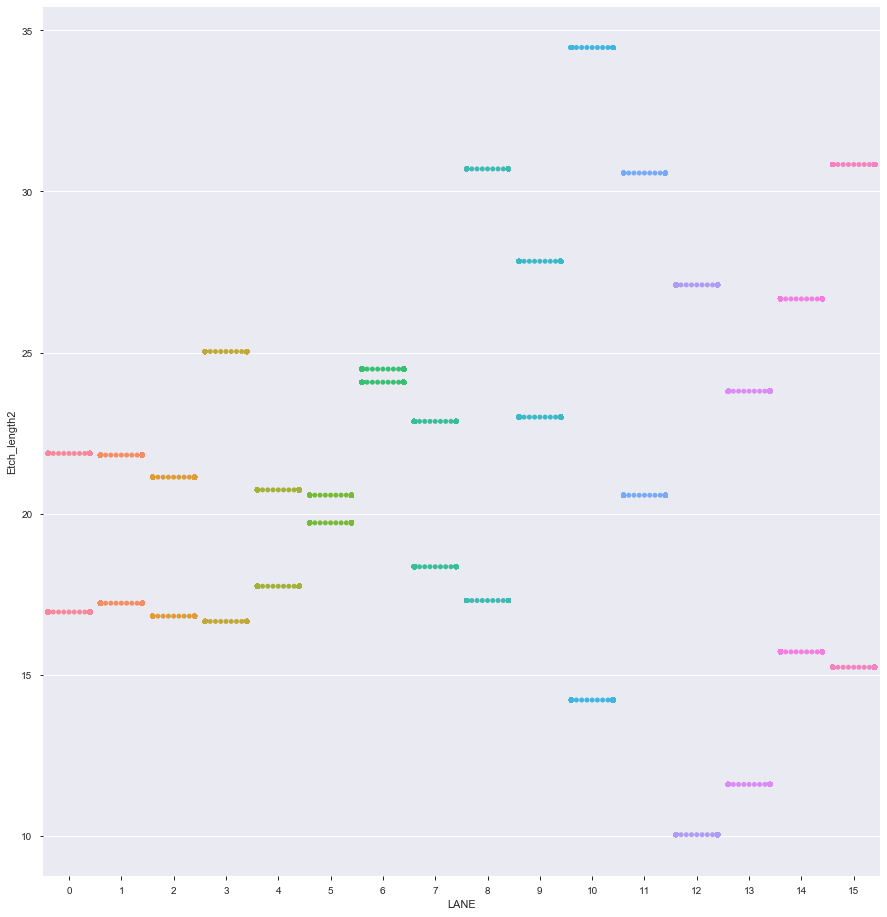

In [488]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="LANE",y="Etch_length2",data=df)

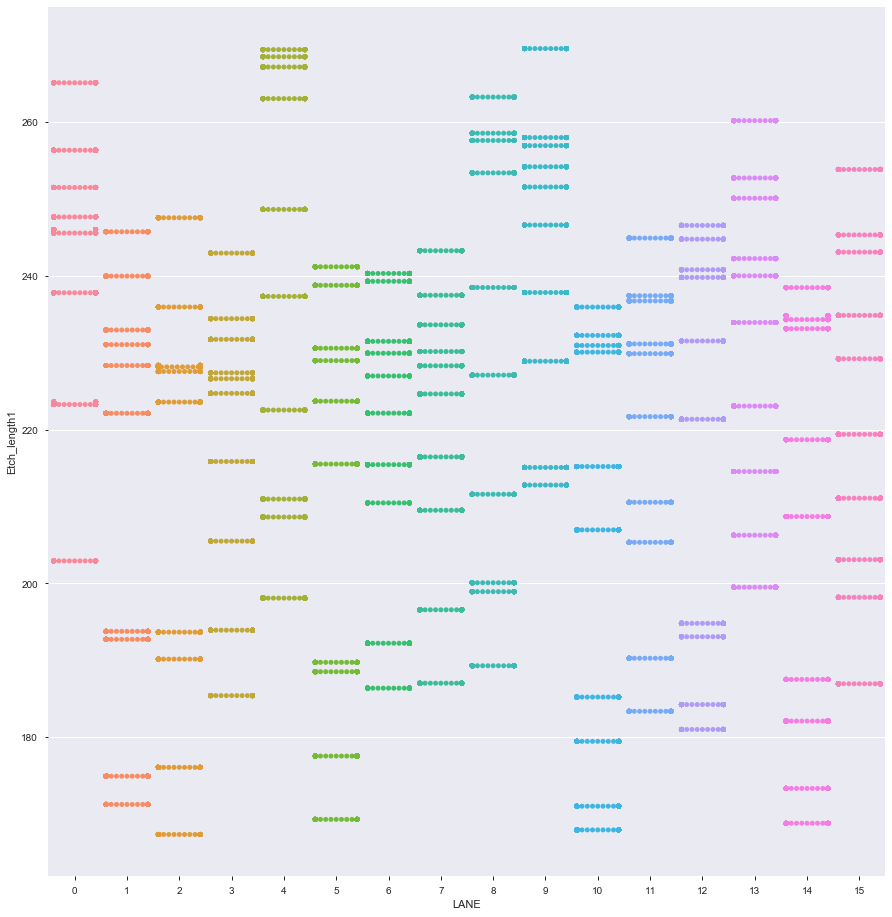

In [489]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="LANE",y="Etch_length3",data=df)

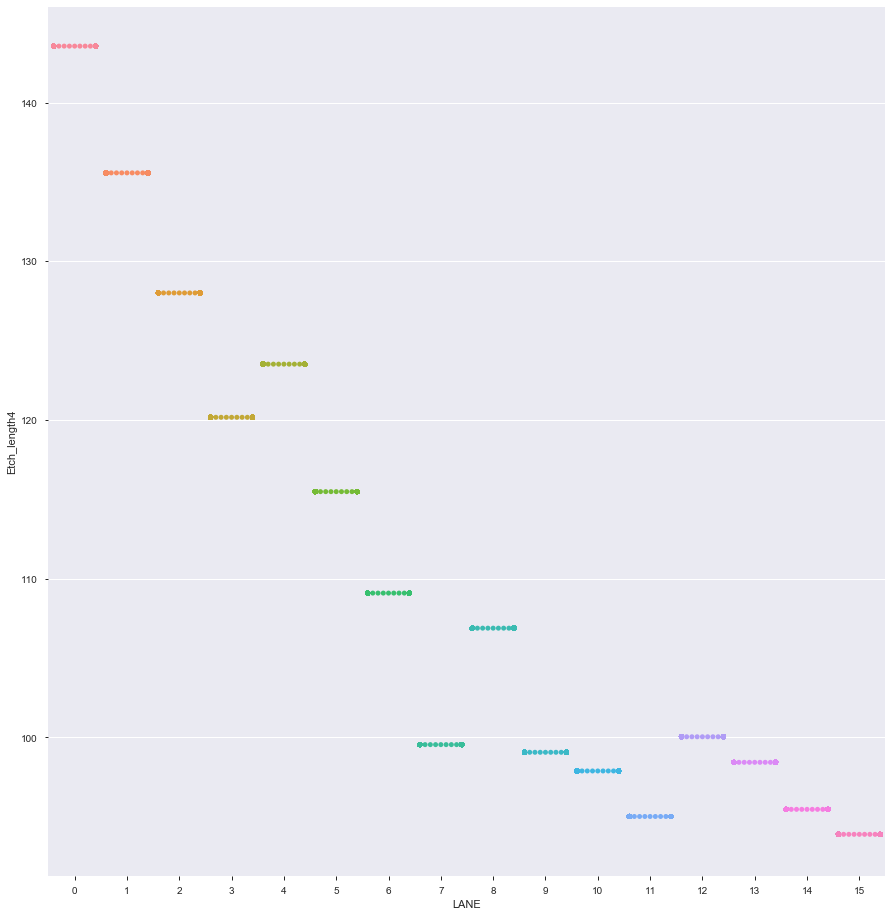

In [490]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="LANE",y="Etch_length4",data=df)

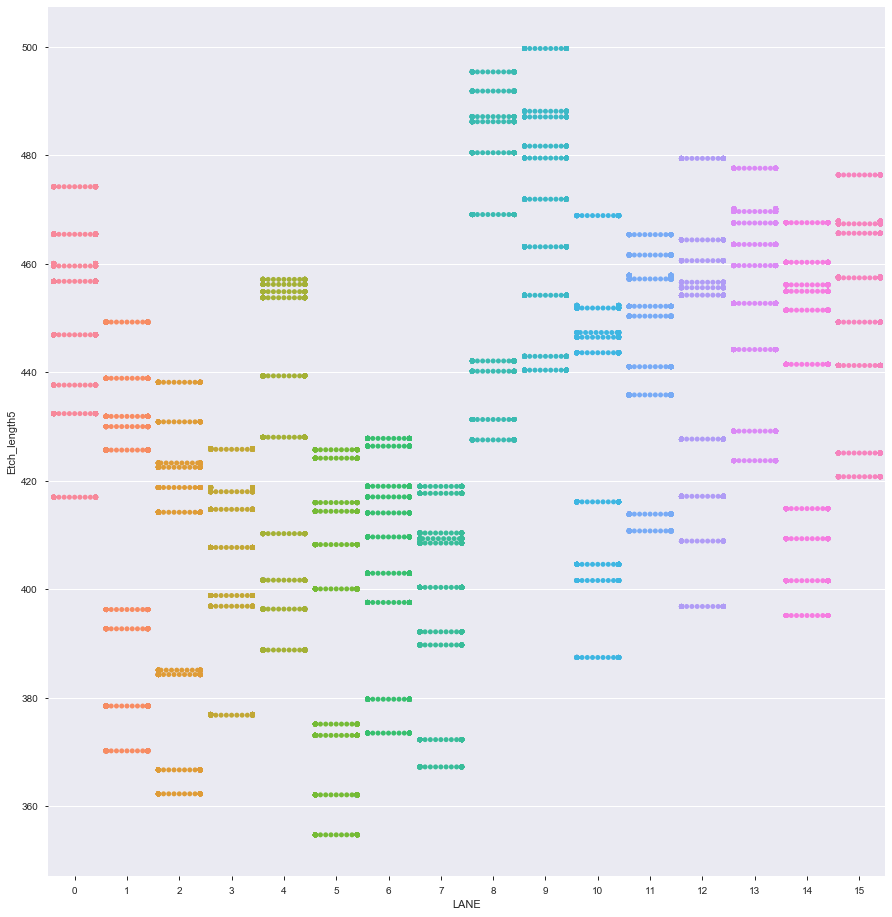

In [491]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="LANE",y="Etch_length5",data=df)

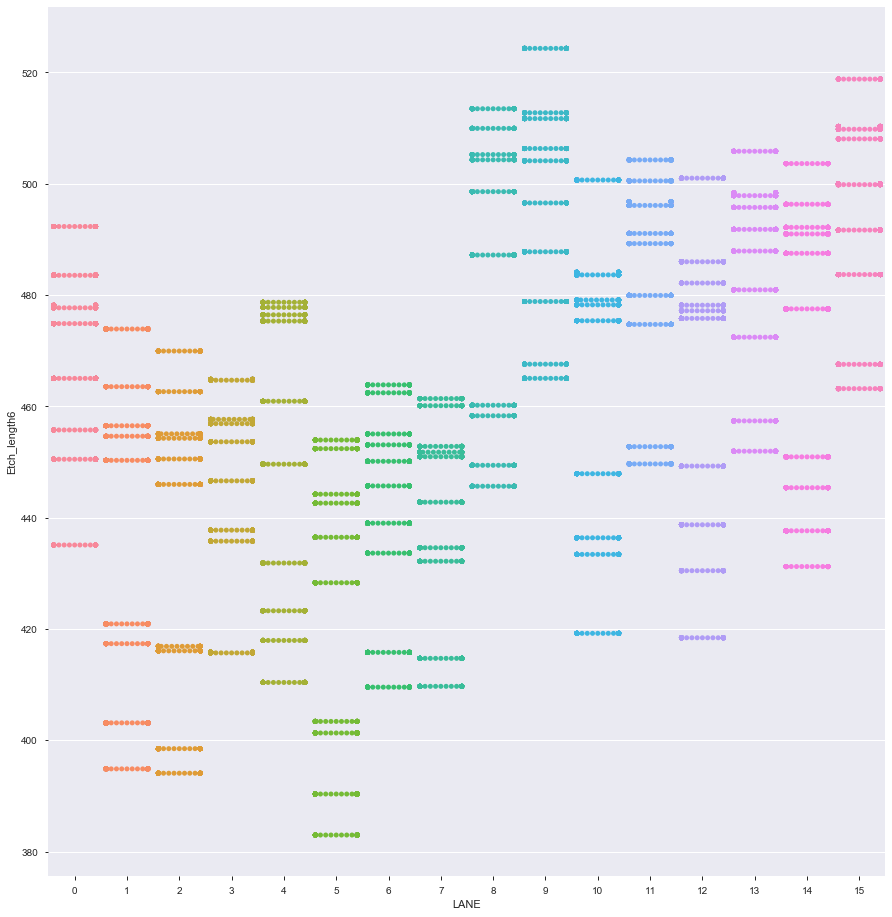

In [492]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="LANE",y="Etch_length6",data=df)

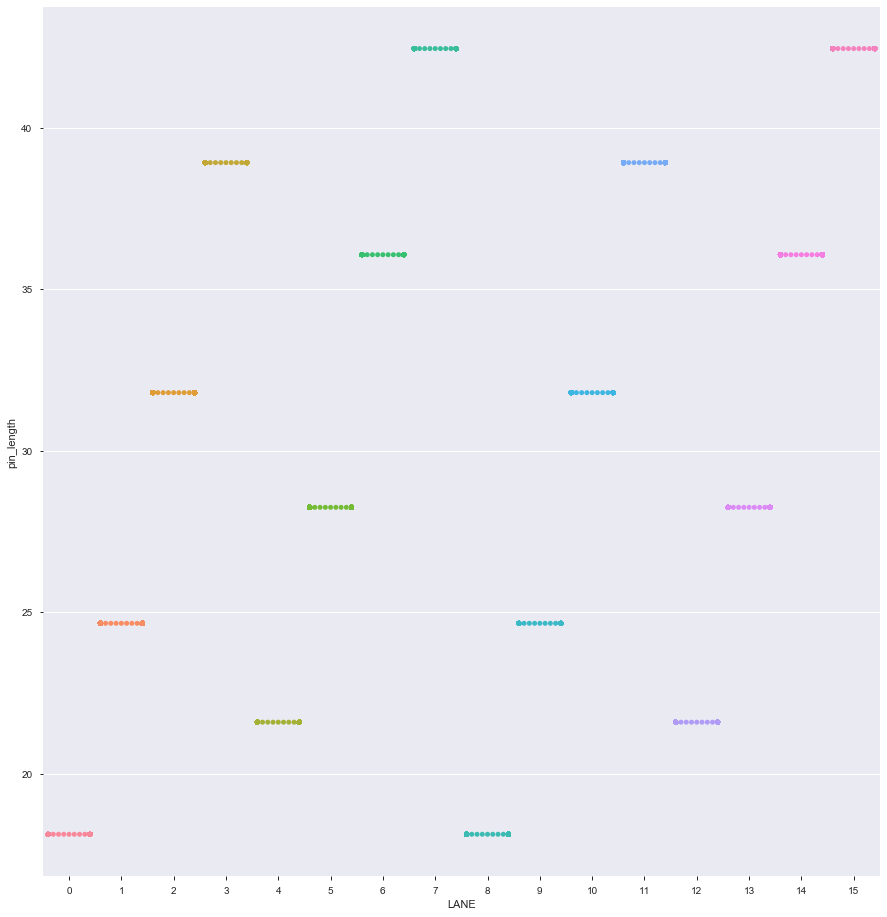

In [493]:
fig, ax = plt.subplots(figsize=(15,16))
sns.swarmplot(x="LANE",y="pin_length",data=df)

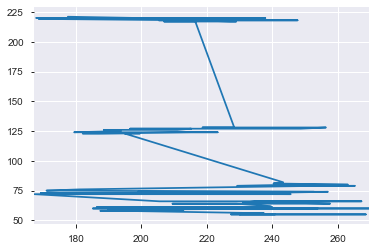

In [552]:
df['Etch_length1'].value_counts().plot()

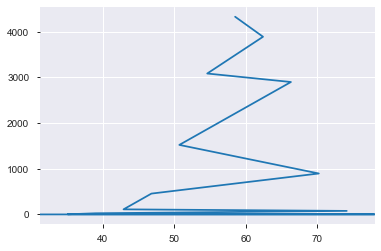

In [557]:
df['EYE_WIDTH'].value_counts().plot()

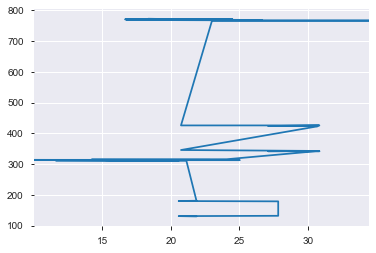

In [560]:
df['Etch_length2'].value_counts().plot()

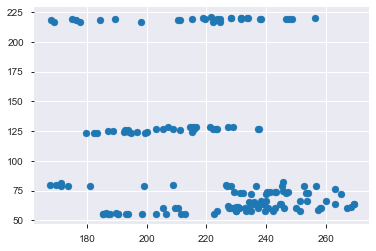

In [564]:
plt.scatter(x=df['Etch_length1'].unique(),y=df['Etch_length1'].value_counts())

In [566]:
df['Etch_length1'].min()

167.36855500000001

In [567]:
df['Etch_length1'].max()

269.539688

In [573]:
bins = [167,187,207,227,247,270]
df['binned'] = pd.cut(df['Etch_length1'], bins)


In [599]:
df[['binned','EYE_WIDTH']].groupby(['binned']).agg(list)['EYE_WIDTH']

binned
(167, 187]    [66.3, 62.4, 58.5, 50.7, 50.7, 58.5, 62.4, 62....
(187, 207]    [66.3, 54.6, 62.4, 62.4, 54.6, 62.4, 54.6, 66....
(207, 227]    [66.3, 58.5, 58.5, 62.4, 58.5, 58.5, 62.4, 66....
(227, 247]    [58.5, 70.2, 66.3, 62.4, 62.4, 54.6, 50.7, 66....
(247, 270]    [58.5, 62.4, 62.4, 54.6, 62.4, 58.5, 50.7, 62....
Name: EYE_WIDTH, dtype: object

In [602]:
np.std(df['Etch_length1'])

24.338840573806095

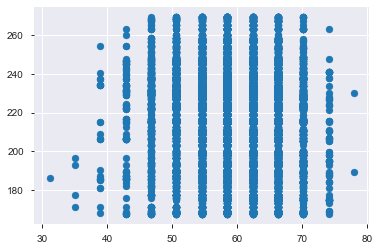

In [604]:
plt.scatter(x='EYE_WIDTH',y='Etch_length1',data=df)

In [608]:
def larger_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [609]:

estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=100, batch_size=100, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X_train, y_train, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Wider: -31.09 (1.46) MSE


In [610]:
my_model=pipeline.fit(X_train,y_train)

In [611]:
preds=pipeline.predict(X_test)

In [614]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

Mean Absolute Error: 4.620673963773523
Mean Squared Error: 32.56750713323708
Root Mean Squared Error: 5.706794821371895


In [615]:
df[(df['COMPONENT_ID'].isin(components_with_PB0PB1))]

CORNER            COMPONENT_ID  LANE PLUGPOSITION   TEST_DATE  \
160           FF_SCM1  11S02CY381YH1934531232     9          PB0  2019-01-29   
161           FF_SCM1  11S02CY381YH1934531232     0          PB1  2019-01-29   
162           FF_SCM1  11S02CY381YH1934531232     1          PB0  2019-01-29   
163           FF_SCM1  11S02CY381YH1934531232     1          PB1  2019-01-29   
164           FF_SCM1  11S02CY381YH1934531232     2          PB0  2019-01-29   
...               ...                     ...   ...          ...         ...   
17301  IO_NOM_NOM_PCX  11S02CY388YH1934625510    13          PB1  2019-01-11   
17302  IO_NOM_NOM_PCX  11S02CY388YH1934625510    14          PB0  2019-01-11   
17303  IO_NOM_NOM_PCX  11S02CY388YH1934625510    14          PB1  2019-01-11   
17304  IO_NOM_NOM_PCX  11S02CY388YH1934625510    15          PB0  2019-01-11   
17305  IO_NOM_NOM_PCX  11S02CY388YH1934625510    15          PB1  2019-01-11   

       EYE_HEIGHT  EYE_WIDTH  EYE_HEIGHT_AVG  EYE_WIDTH_AVG  EYE_WIDTH_MAX  \
160         312.0       54.6      335.034375      59.273438           78.0   
161         358.8       66.3      335.034375      59.273438           78.0   
162         327.6       58.5      335.034375      59.273438           78.0   
163         343.2       58.5      335.034375      59.273438           78.0   
164         312.0       62.4      335.034375      59.273438           78.0   
...           ...        ...             ...            ...            ...   
17301       335.4       62.4      327.786875      58.658438           74.1   
17302       304.2       58.5      327.786875      58.658438           74.1   
17303       327.6       50.7      327.786875      58.658438           74.1   
17304       343.2       54.6      327.786875      58.658438           74.1   
17305       304.2       62.4      327.786875      58.658438           74.1   

       ...                                     HOME_DIRECTORY  Etch_length1  \
160    ...  http://ausgsa.ibm.com/projects/m/moosecollecti...    237.827419   
161    ...  http://ausgsa.ibm.com/projects/m/moosecollecti...    245.558112   
162    ...  http://ausgsa.ibm.com/projects/m/moosecollecti...    174.946646   
163    ...  http://ausgsa.ibm.com/projects/m/moosecollecti...    171.275171   
164    ...  http://ausgsa.ibm.com/projects/m/moosecollecti...    176.094654   
...    ...                                                ...           ...   
17301  ...  http://ausgsa.ibm.com/projects/m/moosecollecti...    260.173741   
17302  ...  http://ausgsa.ibm.com/projects/m/moosecollecti...    234.816642   
17303  ...  http://ausgsa.ibm.com/projects/m/moosecollecti...    238.466515   
17304  ...  http://ausgsa.ibm.com/projects/m/moosecollecti...    229.209538   
17305  ...  http://ausgsa.ibm.com/projects/m/moosecollecti...    253.824199   

       Etch_length2  Etch_length3 Etch_length4 Etch_length5 Etch_length6  \
160       22.996426    103.228001    99.064926   463.116772   487.776870   
161       21.868386     48.589257   143.560453   459.576207   477.706131   
162       21.818246     46.122801   135.573364   378.461058   403.121156   
163       17.221012     46.122801   135.573364   370.192348   394.852446   
164       16.818931     45.764611   128.008616   366.686812   398.486898   
...             ...           ...          ...          ...          ...   
17301     11.596797    107.386925    98.432779   477.590242   505.840240   
17302     26.664531    110.606883    95.469782   467.557838   503.627770   
17303     15.709940    110.606883    95.469782   460.253120   496.323052   
17304     30.836829    113.405830    93.895901   467.348098   509.798194   
17305     15.232392    113.405830    93.895901   476.358322   518.808418   

      pin_length Machine      binned  
160    24.660098     M02  (227, 247]  
161    18.129924     M02  (227, 247]  
162    24.660098     M02  (167, 187]  
163    24.660098     M02  (167, 187]  
164    31.800086     M02  (167, 187]  
...          ...     

In [638]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning:

divide by zero encountered in double_scalars



In [640]:
vif.round(1)

VIF Factor          features
0   2.329850e+04            CORNER
1   8.007200e+03      COMPONENT_ID
2   8.317600e+03              LANE
3   2.851080e+04      PLUGPOSITION
4   1.541854e+05         TEST_DATE
5   2.315000e+02        EYE_HEIGHT
6   2.153490e+04    EYE_HEIGHT_AVG
7   2.411227e+05     EYE_WIDTH_AVG
8   1.495740e+04     EYE_WIDTH_MAX
9   1.149500e+03    EYE_HEIGHT_MIN
10  4.400000e+00     EYE_WIDTH_MIN
11  2.155900e+03   EYE_HEIGHT_SDEV
12  7.518000e+02    EYE_WIDTH_SDEV
13           inf            SLOTID
14           inf        SLOTID_DEC
15  9.007199e+15   START_TIMESTAMP
16  9.007199e+15  FINISH_TIMESTAMP
17  9.007199e+15          PNP_FILE
18  9.007199e+15    HOME_DIRECTORY
19           inf      Etch_length1
20  1.801440e+15      Etch_length2
21           inf      Etch_length3
22           inf      Etch_length4
23  9.007199e+15      Etch_length5
24  9.007199e+15      Etch_length6
25  4.503600e+15        pin_length
26  3.490760e+04           Machine

In [705]:
df['EYE_WIDTH'].value_counts()

fifteen      4329
sixteen      3891
fourteen     3086
seventeen    2900
thirteen     1523
eighteen      897
twelve        457
eleven        112
nineteen       78
ten            26
nine            4
twenty          2
eight           1
Name: EYE_WIDTH, dtype: int64

In [702]:
df['EYE_WIDTH']=df['EYE_WIDTH'].map({31.2: 'eight', 35.1: 'nine',39: 'ten', 42.9: 'eleven',46.8: 'twelve', 50.7: 'thirteen',54.6: 'fourteen', 58.5: 'fifteen',62.4: 'sixteen', 66.3: 'seventeen',70.2: 'eighteen', 74.1: 'nineteen',78: 'twenty'})

In [770]:
#Funtion for target encoding
def traintest_meanenc():
    import pandas as pd
   # df_new=pd.read_csv('Midas_with_mac.csv')
    df_new=pd.read_csv('df_filtered_eye0.csv')
    #df_new=df_new[['EYE_MIN','PARM_LABEL','FROM_ID', 'FROM_LOCATION',  'MACHINE_TYPE', 'TESTPROGRAMNAME', 'ARCHIVEFILENAME', 'TEST_DATE', 'INTERFACE', 'MONTH', 'YEAR']]
    #df_new['FINISH_TIMESTAMP'] =  pd.to_datetime(df_new['FINISH_TIMESTAMP'], format='%Y-%m-%d')
    #df_new['FINISH_TIMESTAMP']=df_new['FINISH_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
    #df_new['START_TIMESTAMP'] =  pd.to_datetime(df_new['START_TIMESTAMP'], format='%Y-%m-%d')
    #df_new['START_TIMESTAMP']=df_new['START_TIMESTAMP'].dt.strftime('%Y%m%d').astype(float)
   
    X=df_new[[ 'CORNER', 'COMPONENT_ID', 'LANE','SLOTID','Machine','Etch_length6','Etch_length1','Etch_length2','Etch_length3','Etch_length4','Etch_length5','pin_length' ]]
   
    y=df_new['EYE_WIDTH']
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
    Train=pd.concat((X_train,y_train),axis=1)
    
    X_train2=X_train[['Etch_length6','Etch_length1','Etch_length2','Etch_length3','Etch_length4','Etch_length5','pin_length' ]]
    X_test2=X_test[['Etch_length6','Etch_length1','Etch_length2','Etch_length3','Etch_length4','Etch_length5','pin_length' ]]
    
    #cols=[ 'COMPONENT_ID','PLUGPOSITION','SLOTID','LANE','CORNER','Machine']
    cols=[ 'CORNER', 'COMPONENT_ID', 'LANE','SLOTID','Machine'
       ]
    
    for col in cols:
        
        means = Train.groupby(col).EYE_WIDTH.mean()
        X_train[col] = X_train[col].map(means)
        X_test[col] = X_test[col].map(means)
        X_train[col].fillna(means.mean(), inplace = True)
        X_test[col].fillna(means.mean(), inplace = True)
        X_train1=X_train[[col]]
        X_test1=X_test[[col]]
        X_train1[col].fillna(means.mean(), inplace = True)
        X_train2=pd.concat((X_train1,X_train),axis=1)
        X_test2=pd.concat((X_test1,X_test),axis=1)
    y_test=y_test.map({31.2: 'eight', 35.1: 'nine',39: 'ten', 42.9: 'eleven',46.8: 'twelve', 50.7: 'thirteen',54.6: 'fourteen', 58.5: 'fifteen',62.4: 'sixteen', 66.3: 'seventeen',70.2: 'eighteen', 74.1: 'nineteen',78: 'twenty'})
    y_train=y_train.map({31.2: 'eight', 35.1: 'nine',39: 'ten', 42.9: 'eleven',46.8: 'twelve', 50.7: 'thirteen',54.6: 'fourteen', 58.5: 'fifteen',62.4: 'sixteen', 66.3: 'seventeen',70.2: 'eighteen', 74.1: 'nineteen',78: 'twenty'})
    return X_train,y_train,X_test,y_test

In [771]:
X_train,y_train,X_test,y_test=traintest_meanenc()

C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [719]:
y_test

8013       sixteen
5146     seventeen
5691       sixteen
7159      fourteen
13255      fifteen
           ...    
8085     seventeen
9004      eighteen
6355      eighteen
7760     seventeen
13077      fifteen
Name: EYE_WIDTH, Length: 5711, dtype: object

In [772]:
regr =  RandomForestClassifier(max_depth=7, random_state=0)
regr.fit(X_train, y_train)

C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [773]:
y_pred = regr.predict(X_test)

In [774]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.27683417965330065


In [775]:
y_test

8013       sixteen
5146     seventeen
5691       sixteen
7159      fourteen
13255      fifteen
           ...    
8085     seventeen
9004      eighteen
6355      eighteen
7760     seventeen
13077      fifteen
Name: EYE_WIDTH, Length: 5711, dtype: object

In [776]:
y_pred

array(['fifteen', 'sixteen', 'sixteen', ..., 'seventeen', 'sixteen',
       'fourteen'], dtype=object)

In [777]:
predict=pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})

In [778]:
predict[predict['predictions']!=predict['actual']]

predictions     actual
8013      fifteen    sixteen
5146      sixteen  seventeen
7159      sixteen   fourteen
13255    fourteen    fifteen
14509     fifteen   fourteen
...           ...        ...
4702      sixteen   eighteen
9004      sixteen   eighteen
6355    seventeen   eighteen
7760      sixteen  seventeen
13077    fourteen    fifteen

[4130 rows x 2 columns]

In [779]:
len(predict)

5711

In [780]:
from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(regr.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [781]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 30, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [ 5, 10,15]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [2, 5, 8, 11, 14, 17, 20, 23, 26, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [5, 10, 15],
 'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200]}


In [782]:
rf_random = RandomizedSearchCV(estimator = regr, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs =10)

In [783]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\ChinmayHegde\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning:

The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   4 out of  15 | elapsed:    2.7s remaining:    7.7s
[Parallel(n_jobs=10)]: Done  12 out of  15 | elapsed:    3.7s remaining:    0.9s
[Parallel(n_jobs=10)]: Done  15 out of  15 | elapsed:    4.2s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=10,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 5, 8, 11, 14, 17, 20, 23, 26, 30, None], 'min_samples_split': [5, 10, 15], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [784]:
best_random = rf_random.best_estimator_
y_pred = best_random.predict(X_test)

In [785]:
rf_random.best_params_

{'n_estimators': 94,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 23,
 'bootstrap': True}

In [786]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.33409210295920155


In [787]:
predict=pd.DataFrame(data={'predictions': y_pred, 'actual': y_test})

In [799]:
len(predict)

5711

In [802]:
len(predict[predict['predictions']==predict['actual']])

1908

In [788]:
predict[predict['predictions']!=predict['actual']]

predictions    actual
8013      fifteen   sixteen
5691    seventeen   sixteen
7159      sixteen  fourteen
13255     sixteen   fifteen
14509     fifteen  fourteen
...           ...       ...
5727    seventeen   sixteen
13921    thirteen  fourteen
4702      fifteen  eighteen
6355      sixteen  eighteen
13077    fourteen   fifteen

[3803 rows x 2 columns]

In [794]:
def text2int(textnum, numwords={}):
    if not numwords:
        units = [
        "zero", "one", "two", "three", "four", "five", "six", "seven", "eight",
        "nine", "ten", "eleven", "twelve", "thirteen", "fourteen", "fifteen",
        "sixteen", "seventeen", "eighteen", "nineteen",
      ]

        tens = ["", "", "twenty", "thirty", "forty", "fifty", "sixty", "seventy", "eighty", "ninety"]

        scales = ["hundred", "thousand", "million", "billion", "trillion"]

        numwords["and"] = (1, 0)
        for idx, word in enumerate(units):    numwords[word] = (1, idx)
        for idx, word in enumerate(tens):     numwords[word] = (1, idx * 10)
        for idx, word in enumerate(scales):   numwords[word] = (10 ** (idx * 3 or 2), 0)

    current = result = 0
    for word in textnum.split():
        if word not in numwords:
            raise Exception("Illegal word: " + word)

        scale, increment = numwords[word]
        current = current * scale + increment
        if scale > 100:
            result += current
            current = 0

    return result + current

In [798]:
p = predict['predictions'].apply(text2int) 
a = predict['actual'].apply(text2int) 

predict[p.eq(a+1) | p.eq(a-1)]

predictions     actual
8013      fifteen    sixteen
5691    seventeen    sixteen
13255     sixteen    fifteen
14509     fifteen   fourteen
2571      sixteen    fifteen
...           ...        ...
15471     sixteen  seventeen
7293      sixteen  seventeen
5727    seventeen    sixteen
13921    thirteen   fourteen
13077    fourteen    fifteen

[2403 rows x 2 columns]

In [754]:
xg_reg =xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [755]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [753]:
y_train

7666     seventeen
14617     thirteen
16761     thirteen
5382      fourteen
12545     thirteen
           ...    
11284      fifteen
11964     fourteen
5390      fourteen
860       fourteen
15795     fourteen
Name: EYE_WIDTH, Length: 11595, dtype: object

In [756]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, preds))

Accuracy: 0.2521449833654351


In [761]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_preds=nb.predict(X_test)

In [762]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_preds))

Accuracy: 0.2327088075643495


In [767]:
svm=SVC(kernel="linear",C=0.25,random_state=101)
svm.fit(X_train,y_train)
y_preds=svm.predict(X_test)

In [768]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_preds))

Accuracy: 0.2526702854141131


In [806]:
p.eq(a+1) | p.eq(a-1)

8013      True
5146     False
5691      True
7159     False
13255     True
         ...  
8085     False
9004     False
6355     False
7760     False
13077     True
Length: 5711, dtype: bool

In [2]:
df=pd.read_csv('complete_PCIE.csv')

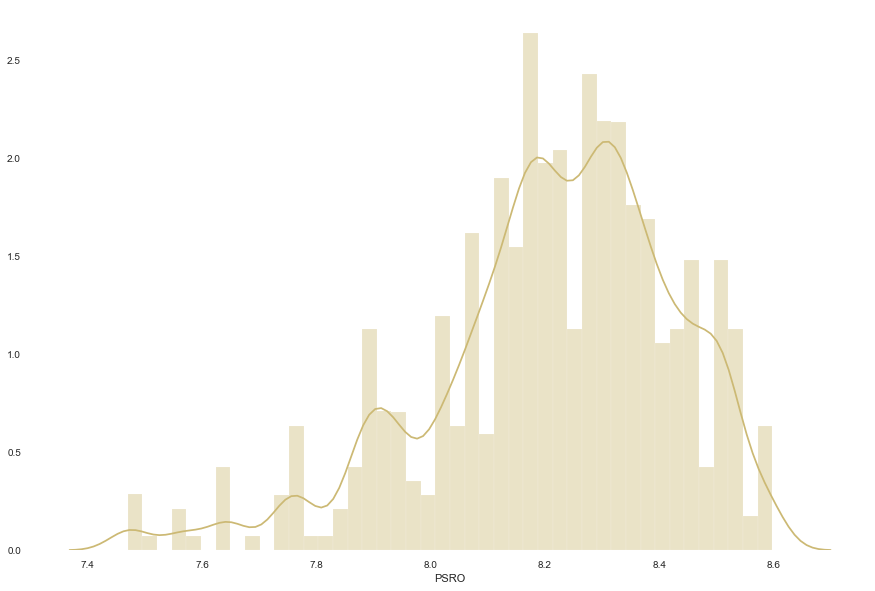

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
sns.set_color_codes()
ax = sns.distplot(df['PSRO'], color="y")